## Capstone Project

## Project: Distracted Driver Detection

---

In this project, I am going to attempt the solution for the [Distracted Driver Detection Challenge](https://www.kaggle.com/c/state-farm-distracted-driver-detection) presented by the State Farm on the Kaggle.


---
### Why We're Here 

In this project, we will implement an algorithm that could be used to detect the behavior of the driver based on the images provided by the dashboard camera of the Car.  At the end of this project, our code will accept the test-images provided by the State Farm and after analyzing the mage, it will predict the probability of various behaviors that driver in the image is engaged in. For example the program will predict that a driver in the image is enagaged in safe driving with probability of 0.5,  talking to passenger with a probility of 0.3 etc...

![Sample Image](Data/imgs/train/c0/img_2093.jpg)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 1](#step1): Defining the Project
* [Step 2](#step2): Analysis
* [Step 3](#step3): Methodology
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step1'></a>
## Step 1: Defintion 

### Project Overview
According to the CDC motor vehicle safety division, one in five car accidents is caused by a distracted driver. Sadly, this translates to 425,000 people injured and 3,000 people killed by distracted driving every year. 

State Farm hopes to improve these alarming statistics, and better insure their customers, by testing whether dashboard cameras can automatically detect drivers engaging in distracted behaviors.

This Project aims to implement a model which will help in predicting the behavior of the driver. 

### Problem Statement
Given a dataset of 2D dashboard camera images, our aim is to classify the behavior of the driver in the image and predict whether they are driving attentively, wearing their seatbelt, taking a selfie with their friends in the backseat, or involved in any other distracted behavior. This program can be used to alert the drivers whenever they are getting engaged into any distraction while driving.

### Metrics
Submissions are evaluated using the multi-class logarithmic loss. Each image has been labeled with one true class. For each image, you must submit a set of predicted probabilities (one for every image). The formula is then,

![Sample Image](EvaluationMetricsFormula.png)

where N is the number of images in the test set, M is the number of image class labels,  log is the natural logarithm, yij is 1 if observation i belongs to class j and 0 otherwise, and pij is the predicted probability that observation i belongs to class j.


<a id='step2'></a>
## Step 2: Analysis
In this section, we will use the provided data for the purpose of analysing it. 
This will help us in deteremining which Machine/Deep learning algorithm may be a right choice to solve this problem.

### Data Exploration

#### Import Image Dataset

In the code cell below, we import a dataset of driver images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `driver_behaviors` - list of string-valued driver behavior names for translating labels

In [2]:
from sklearn.datasets import load_files  
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    driver_files = np.array(data['filenames'])
    driver_targets = np_utils.to_categorical(np.array(data['target']), 10)
    return driver_files, driver_targets

# load train, test, and validation datasets
driver_files, driver_targets = load_dataset('Data/imgs/train')

train_files, valid_files, train_targets , valid_targets = train_test_split(driver_files, driver_targets, test_size=0.20, random_state=42)

test_files = np.array(glob('Data/imgs/test/*.jpg'))
#test_files = np.load('Data/imgs/test')

# load list of dog names
driver_behaviors = [item[20:-1] for item in sorted(glob('Data/imgs/train/*/'))]



#### Data Statistics

In the code cell below we will take a look at the statistics about the dataset and the driver data(Id) provided for the images.

In [3]:

# print statistics about the dataset
print("statistics about the dataset")
print('Total driver behavior categories : %d' % len(driver_behaviors))
print('Total driver images              : %s' % len(np.hstack([train_files, valid_files, test_files])))
print('Driver images for training       : %d' % len(train_files))
print('Driver images for validation     : %d' % len(valid_files))
print('Driver images for testing        : %d \n \n'% len(test_files))

print("Data loaded from the driver_imgs_list file \n")
driver_data = pd.read_csv("Data/driver_imgs_list.csv",header='infer')
print(driver_data.iloc[:,1].describe())
print("\nCat. Counts")
print(driver_data['classname'].value_counts(sort=True))

statistics about the dataset
Total driver behavior categories : 10
Total driver images              : 102150
Driver images for training       : 17939
Driver images for validation     : 4485
Driver images for testing        : 79726 
 

Data loaded from the driver_imgs_list file 

count     22424
unique       10
top          c0
freq       2489
Name: classname, dtype: object

Cat. Counts
c0    2489
c3    2346
c4    2326
c6    2325
c2    2317
c5    2312
c1    2267
c9    2129
c7    2002
c8    1911
Name: classname, dtype: int64


### Exploratory Visualization

In the code cell below we will present our data in form of visuals to give a better undesrtanding of it.

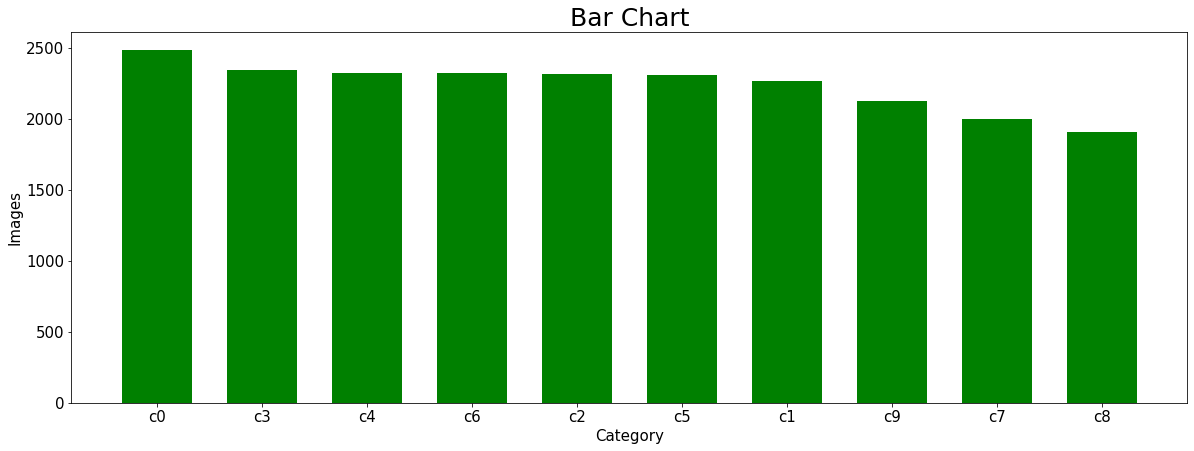

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

classes = driver_data['classname'].value_counts(sort=True)
labels = classes.index.tolist()
y = np.array(classes)
width = 1/1.5
N = len(y)
x = range(N)

fig = plt.figure(figsize=(20,15))
ay = fig.add_subplot(211)

plt.xticks(x, labels, size=15)
plt.yticks(size=15)

ay.bar(x, y, width, color="green")

plt.title('Bar Chart',size=25)
plt.xlabel('Category',size=15)
plt.ylabel('Images',size=15)

plt.show()

### Algorithms and Techniques

After analyzing the data and based on my learning from one of the earlier project about identifying the breed of the dog from the image, I believe that a CNN algorithm can help us get the good results for this problem.  We can also try to use the reansfer learning technique to our model. 

### Benchmark

For Benchmarking, our model can be compared against the top model from the [Public Leaderboard](https://www.kaggle.com/c/state-farm-distracted-driver-detection/leaderboard) for this competition. Our goal for this project would be to get into top top 50% of the public leaderboard.

<a id='step3'></a>
## Step 3: Methodology

In this section, we will pre-process the data for implementing the solution. Then we will develop our model.
Based on the results we may optimize the algorithm and fine tune the model to achieve expected results

### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [5]:
from tensorflow.python.keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In the code cell below We will rescale the images by dividing every pixel in every image by 255.

In [6]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
#test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 4485/4485 [00:20<00:00, 220.78it/s]


### Implementation

### Create a CNN to predict the behavior of the driver (from Scratch)

In this step, we will create a CNN that predict the behavior of the dog.  



To architect a CNN model for image classification generally 3 basic steps are required - which is Convolution(creating or adding convolution layer to extract features from the input image), Pooling(performed to reduce the dimensionality of each feature map) and finally comes flattening to convert the matrix into a linear array for the purpose of feeding it as a input to the nodes of neural network.


In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)               

### Compile the Model

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the Model

In the code cell below, we will train our model using model checkpointing to save the model that attains the best validation loss.


In [8]:
from tensorflow.python.keras.callbacks import ModelCheckpoint  

epochs = 40

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=30, callbacks=[checkpointer], verbose=1)

Train on 17939 samples, validate on 4485 samples
Epoch 1/40
17910/17939 [============================>.] - ETA: 0s - loss: 2.3008 - accuracy: 0.1122
Epoch 00001: val_loss improved from inf to 2.29802, saving model to saved_models/weights.best.from_scratch.hdf5
17939/17939 [==============================] - 66s 4ms/sample - loss: 2.3008 - accuracy: 0.1122 - val_loss: 2.2980 - val_accuracy: 0.1135
Epoch 2/40
17910/17939 [============================>.] - ETA: 0s - loss: 2.2915 - accuracy: 0.1267
Epoch 00002: val_loss improved from 2.29802 to 2.28483, saving model to saved_models/weights.best.from_scratch.hdf5
17939/17939 [==============================] - 62s 3ms/sample - loss: 2.2915 - accuracy: 0.1268 - val_loss: 2.2848 - val_accuracy: 0.1128
Epoch 3/40
17910/17939 [============================>.] - ETA: 0s - loss: 2.2758 - accuracy: 0.1412
Epoch 00003: val_loss improved from 2.28483 to 2.27526, saving model to saved_models/weights.best.from_scratch.hdf5
17939/17939 [==================

17910/17939 [============================>.] - ETA: 0s - loss: 1.6897 - accuracy: 0.3984
Epoch 00025: val_loss improved from 1.66691 to 1.65690, saving model to saved_models/weights.best.from_scratch.hdf5
17939/17939 [==============================] - 62s 3ms/sample - loss: 1.6895 - accuracy: 0.3984 - val_loss: 1.6569 - val_accuracy: 0.4143
Epoch 26/40
17910/17939 [============================>.] - ETA: 0s - loss: 1.6643 - accuracy: 0.4168
Epoch 00026: val_loss improved from 1.65690 to 1.59192, saving model to saved_models/weights.best.from_scratch.hdf5
17939/17939 [==============================] - 62s 3ms/sample - loss: 1.6641 - accuracy: 0.4168 - val_loss: 1.5919 - val_accuracy: 0.4475
Epoch 27/40
17910/17939 [============================>.] - ETA: 0s - loss: 1.6341 - accuracy: 0.4281
Epoch 00027: val_loss improved from 1.59192 to 1.56596, saving model to saved_models/weights.best.from_scratch.hdf5
17939/17939 [==============================] - 62s 3ms/sample - loss: 1.6343 - accura

### Load the Model with the Best Validation Loss

In [9]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out our model on the test dataset of driver images and make the predictions.

In [10]:
# get index of predicted behavior of the driver for each image in test set
driver_behavior_predictions = [model.predict(path_to_tensor(file).astype('float32')/255)[0] for file in tqdm(test_files)]


100%|██████████| 79726/79726 [3:38:52<00:00,  6.07it/s]    


### Create the prediction array.

In [11]:
test_files_names = [item_name[15:] for item_name in test_files]

predictions = np.column_stack((np.asarray(test_files_names), np.asarray(driver_behavior_predictions,dtype=np.float32)))

print(predictions[:20])

[['img_1.jpg' '0.11402403' '0.0078224735' '0.0035890867' '0.19863062'
  '0.23767951' '0.3799411' '0.0049114465' '0.00076625246' '0.0023899546'
  '0.05024558']
 ['img_10.jpg' '0.0020575158' '0.00042975493' '0.0886851' '0.0015423476'
  '0.0066707307' '0.87654' '0.003315933' '0.0029822043' '0.01446909'
  '0.0033072163']
 ['img_100.jpg' '0.24196304' '0.22115883' '0.0008192079' '0.47526452'
  '0.040150527' '5.587799e-05' '0.0022447945' '0.0014518363'
  '0.0001682109' '0.01672318']
 ['img_1000.jpg' '0.0045204232' '0.5877829' '0.0032005128' '0.022213658'
  '0.023396598' '3.8325055e-05' '0.1853934' '0.10024601' '0.038373746'
  '0.034834404']
 ['img_100000.jpg' '0.106197596' '0.062639646' '0.0024636711'
  '0.23225832' '0.4294789' '0.0078616915' '0.047895413' '0.001228099'
  '0.004936968' '0.1050398']
 ['img_100001.jpg' '0.42596167' '0.0060636727' '1.1817193e-11'
  '0.23199034' '0.00792352' '0.00011818644' '2.7737008e-06'
  '0.0001252083' '1.797448e-07' '0.32781452']
 ['img_100002.jpg' '0.030406

Create the csv file for the Kaggle submission.

In [12]:
np.savetxt('Submissions/submission1.csv',predictions, delimiter=',', comments='',  newline='\n', fmt='%s', header = 'img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9')

The first submission resulted in a public score of 1.96316 that would have ranked 1127 out of 1439 submissions on public leaderboard resulting in top 78%.

![Sample Image](Submissions/submission1.png)

### Refinement

### Train the CNN with the Transfer Learning

To reduce training time without sacrificing accuracy, we will train a CNN using transfer learning. 

In this section, we will import the pre-trained model VGG16 and use it.


In [7]:
from tensorflow.python.keras.applications.vgg16 import VGG16

#from tensorflow.python.keras.applications.resnet import ResNet50
#Resnet50_model = ResNet50(include_top = False, weights = 'imagenet')
#Resnet50_model.summary()

VGG16_model = VGG16(include_top=False, weights='imagenet')

VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Obtain Bottleneck Features

In this section, we will obtain the bottleneck features for the pre-trained VGG16 model.

In [9]:
#obtaining bottleneck features for the training data
VGG16_train_bottleneck_features = np.asarray([VGG16_model.predict(np.expand_dims(tensor, axis=0))[0] for tensor in tqdm(train_tensors)],dtype=np.float32)
np.save(open('bottleneck_features/VGG16_train_bottleneck_features.npy', 'wb'),VGG16_train_bottleneck_features)

#obtaining bottleneck features for the validation data
VGG16_valid_bottleneck_features = np.asarray([VGG16_model.predict(np.expand_dims(tensor, axis=0))[0] for tensor in tqdm(valid_tensors)],dtype=np.float32)
np.save(open('bottleneck_features/VGG16_valid_bottleneck_features.npy', 'wb'),VGG16_valid_bottleneck_features)




  2%|▏         | 442/17939 [00:21<11:43, 24.87it/s]


  5%|▍         | 886/17939 [00:39<11:42, 24.27it/s]


  7%|▋         | 1324/17939 [00:57<11:06, 24.91it/s]


 10%|▉         | 1762/17939 [01:15<10:58, 24.58it/s]


 12%|█▏        | 2200/17939 [01:33<10:53, 24.07it/s]


 15%|█▍        | 2638/17939 [01:50<10:31, 24.23it/s]


 17%|█▋        | 3076/17939 [02:08<10:15, 24.16it/s]


 20%|█▉        | 3514/17939 [02:26<09:47, 24.57it/s]


 22%|██▏       | 3952/17939 [02:44<09:39, 24.12it/s]


 24%|██▍       | 4390/17939 [03:02<09:21, 24.15it/s]


 27%|██▋       | 4828/17939 [03:20<09:03, 24.11it/s]


 29%|██▉       | 5266/17939 [03:38<08:44, 24.17it/s]


 32%|███▏      | 5704/17939 [03:55<08:15, 24.68it/s]


 34%|███▍      | 6142/17939 [04:13<07:53, 24.93it/s]


 37%|███▋      | 6580/17939 [04:31<07:45, 24.39it/s]


 39%|███▉      | 7018/17939 [04:49<07:33, 24.08it/s]


 42%|████▏     | 7456/17939 [05:07<07:14, 24.15it/s]


 44%|████▍     | 7894/17939 [05:25<06:48, 24.61it/s]


 46%|████▋     | 8332/17939 [05:43<06:32, 24.46it/s]


 49%|████▉     | 8770/17939 [06:01<06:15, 24.42it/s]


 51%|█████▏    | 9208/17939 [06:18<05:56, 24.49it/s]


 54%|█████▍    | 9646/17939 [06:36<05:32, 24.93it/s]


 56%|█████▌    | 10081/17939 [06:54<05:21, 24.46it/s]


 59%|█████▊    | 10510/17939 [07:11<04:59, 24.81it/s]


 61%|██████    | 10939/17939 [07:29<04:48, 24.23it/s]


 63%|██████▎   | 11368/17939 [07:46<04:23, 24.94it/s]


 66%|██████▌   | 11797/17939 [08:04<04:06, 24.95it/s]


 68%|██████▊   | 12226/17939 [08:21<03:57, 24.07it/s]


 71%|███████   | 12655/17939 [08:39<03:35, 24.53it/s]


 73%|███████▎  | 13084/17939 [08:56<03:17, 24.58it/s]


 75%|███████▌  | 13513/17939 [09:14<03:01, 24.34it/s]


 78%|███████▊  | 13942/17939 [09:31<02:40, 24.89it/s]


 80%|████████  | 14371/17939 [09:49<02:24, 24.77it/s]


 83%|████████▎ | 14800/17939 [10:06<02:07, 24.59it/s]


 85%|████████▍ | 15229/17939 [10:24<01:49, 24.71it/s]


 87%|████████▋ | 15658/17939 [10:41<01:34, 24.17it/s]


 90%|████████▉ | 16087/17939 [10:59<01:16, 24.16it/s]


 92%|█████████▏| 16516/17939 [11:16<00:57, 24.96it/s]


 94%|█████████▍| 16945/17939 [11:34<00:39, 25.05it/s]


 97%|█████████▋| 17374/17939 [11:51<00:22, 24.63it/s]


 99%|█████████▉| 17803/17939 [12:09<00:05, 24.84it/s]


100%|██████████| 17939/17939 [12:14<00:00, 24.42it/s]

  7%|▋         | 312/4485 [00:12<02:48, 24.81it/s]


 17%|█▋        | 765/4485 [00:31<02:33, 24.22it/s]


 27%|██▋       | 1215/4485 [00:49<02:14, 24.31it/s]


 37%|███▋      | 1659/4485 [01:07<01:57, 24.07it/s]


 47%|████▋     | 2103/4485 [01:25<01:38, 24.22it/s]


 57%|█████▋    | 2547/4485 [01:43<01:18, 24.61it/s]


 67%|██████▋   | 2991/4485 [02:01<01:01, 24.33it/s]


 77%|███████▋  | 3435/4485 [02:19<00:41, 25.08it/s]


 86%|████████▋ | 3879/4485 [02:37<00:24, 24.25it/s]


 96%|█████████▋| 4323/4485 [02:56<00:06, 23.99it/s]


100%|██████████| 4485/4485 [03:02<00:00, 24.55it/s]


In [12]:
#obtaining bottleneck features for the test data
VGG16_test_bottleneck_features = np.asarray([VGG16_model.predict(path_to_tensor(file).astype('float32')/255)[0] for file in tqdm(test_files)],dtype=np.float32)
np.save(open('bottleneck_features/VGG16_test_bottleneck_features.npy', 'wb'),VGG16_test_bottleneck_features)



  0%|          | 0/79726 [00:00<?, ?it/s]

  0%|          | 2/79726 [00:00<1:22:29, 16.11it/s]

  0%|          | 4/79726 [00:00<1:22:20, 16.14it/s]

  0%|          | 6/79726 [00:00<1:20:53, 16.42it/s]

  0%|          | 8/79726 [00:00<1:18:34, 16.91it/s]

  0%|          | 10/79726 [00:00<1:20:03, 16.59it/s]

  0%|          | 12/79726 [00:00<1:19:07, 16.79it/s]

  0%|          | 14/79726 [00:00<1:18:54, 16.84it/s]

  0%|          | 16/79726 [00:00<1:17:43, 17.09it/s]

  0%|          | 18/79726 [00:01<1:17:39, 17.11it/s]

  0%|          | 20/79726 [00:01<1:16:23, 17.39it/s]

  0%|          | 22/79726 [00:01<1:16:22, 17.39it/s]

  0%|          | 24/79726 [00:01<1:16:36, 17.34it/s]

  0%|          | 26/79726 [00:01<1:15:21, 17.63it/s]

  0%|          | 28/79726 [00:01<1:15:22, 17.62it/s]

  0%|          | 30/79726 [00:01<1:13:55, 17.97it/s]

  0%|          | 32/79726 [00:01<1:15:40, 17.55it/s]

  0%|          | 34/79726 [00:01<1:16:53, 17.27it/s]

  0%|          | 36/79726 [00:02<1:15:40,

  0%|          | 270/79726 [00:15<1:15:36, 17.52it/s]

  0%|          | 272/79726 [00:15<1:15:26, 17.55it/s]

  0%|          | 274/79726 [00:15<1:13:56, 17.91it/s]

  0%|          | 276/79726 [00:15<1:14:14, 17.84it/s]

  0%|          | 278/79726 [00:16<1:14:53, 17.68it/s]

  0%|          | 280/79726 [00:16<1:15:00, 17.65it/s]

  0%|          | 282/79726 [00:16<1:13:52, 17.92it/s]

  0%|          | 284/79726 [00:16<1:14:15, 17.83it/s]

  0%|          | 286/79726 [00:16<1:13:44, 17.95it/s]

  0%|          | 288/79726 [00:16<1:12:54, 18.16it/s]

  0%|          | 290/79726 [00:16<1:13:28, 18.02it/s]

  0%|          | 292/79726 [00:16<1:15:17, 17.58it/s]

  0%|          | 294/79726 [00:16<1:14:35, 17.75it/s]

  0%|          | 296/79726 [00:17<1:13:26, 18.03it/s]

  0%|          | 298/79726 [00:17<1:13:55, 17.91it/s]

  0%|          | 300/79726 [00:17<1:14:46, 17.70it/s]

  0%|          | 302/79726 [00:17<1:14:49, 17.69it/s]

  0%|          | 304/79726 [00:17<1:13:39, 17.97it/s]

  0%|     

  1%|          | 538/79726 [00:30<1:13:58, 17.84it/s]

  1%|          | 540/79726 [00:30<1:13:31, 17.95it/s]

  1%|          | 542/79726 [00:31<1:11:56, 18.35it/s]

  1%|          | 544/79726 [00:31<1:14:06, 17.81it/s]

  1%|          | 546/79726 [00:31<1:14:59, 17.60it/s]

  1%|          | 548/79726 [00:31<1:14:15, 17.77it/s]

  1%|          | 550/79726 [00:31<1:14:21, 17.74it/s]

  1%|          | 552/79726 [00:31<1:15:10, 17.55it/s]

  1%|          | 554/79726 [00:31<1:14:02, 17.82it/s]

  1%|          | 556/79726 [00:31<1:11:50, 18.37it/s]

  1%|          | 558/79726 [00:31<1:14:44, 17.65it/s]

  1%|          | 560/79726 [00:32<1:14:51, 17.63it/s]

  1%|          | 562/79726 [00:32<1:13:58, 17.83it/s]

  1%|          | 564/79726 [00:32<1:12:23, 18.23it/s]

  1%|          | 566/79726 [00:32<1:13:13, 18.02it/s]

  1%|          | 568/79726 [00:32<1:12:56, 18.09it/s]

  1%|          | 570/79726 [00:32<1:12:10, 18.28it/s]

  1%|          | 572/79726 [00:32<1:14:38, 17.68it/s]

  1%|     

  1%|          | 808/79726 [00:45<1:12:48, 18.06it/s]

  1%|          | 810/79726 [00:46<1:12:16, 18.20it/s]

  1%|          | 812/79726 [00:46<1:11:45, 18.33it/s]

  1%|          | 814/79726 [00:46<1:11:59, 18.27it/s]

  1%|          | 816/79726 [00:46<1:12:04, 18.25it/s]

  1%|          | 818/79726 [00:46<1:11:40, 18.35it/s]

  1%|          | 820/79726 [00:46<1:10:55, 18.54it/s]

  1%|          | 822/79726 [00:46<1:10:48, 18.57it/s]

  1%|          | 824/79726 [00:46<1:11:11, 18.47it/s]

  1%|          | 826/79726 [00:46<1:11:33, 18.38it/s]

  1%|          | 828/79726 [00:47<1:13:27, 17.90it/s]

  1%|          | 831/79726 [00:47<1:11:49, 18.31it/s]

  1%|          | 833/79726 [00:47<1:11:14, 18.46it/s]

  1%|          | 836/79726 [00:47<1:10:03, 18.77it/s]

  1%|          | 838/79726 [00:47<1:11:52, 18.29it/s]

  1%|          | 840/79726 [00:47<1:10:51, 18.55it/s]

  1%|          | 842/79726 [00:47<1:11:22, 18.42it/s]

  1%|          | 845/79726 [00:47<1:10:33, 18.63it/s]

  1%|     

  1%|▏         | 1080/79726 [01:00<1:09:46, 18.79it/s]

  1%|▏         | 1082/79726 [01:00<1:09:43, 18.80it/s]

  1%|▏         | 1084/79726 [01:01<1:09:08, 18.96it/s]

  1%|▏         | 1086/79726 [01:01<1:09:22, 18.89it/s]

  1%|▏         | 1088/79726 [01:01<1:08:14, 19.21it/s]

  1%|▏         | 1090/79726 [01:01<1:10:11, 18.67it/s]

  1%|▏         | 1092/79726 [01:01<1:10:23, 18.62it/s]

  1%|▏         | 1094/79726 [01:01<1:10:26, 18.60it/s]

  1%|▏         | 1096/79726 [01:01<1:09:00, 18.99it/s]

  1%|▏         | 1099/79726 [01:01<1:08:21, 19.17it/s]

  1%|▏         | 1101/79726 [01:01<1:08:49, 19.04it/s]

  1%|▏         | 1103/79726 [01:02<1:08:32, 19.12it/s]

  1%|▏         | 1105/79726 [01:02<1:08:55, 19.01it/s]

  1%|▏         | 1108/79726 [01:02<1:09:10, 18.94it/s]

  1%|▏         | 1110/79726 [01:02<1:09:43, 18.79it/s]

  1%|▏         | 1112/79726 [01:02<1:08:49, 19.04it/s]

  1%|▏         | 1114/79726 [01:02<1:08:31, 19.12it/s]

  1%|▏         | 1116/79726 [01:02<1:08:52, 19.0

  2%|▏         | 1350/79726 [01:15<1:13:23, 17.80it/s]

  2%|▏         | 1352/79726 [01:15<1:13:22, 17.80it/s]

  2%|▏         | 1354/79726 [01:15<1:14:59, 17.42it/s]

  2%|▏         | 1356/79726 [01:15<1:14:50, 17.45it/s]

  2%|▏         | 1358/79726 [01:16<1:14:34, 17.52it/s]

  2%|▏         | 1360/79726 [01:16<1:12:26, 18.03it/s]

  2%|▏         | 1362/79726 [01:16<1:12:10, 18.10it/s]

  2%|▏         | 1364/79726 [01:16<1:12:10, 18.10it/s]

  2%|▏         | 1366/79726 [01:16<1:10:45, 18.46it/s]

  2%|▏         | 1368/79726 [01:16<1:10:57, 18.40it/s]

  2%|▏         | 1370/79726 [01:16<1:10:39, 18.48it/s]

  2%|▏         | 1372/79726 [01:16<1:10:36, 18.49it/s]

  2%|▏         | 1374/79726 [01:16<1:11:15, 18.33it/s]

  2%|▏         | 1376/79726 [01:17<1:11:43, 18.21it/s]

  2%|▏         | 1378/79726 [01:17<1:12:17, 18.06it/s]

  2%|▏         | 1380/79726 [01:17<1:12:29, 18.01it/s]

  2%|▏         | 1382/79726 [01:17<1:12:25, 18.03it/s]

  2%|▏         | 1384/79726 [01:17<1:13:21, 17.8

  2%|▏         | 1620/79726 [01:30<1:14:30, 17.47it/s]

  2%|▏         | 1622/79726 [01:30<1:14:21, 17.51it/s]

  2%|▏         | 1624/79726 [01:30<1:13:16, 17.77it/s]

  2%|▏         | 1626/79726 [01:30<1:13:40, 17.67it/s]

  2%|▏         | 1628/79726 [01:30<1:14:21, 17.50it/s]

  2%|▏         | 1630/79726 [01:31<1:14:26, 17.48it/s]

  2%|▏         | 1632/79726 [01:31<1:13:31, 17.70it/s]

  2%|▏         | 1634/79726 [01:31<1:12:41, 17.90it/s]

  2%|▏         | 1636/79726 [01:31<1:11:31, 18.20it/s]

  2%|▏         | 1638/79726 [01:31<1:10:53, 18.36it/s]

  2%|▏         | 1640/79726 [01:31<1:10:10, 18.54it/s]

  2%|▏         | 1642/79726 [01:31<1:09:37, 18.69it/s]

  2%|▏         | 1645/79726 [01:31<1:08:16, 19.06it/s]

  2%|▏         | 1647/79726 [01:31<1:11:11, 18.28it/s]

  2%|▏         | 1649/79726 [01:32<1:10:02, 18.58it/s]

  2%|▏         | 1651/79726 [01:32<1:11:57, 18.08it/s]

  2%|▏         | 1653/79726 [01:32<1:11:39, 18.16it/s]

  2%|▏         | 1656/79726 [01:32<1:10:46, 18.3

  2%|▏         | 1893/79726 [01:45<1:10:59, 18.27it/s]

  2%|▏         | 1895/79726 [01:45<1:11:37, 18.11it/s]

  2%|▏         | 1897/79726 [01:45<1:11:52, 18.05it/s]

  2%|▏         | 1899/79726 [01:45<1:12:02, 18.01it/s]

  2%|▏         | 1901/79726 [01:45<1:12:56, 17.78it/s]

  2%|▏         | 1903/79726 [01:45<1:12:58, 17.77it/s]

  2%|▏         | 1905/79726 [01:46<1:11:23, 18.17it/s]

  2%|▏         | 1907/79726 [01:46<1:11:23, 18.17it/s]

  2%|▏         | 1909/79726 [01:46<1:11:16, 18.20it/s]

  2%|▏         | 1912/79726 [01:46<1:09:20, 18.70it/s]

  2%|▏         | 1914/79726 [01:46<1:09:22, 18.69it/s]

  2%|▏         | 1916/79726 [01:46<1:11:59, 18.01it/s]

  2%|▏         | 1918/79726 [01:46<1:12:18, 17.93it/s]

  2%|▏         | 1920/79726 [01:46<1:12:32, 17.88it/s]

  2%|▏         | 1922/79726 [01:46<1:14:26, 17.42it/s]

  2%|▏         | 1924/79726 [01:47<1:14:13, 17.47it/s]

  2%|▏         | 1926/79726 [01:47<1:12:22, 17.92it/s]

  2%|▏         | 1928/79726 [01:47<1:10:48, 18.3

  3%|▎         | 2160/79726 [01:59<1:08:57, 18.75it/s]

  3%|▎         | 2162/79726 [02:00<1:08:15, 18.94it/s]

  3%|▎         | 2165/79726 [02:00<1:07:00, 19.29it/s]

  3%|▎         | 2167/79726 [02:00<1:08:45, 18.80it/s]

  3%|▎         | 2169/79726 [02:00<1:08:53, 18.76it/s]

  3%|▎         | 2171/79726 [02:00<1:10:14, 18.40it/s]

  3%|▎         | 2173/79726 [02:00<1:10:09, 18.42it/s]

  3%|▎         | 2175/79726 [02:00<1:11:26, 18.09it/s]

  3%|▎         | 2177/79726 [02:00<1:10:42, 18.28it/s]

  3%|▎         | 2179/79726 [02:00<1:11:31, 18.07it/s]

  3%|▎         | 2181/79726 [02:01<1:10:57, 18.22it/s]

  3%|▎         | 2183/79726 [02:01<1:10:56, 18.22it/s]

  3%|▎         | 2185/79726 [02:01<1:12:51, 17.74it/s]

  3%|▎         | 2187/79726 [02:01<1:11:28, 18.08it/s]

  3%|▎         | 2189/79726 [02:01<1:09:56, 18.47it/s]

  3%|▎         | 2191/79726 [02:01<1:11:38, 18.04it/s]

  3%|▎         | 2193/79726 [02:01<1:11:55, 17.97it/s]

  3%|▎         | 2195/79726 [02:01<1:12:26, 17.8

  3%|▎         | 2430/79726 [02:14<1:09:57, 18.41it/s]

  3%|▎         | 2432/79726 [02:14<1:08:52, 18.71it/s]

  3%|▎         | 2434/79726 [02:14<1:09:46, 18.46it/s]

  3%|▎         | 2436/79726 [02:14<1:12:32, 17.76it/s]

  3%|▎         | 2438/79726 [02:15<1:12:10, 17.85it/s]

  3%|▎         | 2440/79726 [02:15<1:10:27, 18.28it/s]

  3%|▎         | 2442/79726 [02:15<1:09:45, 18.47it/s]

  3%|▎         | 2444/79726 [02:15<1:09:26, 18.55it/s]

  3%|▎         | 2447/79726 [02:15<1:09:00, 18.67it/s]

  3%|▎         | 2449/79726 [02:15<1:09:06, 18.64it/s]

  3%|▎         | 2451/79726 [02:15<1:09:42, 18.48it/s]

  3%|▎         | 2453/79726 [02:15<1:10:05, 18.37it/s]

  3%|▎         | 2455/79726 [02:15<1:08:53, 18.70it/s]

  3%|▎         | 2457/79726 [02:16<1:12:41, 17.72it/s]

  3%|▎         | 2459/79726 [02:16<1:10:14, 18.33it/s]

  3%|▎         | 2461/79726 [02:16<1:10:28, 18.27it/s]

  3%|▎         | 2463/79726 [02:16<1:10:31, 18.26it/s]

  3%|▎         | 2465/79726 [02:16<1:10:28, 18.2

  3%|▎         | 2701/79726 [02:29<1:07:06, 19.13it/s]

  3%|▎         | 2703/79726 [02:29<1:08:08, 18.84it/s]

  3%|▎         | 2705/79726 [02:29<1:08:15, 18.81it/s]

  3%|▎         | 2707/79726 [02:29<1:11:34, 17.94it/s]

  3%|▎         | 2709/79726 [02:29<1:10:50, 18.12it/s]

  3%|▎         | 2711/79726 [02:29<1:10:31, 18.20it/s]

  3%|▎         | 2713/79726 [02:29<1:09:17, 18.52it/s]

  3%|▎         | 2715/79726 [02:29<1:09:35, 18.44it/s]

  3%|▎         | 2717/79726 [02:29<1:09:53, 18.36it/s]

  3%|▎         | 2719/79726 [02:30<1:10:05, 18.31it/s]

  3%|▎         | 2721/79726 [02:30<1:09:32, 18.46it/s]

  3%|▎         | 2723/79726 [02:30<1:09:18, 18.52it/s]

  3%|▎         | 2725/79726 [02:30<1:08:53, 18.63it/s]

  3%|▎         | 2727/79726 [02:30<1:08:34, 18.72it/s]

  3%|▎         | 2729/79726 [02:30<1:08:09, 18.83it/s]

  3%|▎         | 2731/79726 [02:30<1:08:37, 18.70it/s]

  3%|▎         | 2733/79726 [02:30<1:09:32, 18.45it/s]

  3%|▎         | 2735/79726 [02:30<1:09:47, 18.3

  4%|▎         | 2969/79726 [02:43<1:08:46, 18.60it/s]

  4%|▎         | 2971/79726 [02:43<1:08:30, 18.67it/s]

  4%|▎         | 2973/79726 [02:43<1:08:04, 18.79it/s]

  4%|▎         | 2975/79726 [02:43<1:08:29, 18.68it/s]

  4%|▎         | 2977/79726 [02:43<1:07:09, 19.05it/s]

  4%|▎         | 2979/79726 [02:44<1:07:53, 18.84it/s]

  4%|▎         | 2981/79726 [02:44<1:08:14, 18.74it/s]

  4%|▎         | 2983/79726 [02:44<1:08:57, 18.55it/s]

  4%|▎         | 2985/79726 [02:44<1:08:03, 18.79it/s]

  4%|▎         | 2987/79726 [02:44<1:08:01, 18.80it/s]

  4%|▎         | 2989/79726 [02:44<1:06:48, 19.14it/s]

  4%|▍         | 2991/79726 [02:44<1:08:28, 18.68it/s]

  4%|▍         | 2993/79726 [02:44<1:08:27, 18.68it/s]

  4%|▍         | 2995/79726 [02:44<1:08:39, 18.62it/s]

  4%|▍         | 2997/79726 [02:45<1:09:29, 18.40it/s]

  4%|▍         | 2999/79726 [02:45<1:09:43, 18.34it/s]

  4%|▍         | 3001/79726 [02:45<1:10:30, 18.13it/s]

  4%|▍         | 3003/79726 [02:45<1:09:50, 18.3

  4%|▍         | 3246/79726 [02:58<1:11:22, 17.86it/s]

  4%|▍         | 3248/79726 [02:58<1:10:21, 18.11it/s]

  4%|▍         | 3250/79726 [02:58<1:10:25, 18.10it/s]

  4%|▍         | 3252/79726 [02:59<1:10:38, 18.04it/s]

  4%|▍         | 3254/79726 [02:59<1:10:25, 18.10it/s]

  4%|▍         | 3256/79726 [02:59<1:10:39, 18.04it/s]

  4%|▍         | 3258/79726 [02:59<1:10:14, 18.15it/s]

  4%|▍         | 3260/79726 [02:59<1:10:31, 18.07it/s]

  4%|▍         | 3262/79726 [02:59<1:10:44, 18.01it/s]

  4%|▍         | 3264/79726 [02:59<1:10:31, 18.07it/s]

  4%|▍         | 3266/79726 [02:59<1:10:24, 18.10it/s]

  4%|▍         | 3268/79726 [02:59<1:10:20, 18.11it/s]

  4%|▍         | 3270/79726 [03:00<1:10:12, 18.15it/s]

  4%|▍         | 3272/79726 [03:00<1:10:57, 17.96it/s]

  4%|▍         | 3274/79726 [03:00<1:11:49, 17.74it/s]

  4%|▍         | 3276/79726 [03:00<1:12:28, 17.58it/s]

  4%|▍         | 3278/79726 [03:00<1:10:35, 18.05it/s]

  4%|▍         | 3280/79726 [03:00<1:10:41, 18.0

  4%|▍         | 3516/79726 [03:13<1:07:48, 18.73it/s]

  4%|▍         | 3519/79726 [03:13<1:07:31, 18.81it/s]

  4%|▍         | 3521/79726 [03:13<1:07:06, 18.92it/s]

  4%|▍         | 3523/79726 [03:13<1:08:13, 18.61it/s]

  4%|▍         | 3526/79726 [03:14<1:07:23, 18.84it/s]

  4%|▍         | 3528/79726 [03:14<1:06:32, 19.08it/s]

  4%|▍         | 3530/79726 [03:14<1:08:20, 18.58it/s]

  4%|▍         | 3532/79726 [03:14<1:09:51, 18.18it/s]

  4%|▍         | 3534/79726 [03:14<1:09:51, 18.18it/s]

  4%|▍         | 3536/79726 [03:14<1:08:32, 18.53it/s]

  4%|▍         | 3538/79726 [03:14<1:08:18, 18.59it/s]

  4%|▍         | 3540/79726 [03:14<1:08:46, 18.46it/s]

  4%|▍         | 3542/79726 [03:15<1:09:10, 18.36it/s]

  4%|▍         | 3544/79726 [03:15<1:12:00, 17.63it/s]

  4%|▍         | 3546/79726 [03:15<1:10:59, 17.89it/s]

  4%|▍         | 3548/79726 [03:15<1:15:42, 16.77it/s]

  4%|▍         | 3550/79726 [03:15<1:14:39, 17.01it/s]

  4%|▍         | 3552/79726 [03:15<1:12:43, 17.4

  5%|▍         | 3792/79726 [03:28<1:11:46, 17.63it/s]

  5%|▍         | 3794/79726 [03:28<1:10:36, 17.92it/s]

  5%|▍         | 3796/79726 [03:28<1:10:37, 17.92it/s]

  5%|▍         | 3798/79726 [03:29<1:10:38, 17.91it/s]

  5%|▍         | 3800/79726 [03:29<1:10:33, 17.93it/s]

  5%|▍         | 3802/79726 [03:29<1:08:24, 18.50it/s]

  5%|▍         | 3804/79726 [03:29<1:09:52, 18.11it/s]

  5%|▍         | 3806/79726 [03:29<1:10:17, 18.00it/s]

  5%|▍         | 3808/79726 [03:29<1:10:24, 17.97it/s]

  5%|▍         | 3811/79726 [03:29<1:09:29, 18.21it/s]

  5%|▍         | 3813/79726 [03:29<1:07:38, 18.71it/s]

  5%|▍         | 3815/79726 [03:29<1:08:09, 18.56it/s]

  5%|▍         | 3817/79726 [03:30<1:08:13, 18.54it/s]

  5%|▍         | 3819/79726 [03:30<1:08:23, 18.50it/s]

  5%|▍         | 3821/79726 [03:30<1:08:30, 18.47it/s]

  5%|▍         | 3823/79726 [03:30<1:08:02, 18.59it/s]

  5%|▍         | 3825/79726 [03:30<1:09:09, 18.29it/s]

  5%|▍         | 3827/79726 [03:30<1:09:14, 18.2

  5%|▌         | 4060/79726 [03:43<1:08:12, 18.49it/s]

  5%|▌         | 4062/79726 [03:43<1:08:41, 18.36it/s]

  5%|▌         | 4064/79726 [03:43<1:08:50, 18.32it/s]

  5%|▌         | 4066/79726 [03:43<1:08:15, 18.47it/s]

  5%|▌         | 4068/79726 [03:43<1:08:21, 18.45it/s]

  5%|▌         | 4070/79726 [03:43<1:08:02, 18.53it/s]

  5%|▌         | 4072/79726 [03:43<1:07:59, 18.54it/s]

  5%|▌         | 4074/79726 [03:44<1:07:48, 18.59it/s]

  5%|▌         | 4076/79726 [03:44<1:09:09, 18.23it/s]

  5%|▌         | 4078/79726 [03:44<1:10:28, 17.89it/s]

  5%|▌         | 4080/79726 [03:44<1:09:19, 18.19it/s]

  5%|▌         | 4082/79726 [03:44<1:09:57, 18.02it/s]

  5%|▌         | 4084/79726 [03:44<1:09:31, 18.13it/s]

  5%|▌         | 4086/79726 [03:44<1:09:13, 18.21it/s]

  5%|▌         | 4088/79726 [03:44<1:08:38, 18.37it/s]

  5%|▌         | 4090/79726 [03:44<1:08:35, 18.38it/s]

  5%|▌         | 4092/79726 [03:45<1:08:34, 18.38it/s]

  5%|▌         | 4094/79726 [03:45<1:09:07, 18.2

  5%|▌         | 4325/79726 [03:57<1:08:09, 18.44it/s]

  5%|▌         | 4327/79726 [03:57<1:08:26, 18.36it/s]

  5%|▌         | 4329/79726 [03:57<1:08:24, 18.37it/s]

  5%|▌         | 4331/79726 [03:58<1:08:19, 18.39it/s]

  5%|▌         | 4333/79726 [03:58<1:08:58, 18.22it/s]

  5%|▌         | 4336/79726 [03:58<1:06:50, 18.80it/s]

  5%|▌         | 4338/79726 [03:58<1:07:31, 18.61it/s]

  5%|▌         | 4340/79726 [03:58<1:06:40, 18.84it/s]

  5%|▌         | 4342/79726 [03:58<1:06:36, 18.86it/s]

  5%|▌         | 4344/79726 [03:58<1:06:10, 18.99it/s]

  5%|▌         | 4346/79726 [03:58<1:06:30, 18.89it/s]

  5%|▌         | 4348/79726 [03:58<1:07:18, 18.66it/s]

  5%|▌         | 4350/79726 [03:59<1:05:59, 19.04it/s]

  5%|▌         | 4352/79726 [03:59<1:07:31, 18.60it/s]

  5%|▌         | 4355/79726 [03:59<1:06:57, 18.76it/s]

  5%|▌         | 4357/79726 [03:59<1:06:16, 18.95it/s]

  5%|▌         | 4359/79726 [03:59<1:06:42, 18.83it/s]

  5%|▌         | 4361/79726 [03:59<1:05:36, 19.1

  6%|▌         | 4598/79726 [04:12<1:06:43, 18.77it/s]

  6%|▌         | 4600/79726 [04:12<1:06:11, 18.92it/s]

  6%|▌         | 4602/79726 [04:12<1:05:59, 18.97it/s]

  6%|▌         | 4604/79726 [04:12<1:08:40, 18.23it/s]

  6%|▌         | 4606/79726 [04:12<1:08:06, 18.38it/s]

  6%|▌         | 4608/79726 [04:13<1:09:01, 18.14it/s]

  6%|▌         | 4610/79726 [04:13<1:08:10, 18.36it/s]

  6%|▌         | 4612/79726 [04:13<1:07:34, 18.53it/s]

  6%|▌         | 4614/79726 [04:13<1:09:01, 18.14it/s]

  6%|▌         | 4616/79726 [04:13<1:07:47, 18.47it/s]

  6%|▌         | 4618/79726 [04:13<1:07:31, 18.54it/s]

  6%|▌         | 4620/79726 [04:13<1:07:56, 18.42it/s]

  6%|▌         | 4623/79726 [04:13<1:06:43, 18.76it/s]

  6%|▌         | 4625/79726 [04:13<1:07:29, 18.55it/s]

  6%|▌         | 4627/79726 [04:14<1:07:11, 18.63it/s]

  6%|▌         | 4629/79726 [04:14<1:06:26, 18.84it/s]

  6%|▌         | 4631/79726 [04:14<1:07:07, 18.64it/s]

  6%|▌         | 4634/79726 [04:14<1:05:45, 19.0

  6%|▌         | 4868/79726 [04:27<1:07:48, 18.40it/s]

  6%|▌         | 4870/79726 [04:27<1:07:59, 18.35it/s]

  6%|▌         | 4872/79726 [04:27<1:08:18, 18.26it/s]

  6%|▌         | 4874/79726 [04:27<1:09:28, 17.96it/s]

  6%|▌         | 4876/79726 [04:27<1:08:47, 18.14it/s]

  6%|▌         | 4878/79726 [04:27<1:08:40, 18.17it/s]

  6%|▌         | 4880/79726 [04:27<1:07:37, 18.45it/s]

  6%|▌         | 4882/79726 [04:27<1:07:54, 18.37it/s]

  6%|▌         | 4884/79726 [04:28<1:08:11, 18.29it/s]

  6%|▌         | 4886/79726 [04:28<1:08:18, 18.26it/s]

  6%|▌         | 4888/79726 [04:28<1:08:22, 18.24it/s]

  6%|▌         | 4890/79726 [04:28<1:06:36, 18.73it/s]

  6%|▌         | 4892/79726 [04:28<1:09:04, 18.06it/s]

  6%|▌         | 4894/79726 [04:28<1:09:36, 17.92it/s]

  6%|▌         | 4896/79726 [04:28<1:10:23, 17.72it/s]

  6%|▌         | 4898/79726 [04:28<1:09:56, 17.83it/s]

  6%|▌         | 4900/79726 [04:28<1:12:46, 17.14it/s]

  6%|▌         | 4902/79726 [04:29<1:11:40, 17.4

  6%|▋         | 5135/79726 [04:41<1:05:33, 18.96it/s]

  6%|▋         | 5137/79726 [04:41<1:07:21, 18.45it/s]

  6%|▋         | 5139/79726 [04:42<1:07:40, 18.37it/s]

  6%|▋         | 5141/79726 [04:42<1:07:51, 18.32it/s]

  6%|▋         | 5143/79726 [04:42<1:06:26, 18.71it/s]

  6%|▋         | 5145/79726 [04:42<1:09:07, 17.98it/s]

  6%|▋         | 5147/79726 [04:42<1:08:05, 18.25it/s]

  6%|▋         | 5149/79726 [04:42<1:08:11, 18.23it/s]

  6%|▋         | 5151/79726 [04:42<1:07:48, 18.33it/s]

  6%|▋         | 5153/79726 [04:42<1:06:50, 18.59it/s]

  6%|▋         | 5155/79726 [04:42<1:07:16, 18.47it/s]

  6%|▋         | 5157/79726 [04:43<1:05:47, 18.89it/s]

  6%|▋         | 5159/79726 [04:43<1:06:31, 18.68it/s]

  6%|▋         | 5161/79726 [04:43<1:05:50, 18.87it/s]

  6%|▋         | 5163/79726 [04:43<1:05:58, 18.84it/s]

  6%|▋         | 5165/79726 [04:43<1:04:49, 19.17it/s]

  6%|▋         | 5167/79726 [04:43<1:05:51, 18.87it/s]

  6%|▋         | 5170/79726 [04:43<1:05:31, 18.9

  7%|▋         | 5409/79726 [04:56<1:08:23, 18.11it/s]

  7%|▋         | 5411/79726 [04:56<1:06:31, 18.62it/s]

  7%|▋         | 5413/79726 [04:56<1:06:32, 18.61it/s]

  7%|▋         | 5415/79726 [04:57<1:05:47, 18.82it/s]

  7%|▋         | 5417/79726 [04:57<1:07:33, 18.33it/s]

  7%|▋         | 5419/79726 [04:57<1:08:13, 18.15it/s]

  7%|▋         | 5421/79726 [04:57<1:07:05, 18.46it/s]

  7%|▋         | 5423/79726 [04:57<1:08:34, 18.06it/s]

  7%|▋         | 5425/79726 [04:57<1:08:08, 18.17it/s]

  7%|▋         | 5427/79726 [04:57<1:06:33, 18.60it/s]

  7%|▋         | 5429/79726 [04:57<1:08:57, 17.96it/s]

  7%|▋         | 5431/79726 [04:57<1:07:43, 18.28it/s]

  7%|▋         | 5433/79726 [04:58<1:07:13, 18.42it/s]

  7%|▋         | 5435/79726 [04:58<1:08:32, 18.06it/s]

  7%|▋         | 5437/79726 [04:58<1:08:52, 17.98it/s]

  7%|▋         | 5439/79726 [04:58<1:09:13, 17.89it/s]

  7%|▋         | 5441/79726 [04:58<1:08:48, 17.99it/s]

  7%|▋         | 5443/79726 [04:58<1:09:55, 17.7

  7%|▋         | 5678/79726 [05:11<1:06:15, 18.63it/s]

  7%|▋         | 5681/79726 [05:11<1:05:26, 18.86it/s]

  7%|▋         | 5683/79726 [05:11<1:04:30, 19.13it/s]

  7%|▋         | 5686/79726 [05:11<1:04:00, 19.28it/s]

  7%|▋         | 5688/79726 [05:11<1:05:32, 18.82it/s]

  7%|▋         | 5690/79726 [05:11<1:05:22, 18.87it/s]

  7%|▋         | 5692/79726 [05:12<1:05:42, 18.78it/s]

  7%|▋         | 5694/79726 [05:12<1:04:53, 19.01it/s]

  7%|▋         | 5696/79726 [05:12<1:04:28, 19.13it/s]

  7%|▋         | 5698/79726 [05:12<1:04:09, 19.23it/s]

  7%|▋         | 5700/79726 [05:12<1:06:01, 18.69it/s]

  7%|▋         | 5702/79726 [05:12<1:07:07, 18.38it/s]

  7%|▋         | 5704/79726 [05:12<1:07:28, 18.28it/s]

  7%|▋         | 5706/79726 [05:12<1:07:21, 18.31it/s]

  7%|▋         | 5708/79726 [05:12<1:05:53, 18.72it/s]

  7%|▋         | 5710/79726 [05:13<1:05:49, 18.74it/s]

  7%|▋         | 5712/79726 [05:13<1:06:21, 18.59it/s]

  7%|▋         | 5714/79726 [05:13<1:06:51, 18.4

  7%|▋         | 5954/79726 [05:26<1:07:45, 18.15it/s]

  7%|▋         | 5957/79726 [05:26<1:05:40, 18.72it/s]

  7%|▋         | 5959/79726 [05:26<1:06:29, 18.49it/s]

  7%|▋         | 5961/79726 [05:26<1:06:51, 18.39it/s]

  7%|▋         | 5963/79726 [05:26<1:06:16, 18.55it/s]

  7%|▋         | 5965/79726 [05:26<1:06:14, 18.56it/s]

  7%|▋         | 5967/79726 [05:26<1:05:51, 18.66it/s]

  7%|▋         | 5969/79726 [05:26<1:05:35, 18.74it/s]

  7%|▋         | 5971/79726 [05:26<1:05:35, 18.74it/s]

  7%|▋         | 5973/79726 [05:27<1:05:24, 18.79it/s]

  7%|▋         | 5975/79726 [05:27<1:05:49, 18.67it/s]

  7%|▋         | 5977/79726 [05:27<1:06:07, 18.59it/s]

  7%|▋         | 5979/79726 [05:27<1:06:03, 18.61it/s]

  8%|▊         | 5981/79726 [05:27<1:05:01, 18.90it/s]

  8%|▊         | 5983/79726 [05:27<1:05:03, 18.89it/s]

  8%|▊         | 5985/79726 [05:27<1:05:52, 18.66it/s]

  8%|▊         | 5987/79726 [05:27<1:08:14, 18.01it/s]

  8%|▊         | 5990/79726 [05:28<1:07:25, 18.2

  8%|▊         | 6238/79726 [05:41<1:03:34, 19.27it/s]

  8%|▊         | 6240/79726 [05:41<1:04:40, 18.94it/s]

  8%|▊         | 6242/79726 [05:41<1:04:56, 18.86it/s]

  8%|▊         | 6244/79726 [05:41<1:12:50, 16.81it/s]

  8%|▊         | 6246/79726 [05:41<1:11:14, 17.19it/s]

  8%|▊         | 6248/79726 [05:41<1:12:28, 16.90it/s]

  8%|▊         | 6250/79726 [05:41<1:12:10, 16.97it/s]

  8%|▊         | 6252/79726 [05:41<1:10:25, 17.39it/s]

  8%|▊         | 6254/79726 [05:42<1:10:03, 17.48it/s]

  8%|▊         | 6256/79726 [05:42<1:08:59, 17.75it/s]

  8%|▊         | 6258/79726 [05:42<1:08:29, 17.88it/s]

  8%|▊         | 6260/79726 [05:42<1:08:21, 17.91it/s]

  8%|▊         | 6263/79726 [05:42<1:07:04, 18.26it/s]

  8%|▊         | 6265/79726 [05:42<1:05:36, 18.66it/s]

  8%|▊         | 6267/79726 [05:42<1:05:00, 18.83it/s]

  8%|▊         | 6270/79726 [05:42<1:03:36, 19.24it/s]

  8%|▊         | 6272/79726 [05:42<1:05:03, 18.82it/s]

  8%|▊         | 6274/79726 [05:43<1:05:50, 18.5

  8%|▊         | 6515/79726 [05:55<1:03:02, 19.35it/s]

  8%|▊         | 6517/79726 [05:55<1:02:28, 19.53it/s]

  8%|▊         | 6519/79726 [05:56<1:03:18, 19.27it/s]

  8%|▊         | 6521/79726 [05:56<1:03:32, 19.20it/s]

  8%|▊         | 6523/79726 [05:56<1:02:58, 19.38it/s]

  8%|▊         | 6525/79726 [05:56<1:02:23, 19.55it/s]

  8%|▊         | 6527/79726 [05:56<1:03:47, 19.13it/s]

  8%|▊         | 6530/79726 [05:56<1:03:47, 19.12it/s]

  8%|▊         | 6532/79726 [05:56<1:03:42, 19.15it/s]

  8%|▊         | 6534/79726 [05:56<1:03:28, 19.22it/s]

  8%|▊         | 6536/79726 [05:56<1:03:35, 19.18it/s]

  8%|▊         | 6538/79726 [05:57<1:03:18, 19.27it/s]

  8%|▊         | 6540/79726 [05:57<1:03:28, 19.22it/s]

  8%|▊         | 6542/79726 [05:57<1:03:29, 19.21it/s]

  8%|▊         | 6545/79726 [05:57<1:03:28, 19.22it/s]

  8%|▊         | 6547/79726 [05:57<1:02:44, 19.44it/s]

  8%|▊         | 6549/79726 [05:57<1:04:59, 18.76it/s]

  8%|▊         | 6551/79726 [05:57<1:05:01, 18.7

  9%|▊         | 6788/79726 [06:10<1:04:05, 18.97it/s]

  9%|▊         | 6790/79726 [06:10<1:04:03, 18.98it/s]

  9%|▊         | 6792/79726 [06:10<1:04:06, 18.96it/s]

  9%|▊         | 6794/79726 [06:10<1:03:36, 19.11it/s]

  9%|▊         | 6796/79726 [06:10<1:03:44, 19.07it/s]

  9%|▊         | 6798/79726 [06:10<1:02:51, 19.34it/s]

  9%|▊         | 6800/79726 [06:10<1:03:42, 19.08it/s]

  9%|▊         | 6802/79726 [06:11<1:03:11, 19.23it/s]

  9%|▊         | 6804/79726 [06:11<1:04:10, 18.94it/s]

  9%|▊         | 6806/79726 [06:11<1:03:59, 18.99it/s]

  9%|▊         | 6808/79726 [06:11<1:03:47, 19.05it/s]

  9%|▊         | 6810/79726 [06:11<1:03:44, 19.07it/s]

  9%|▊         | 6813/79726 [06:11<1:02:56, 19.31it/s]

  9%|▊         | 6815/79726 [06:11<1:03:28, 19.14it/s]

  9%|▊         | 6817/79726 [06:11<1:03:11, 19.23it/s]

  9%|▊         | 6819/79726 [06:11<1:03:42, 19.07it/s]

  9%|▊         | 6821/79726 [06:12<1:03:19, 19.19it/s]

  9%|▊         | 6823/79726 [06:12<1:05:16, 18.6

  9%|▉         | 7062/79726 [06:25<1:09:14, 17.49it/s]

  9%|▉         | 7064/79726 [06:25<1:07:15, 18.00it/s]

  9%|▉         | 7066/79726 [06:25<1:07:06, 18.04it/s]

  9%|▉         | 7068/79726 [06:25<1:06:54, 18.10it/s]

  9%|▉         | 7070/79726 [06:25<1:05:02, 18.62it/s]

  9%|▉         | 7072/79726 [06:25<1:06:56, 18.09it/s]

  9%|▉         | 7074/79726 [06:25<1:05:05, 18.60it/s]

  9%|▉         | 7076/79726 [06:25<1:05:51, 18.38it/s]

  9%|▉         | 7078/79726 [06:25<1:06:04, 18.32it/s]

  9%|▉         | 7080/79726 [06:26<1:09:49, 17.34it/s]

  9%|▉         | 7082/79726 [06:26<1:08:51, 17.58it/s]

  9%|▉         | 7084/79726 [06:26<1:08:12, 17.75it/s]

  9%|▉         | 7086/79726 [06:26<1:07:44, 17.87it/s]

  9%|▉         | 7088/79726 [06:26<1:07:20, 17.98it/s]

  9%|▉         | 7090/79726 [06:26<1:10:44, 17.11it/s]

  9%|▉         | 7093/79726 [06:26<1:08:53, 17.57it/s]

  9%|▉         | 7095/79726 [06:26<1:06:22, 18.24it/s]

  9%|▉         | 7097/79726 [06:26<1:06:59, 18.0

  9%|▉         | 7335/79726 [06:39<1:03:15, 19.07it/s]

  9%|▉         | 7337/79726 [06:39<1:03:38, 18.96it/s]

  9%|▉         | 7339/79726 [06:39<1:05:07, 18.52it/s]

  9%|▉         | 7341/79726 [06:40<1:06:06, 18.25it/s]

  9%|▉         | 7343/79726 [06:40<1:05:30, 18.41it/s]

  9%|▉         | 7345/79726 [06:40<1:05:48, 18.33it/s]

  9%|▉         | 7347/79726 [06:40<1:05:11, 18.50it/s]

  9%|▉         | 7349/79726 [06:40<1:03:51, 18.89it/s]

  9%|▉         | 7351/79726 [06:40<1:04:17, 18.76it/s]

  9%|▉         | 7353/79726 [06:40<1:04:09, 18.80it/s]

  9%|▉         | 7356/79726 [06:40<1:02:28, 19.31it/s]

  9%|▉         | 7358/79726 [06:40<1:05:41, 18.36it/s]

  9%|▉         | 7360/79726 [06:41<1:04:28, 18.71it/s]

  9%|▉         | 7362/79726 [06:41<1:05:04, 18.53it/s]

  9%|▉         | 7364/79726 [06:41<1:04:51, 18.59it/s]

  9%|▉         | 7366/79726 [06:41<1:04:09, 18.80it/s]

  9%|▉         | 7369/79726 [06:41<1:02:27, 19.31it/s]

  9%|▉         | 7371/79726 [06:41<1:03:36, 18.9

 10%|▉         | 7604/79726 [06:54<1:10:47, 16.98it/s]

 10%|▉         | 7606/79726 [06:54<1:09:30, 17.29it/s]

 10%|▉         | 7608/79726 [06:54<1:07:22, 17.84it/s]

 10%|▉         | 7610/79726 [06:54<1:06:38, 18.04it/s]

 10%|▉         | 7612/79726 [06:54<1:06:16, 18.13it/s]

 10%|▉         | 7614/79726 [06:54<1:06:16, 18.13it/s]

 10%|▉         | 7616/79726 [06:55<1:05:51, 18.25it/s]

 10%|▉         | 7618/79726 [06:55<1:05:30, 18.34it/s]

 10%|▉         | 7620/79726 [06:55<1:06:53, 17.97it/s]

 10%|▉         | 7622/79726 [06:55<1:06:11, 18.15it/s]

 10%|▉         | 7624/79726 [06:55<1:04:21, 18.67it/s]

 10%|▉         | 7626/79726 [06:55<1:05:00, 18.49it/s]

 10%|▉         | 7628/79726 [06:55<1:03:53, 18.81it/s]

 10%|▉         | 7630/79726 [06:55<1:05:19, 18.40it/s]

 10%|▉         | 7632/79726 [06:55<1:04:52, 18.52it/s]

 10%|▉         | 7634/79726 [06:56<1:05:53, 18.23it/s]

 10%|▉         | 7636/79726 [06:56<1:06:47, 17.99it/s]

 10%|▉         | 7638/79726 [06:56<1:06:21, 18.1

 10%|▉         | 7870/79726 [07:09<1:05:35, 18.26it/s]

 10%|▉         | 7872/79726 [07:09<1:04:58, 18.43it/s]

 10%|▉         | 7875/79726 [07:09<1:03:25, 18.88it/s]

 10%|▉         | 7877/79726 [07:09<1:04:10, 18.66it/s]

 10%|▉         | 7879/79726 [07:09<1:05:22, 18.32it/s]

 10%|▉         | 7882/79726 [07:09<1:04:15, 18.64it/s]

 10%|▉         | 7884/79726 [07:09<1:05:11, 18.37it/s]

 10%|▉         | 7886/79726 [07:09<1:05:45, 18.21it/s]

 10%|▉         | 7888/79726 [07:10<1:05:54, 18.17it/s]

 10%|▉         | 7890/79726 [07:10<1:05:13, 18.35it/s]

 10%|▉         | 7892/79726 [07:10<1:04:17, 18.62it/s]

 10%|▉         | 7894/79726 [07:10<1:04:13, 18.64it/s]

 10%|▉         | 7897/79726 [07:10<1:02:51, 19.04it/s]

 10%|▉         | 7899/79726 [07:10<1:03:43, 18.79it/s]

 10%|▉         | 7901/79726 [07:10<1:04:19, 18.61it/s]

 10%|▉         | 7903/79726 [07:10<1:03:33, 18.83it/s]

 10%|▉         | 7905/79726 [07:10<1:04:09, 18.66it/s]

 10%|▉         | 7907/79726 [07:11<1:04:09, 18.6

 10%|█         | 8145/79726 [07:23<1:03:23, 18.82it/s]

 10%|█         | 8147/79726 [07:23<1:03:38, 18.75it/s]

 10%|█         | 8149/79726 [07:24<1:03:00, 18.94it/s]

 10%|█         | 8151/79726 [07:24<1:03:48, 18.70it/s]

 10%|█         | 8153/79726 [07:24<1:03:41, 18.73it/s]

 10%|█         | 8155/79726 [07:24<1:03:08, 18.89it/s]

 10%|█         | 8157/79726 [07:24<1:03:50, 18.68it/s]

 10%|█         | 8160/79726 [07:24<1:02:33, 19.07it/s]

 10%|█         | 8162/79726 [07:24<1:04:44, 18.42it/s]

 10%|█         | 8164/79726 [07:24<1:03:51, 18.68it/s]

 10%|█         | 8166/79726 [07:24<1:06:10, 18.02it/s]

 10%|█         | 8168/79726 [07:25<1:05:43, 18.15it/s]

 10%|█         | 8170/79726 [07:25<1:04:06, 18.60it/s]

 10%|█         | 8172/79726 [07:25<1:03:56, 18.65it/s]

 10%|█         | 8174/79726 [07:25<1:03:16, 18.85it/s]

 10%|█         | 8176/79726 [07:25<1:03:17, 18.84it/s]

 10%|█         | 8178/79726 [07:25<1:02:47, 18.99it/s]

 10%|█         | 8180/79726 [07:25<1:03:05, 18.9

 11%|█         | 8413/79726 [07:38<1:04:29, 18.43it/s]

 11%|█         | 8415/79726 [07:38<1:03:48, 18.62it/s]

 11%|█         | 8418/79726 [07:38<1:03:35, 18.69it/s]

 11%|█         | 8420/79726 [07:38<1:03:41, 18.66it/s]

 11%|█         | 8422/79726 [07:38<1:02:44, 18.94it/s]

 11%|█         | 8424/79726 [07:38<1:02:20, 19.06it/s]

 11%|█         | 8426/79726 [07:39<1:02:43, 18.94it/s]

 11%|█         | 8429/79726 [07:39<1:02:11, 19.11it/s]

 11%|█         | 8431/79726 [07:39<1:02:38, 18.97it/s]

 11%|█         | 8433/79726 [07:39<1:03:17, 18.77it/s]

 11%|█         | 8435/79726 [07:39<1:07:25, 17.62it/s]

 11%|█         | 8437/79726 [07:39<1:06:49, 17.78it/s]

 11%|█         | 8439/79726 [07:39<1:05:11, 18.22it/s]

 11%|█         | 8441/79726 [07:39<1:05:12, 18.22it/s]

 11%|█         | 8443/79726 [07:40<1:04:41, 18.36it/s]

 11%|█         | 8445/79726 [07:40<1:04:53, 18.31it/s]

 11%|█         | 8447/79726 [07:40<1:03:45, 18.63it/s]

 11%|█         | 8449/79726 [07:40<1:03:39, 18.6

 11%|█         | 8681/79726 [07:52<1:05:23, 18.11it/s]

 11%|█         | 8683/79726 [07:53<1:05:10, 18.17it/s]

 11%|█         | 8685/79726 [07:53<1:05:32, 18.06it/s]

 11%|█         | 8687/79726 [07:53<1:04:33, 18.34it/s]

 11%|█         | 8689/79726 [07:53<1:03:28, 18.65it/s]

 11%|█         | 8691/79726 [07:53<1:04:01, 18.49it/s]

 11%|█         | 8693/79726 [07:53<1:06:36, 17.77it/s]

 11%|█         | 8695/79726 [07:53<1:05:56, 17.96it/s]

 11%|█         | 8697/79726 [07:53<1:05:48, 17.99it/s]

 11%|█         | 8699/79726 [07:53<1:05:54, 17.96it/s]

 11%|█         | 8701/79726 [07:54<1:04:59, 18.21it/s]

 11%|█         | 8703/79726 [07:54<1:04:47, 18.27it/s]

 11%|█         | 8705/79726 [07:54<1:05:00, 18.21it/s]

 11%|█         | 8707/79726 [07:54<1:04:31, 18.34it/s]

 11%|█         | 8709/79726 [07:54<1:04:43, 18.29it/s]

 11%|█         | 8711/79726 [07:54<1:04:19, 18.40it/s]

 11%|█         | 8713/79726 [07:54<1:03:13, 18.72it/s]

 11%|█         | 8715/79726 [07:54<1:02:38, 18.8

 11%|█         | 8948/79726 [08:07<1:04:44, 18.22it/s]

 11%|█         | 8950/79726 [08:07<1:04:11, 18.37it/s]

 11%|█         | 8952/79726 [08:07<1:04:07, 18.40it/s]

 11%|█         | 8954/79726 [08:07<1:04:42, 18.23it/s]

 11%|█         | 8956/79726 [08:07<1:05:35, 17.98it/s]

 11%|█         | 8958/79726 [08:08<1:05:51, 17.91it/s]

 11%|█         | 8960/79726 [08:08<1:05:30, 18.01it/s]

 11%|█         | 8962/79726 [08:08<1:05:47, 17.93it/s]

 11%|█         | 8964/79726 [08:08<1:05:16, 18.07it/s]

 11%|█         | 8966/79726 [08:08<1:05:27, 18.02it/s]

 11%|█         | 8968/79726 [08:08<1:06:06, 17.84it/s]

 11%|█▏        | 8970/79726 [08:08<1:05:51, 17.91it/s]

 11%|█▏        | 8972/79726 [08:08<1:06:33, 17.72it/s]

 11%|█▏        | 8974/79726 [08:08<1:06:20, 17.77it/s]

 11%|█▏        | 8976/79726 [08:09<1:06:26, 17.75it/s]

 11%|█▏        | 8978/79726 [08:09<1:05:41, 17.95it/s]

 11%|█▏        | 8980/79726 [08:09<1:05:22, 18.03it/s]

 11%|█▏        | 8982/79726 [08:09<1:06:03, 17.8

 12%|█▏        | 9213/79726 [08:22<1:06:15, 17.73it/s]

 12%|█▏        | 9215/79726 [08:22<1:06:16, 17.73it/s]

 12%|█▏        | 9217/79726 [08:22<1:06:19, 17.72it/s]

 12%|█▏        | 9219/79726 [08:22<1:05:42, 17.89it/s]

 12%|█▏        | 9221/79726 [08:22<1:07:00, 17.54it/s]

 12%|█▏        | 9223/79726 [08:22<1:05:09, 18.03it/s]

 12%|█▏        | 9225/79726 [08:22<1:06:15, 17.73it/s]

 12%|█▏        | 9227/79726 [08:22<1:04:39, 18.17it/s]

 12%|█▏        | 9229/79726 [08:23<1:03:58, 18.37it/s]

 12%|█▏        | 9231/79726 [08:23<1:02:58, 18.66it/s]

 12%|█▏        | 9233/79726 [08:23<1:02:55, 18.67it/s]

 12%|█▏        | 9235/79726 [08:23<1:05:11, 18.02it/s]

 12%|█▏        | 9237/79726 [08:23<1:03:17, 18.56it/s]

 12%|█▏        | 9239/79726 [08:23<1:03:39, 18.45it/s]

 12%|█▏        | 9241/79726 [08:23<1:03:56, 18.37it/s]

 12%|█▏        | 9243/79726 [08:23<1:02:54, 18.67it/s]

 12%|█▏        | 9245/79726 [08:23<1:03:28, 18.51it/s]

 12%|█▏        | 9247/79726 [08:24<1:03:35, 18.4

 12%|█▏        | 9481/79726 [08:36<1:00:48, 19.25it/s]

 12%|█▏        | 9483/79726 [08:36<1:00:14, 19.44it/s]

 12%|█▏        | 9485/79726 [08:36<1:00:51, 19.24it/s]

 12%|█▏        | 9487/79726 [08:36<1:00:48, 19.25it/s]

 12%|█▏        | 9489/79726 [08:37<1:01:29, 19.04it/s]

 12%|█▏        | 9491/79726 [08:37<1:01:26, 19.05it/s]

 12%|█▏        | 9493/79726 [08:37<1:01:13, 19.12it/s]

 12%|█▏        | 9495/79726 [08:37<1:02:09, 18.83it/s]

 12%|█▏        | 9498/79726 [08:37<1:01:24, 19.06it/s]

 12%|█▏        | 9500/79726 [08:37<1:00:36, 19.31it/s]

 12%|█▏        | 9502/79726 [08:37<1:01:25, 19.05it/s]

 12%|█▏        | 9504/79726 [08:37<1:02:21, 18.77it/s]

 12%|█▏        | 9506/79726 [08:37<1:02:18, 18.79it/s]

 12%|█▏        | 9508/79726 [08:38<1:02:31, 18.72it/s]

 12%|█▏        | 9510/79726 [08:38<1:02:00, 18.87it/s]

 12%|█▏        | 9512/79726 [08:38<1:01:32, 19.01it/s]

 12%|█▏        | 9514/79726 [08:38<1:01:36, 18.99it/s]

 12%|█▏        | 9516/79726 [08:38<1:01:41, 18.9

 12%|█▏        | 9759/79726 [08:51<1:00:27, 19.29it/s]

 12%|█▏        | 9761/79726 [08:51<1:00:30, 19.27it/s]

 12%|█▏        | 9764/79726 [08:51<59:40, 19.54it/s]  

 12%|█▏        | 9766/79726 [08:51<1:01:05, 19.09it/s]

 12%|█▏        | 9768/79726 [08:51<1:00:32, 19.26it/s]

 12%|█▏        | 9770/79726 [08:51<1:01:09, 19.06it/s]

 12%|█▏        | 9772/79726 [08:51<1:00:29, 19.27it/s]

 12%|█▏        | 9774/79726 [08:52<59:54, 19.46it/s]  

 12%|█▏        | 9776/79726 [08:52<1:00:30, 19.27it/s]

 12%|█▏        | 9778/79726 [08:52<1:00:28, 19.28it/s]

 12%|█▏        | 9780/79726 [08:52<1:00:58, 19.12it/s]

 12%|█▏        | 9783/79726 [08:52<1:00:35, 19.24it/s]

 12%|█▏        | 9785/79726 [08:52<1:01:01, 19.10it/s]

 12%|█▏        | 9787/79726 [08:52<1:01:57, 18.81it/s]

 12%|█▏        | 9790/79726 [08:52<1:01:44, 18.88it/s]

 12%|█▏        | 9792/79726 [08:52<1:01:01, 19.10it/s]

 12%|█▏        | 9794/79726 [08:53<1:00:47, 19.17it/s]

 12%|█▏        | 9796/79726 [08:53<1:01:12, 19.0

 13%|█▎        | 10034/79726 [09:05<1:00:27, 19.21it/s]

 13%|█▎        | 10036/79726 [09:05<1:00:21, 19.24it/s]

 13%|█▎        | 10038/79726 [09:05<1:00:09, 19.31it/s]

 13%|█▎        | 10040/79726 [09:05<1:01:00, 19.04it/s]

 13%|█▎        | 10043/79726 [09:06<59:54, 19.38it/s]  

 13%|█▎        | 10045/79726 [09:06<1:00:32, 19.18it/s]

 13%|█▎        | 10047/79726 [09:06<1:00:36, 19.16it/s]

 13%|█▎        | 10049/79726 [09:06<1:00:48, 19.10it/s]

 13%|█▎        | 10051/79726 [09:06<1:01:40, 18.83it/s]

 13%|█▎        | 10053/79726 [09:06<1:01:17, 18.95it/s]

 13%|█▎        | 10055/79726 [09:06<1:01:36, 18.85it/s]

 13%|█▎        | 10057/79726 [09:06<1:00:37, 19.15it/s]

 13%|█▎        | 10059/79726 [09:06<1:01:25, 18.90it/s]

 13%|█▎        | 10062/79726 [09:07<1:00:40, 19.13it/s]

 13%|█▎        | 10064/79726 [09:07<59:55, 19.37it/s]  

 13%|█▎        | 10066/79726 [09:07<1:00:30, 19.19it/s]

 13%|█▎        | 10068/79726 [09:07<1:00:55, 19.06it/s]

 13%|█▎        | 10070/79726 [0

 13%|█▎        | 10303/79726 [09:19<59:48, 19.35it/s]

 13%|█▎        | 10305/79726 [09:19<59:19, 19.50it/s]

 13%|█▎        | 10307/79726 [09:19<59:58, 19.29it/s]

 13%|█▎        | 10309/79726 [09:20<1:00:22, 19.16it/s]

 13%|█▎        | 10311/79726 [09:20<1:00:19, 19.18it/s]

 13%|█▎        | 10313/79726 [09:20<1:00:05, 19.25it/s]

 13%|█▎        | 10315/79726 [09:20<59:32, 19.43it/s]  

 13%|█▎        | 10317/79726 [09:20<1:02:36, 18.48it/s]

 13%|█▎        | 10319/79726 [09:20<1:02:09, 18.61it/s]

 13%|█▎        | 10321/79726 [09:20<1:01:30, 18.81it/s]

 13%|█▎        | 10323/79726 [09:20<1:01:34, 18.79it/s]

 13%|█▎        | 10325/79726 [09:20<1:01:26, 18.83it/s]

 13%|█▎        | 10327/79726 [09:21<1:01:06, 18.93it/s]

 13%|█▎        | 10329/79726 [09:21<1:01:59, 18.66it/s]

 13%|█▎        | 10331/79726 [09:21<1:01:43, 18.74it/s]

 13%|█▎        | 10333/79726 [09:21<1:01:04, 18.94it/s]

 13%|█▎        | 10335/79726 [09:21<1:00:41, 19.05it/s]

 13%|█▎        | 10337/79726 [09:21<1

 13%|█▎        | 10578/79726 [09:34<1:01:04, 18.87it/s]

 13%|█▎        | 10580/79726 [09:34<1:00:51, 18.94it/s]

 13%|█▎        | 10582/79726 [09:34<1:00:52, 18.93it/s]

 13%|█▎        | 10584/79726 [09:34<1:00:48, 18.95it/s]

 13%|█▎        | 10586/79726 [09:34<1:00:39, 19.00it/s]

 13%|█▎        | 10588/79726 [09:34<1:03:19, 18.20it/s]

 13%|█▎        | 10590/79726 [09:34<1:03:14, 18.22it/s]

 13%|█▎        | 10592/79726 [09:34<1:02:32, 18.42it/s]

 13%|█▎        | 10594/79726 [09:35<1:02:27, 18.45it/s]

 13%|█▎        | 10597/79726 [09:35<1:01:37, 18.70it/s]

 13%|█▎        | 10599/79726 [09:35<1:01:55, 18.61it/s]

 13%|█▎        | 10601/79726 [09:35<1:02:49, 18.34it/s]

 13%|█▎        | 10603/79726 [09:35<1:02:04, 18.56it/s]

 13%|█▎        | 10606/79726 [09:35<1:00:21, 19.09it/s]

 13%|█▎        | 10608/79726 [09:35<1:01:14, 18.81it/s]

 13%|█▎        | 10610/79726 [09:35<1:00:09, 19.15it/s]

 13%|█▎        | 10612/79726 [09:36<1:01:03, 18.87it/s]

 13%|█▎        | 10614/79726 [0

 14%|█▎        | 10851/79726 [09:48<1:00:59, 18.82it/s]

 14%|█▎        | 10853/79726 [09:48<1:00:25, 19.00it/s]

 14%|█▎        | 10855/79726 [09:48<1:00:44, 18.90it/s]

 14%|█▎        | 10857/79726 [09:48<59:45, 19.21it/s]  

 14%|█▎        | 10859/79726 [09:49<1:00:41, 18.91it/s]

 14%|█▎        | 10861/79726 [09:49<1:02:05, 18.49it/s]

 14%|█▎        | 10863/79726 [09:49<1:02:15, 18.44it/s]

 14%|█▎        | 10865/79726 [09:49<1:01:36, 18.63it/s]

 14%|█▎        | 10867/79726 [09:49<1:00:42, 18.91it/s]

 14%|█▎        | 10869/79726 [09:49<1:01:27, 18.67it/s]

 14%|█▎        | 10871/79726 [09:49<1:02:17, 18.42it/s]

 14%|█▎        | 10873/79726 [09:49<1:00:51, 18.86it/s]

 14%|█▎        | 10875/79726 [09:49<1:01:41, 18.60it/s]

 14%|█▎        | 10877/79726 [09:49<1:01:49, 18.56it/s]

 14%|█▎        | 10879/79726 [09:50<1:02:49, 18.27it/s]

 14%|█▎        | 10881/79726 [09:50<1:01:57, 18.52it/s]

 14%|█▎        | 10883/79726 [09:50<1:00:38, 18.92it/s]

 14%|█▎        | 10885/79726 [0

 14%|█▍        | 11121/79726 [10:02<59:15, 19.30it/s]  

 14%|█▍        | 11123/79726 [10:02<1:00:23, 18.93it/s]

 14%|█▍        | 11125/79726 [10:03<1:01:07, 18.71it/s]

 14%|█▍        | 11127/79726 [10:03<1:01:15, 18.66it/s]

 14%|█▍        | 11129/79726 [10:03<1:01:00, 18.74it/s]

 14%|█▍        | 11131/79726 [10:03<1:00:49, 18.80it/s]

 14%|█▍        | 11133/79726 [10:03<1:01:05, 18.72it/s]

 14%|█▍        | 11135/79726 [10:03<1:00:28, 18.90it/s]

 14%|█▍        | 11137/79726 [10:03<59:29, 19.21it/s]  

 14%|█▍        | 11139/79726 [10:03<1:00:26, 18.91it/s]

 14%|█▍        | 11141/79726 [10:03<1:02:04, 18.42it/s]

 14%|█▍        | 11143/79726 [10:04<1:02:35, 18.26it/s]

 14%|█▍        | 11145/79726 [10:04<1:02:17, 18.35it/s]

 14%|█▍        | 11147/79726 [10:04<1:01:33, 18.57it/s]

 14%|█▍        | 11149/79726 [10:04<1:00:52, 18.78it/s]

 14%|█▍        | 11151/79726 [10:04<1:00:02, 19.03it/s]

 14%|█▍        | 11153/79726 [10:04<59:44, 19.13it/s]  

 14%|█▍        | 11155/79726 [1

 14%|█▍        | 11399/79726 [10:17<1:00:17, 18.89it/s]

 14%|█▍        | 11401/79726 [10:17<1:01:00, 18.67it/s]

 14%|█▍        | 11403/79726 [10:17<1:01:31, 18.51it/s]

 14%|█▍        | 11405/79726 [10:17<1:00:38, 18.78it/s]

 14%|█▍        | 11407/79726 [10:17<1:01:17, 18.58it/s]

 14%|█▍        | 11409/79726 [10:17<1:01:07, 18.63it/s]

 14%|█▍        | 11411/79726 [10:18<1:00:41, 18.76it/s]

 14%|█▍        | 11413/79726 [10:18<1:00:30, 18.82it/s]

 14%|█▍        | 11415/79726 [10:18<1:00:36, 18.78it/s]

 14%|█▍        | 11417/79726 [10:18<1:00:14, 18.90it/s]

 14%|█▍        | 11419/79726 [10:18<59:42, 19.07it/s]  

 14%|█▍        | 11421/79726 [10:18<59:30, 19.13it/s]

 14%|█▍        | 11423/79726 [10:18<59:32, 19.12it/s]

 14%|█▍        | 11425/79726 [10:18<1:00:45, 18.74it/s]

 14%|█▍        | 11427/79726 [10:18<1:00:55, 18.69it/s]

 14%|█▍        | 11429/79726 [10:18<1:00:20, 18.86it/s]

 14%|█▍        | 11431/79726 [10:19<1:00:07, 18.93it/s]

 14%|█▍        | 11433/79726 [10:19

 15%|█▍        | 11673/79726 [10:31<59:51, 18.95it/s]  

 15%|█▍        | 11675/79726 [10:31<59:58, 18.91it/s]

 15%|█▍        | 11677/79726 [10:31<59:34, 19.04it/s]

 15%|█▍        | 11679/79726 [10:32<59:31, 19.06it/s]

 15%|█▍        | 11681/79726 [10:32<58:42, 19.32it/s]

 15%|█▍        | 11683/79726 [10:32<58:55, 19.24it/s]

 15%|█▍        | 11685/79726 [10:32<59:56, 18.92it/s]

 15%|█▍        | 11687/79726 [10:32<1:00:08, 18.85it/s]

 15%|█▍        | 11689/79726 [10:32<59:38, 19.01it/s]  

 15%|█▍        | 11691/79726 [10:32<59:53, 18.93it/s]

 15%|█▍        | 11693/79726 [10:32<59:32, 19.05it/s]

 15%|█▍        | 11695/79726 [10:32<58:43, 19.31it/s]

 15%|█▍        | 11697/79726 [10:33<59:55, 18.92it/s]

 15%|█▍        | 11699/79726 [10:33<59:51, 18.94it/s]

 15%|█▍        | 11701/79726 [10:33<59:38, 19.01it/s]

 15%|█▍        | 11703/79726 [10:33<59:47, 18.96it/s]

 15%|█▍        | 11705/79726 [10:33<59:26, 19.07it/s]

 15%|█▍        | 11707/79726 [10:33<59:43, 18.98it/s]

 15%

 15%|█▍        | 11947/79726 [10:46<1:01:20, 18.41it/s]

 15%|█▍        | 11950/79726 [10:46<59:31, 18.98it/s]  

 15%|█▍        | 11952/79726 [10:46<59:49, 18.88it/s]

 15%|█▍        | 11954/79726 [10:46<59:43, 18.91it/s]

 15%|█▍        | 11956/79726 [10:46<59:53, 18.86it/s]

 15%|█▍        | 11958/79726 [10:46<1:00:00, 18.82it/s]

 15%|█▌        | 11960/79726 [10:46<1:01:05, 18.49it/s]

 15%|█▌        | 11962/79726 [10:47<1:01:41, 18.31it/s]

 15%|█▌        | 11964/79726 [10:47<1:02:06, 18.19it/s]

 15%|█▌        | 11966/79726 [10:47<1:01:32, 18.35it/s]

 15%|█▌        | 11968/79726 [10:47<1:00:20, 18.71it/s]

 15%|█▌        | 11971/79726 [10:47<59:19, 19.03it/s]  

 15%|█▌        | 11973/79726 [10:47<59:18, 19.04it/s]

 15%|█▌        | 11975/79726 [10:47<59:09, 19.09it/s]

 15%|█▌        | 11978/79726 [10:47<58:18, 19.36it/s]

 15%|█▌        | 11980/79726 [10:47<58:47, 19.21it/s]

 15%|█▌        | 11982/79726 [10:48<58:40, 19.24it/s]

 15%|█▌        | 11984/79726 [10:48<59:29, 18.9

 15%|█▌        | 12222/79726 [11:00<1:00:00, 18.75it/s]

 15%|█▌        | 12224/79726 [11:00<59:50, 18.80it/s]  

 15%|█▌        | 12226/79726 [11:00<59:33, 18.89it/s]

 15%|█▌        | 12228/79726 [11:01<1:00:02, 18.74it/s]

 15%|█▌        | 12230/79726 [11:01<1:00:12, 18.69it/s]

 15%|█▌        | 12232/79726 [11:01<59:05, 19.04it/s]  

 15%|█▌        | 12234/79726 [11:01<59:53, 18.78it/s]

 15%|█▌        | 12236/79726 [11:01<1:00:19, 18.65it/s]

 15%|█▌        | 12238/79726 [11:01<1:00:08, 18.70it/s]

 15%|█▌        | 12240/79726 [11:01<59:29, 18.91it/s]  

 15%|█▌        | 12242/79726 [11:01<59:26, 18.92it/s]

 15%|█▌        | 12244/79726 [11:01<59:47, 18.81it/s]

 15%|█▌        | 12246/79726 [11:01<1:00:08, 18.70it/s]

 15%|█▌        | 12248/79726 [11:02<1:00:08, 18.70it/s]

 15%|█▌        | 12250/79726 [11:02<59:45, 18.82it/s]  

 15%|█▌        | 12252/79726 [11:02<59:09, 19.01it/s]

 15%|█▌        | 12254/79726 [11:02<59:04, 19.04it/s]

 15%|█▌        | 12256/79726 [11:02<59:00, 

 16%|█▌        | 12502/79726 [11:15<58:14, 19.24it/s]

 16%|█▌        | 12504/79726 [11:15<58:42, 19.09it/s]

 16%|█▌        | 12506/79726 [11:15<58:23, 19.18it/s]

 16%|█▌        | 12508/79726 [11:15<58:49, 19.04it/s]

 16%|█▌        | 12510/79726 [11:15<58:37, 19.11it/s]

 16%|█▌        | 12512/79726 [11:15<59:13, 18.91it/s]

 16%|█▌        | 12514/79726 [11:16<59:53, 18.70it/s]

 16%|█▌        | 12516/79726 [11:16<59:23, 18.86it/s]

 16%|█▌        | 12518/79726 [11:16<58:59, 18.99it/s]

 16%|█▌        | 12520/79726 [11:16<58:10, 19.25it/s]

 16%|█▌        | 12522/79726 [11:16<58:06, 19.27it/s]

 16%|█▌        | 12524/79726 [11:16<58:35, 19.12it/s]

 16%|█▌        | 12527/79726 [11:16<57:49, 19.37it/s]

 16%|█▌        | 12529/79726 [11:16<59:34, 18.80it/s]

 16%|█▌        | 12531/79726 [11:16<59:22, 18.86it/s]

 16%|█▌        | 12533/79726 [11:17<59:36, 18.79it/s]

 16%|█▌        | 12536/79726 [11:17<58:53, 19.02it/s]

 16%|█▌        | 12538/79726 [11:17<59:39, 18.77it/s]

 16%|█▌   

 16%|█▌        | 12777/79726 [11:29<58:51, 18.96it/s]

 16%|█▌        | 12779/79726 [11:29<59:13, 18.84it/s]

 16%|█▌        | 12781/79726 [11:30<59:18, 18.81it/s]

 16%|█▌        | 12783/79726 [11:30<59:42, 18.69it/s]

 16%|█▌        | 12785/79726 [11:30<59:59, 18.60it/s]

 16%|█▌        | 12787/79726 [11:30<59:56, 18.61it/s]

 16%|█▌        | 12789/79726 [11:30<1:00:23, 18.47it/s]

 16%|█▌        | 12791/79726 [11:30<59:16, 18.82it/s]  

 16%|█▌        | 12793/79726 [11:30<58:49, 18.96it/s]

 16%|█▌        | 12795/79726 [11:30<58:58, 18.92it/s]

 16%|█▌        | 12797/79726 [11:30<1:00:38, 18.40it/s]

 16%|█▌        | 12799/79726 [11:31<1:01:36, 18.11it/s]

 16%|█▌        | 12801/79726 [11:31<1:01:13, 18.22it/s]

 16%|█▌        | 12803/79726 [11:31<59:51, 18.63it/s]  

 16%|█▌        | 12805/79726 [11:31<59:10, 18.85it/s]

 16%|█▌        | 12807/79726 [11:31<59:15, 18.82it/s]

 16%|█▌        | 12809/79726 [11:31<58:46, 18.97it/s]

 16%|█▌        | 12811/79726 [11:31<59:01, 18.89it/s]

 16%|█▋        | 13054/79726 [11:44<57:55, 19.18it/s]

 16%|█▋        | 13056/79726 [11:44<57:49, 19.22it/s]

 16%|█▋        | 13058/79726 [11:44<58:09, 19.10it/s]

 16%|█▋        | 13060/79726 [11:44<57:59, 19.16it/s]

 16%|█▋        | 13062/79726 [11:44<1:00:36, 18.33it/s]

 16%|█▋        | 13065/79726 [11:45<59:06, 18.79it/s]  

 16%|█▋        | 13067/79726 [11:45<1:01:21, 18.11it/s]

 16%|█▋        | 13069/79726 [11:45<59:41, 18.61it/s]  

 16%|█▋        | 13071/79726 [11:45<59:24, 18.70it/s]

 16%|█▋        | 13073/79726 [11:45<58:49, 18.88it/s]

 16%|█▋        | 13076/79726 [11:45<57:52, 19.19it/s]

 16%|█▋        | 13078/79726 [11:45<58:44, 18.91it/s]

 16%|█▋        | 13080/79726 [11:45<59:27, 18.68it/s]

 16%|█▋        | 13082/79726 [11:45<59:24, 18.70it/s]

 16%|█▋        | 13084/79726 [11:46<58:44, 18.91it/s]

 16%|█▋        | 13086/79726 [11:46<58:54, 18.86it/s]

 16%|█▋        | 13088/79726 [11:46<58:29, 18.99it/s]

 16%|█▋        | 13090/79726 [11:46<57:40, 19.26it/s]

 1

 17%|█▋        | 13340/79726 [11:59<56:46, 19.49it/s]

 17%|█▋        | 13342/79726 [11:59<57:21, 19.29it/s]

 17%|█▋        | 13344/79726 [11:59<57:25, 19.27it/s]

 17%|█▋        | 13346/79726 [11:59<57:24, 19.27it/s]

 17%|█▋        | 13348/79726 [11:59<57:28, 19.25it/s]

 17%|█▋        | 13350/79726 [11:59<57:36, 19.20it/s]

 17%|█▋        | 13352/79726 [11:59<57:52, 19.12it/s]

 17%|█▋        | 13354/79726 [12:00<57:53, 19.11it/s]

 17%|█▋        | 13356/79726 [12:00<58:03, 19.05it/s]

 17%|█▋        | 13358/79726 [12:00<58:00, 19.07it/s]

 17%|█▋        | 13360/79726 [12:00<58:28, 18.91it/s]

 17%|█▋        | 13362/79726 [12:00<58:38, 18.86it/s]

 17%|█▋        | 13364/79726 [12:00<58:54, 18.77it/s]

 17%|█▋        | 13366/79726 [12:00<59:16, 18.66it/s]

 17%|█▋        | 13368/79726 [12:00<59:41, 18.53it/s]

 17%|█▋        | 13370/79726 [12:00<1:00:23, 18.31it/s]

 17%|█▋        | 13372/79726 [12:01<59:53, 18.47it/s]  

 17%|█▋        | 13375/79726 [12:01<58:10, 19.01it/s]

 17%|█

 17%|█▋        | 13611/79726 [12:13<57:45, 19.08it/s]

 17%|█▋        | 13613/79726 [12:13<59:45, 18.44it/s]

 17%|█▋        | 13615/79726 [12:14<59:07, 18.64it/s]

 17%|█▋        | 13617/79726 [12:14<58:41, 18.77it/s]

 17%|█▋        | 13619/79726 [12:14<58:33, 18.82it/s]

 17%|█▋        | 13621/79726 [12:14<58:57, 18.69it/s]

 17%|█▋        | 13623/79726 [12:14<58:54, 18.70it/s]

 17%|█▋        | 13625/79726 [12:14<58:51, 18.72it/s]

 17%|█▋        | 13627/79726 [12:14<59:20, 18.57it/s]

 17%|█▋        | 13629/79726 [12:14<58:30, 18.83it/s]

 17%|█▋        | 13631/79726 [12:14<58:54, 18.70it/s]

 17%|█▋        | 13633/79726 [12:14<59:02, 18.66it/s]

 17%|█▋        | 13635/79726 [12:15<58:57, 18.68it/s]

 17%|█▋        | 13637/79726 [12:15<58:54, 18.70it/s]

 17%|█▋        | 13639/79726 [12:15<58:41, 18.77it/s]

 17%|█▋        | 13641/79726 [12:15<58:38, 18.78it/s]

 17%|█▋        | 13643/79726 [12:15<57:55, 19.02it/s]

 17%|█▋        | 13646/79726 [12:15<57:00, 19.32it/s]

 17%|█▋   

 17%|█▋        | 13892/79726 [12:28<57:09, 19.20it/s]

 17%|█▋        | 13894/79726 [12:28<57:32, 19.07it/s]

 17%|█▋        | 13896/79726 [12:28<57:47, 18.98it/s]

 17%|█▋        | 13898/79726 [12:28<57:48, 18.98it/s]

 17%|█▋        | 13900/79726 [12:28<57:47, 18.98it/s]

 17%|█▋        | 13902/79726 [12:29<57:51, 18.96it/s]

 17%|█▋        | 13904/79726 [12:29<57:43, 19.00it/s]

 17%|█▋        | 13906/79726 [12:29<57:58, 18.92it/s]

 17%|█▋        | 13908/79726 [12:29<58:27, 18.76it/s]

 17%|█▋        | 13910/79726 [12:29<58:19, 18.81it/s]

 17%|█▋        | 13912/79726 [12:29<57:29, 19.08it/s]

 17%|█▋        | 13914/79726 [12:29<57:17, 19.14it/s]

 17%|█▋        | 13916/79726 [12:29<57:35, 19.04it/s]

 17%|█▋        | 13919/79726 [12:29<57:07, 19.20it/s]

 17%|█▋        | 13921/79726 [12:30<58:05, 18.88it/s]

 17%|█▋        | 13924/79726 [12:30<57:06, 19.20it/s]

 17%|█▋        | 13926/79726 [12:30<56:26, 19.43it/s]

 17%|█▋        | 13928/79726 [12:30<57:03, 19.22it/s]

 17%|█▋   

 18%|█▊        | 14170/79726 [12:43<58:06, 18.80it/s]

 18%|█▊        | 14172/79726 [12:43<58:09, 18.79it/s]

 18%|█▊        | 14174/79726 [12:43<58:21, 18.72it/s]

 18%|█▊        | 14176/79726 [12:43<58:59, 18.52it/s]

 18%|█▊        | 14178/79726 [12:43<58:15, 18.75it/s]

 18%|█▊        | 14180/79726 [12:43<57:46, 18.91it/s]

 18%|█▊        | 14182/79726 [12:43<58:18, 18.73it/s]

 18%|█▊        | 14185/79726 [12:43<57:15, 19.08it/s]

 18%|█▊        | 14187/79726 [12:44<57:36, 18.96it/s]

 18%|█▊        | 14189/79726 [12:44<57:18, 19.06it/s]

 18%|█▊        | 14192/79726 [12:44<56:14, 19.42it/s]

 18%|█▊        | 14194/79726 [12:44<57:10, 19.10it/s]

 18%|█▊        | 14196/79726 [12:44<58:01, 18.82it/s]

 18%|█▊        | 14198/79726 [12:44<58:35, 18.64it/s]

 18%|█▊        | 14200/79726 [12:44<57:56, 18.85it/s]

 18%|█▊        | 14202/79726 [12:44<58:02, 18.82it/s]

 18%|█▊        | 14204/79726 [12:44<57:31, 18.99it/s]

 18%|█▊        | 14206/79726 [12:45<56:45, 19.24it/s]

 18%|█▊   

 18%|█▊        | 14448/79726 [12:57<56:51, 19.13it/s]

 18%|█▊        | 14451/79726 [12:57<56:05, 19.39it/s]

 18%|█▊        | 14453/79726 [12:58<58:58, 18.44it/s]

 18%|█▊        | 14455/79726 [12:58<58:16, 18.67it/s]

 18%|█▊        | 14457/79726 [12:58<57:29, 18.92it/s]

 18%|█▊        | 14459/79726 [12:58<56:57, 19.10it/s]

 18%|█▊        | 14461/79726 [12:58<56:12, 19.35it/s]

 18%|█▊        | 14463/79726 [12:58<57:18, 18.98it/s]

 18%|█▊        | 14466/79726 [12:58<56:33, 19.23it/s]

 18%|█▊        | 14468/79726 [12:58<57:14, 19.00it/s]

 18%|█▊        | 14470/79726 [12:58<57:29, 18.92it/s]

 18%|█▊        | 14472/79726 [12:59<57:10, 19.02it/s]

 18%|█▊        | 14474/79726 [12:59<57:46, 18.82it/s]

 18%|█▊        | 14476/79726 [12:59<56:56, 19.10it/s]

 18%|█▊        | 14478/79726 [12:59<57:10, 19.02it/s]

 18%|█▊        | 14480/79726 [12:59<57:39, 18.86it/s]

 18%|█▊        | 14482/79726 [12:59<56:48, 19.14it/s]

 18%|█▊        | 14484/79726 [12:59<56:47, 19.15it/s]

 18%|█▊   

 18%|█▊        | 14737/79726 [13:12<56:38, 19.12it/s]

 18%|█▊        | 14739/79726 [13:12<56:56, 19.02it/s]

 18%|█▊        | 14741/79726 [13:13<56:37, 19.13it/s]

 18%|█▊        | 14743/79726 [13:13<57:01, 18.99it/s]

 18%|█▊        | 14745/79726 [13:13<56:39, 19.11it/s]

 18%|█▊        | 14747/79726 [13:13<57:00, 18.99it/s]

 18%|█▊        | 14749/79726 [13:13<56:51, 19.05it/s]

 19%|█▊        | 14751/79726 [13:13<57:34, 18.81it/s]

 19%|█▊        | 14753/79726 [13:13<57:32, 18.82it/s]

 19%|█▊        | 14755/79726 [13:13<57:07, 18.96it/s]

 19%|█▊        | 14758/79726 [13:13<56:10, 19.28it/s]

 19%|█▊        | 14760/79726 [13:14<56:38, 19.11it/s]

 19%|█▊        | 14762/79726 [13:14<56:27, 19.18it/s]

 19%|█▊        | 14764/79726 [13:14<56:53, 19.03it/s]

 19%|█▊        | 14766/79726 [13:14<56:56, 19.01it/s]

 19%|█▊        | 14768/79726 [13:14<57:11, 18.93it/s]

 19%|█▊        | 14771/79726 [13:14<56:21, 19.21it/s]

 19%|█▊        | 14773/79726 [13:14<57:19, 18.88it/s]

 19%|█▊   

 19%|█▉        | 15021/79726 [13:27<55:29, 19.43it/s]

 19%|█▉        | 15023/79726 [13:27<56:06, 19.22it/s]

 19%|█▉        | 15025/79726 [13:27<55:55, 19.28it/s]

 19%|█▉        | 15027/79726 [13:27<56:24, 19.12it/s]

 19%|█▉        | 15029/79726 [13:28<55:41, 19.36it/s]

 19%|█▉        | 15031/79726 [13:28<56:46, 18.99it/s]

 19%|█▉        | 15033/79726 [13:28<55:55, 19.28it/s]

 19%|█▉        | 15035/79726 [13:28<57:10, 18.86it/s]

 19%|█▉        | 15037/79726 [13:28<57:45, 18.67it/s]

 19%|█▉        | 15039/79726 [13:28<57:27, 18.77it/s]

 19%|█▉        | 15041/79726 [13:28<57:04, 18.89it/s]

 19%|█▉        | 15043/79726 [13:28<56:53, 18.95it/s]

 19%|█▉        | 15045/79726 [13:28<56:45, 19.00it/s]

 19%|█▉        | 15048/79726 [13:29<56:11, 19.18it/s]

 19%|█▉        | 15050/79726 [13:29<56:36, 19.04it/s]

 19%|█▉        | 15052/79726 [13:29<56:22, 19.12it/s]

 19%|█▉        | 15054/79726 [13:29<56:39, 19.02it/s]

 19%|█▉        | 15057/79726 [13:29<56:15, 19.16it/s]

 19%|█▉   

 19%|█▉        | 15303/79726 [13:42<57:04, 18.81it/s]

 19%|█▉        | 15306/79726 [13:42<56:01, 19.16it/s]

 19%|█▉        | 15308/79726 [13:42<56:35, 18.97it/s]

 19%|█▉        | 15310/79726 [13:42<55:58, 19.18it/s]

 19%|█▉        | 15312/79726 [13:42<57:34, 18.65it/s]

 19%|█▉        | 15314/79726 [13:43<57:19, 18.73it/s]

 19%|█▉        | 15316/79726 [13:43<56:59, 18.84it/s]

 19%|█▉        | 15318/79726 [13:43<56:54, 18.86it/s]

 19%|█▉        | 15320/79726 [13:43<56:41, 18.93it/s]

 19%|█▉        | 15322/79726 [13:43<56:23, 19.04it/s]

 19%|█▉        | 15324/79726 [13:43<56:12, 19.10it/s]

 19%|█▉        | 15326/79726 [13:43<55:46, 19.24it/s]

 19%|█▉        | 15328/79726 [13:43<56:09, 19.11it/s]

 19%|█▉        | 15331/79726 [13:43<55:15, 19.42it/s]

 19%|█▉        | 15333/79726 [13:44<56:23, 19.03it/s]

 19%|█▉        | 15335/79726 [13:44<55:41, 19.27it/s]

 19%|█▉        | 15337/79726 [13:44<56:05, 19.13it/s]

 19%|█▉        | 15339/79726 [13:44<56:13, 19.09it/s]

 19%|█▉   

 20%|█▉        | 15590/79726 [13:57<56:53, 18.79it/s]

 20%|█▉        | 15592/79726 [13:57<56:27, 18.93it/s]

 20%|█▉        | 15595/79726 [13:57<55:08, 19.38it/s]

 20%|█▉        | 15597/79726 [13:57<56:46, 18.82it/s]

 20%|█▉        | 15600/79726 [13:57<55:45, 19.17it/s]

 20%|█▉        | 15602/79726 [13:58<57:49, 18.48it/s]

 20%|█▉        | 15605/79726 [13:58<56:38, 18.87it/s]

 20%|█▉        | 15607/79726 [13:58<57:01, 18.74it/s]

 20%|█▉        | 15609/79726 [13:58<56:40, 18.85it/s]

 20%|█▉        | 15611/79726 [13:58<57:09, 18.70it/s]

 20%|█▉        | 15613/79726 [13:58<56:43, 18.84it/s]

 20%|█▉        | 15615/79726 [13:58<56:19, 18.97it/s]

 20%|█▉        | 15617/79726 [13:58<56:12, 19.01it/s]

 20%|█▉        | 15619/79726 [13:58<56:07, 19.04it/s]

 20%|█▉        | 15621/79726 [13:59<56:04, 19.05it/s]

 20%|█▉        | 15623/79726 [13:59<56:01, 19.07it/s]

 20%|█▉        | 15625/79726 [13:59<56:00, 19.08it/s]

 20%|█▉        | 15627/79726 [13:59<56:27, 18.92it/s]

 20%|█▉   

 20%|█▉        | 15875/79726 [14:12<55:41, 19.11it/s]

 20%|█▉        | 15878/79726 [14:12<54:55, 19.38it/s]

 20%|█▉        | 15880/79726 [14:12<54:46, 19.43it/s]

 20%|█▉        | 15882/79726 [14:12<55:31, 19.16it/s]

 20%|█▉        | 15884/79726 [14:12<55:18, 19.24it/s]

 20%|█▉        | 15886/79726 [14:12<56:00, 19.00it/s]

 20%|█▉        | 15888/79726 [14:13<55:27, 19.19it/s]

 20%|█▉        | 15890/79726 [14:13<55:50, 19.05it/s]

 20%|█▉        | 15892/79726 [14:13<56:38, 18.78it/s]

 20%|█▉        | 15894/79726 [14:13<56:12, 18.93it/s]

 20%|█▉        | 15896/79726 [14:13<56:20, 18.88it/s]

 20%|█▉        | 15898/79726 [14:13<56:59, 18.67it/s]

 20%|█▉        | 15901/79726 [14:13<55:50, 19.05it/s]

 20%|█▉        | 15904/79726 [14:13<56:06, 18.96it/s]

 20%|█▉        | 15906/79726 [14:13<55:46, 19.07it/s]

 20%|█▉        | 15908/79726 [14:14<56:01, 18.98it/s]

 20%|█▉        | 15910/79726 [14:14<55:12, 19.27it/s]

 20%|█▉        | 15912/79726 [14:14<55:02, 19.32it/s]

 20%|█▉   

 20%|██        | 16158/79726 [14:27<57:44, 18.35it/s]

 20%|██        | 16160/79726 [14:27<56:40, 18.69it/s]

 20%|██        | 16162/79726 [14:27<55:50, 18.97it/s]

 20%|██        | 16164/79726 [14:27<56:10, 18.86it/s]

 20%|██        | 16166/79726 [14:27<55:46, 19.00it/s]

 20%|██        | 16168/79726 [14:27<55:57, 18.93it/s]

 20%|██        | 16170/79726 [14:27<55:04, 19.23it/s]

 20%|██        | 16172/79726 [14:27<56:35, 18.72it/s]

 20%|██        | 16175/79726 [14:28<55:56, 18.93it/s]

 20%|██        | 16177/79726 [14:28<55:47, 18.98it/s]

 20%|██        | 16179/79726 [14:28<57:06, 18.54it/s]

 20%|██        | 16181/79726 [14:28<58:05, 18.23it/s]

 20%|██        | 16184/79726 [14:28<56:32, 18.73it/s]

 20%|██        | 16186/79726 [14:28<57:17, 18.48it/s]

 20%|██        | 16188/79726 [14:28<56:14, 18.83it/s]

 20%|██        | 16190/79726 [14:28<56:18, 18.81it/s]

 20%|██        | 16192/79726 [14:28<56:20, 18.80it/s]

 20%|██        | 16194/79726 [14:29<56:13, 18.83it/s]

 20%|██   

 21%|██        | 16432/79726 [14:41<56:26, 18.69it/s]

 21%|██        | 16435/79726 [14:42<55:44, 18.93it/s]

 21%|██        | 16437/79726 [14:42<56:41, 18.61it/s]

 21%|██        | 16439/79726 [14:42<57:11, 18.44it/s]

 21%|██        | 16441/79726 [14:42<57:23, 18.38it/s]

 21%|██        | 16443/79726 [14:42<57:03, 18.49it/s]

 21%|██        | 16445/79726 [14:42<57:27, 18.36it/s]

 21%|██        | 16447/79726 [14:42<57:05, 18.47it/s]

 21%|██        | 16449/79726 [14:42<57:57, 18.20it/s]

 21%|██        | 16451/79726 [14:42<57:41, 18.28it/s]

 21%|██        | 16453/79726 [14:43<58:13, 18.11it/s]

 21%|██        | 16455/79726 [14:43<57:01, 18.49it/s]

 21%|██        | 16457/79726 [14:43<56:43, 18.59it/s]

 21%|██        | 16459/79726 [14:43<56:06, 18.79it/s]

 21%|██        | 16461/79726 [14:43<56:41, 18.60it/s]

 21%|██        | 16463/79726 [14:43<56:59, 18.50it/s]

 21%|██        | 16465/79726 [14:43<56:48, 18.56it/s]

 21%|██        | 16467/79726 [14:43<56:10, 18.77it/s]

 21%|██   

 21%|██        | 16711/79726 [14:56<56:01, 18.75it/s]

 21%|██        | 16713/79726 [14:56<56:01, 18.75it/s]

 21%|██        | 16715/79726 [14:57<56:44, 18.51it/s]

 21%|██        | 16717/79726 [14:57<57:00, 18.42it/s]

 21%|██        | 16719/79726 [14:57<57:10, 18.37it/s]

 21%|██        | 16721/79726 [14:57<56:59, 18.43it/s]

 21%|██        | 16723/79726 [14:57<57:38, 18.22it/s]

 21%|██        | 16725/79726 [14:57<57:56, 18.12it/s]

 21%|██        | 16727/79726 [14:57<57:21, 18.30it/s]

 21%|██        | 16729/79726 [14:57<56:29, 18.59it/s]

 21%|██        | 16731/79726 [14:57<56:02, 18.74it/s]

 21%|██        | 16733/79726 [14:58<55:52, 18.79it/s]

 21%|██        | 16735/79726 [14:58<56:41, 18.52it/s]

 21%|██        | 16737/79726 [14:58<56:33, 18.56it/s]

 21%|██        | 16739/79726 [14:58<56:33, 18.56it/s]

 21%|██        | 16741/79726 [14:58<56:47, 18.48it/s]

 21%|██        | 16743/79726 [14:58<56:42, 18.51it/s]

 21%|██        | 16745/79726 [14:58<56:30, 18.58it/s]

 21%|██   

 21%|██▏       | 16985/79726 [15:11<56:15, 18.59it/s]

 21%|██▏       | 16987/79726 [15:11<56:25, 18.53it/s]

 21%|██▏       | 16989/79726 [15:11<57:00, 18.34it/s]

 21%|██▏       | 16991/79726 [15:11<56:48, 18.41it/s]

 21%|██▏       | 16993/79726 [15:12<56:29, 18.51it/s]

 21%|██▏       | 16995/79726 [15:12<56:07, 18.63it/s]

 21%|██▏       | 16997/79726 [15:12<56:10, 18.61it/s]

 21%|██▏       | 16999/79726 [15:12<56:59, 18.34it/s]

 21%|██▏       | 17001/79726 [15:12<56:52, 18.38it/s]

 21%|██▏       | 17003/79726 [15:12<56:55, 18.36it/s]

 21%|██▏       | 17005/79726 [15:12<56:53, 18.37it/s]

 21%|██▏       | 17007/79726 [15:12<57:48, 18.08it/s]

 21%|██▏       | 17009/79726 [15:12<57:30, 18.18it/s]

 21%|██▏       | 17011/79726 [15:12<56:06, 18.63it/s]

 21%|██▏       | 17014/79726 [15:13<54:57, 19.02it/s]

 21%|██▏       | 17016/79726 [15:13<55:44, 18.75it/s]

 21%|██▏       | 17018/79726 [15:13<55:37, 18.79it/s]

 21%|██▏       | 17020/79726 [15:13<55:30, 18.83it/s]

 21%|██▏  

 22%|██▏       | 17265/79726 [15:26<54:11, 19.21it/s]

 22%|██▏       | 17267/79726 [15:26<54:07, 19.23it/s]

 22%|██▏       | 17269/79726 [15:26<54:32, 19.09it/s]

 22%|██▏       | 17271/79726 [15:26<54:50, 18.98it/s]

 22%|██▏       | 17273/79726 [15:26<55:12, 18.86it/s]

 22%|██▏       | 17275/79726 [15:26<55:27, 18.77it/s]

 22%|██▏       | 17277/79726 [15:26<55:05, 18.89it/s]

 22%|██▏       | 17279/79726 [15:27<54:54, 18.95it/s]

 22%|██▏       | 17281/79726 [15:27<54:47, 19.00it/s]

 22%|██▏       | 17283/79726 [15:27<55:01, 18.92it/s]

 22%|██▏       | 17285/79726 [15:27<55:00, 18.92it/s]

 22%|██▏       | 17287/79726 [15:27<54:51, 18.97it/s]

 22%|██▏       | 17289/79726 [15:27<54:44, 19.01it/s]

 22%|██▏       | 17291/79726 [15:27<54:49, 18.98it/s]

 22%|██▏       | 17293/79726 [15:27<54:48, 18.98it/s]

 22%|██▏       | 17296/79726 [15:27<54:31, 19.09it/s]

 22%|██▏       | 17298/79726 [15:28<54:39, 19.04it/s]

 22%|██▏       | 17300/79726 [15:28<54:17, 19.16it/s]

 22%|██▏  

 22%|██▏       | 17540/79726 [15:40<53:01, 19.55it/s]

 22%|██▏       | 17542/79726 [15:40<53:37, 19.33it/s]

 22%|██▏       | 17544/79726 [15:40<53:37, 19.33it/s]

 22%|██▏       | 17546/79726 [15:41<54:50, 18.89it/s]

 22%|██▏       | 17548/79726 [15:41<55:14, 18.76it/s]

 22%|██▏       | 17550/79726 [15:41<54:18, 19.08it/s]

 22%|██▏       | 17552/79726 [15:41<55:31, 18.66it/s]

 22%|██▏       | 17554/79726 [15:41<54:50, 18.90it/s]

 22%|██▏       | 17556/79726 [15:41<54:30, 19.01it/s]

 22%|██▏       | 17558/79726 [15:41<54:35, 18.98it/s]

 22%|██▏       | 17560/79726 [15:41<54:19, 19.07it/s]

 22%|██▏       | 17562/79726 [15:41<55:05, 18.81it/s]

 22%|██▏       | 17564/79726 [15:41<54:49, 18.90it/s]

 22%|██▏       | 17566/79726 [15:42<54:44, 18.93it/s]

 22%|██▏       | 17568/79726 [15:42<54:12, 19.11it/s]

 22%|██▏       | 17570/79726 [15:42<54:12, 19.11it/s]

 22%|██▏       | 17572/79726 [15:42<54:02, 19.17it/s]

 22%|██▏       | 17574/79726 [15:42<54:55, 18.86it/s]

 22%|██▏  

 22%|██▏       | 17824/79726 [15:55<52:53, 19.51it/s]

 22%|██▏       | 17826/79726 [15:55<53:27, 19.30it/s]

 22%|██▏       | 17828/79726 [15:55<53:23, 19.32it/s]

 22%|██▏       | 17830/79726 [15:55<53:42, 19.21it/s]

 22%|██▏       | 17832/79726 [15:56<54:34, 18.90it/s]

 22%|██▏       | 17834/79726 [15:56<53:55, 19.13it/s]

 22%|██▏       | 17836/79726 [15:56<55:05, 18.72it/s]

 22%|██▏       | 17839/79726 [15:56<54:29, 18.93it/s]

 22%|██▏       | 17841/79726 [15:56<55:49, 18.48it/s]

 22%|██▏       | 17843/79726 [15:56<54:58, 18.76it/s]

 22%|██▏       | 17845/79726 [15:56<54:41, 18.86it/s]

 22%|██▏       | 17847/79726 [15:56<54:37, 18.88it/s]

 22%|██▏       | 17849/79726 [15:56<54:17, 19.00it/s]

 22%|██▏       | 17851/79726 [15:57<54:10, 19.04it/s]

 22%|██▏       | 17853/79726 [15:57<53:52, 19.14it/s]

 22%|██▏       | 17855/79726 [15:57<53:54, 19.13it/s]

 22%|██▏       | 17857/79726 [15:57<54:00, 19.09it/s]

 22%|██▏       | 17859/79726 [15:57<53:56, 19.11it/s]

 22%|██▏  

 23%|██▎       | 18111/79726 [16:10<52:41, 19.49it/s]

 23%|██▎       | 18113/79726 [16:10<53:50, 19.07it/s]

 23%|██▎       | 18115/79726 [16:10<53:39, 19.13it/s]

 23%|██▎       | 18118/79726 [16:10<53:00, 19.37it/s]

 23%|██▎       | 18120/79726 [16:11<53:38, 19.14it/s]

 23%|██▎       | 18122/79726 [16:11<54:17, 18.91it/s]

 23%|██▎       | 18125/79726 [16:11<53:43, 19.11it/s]

 23%|██▎       | 18128/79726 [16:11<52:40, 19.49it/s]

 23%|██▎       | 18130/79726 [16:11<55:18, 18.56it/s]

 23%|██▎       | 18132/79726 [16:11<55:43, 18.42it/s]

 23%|██▎       | 18134/79726 [16:11<56:21, 18.21it/s]

 23%|██▎       | 18136/79726 [16:11<54:52, 18.71it/s]

 23%|██▎       | 18138/79726 [16:11<54:50, 18.71it/s]

 23%|██▎       | 18140/79726 [16:12<54:12, 18.94it/s]

 23%|██▎       | 18142/79726 [16:12<55:02, 18.65it/s]

 23%|██▎       | 18144/79726 [16:12<54:53, 18.70it/s]

 23%|██▎       | 18146/79726 [16:12<55:24, 18.52it/s]

 23%|██▎       | 18148/79726 [16:12<55:43, 18.42it/s]

 23%|██▎  

 23%|██▎       | 18386/79726 [16:25<54:35, 18.73it/s]

 23%|██▎       | 18388/79726 [16:25<54:39, 18.71it/s]

 23%|██▎       | 18390/79726 [16:25<54:42, 18.69it/s]

 23%|██▎       | 18392/79726 [16:25<54:04, 18.90it/s]

 23%|██▎       | 18394/79726 [16:25<53:15, 19.19it/s]

 23%|██▎       | 18396/79726 [16:25<55:12, 18.51it/s]

 23%|██▎       | 18398/79726 [16:25<54:22, 18.80it/s]

 23%|██▎       | 18400/79726 [16:25<53:26, 19.12it/s]

 23%|██▎       | 18402/79726 [16:26<53:43, 19.03it/s]

 23%|██▎       | 18405/79726 [16:26<53:44, 19.02it/s]

 23%|██▎       | 18407/79726 [16:26<54:17, 18.82it/s]

 23%|██▎       | 18409/79726 [16:26<54:40, 18.69it/s]

 23%|██▎       | 18411/79726 [16:26<54:19, 18.81it/s]

 23%|██▎       | 18414/79726 [16:26<53:21, 19.15it/s]

 23%|██▎       | 18416/79726 [16:26<53:14, 19.19it/s]

 23%|██▎       | 18418/79726 [16:26<53:44, 19.01it/s]

 23%|██▎       | 18420/79726 [16:27<53:35, 19.07it/s]

 23%|██▎       | 18422/79726 [16:27<53:33, 19.08it/s]

 23%|██▎  

 23%|██▎       | 18667/79726 [16:40<54:13, 18.77it/s]

 23%|██▎       | 18669/79726 [16:40<53:52, 18.89it/s]

 23%|██▎       | 18671/79726 [16:40<53:05, 19.17it/s]

 23%|██▎       | 18673/79726 [16:40<53:48, 18.91it/s]

 23%|██▎       | 18675/79726 [16:40<54:15, 18.76it/s]

 23%|██▎       | 18677/79726 [16:40<54:45, 18.58it/s]

 23%|██▎       | 18679/79726 [16:40<54:36, 18.63it/s]

 23%|██▎       | 18681/79726 [16:40<54:48, 18.56it/s]

 23%|██▎       | 18683/79726 [16:40<55:07, 18.46it/s]

 23%|██▎       | 18685/79726 [16:41<55:19, 18.39it/s]

 23%|██▎       | 18687/79726 [16:41<54:33, 18.65it/s]

 23%|██▎       | 18689/79726 [16:41<55:25, 18.36it/s]

 23%|██▎       | 18691/79726 [16:41<55:05, 18.46it/s]

 23%|██▎       | 18693/79726 [16:41<54:21, 18.72it/s]

 23%|██▎       | 18695/79726 [16:41<54:15, 18.75it/s]

 23%|██▎       | 18697/79726 [16:41<53:57, 18.85it/s]

 23%|██▎       | 18699/79726 [16:41<53:44, 18.92it/s]

 23%|██▎       | 18701/79726 [16:41<53:53, 18.87it/s]

 23%|██▎  

 24%|██▍       | 18945/79726 [16:54<52:33, 19.27it/s]

 24%|██▍       | 18947/79726 [16:54<52:38, 19.24it/s]

 24%|██▍       | 18950/79726 [16:54<51:56, 19.50it/s]

 24%|██▍       | 18952/79726 [16:55<53:01, 19.10it/s]

 24%|██▍       | 18954/79726 [16:55<52:23, 19.34it/s]

 24%|██▍       | 18956/79726 [16:55<52:49, 19.17it/s]

 24%|██▍       | 18958/79726 [16:55<52:10, 19.41it/s]

 24%|██▍       | 18960/79726 [16:55<52:14, 19.38it/s]

 24%|██▍       | 18962/79726 [16:55<52:42, 19.21it/s]

 24%|██▍       | 18964/79726 [16:55<52:40, 19.22it/s]

 24%|██▍       | 18966/79726 [16:55<52:58, 19.12it/s]

 24%|██▍       | 18968/79726 [16:55<52:50, 19.16it/s]

 24%|██▍       | 18970/79726 [16:56<53:07, 19.06it/s]

 24%|██▍       | 18972/79726 [16:56<52:53, 19.14it/s]

 24%|██▍       | 18975/79726 [16:56<52:12, 19.39it/s]

 24%|██▍       | 18977/79726 [16:56<53:07, 19.06it/s]

 24%|██▍       | 18979/79726 [16:56<52:48, 19.17it/s]

 24%|██▍       | 18982/79726 [16:56<52:25, 19.31it/s]

 24%|██▍  

 24%|██▍       | 19226/79726 [17:09<52:41, 19.13it/s]

 24%|██▍       | 19228/79726 [17:09<52:45, 19.11it/s]

 24%|██▍       | 19230/79726 [17:09<53:12, 18.95it/s]

 24%|██▍       | 19232/79726 [17:09<53:14, 18.94it/s]

 24%|██▍       | 19234/79726 [17:09<53:24, 18.88it/s]

 24%|██▍       | 19236/79726 [17:09<53:03, 19.00it/s]

 24%|██▍       | 19238/79726 [17:10<53:07, 18.97it/s]

 24%|██▍       | 19240/79726 [17:10<53:10, 18.96it/s]

 24%|██▍       | 19242/79726 [17:10<53:03, 19.00it/s]

 24%|██▍       | 19244/79726 [17:10<52:58, 19.03it/s]

 24%|██▍       | 19246/79726 [17:10<52:45, 19.10it/s]

 24%|██▍       | 19248/79726 [17:10<52:19, 19.26it/s]

 24%|██▍       | 19250/79726 [17:10<52:58, 19.02it/s]

 24%|██▍       | 19252/79726 [17:10<52:23, 19.24it/s]

 24%|██▍       | 19254/79726 [17:10<52:51, 19.07it/s]

 24%|██▍       | 19256/79726 [17:11<53:38, 18.79it/s]

 24%|██▍       | 19258/79726 [17:11<53:07, 18.97it/s]

 24%|██▍       | 19260/79726 [17:11<52:20, 19.26it/s]

 24%|██▍  

 24%|██▍       | 19505/79726 [17:24<54:04, 18.56it/s]

 24%|██▍       | 19507/79726 [17:24<53:24, 18.79it/s]

 24%|██▍       | 19510/79726 [17:24<53:05, 18.90it/s]

 24%|██▍       | 19512/79726 [17:24<53:42, 18.68it/s]

 24%|██▍       | 19514/79726 [17:24<53:47, 18.66it/s]

 24%|██▍       | 19516/79726 [17:24<53:32, 18.74it/s]

 24%|██▍       | 19518/79726 [17:24<52:35, 19.08it/s]

 24%|██▍       | 19520/79726 [17:24<53:07, 18.89it/s]

 24%|██▍       | 19522/79726 [17:24<52:39, 19.06it/s]

 24%|██▍       | 19524/79726 [17:25<52:36, 19.07it/s]

 24%|██▍       | 19526/79726 [17:25<52:44, 19.02it/s]

 24%|██▍       | 19528/79726 [17:25<52:58, 18.94it/s]

 24%|██▍       | 19530/79726 [17:25<53:17, 18.83it/s]

 24%|██▍       | 19532/79726 [17:25<53:48, 18.64it/s]

 25%|██▍       | 19534/79726 [17:25<53:43, 18.67it/s]

 25%|██▍       | 19536/79726 [17:25<54:06, 18.54it/s]

 25%|██▍       | 19538/79726 [17:25<53:51, 18.62it/s]

 25%|██▍       | 19540/79726 [17:25<53:54, 18.61it/s]

 25%|██▍  

 25%|██▍       | 19792/79726 [17:39<51:43, 19.31it/s]

 25%|██▍       | 19794/79726 [17:39<52:04, 19.18it/s]

 25%|██▍       | 19796/79726 [17:39<52:36, 18.98it/s]

 25%|██▍       | 19798/79726 [17:39<52:30, 19.02it/s]

 25%|██▍       | 19801/79726 [17:39<51:29, 19.40it/s]

 25%|██▍       | 19803/79726 [17:39<53:00, 18.84it/s]

 25%|██▍       | 19806/79726 [17:39<52:05, 19.17it/s]

 25%|██▍       | 19808/79726 [17:39<53:00, 18.84it/s]

 25%|██▍       | 19811/79726 [17:40<52:05, 19.17it/s]

 25%|██▍       | 19813/79726 [17:40<52:22, 19.06it/s]

 25%|██▍       | 19815/79726 [17:40<52:09, 19.15it/s]

 25%|██▍       | 19817/79726 [17:40<52:28, 19.03it/s]

 25%|██▍       | 19819/79726 [17:40<53:12, 18.77it/s]

 25%|██▍       | 19821/79726 [17:40<52:33, 18.99it/s]

 25%|██▍       | 19823/79726 [17:40<51:57, 19.21it/s]

 25%|██▍       | 19825/79726 [17:40<52:47, 18.91it/s]

 25%|██▍       | 19827/79726 [17:40<51:56, 19.22it/s]

 25%|██▍       | 19829/79726 [17:40<52:19, 19.08it/s]

 25%|██▍  

 25%|██▌       | 20076/79726 [17:53<51:58, 19.13it/s]

 25%|██▌       | 20078/79726 [17:53<51:50, 19.17it/s]

 25%|██▌       | 20080/79726 [17:54<52:12, 19.04it/s]

 25%|██▌       | 20082/79726 [17:54<53:11, 18.69it/s]

 25%|██▌       | 20084/79726 [17:54<53:17, 18.65it/s]

 25%|██▌       | 20086/79726 [17:54<53:04, 18.73it/s]

 25%|██▌       | 20088/79726 [17:54<53:03, 18.73it/s]

 25%|██▌       | 20090/79726 [17:54<52:45, 18.84it/s]

 25%|██▌       | 20092/79726 [17:54<52:11, 19.04it/s]

 25%|██▌       | 20094/79726 [17:54<51:58, 19.12it/s]

 25%|██▌       | 20096/79726 [17:54<52:11, 19.04it/s]

 25%|██▌       | 20098/79726 [17:54<52:14, 19.03it/s]

 25%|██▌       | 20100/79726 [17:55<52:28, 18.94it/s]

 25%|██▌       | 20102/79726 [17:55<52:16, 19.01it/s]

 25%|██▌       | 20104/79726 [17:55<52:01, 19.10it/s]

 25%|██▌       | 20106/79726 [17:55<51:56, 19.13it/s]

 25%|██▌       | 20108/79726 [17:55<51:49, 19.17it/s]

 25%|██▌       | 20110/79726 [17:55<51:31, 19.28it/s]

 25%|██▌  

 26%|██▌       | 20360/79726 [18:08<52:19, 18.91it/s]

 26%|██▌       | 20362/79726 [18:08<52:10, 18.96it/s]

 26%|██▌       | 20364/79726 [18:08<52:03, 19.00it/s]

 26%|██▌       | 20366/79726 [18:09<51:58, 19.03it/s]

 26%|██▌       | 20368/79726 [18:09<52:13, 18.94it/s]

 26%|██▌       | 20370/79726 [18:09<52:19, 18.91it/s]

 26%|██▌       | 20372/79726 [18:09<52:45, 18.75it/s]

 26%|██▌       | 20374/79726 [18:09<53:03, 18.64it/s]

 26%|██▌       | 20376/79726 [18:09<53:07, 18.62it/s]

 26%|██▌       | 20378/79726 [18:09<53:32, 18.47it/s]

 26%|██▌       | 20380/79726 [18:09<53:22, 18.53it/s]

 26%|██▌       | 20382/79726 [18:09<53:11, 18.60it/s]

 26%|██▌       | 20384/79726 [18:10<52:42, 18.77it/s]

 26%|██▌       | 20386/79726 [18:10<52:04, 18.99it/s]

 26%|██▌       | 20388/79726 [18:10<52:09, 18.96it/s]

 26%|██▌       | 20390/79726 [18:10<51:48, 19.09it/s]

 26%|██▌       | 20392/79726 [18:10<51:58, 19.03it/s]

 26%|██▌       | 20394/79726 [18:10<51:30, 19.20it/s]

 26%|██▌  

 26%|██▌       | 20631/79726 [18:23<52:14, 18.85it/s]

 26%|██▌       | 20633/79726 [18:23<52:15, 18.85it/s]

 26%|██▌       | 20635/79726 [18:23<52:29, 18.76it/s]

 26%|██▌       | 20637/79726 [18:23<52:22, 18.80it/s]

 26%|██▌       | 20639/79726 [18:23<52:16, 18.84it/s]

 26%|██▌       | 20641/79726 [18:23<52:30, 18.75it/s]

 26%|██▌       | 20643/79726 [18:23<52:42, 18.69it/s]

 26%|██▌       | 20645/79726 [18:23<51:58, 18.95it/s]

 26%|██▌       | 20647/79726 [18:24<52:36, 18.72it/s]

 26%|██▌       | 20649/79726 [18:24<53:14, 18.49it/s]

 26%|██▌       | 20651/79726 [18:24<52:53, 18.62it/s]

 26%|██▌       | 20653/79726 [18:24<52:29, 18.76it/s]

 26%|██▌       | 20655/79726 [18:24<52:29, 18.75it/s]

 26%|██▌       | 20657/79726 [18:24<52:39, 18.70it/s]

 26%|██▌       | 20659/79726 [18:24<52:45, 18.66it/s]

 26%|██▌       | 20661/79726 [18:24<52:32, 18.74it/s]

 26%|██▌       | 20663/79726 [18:24<52:23, 18.79it/s]

 26%|██▌       | 20665/79726 [18:25<52:45, 18.66it/s]

 26%|██▌  

 26%|██▌       | 20908/79726 [18:37<52:04, 18.83it/s]

 26%|██▌       | 20910/79726 [18:38<51:51, 18.90it/s]

 26%|██▌       | 20912/79726 [18:38<51:23, 19.08it/s]

 26%|██▌       | 20914/79726 [18:38<51:42, 18.96it/s]

 26%|██▌       | 20916/79726 [18:38<51:27, 19.05it/s]

 26%|██▌       | 20918/79726 [18:38<50:44, 19.32it/s]

 26%|██▌       | 20920/79726 [18:38<52:13, 18.77it/s]

 26%|██▌       | 20922/79726 [18:38<52:41, 18.60it/s]

 26%|██▌       | 20924/79726 [18:38<52:25, 18.70it/s]

 26%|██▌       | 20926/79726 [18:38<52:40, 18.61it/s]

 26%|██▌       | 20928/79726 [18:38<52:33, 18.64it/s]

 26%|██▋       | 20930/79726 [18:39<51:44, 18.94it/s]

 26%|██▋       | 20932/79726 [18:39<51:58, 18.86it/s]

 26%|██▋       | 20934/79726 [18:39<52:55, 18.51it/s]

 26%|██▋       | 20936/79726 [18:39<52:52, 18.53it/s]

 26%|██▋       | 20938/79726 [18:39<52:46, 18.57it/s]

 26%|██▋       | 20940/79726 [18:39<52:27, 18.68it/s]

 26%|██▋       | 20942/79726 [18:39<51:53, 18.88it/s]

 26%|██▋  

 27%|██▋       | 21192/79726 [18:52<51:11, 19.05it/s]

 27%|██▋       | 21194/79726 [18:52<50:32, 19.30it/s]

 27%|██▋       | 21196/79726 [18:52<52:21, 18.63it/s]

 27%|██▋       | 21199/79726 [18:53<51:32, 18.93it/s]

 27%|██▋       | 21201/79726 [18:53<51:36, 18.90it/s]

 27%|██▋       | 21203/79726 [18:53<51:26, 18.96it/s]

 27%|██▋       | 21205/79726 [18:53<51:54, 18.79it/s]

 27%|██▋       | 21208/79726 [18:53<51:06, 19.08it/s]

 27%|██▋       | 21211/79726 [18:53<50:11, 19.43it/s]

 27%|██▋       | 21213/79726 [18:53<51:03, 19.10it/s]

 27%|██▋       | 21216/79726 [18:54<50:20, 19.37it/s]

 27%|██▋       | 21218/79726 [18:54<50:17, 19.39it/s]

 27%|██▋       | 21220/79726 [18:54<50:49, 19.18it/s]

 27%|██▋       | 21222/79726 [18:54<50:48, 19.19it/s]

 27%|██▋       | 21224/79726 [18:54<51:05, 19.09it/s]

 27%|██▋       | 21226/79726 [18:54<50:57, 19.13it/s]

 27%|██▋       | 21228/79726 [18:54<51:10, 19.05it/s]

 27%|██▋       | 21230/79726 [18:54<50:28, 19.32it/s]

 27%|██▋  

 27%|██▋       | 21484/79726 [19:08<49:54, 19.45it/s]

 27%|██▋       | 21486/79726 [19:08<50:56, 19.06it/s]

 27%|██▋       | 21488/79726 [19:08<50:45, 19.13it/s]

 27%|██▋       | 21490/79726 [19:08<51:01, 19.02it/s]

 27%|██▋       | 21492/79726 [19:08<50:44, 19.13it/s]

 27%|██▋       | 21495/79726 [19:08<49:52, 19.46it/s]

 27%|██▋       | 21497/79726 [19:08<50:41, 19.15it/s]

 27%|██▋       | 21499/79726 [19:08<50:37, 19.17it/s]

 27%|██▋       | 21501/79726 [19:08<50:55, 19.05it/s]

 27%|██▋       | 21503/79726 [19:09<50:43, 19.13it/s]

 27%|██▋       | 21506/79726 [19:09<49:40, 19.54it/s]

 27%|██▋       | 21508/79726 [19:09<50:48, 19.10it/s]

 27%|██▋       | 21510/79726 [19:09<50:47, 19.10it/s]

 27%|██▋       | 21512/79726 [19:09<50:41, 19.14it/s]

 27%|██▋       | 21514/79726 [19:09<50:02, 19.39it/s]

 27%|██▋       | 21516/79726 [19:09<50:14, 19.31it/s]

 27%|██▋       | 21518/79726 [19:09<49:44, 19.50it/s]

 27%|██▋       | 21520/79726 [19:09<50:19, 19.28it/s]

 27%|██▋  

 27%|██▋       | 21769/79726 [19:22<49:45, 19.41it/s]

 27%|██▋       | 21771/79726 [19:23<50:14, 19.23it/s]

 27%|██▋       | 21773/79726 [19:23<50:04, 19.29it/s]

 27%|██▋       | 21775/79726 [19:23<50:34, 19.10it/s]

 27%|██▋       | 21777/79726 [19:23<50:22, 19.17it/s]

 27%|██▋       | 21779/79726 [19:23<50:43, 19.04it/s]

 27%|██▋       | 21781/79726 [19:23<50:25, 19.15it/s]

 27%|██▋       | 21783/79726 [19:23<50:34, 19.09it/s]

 27%|██▋       | 21785/79726 [19:23<53:01, 18.21it/s]

 27%|██▋       | 21787/79726 [19:23<53:00, 18.22it/s]

 27%|██▋       | 21789/79726 [19:24<53:00, 18.22it/s]

 27%|██▋       | 21791/79726 [19:24<53:03, 18.20it/s]

 27%|██▋       | 21794/79726 [19:24<51:54, 18.60it/s]

 27%|██▋       | 21796/79726 [19:24<52:10, 18.50it/s]

 27%|██▋       | 21799/79726 [19:24<51:20, 18.80it/s]

 27%|██▋       | 21801/79726 [19:24<50:49, 19.00it/s]

 27%|██▋       | 21803/79726 [19:24<50:44, 19.03it/s]

 27%|██▋       | 21805/79726 [19:24<50:59, 18.93it/s]

 27%|██▋  

 28%|██▊       | 22045/79726 [19:37<49:44, 19.33it/s]

 28%|██▊       | 22047/79726 [19:37<50:03, 19.20it/s]

 28%|██▊       | 22049/79726 [19:37<49:59, 19.23it/s]

 28%|██▊       | 22051/79726 [19:37<49:48, 19.30it/s]

 28%|██▊       | 22053/79726 [19:37<50:06, 19.18it/s]

 28%|██▊       | 22055/79726 [19:37<50:10, 19.16it/s]

 28%|██▊       | 22057/79726 [19:38<50:26, 19.05it/s]

 28%|██▊       | 22059/79726 [19:38<50:06, 19.18it/s]

 28%|██▊       | 22061/79726 [19:38<50:19, 19.10it/s]

 28%|██▊       | 22063/79726 [19:38<50:10, 19.15it/s]

 28%|██▊       | 22065/79726 [19:38<49:56, 19.25it/s]

 28%|██▊       | 22067/79726 [19:38<50:01, 19.21it/s]

 28%|██▊       | 22070/79726 [19:38<49:25, 19.44it/s]

 28%|██▊       | 22072/79726 [19:38<50:16, 19.11it/s]

 28%|██▊       | 22074/79726 [19:38<50:35, 18.99it/s]

 28%|██▊       | 22076/79726 [19:39<50:13, 19.13it/s]

 28%|██▊       | 22078/79726 [19:39<50:15, 19.12it/s]

 28%|██▊       | 22080/79726 [19:39<50:25, 19.06it/s]

 28%|██▊  

 28%|██▊       | 22323/79726 [19:52<51:46, 18.48it/s]

 28%|██▊       | 22325/79726 [19:52<52:50, 18.10it/s]

 28%|██▊       | 22327/79726 [19:52<53:35, 17.85it/s]

 28%|██▊       | 22329/79726 [19:52<52:37, 18.18it/s]

 28%|██▊       | 22331/79726 [19:52<51:11, 18.68it/s]

 28%|██▊       | 22333/79726 [19:52<50:39, 18.88it/s]

 28%|██▊       | 22335/79726 [19:52<50:45, 18.84it/s]

 28%|██▊       | 22337/79726 [19:52<50:26, 18.96it/s]

 28%|██▊       | 22339/79726 [19:52<52:19, 18.28it/s]

 28%|██▊       | 22342/79726 [19:53<51:02, 18.74it/s]

 28%|██▊       | 22344/79726 [19:53<51:53, 18.43it/s]

 28%|██▊       | 22346/79726 [19:53<51:28, 18.58it/s]

 28%|██▊       | 22348/79726 [19:53<51:20, 18.63it/s]

 28%|██▊       | 22350/79726 [19:53<51:23, 18.61it/s]

 28%|██▊       | 22352/79726 [19:53<51:42, 18.49it/s]

 28%|██▊       | 22354/79726 [19:53<52:04, 18.36it/s]

 28%|██▊       | 22356/79726 [19:53<51:45, 18.48it/s]

 28%|██▊       | 22358/79726 [19:53<52:10, 18.33it/s]

 28%|██▊  

 28%|██▊       | 22601/79726 [20:06<49:55, 19.07it/s]

 28%|██▊       | 22603/79726 [20:06<50:09, 18.98it/s]

 28%|██▊       | 22606/79726 [20:07<49:41, 19.16it/s]

 28%|██▊       | 22609/79726 [20:07<49:13, 19.34it/s]

 28%|██▊       | 22611/79726 [20:07<49:57, 19.05it/s]

 28%|██▊       | 22613/79726 [20:07<49:16, 19.32it/s]

 28%|██▊       | 22615/79726 [20:07<50:19, 18.92it/s]

 28%|██▊       | 22617/79726 [20:07<49:37, 19.18it/s]

 28%|██▊       | 22619/79726 [20:07<49:52, 19.08it/s]

 28%|██▊       | 22621/79726 [20:07<49:40, 19.16it/s]

 28%|██▊       | 22623/79726 [20:07<49:59, 19.04it/s]

 28%|██▊       | 22625/79726 [20:08<49:43, 19.14it/s]

 28%|██▊       | 22627/79726 [20:08<50:04, 19.00it/s]

 28%|██▊       | 22630/79726 [20:08<49:40, 19.15it/s]

 28%|██▊       | 22632/79726 [20:08<50:12, 18.95it/s]

 28%|██▊       | 22634/79726 [20:08<49:27, 19.24it/s]

 28%|██▊       | 22636/79726 [20:08<50:16, 18.93it/s]

 28%|██▊       | 22638/79726 [20:08<49:51, 19.08it/s]

 28%|██▊  

 29%|██▊       | 22884/79726 [20:21<49:37, 19.09it/s]

 29%|██▊       | 22886/79726 [20:21<50:21, 18.81it/s]

 29%|██▊       | 22888/79726 [20:21<49:31, 19.12it/s]

 29%|██▊       | 22890/79726 [20:21<50:11, 18.87it/s]

 29%|██▊       | 22892/79726 [20:22<50:19, 18.82it/s]

 29%|██▊       | 22894/79726 [20:22<49:56, 18.97it/s]

 29%|██▊       | 22896/79726 [20:22<50:06, 18.90it/s]

 29%|██▊       | 22898/79726 [20:22<49:47, 19.02it/s]

 29%|██▊       | 22900/79726 [20:22<49:59, 18.95it/s]

 29%|██▊       | 22902/79726 [20:22<49:38, 19.08it/s]

 29%|██▊       | 22904/79726 [20:22<48:57, 19.34it/s]

 29%|██▊       | 22906/79726 [20:22<49:25, 19.16it/s]

 29%|██▊       | 22908/79726 [20:22<49:13, 19.24it/s]

 29%|██▊       | 22910/79726 [20:22<50:06, 18.90it/s]

 29%|██▊       | 22912/79726 [20:23<50:12, 18.86it/s]

 29%|██▊       | 22914/79726 [20:23<50:41, 18.68it/s]

 29%|██▊       | 22916/79726 [20:23<50:21, 18.80it/s]

 29%|██▊       | 22918/79726 [20:23<50:24, 18.78it/s]

 29%|██▊  

 29%|██▉       | 23162/79726 [20:36<49:34, 19.02it/s]

 29%|██▉       | 23164/79726 [20:36<50:05, 18.82it/s]

 29%|██▉       | 23166/79726 [20:36<50:43, 18.58it/s]

 29%|██▉       | 23168/79726 [20:36<51:05, 18.45it/s]

 29%|██▉       | 23170/79726 [20:36<50:54, 18.51it/s]

 29%|██▉       | 23172/79726 [20:36<51:17, 18.38it/s]

 29%|██▉       | 23174/79726 [20:36<50:59, 18.49it/s]

 29%|██▉       | 23176/79726 [20:37<50:38, 18.61it/s]

 29%|██▉       | 23178/79726 [20:37<50:40, 18.60it/s]

 29%|██▉       | 23180/79726 [20:37<50:37, 18.62it/s]

 29%|██▉       | 23182/79726 [20:37<51:13, 18.40it/s]

 29%|██▉       | 23184/79726 [20:37<50:26, 18.68it/s]

 29%|██▉       | 23186/79726 [20:37<50:40, 18.59it/s]

 29%|██▉       | 23188/79726 [20:37<51:24, 18.33it/s]

 29%|██▉       | 23190/79726 [20:37<51:37, 18.25it/s]

 29%|██▉       | 23192/79726 [20:37<52:07, 18.08it/s]

 29%|██▉       | 23194/79726 [20:38<52:19, 18.00it/s]

 29%|██▉       | 23196/79726 [20:38<52:35, 17.92it/s]

 29%|██▉  

 29%|██▉       | 23437/79726 [20:50<48:54, 19.18it/s]

 29%|██▉       | 23439/79726 [20:51<48:27, 19.36it/s]

 29%|██▉       | 23441/79726 [20:51<48:06, 19.50it/s]

 29%|██▉       | 23443/79726 [20:51<49:35, 18.92it/s]

 29%|██▉       | 23446/79726 [20:51<48:53, 19.19it/s]

 29%|██▉       | 23448/79726 [20:51<48:19, 19.41it/s]

 29%|██▉       | 23450/79726 [20:51<48:51, 19.20it/s]

 29%|██▉       | 23452/79726 [20:51<48:42, 19.26it/s]

 29%|██▉       | 23454/79726 [20:51<49:07, 19.09it/s]

 29%|██▉       | 23456/79726 [20:51<48:57, 19.15it/s]

 29%|██▉       | 23458/79726 [20:52<49:12, 19.06it/s]

 29%|██▉       | 23460/79726 [20:52<48:59, 19.14it/s]

 29%|██▉       | 23462/79726 [20:52<49:19, 19.01it/s]

 29%|██▉       | 23464/79726 [20:52<48:36, 19.29it/s]

 29%|██▉       | 23466/79726 [20:52<49:26, 18.97it/s]

 29%|██▉       | 23468/79726 [20:52<49:18, 19.02it/s]

 29%|██▉       | 23471/79726 [20:52<48:29, 19.33it/s]

 29%|██▉       | 23473/79726 [20:52<48:54, 19.17it/s]

 29%|██▉  

 30%|██▉       | 23716/79726 [21:05<48:55, 19.08it/s]

 30%|██▉       | 23718/79726 [21:05<48:45, 19.14it/s]

 30%|██▉       | 23720/79726 [21:05<48:49, 19.12it/s]

 30%|██▉       | 23722/79726 [21:05<49:06, 19.00it/s]

 30%|██▉       | 23724/79726 [21:06<48:45, 19.14it/s]

 30%|██▉       | 23726/79726 [21:06<48:43, 19.15it/s]

 30%|██▉       | 23728/79726 [21:06<49:31, 18.84it/s]

 30%|██▉       | 23730/79726 [21:06<49:09, 18.98it/s]

 30%|██▉       | 23732/79726 [21:06<48:34, 19.21it/s]

 30%|██▉       | 23734/79726 [21:06<48:48, 19.12it/s]

 30%|██▉       | 23736/79726 [21:06<49:30, 18.85it/s]

 30%|██▉       | 23738/79726 [21:06<49:35, 18.82it/s]

 30%|██▉       | 23740/79726 [21:06<49:32, 18.83it/s]

 30%|██▉       | 23742/79726 [21:06<49:42, 18.77it/s]

 30%|██▉       | 23745/79726 [21:07<49:01, 19.03it/s]

 30%|██▉       | 23747/79726 [21:07<48:20, 19.30it/s]

 30%|██▉       | 23749/79726 [21:07<49:28, 18.86it/s]

 30%|██▉       | 23751/79726 [21:07<49:25, 18.88it/s]

 30%|██▉  

 30%|███       | 23993/79726 [21:20<49:49, 18.64it/s]

 30%|███       | 23995/79726 [21:20<49:44, 18.67it/s]

 30%|███       | 23997/79726 [21:20<49:57, 18.59it/s]

 30%|███       | 23999/79726 [21:20<50:40, 18.33it/s]

 30%|███       | 24001/79726 [21:20<50:07, 18.53it/s]

 30%|███       | 24003/79726 [21:20<50:30, 18.38it/s]

 30%|███       | 24006/79726 [21:20<49:18, 18.83it/s]

 30%|███       | 24008/79726 [21:21<49:16, 18.85it/s]

 30%|███       | 24010/79726 [21:21<49:40, 18.69it/s]

 30%|███       | 24012/79726 [21:21<50:22, 18.43it/s]

 30%|███       | 24014/79726 [21:21<50:36, 18.35it/s]

 30%|███       | 24016/79726 [21:21<50:46, 18.29it/s]

 30%|███       | 24018/79726 [21:21<50:32, 18.37it/s]

 30%|███       | 24020/79726 [21:21<50:06, 18.53it/s]

 30%|███       | 24022/79726 [21:21<49:37, 18.71it/s]

 30%|███       | 24024/79726 [21:21<49:08, 18.89it/s]

 30%|███       | 24027/79726 [21:22<48:43, 19.05it/s]

 30%|███       | 24029/79726 [21:22<48:39, 19.08it/s]

 30%|███  

 30%|███       | 24269/79726 [21:34<49:10, 18.80it/s]

 30%|███       | 24271/79726 [21:35<48:56, 18.89it/s]

 30%|███       | 24273/79726 [21:35<49:11, 18.79it/s]

 30%|███       | 24275/79726 [21:35<49:38, 18.62it/s]

 30%|███       | 24277/79726 [21:35<48:40, 18.98it/s]

 30%|███       | 24279/79726 [21:35<48:49, 18.93it/s]

 30%|███       | 24281/79726 [21:35<48:25, 19.08it/s]

 30%|███       | 24283/79726 [21:35<48:41, 18.98it/s]

 30%|███       | 24285/79726 [21:35<49:19, 18.73it/s]

 30%|███       | 24287/79726 [21:35<49:46, 18.56it/s]

 30%|███       | 24289/79726 [21:36<49:16, 18.75it/s]

 30%|███       | 24291/79726 [21:36<49:41, 18.59it/s]

 30%|███       | 24293/79726 [21:36<52:05, 17.74it/s]

 30%|███       | 24295/79726 [21:36<51:10, 18.05it/s]

 30%|███       | 24297/79726 [21:36<50:20, 18.35it/s]

 30%|███       | 24299/79726 [21:36<50:26, 18.31it/s]

 30%|███       | 24301/79726 [21:36<50:13, 18.39it/s]

 30%|███       | 24303/79726 [21:36<50:21, 18.34it/s]

 30%|███  

 31%|███       | 24541/79726 [21:49<48:03, 19.14it/s]

 31%|███       | 24543/79726 [21:49<48:30, 18.96it/s]

 31%|███       | 24545/79726 [21:49<48:13, 19.07it/s]

 31%|███       | 24547/79726 [21:49<49:49, 18.46it/s]

 31%|███       | 24549/79726 [21:50<49:07, 18.72it/s]

 31%|███       | 24551/79726 [21:50<49:11, 18.70it/s]

 31%|███       | 24553/79726 [21:50<49:00, 18.76it/s]

 31%|███       | 24555/79726 [21:50<49:04, 18.74it/s]

 31%|███       | 24557/79726 [21:50<49:08, 18.71it/s]

 31%|███       | 24559/79726 [21:50<48:58, 18.77it/s]

 31%|███       | 24561/79726 [21:50<48:59, 18.76it/s]

 31%|███       | 24563/79726 [21:50<49:17, 18.65it/s]

 31%|███       | 24565/79726 [21:50<48:30, 18.95it/s]

 31%|███       | 24567/79726 [21:50<48:50, 18.82it/s]

 31%|███       | 24569/79726 [21:51<49:02, 18.74it/s]

 31%|███       | 24571/79726 [21:51<49:07, 18.71it/s]

 31%|███       | 24573/79726 [21:51<49:05, 18.72it/s]

 31%|███       | 24575/79726 [21:51<49:54, 18.42it/s]

 31%|███  

 31%|███       | 24823/79726 [22:04<49:15, 18.58it/s]

 31%|███       | 24825/79726 [22:04<48:38, 18.81it/s]

 31%|███       | 24827/79726 [22:04<48:42, 18.78it/s]

 31%|███       | 24829/79726 [22:04<48:14, 18.97it/s]

 31%|███       | 24831/79726 [22:05<47:34, 19.23it/s]

 31%|███       | 24833/79726 [22:05<47:55, 19.09it/s]

 31%|███       | 24835/79726 [22:05<47:38, 19.20it/s]

 31%|███       | 24837/79726 [22:05<48:28, 18.87it/s]

 31%|███       | 24839/79726 [22:05<48:20, 18.92it/s]

 31%|███       | 24841/79726 [22:05<47:37, 19.21it/s]

 31%|███       | 24843/79726 [22:05<48:09, 19.00it/s]

 31%|███       | 24845/79726 [22:05<48:04, 19.03it/s]

 31%|███       | 24847/79726 [22:05<48:00, 19.05it/s]

 31%|███       | 24849/79726 [22:05<47:42, 19.17it/s]

 31%|███       | 24851/79726 [22:06<47:17, 19.34it/s]

 31%|███       | 24853/79726 [22:06<47:28, 19.27it/s]

 31%|███       | 24855/79726 [22:06<47:38, 19.20it/s]

 31%|███       | 24857/79726 [22:06<48:07, 19.00it/s]

 31%|███  

 31%|███▏      | 25107/79726 [22:19<47:25, 19.19it/s]

 31%|███▏      | 25109/79726 [22:19<46:52, 19.42it/s]

 31%|███▏      | 25111/79726 [22:19<47:57, 18.98it/s]

 31%|███▏      | 25113/79726 [22:19<47:32, 19.15it/s]

 32%|███▏      | 25115/79726 [22:19<47:02, 19.35it/s]

 32%|███▏      | 25117/79726 [22:19<48:07, 18.91it/s]

 32%|███▏      | 25119/79726 [22:20<48:08, 18.90it/s]

 32%|███▏      | 25121/79726 [22:20<47:52, 19.01it/s]

 32%|███▏      | 25123/79726 [22:20<48:07, 18.91it/s]

 32%|███▏      | 25126/79726 [22:20<47:15, 19.26it/s]

 32%|███▏      | 25128/79726 [22:20<48:09, 18.90it/s]

 32%|███▏      | 25131/79726 [22:20<47:17, 19.24it/s]

 32%|███▏      | 25133/79726 [22:20<47:10, 19.29it/s]

 32%|███▏      | 25135/79726 [22:20<47:39, 19.09it/s]

 32%|███▏      | 25137/79726 [22:20<47:56, 18.98it/s]

 32%|███▏      | 25139/79726 [22:21<47:36, 19.11it/s]

 32%|███▏      | 25142/79726 [22:21<47:26, 19.17it/s]

 32%|███▏      | 25145/79726 [22:21<46:22, 19.62it/s]

 32%|███▏ 

 32%|███▏      | 25387/79726 [22:34<48:39, 18.62it/s]

 32%|███▏      | 25389/79726 [22:34<48:33, 18.65it/s]

 32%|███▏      | 25391/79726 [22:34<49:05, 18.45it/s]

 32%|███▏      | 25393/79726 [22:34<49:11, 18.41it/s]

 32%|███▏      | 25395/79726 [22:34<50:13, 18.03it/s]

 32%|███▏      | 25397/79726 [22:34<50:11, 18.04it/s]

 32%|███▏      | 25399/79726 [22:34<49:37, 18.25it/s]

 32%|███▏      | 25401/79726 [22:34<49:46, 18.19it/s]

 32%|███▏      | 25403/79726 [22:35<49:19, 18.35it/s]

 32%|███▏      | 25405/79726 [22:35<49:25, 18.32it/s]

 32%|███▏      | 25407/79726 [22:35<49:21, 18.34it/s]

 32%|███▏      | 25409/79726 [22:35<49:47, 18.18it/s]

 32%|███▏      | 25411/79726 [22:35<49:33, 18.27it/s]

 32%|███▏      | 25413/79726 [22:35<49:26, 18.31it/s]

 32%|███▏      | 25415/79726 [22:35<49:14, 18.38it/s]

 32%|███▏      | 25417/79726 [22:35<49:25, 18.32it/s]

 32%|███▏      | 25419/79726 [22:35<48:56, 18.49it/s]

 32%|███▏      | 25421/79726 [22:35<49:01, 18.46it/s]

 32%|███▏ 

 32%|███▏      | 25664/79726 [22:48<47:11, 19.09it/s]

 32%|███▏      | 25666/79726 [22:48<49:22, 18.25it/s]

 32%|███▏      | 25668/79726 [22:49<48:59, 18.39it/s]

 32%|███▏      | 25670/79726 [22:49<48:20, 18.64it/s]

 32%|███▏      | 25672/79726 [22:49<47:32, 18.95it/s]

 32%|███▏      | 25674/79726 [22:49<47:46, 18.86it/s]

 32%|███▏      | 25676/79726 [22:49<47:28, 18.98it/s]

 32%|███▏      | 25678/79726 [22:49<47:53, 18.81it/s]

 32%|███▏      | 25680/79726 [22:49<47:56, 18.79it/s]

 32%|███▏      | 25682/79726 [22:49<47:26, 18.99it/s]

 32%|███▏      | 25684/79726 [22:49<47:21, 19.02it/s]

 32%|███▏      | 25686/79726 [22:49<47:01, 19.15it/s]

 32%|███▏      | 25688/79726 [22:50<46:55, 19.19it/s]

 32%|███▏      | 25690/79726 [22:50<46:51, 19.22it/s]

 32%|███▏      | 25692/79726 [22:50<46:42, 19.28it/s]

 32%|███▏      | 25694/79726 [22:50<46:41, 19.29it/s]

 32%|███▏      | 25696/79726 [22:50<46:58, 19.17it/s]

 32%|███▏      | 25698/79726 [22:50<47:01, 19.15it/s]

 32%|███▏ 

 33%|███▎      | 25942/79726 [23:03<47:22, 18.92it/s]

 33%|███▎      | 25944/79726 [23:03<46:37, 19.23it/s]

 33%|███▎      | 25947/79726 [23:03<46:24, 19.31it/s]

 33%|███▎      | 25949/79726 [23:03<46:43, 19.18it/s]

 33%|███▎      | 25951/79726 [23:03<47:13, 18.98it/s]

 33%|███▎      | 25953/79726 [23:03<46:54, 19.10it/s]

 33%|███▎      | 25955/79726 [23:04<46:25, 19.30it/s]

 33%|███▎      | 25957/79726 [23:04<47:37, 18.82it/s]

 33%|███▎      | 25959/79726 [23:04<47:29, 18.87it/s]

 33%|███▎      | 25961/79726 [23:04<47:08, 19.01it/s]

 33%|███▎      | 25963/79726 [23:04<47:18, 18.94it/s]

 33%|███▎      | 25965/79726 [23:04<49:44, 18.01it/s]

 33%|███▎      | 25967/79726 [23:04<49:08, 18.23it/s]

 33%|███▎      | 25969/79726 [23:04<48:04, 18.64it/s]

 33%|███▎      | 25971/79726 [23:04<48:39, 18.41it/s]

 33%|███▎      | 25973/79726 [23:05<48:20, 18.53it/s]

 33%|███▎      | 25975/79726 [23:05<48:39, 18.41it/s]

 33%|███▎      | 25977/79726 [23:05<47:53, 18.71it/s]

 33%|███▎ 

 33%|███▎      | 26222/79726 [23:18<48:08, 18.52it/s]

 33%|███▎      | 26225/79726 [23:18<47:12, 18.89it/s]

 33%|███▎      | 26227/79726 [23:18<47:18, 18.85it/s]

 33%|███▎      | 26230/79726 [23:18<46:27, 19.19it/s]

 33%|███▎      | 26232/79726 [23:18<46:45, 19.07it/s]

 33%|███▎      | 26234/79726 [23:18<47:26, 18.79it/s]

 33%|███▎      | 26236/79726 [23:18<47:02, 18.95it/s]

 33%|███▎      | 26238/79726 [23:18<47:08, 18.91it/s]

 33%|███▎      | 26240/79726 [23:19<47:03, 18.95it/s]

 33%|███▎      | 26242/79726 [23:19<47:12, 18.88it/s]

 33%|███▎      | 26245/79726 [23:19<46:31, 19.16it/s]

 33%|███▎      | 26247/79726 [23:19<45:57, 19.39it/s]

 33%|███▎      | 26249/79726 [23:19<46:29, 19.17it/s]

 33%|███▎      | 26251/79726 [23:19<46:18, 19.25it/s]

 33%|███▎      | 26253/79726 [23:19<47:06, 18.92it/s]

 33%|███▎      | 26255/79726 [23:19<47:06, 18.92it/s]

 33%|███▎      | 26257/79726 [23:19<46:58, 18.97it/s]

 33%|███▎      | 26259/79726 [23:20<46:52, 19.01it/s]

 33%|███▎ 

 33%|███▎      | 26504/79726 [23:32<45:54, 19.32it/s]

 33%|███▎      | 26506/79726 [23:32<45:26, 19.52it/s]

 33%|███▎      | 26508/79726 [23:33<46:01, 19.27it/s]

 33%|███▎      | 26510/79726 [23:33<46:47, 18.95it/s]

 33%|███▎      | 26512/79726 [23:33<46:30, 19.07it/s]

 33%|███▎      | 26514/79726 [23:33<46:49, 18.94it/s]

 33%|███▎      | 26516/79726 [23:33<47:25, 18.70it/s]

 33%|███▎      | 26518/79726 [23:33<46:30, 19.07it/s]

 33%|███▎      | 26520/79726 [23:33<47:09, 18.80it/s]

 33%|███▎      | 26522/79726 [23:33<47:37, 18.62it/s]

 33%|███▎      | 26524/79726 [23:33<47:55, 18.50it/s]

 33%|███▎      | 26526/79726 [23:34<48:15, 18.38it/s]

 33%|███▎      | 26528/79726 [23:34<48:48, 18.16it/s]

 33%|███▎      | 26531/79726 [23:34<47:28, 18.68it/s]

 33%|███▎      | 26533/79726 [23:34<47:22, 18.71it/s]

 33%|███▎      | 26535/79726 [23:34<46:54, 18.90it/s]

 33%|███▎      | 26537/79726 [23:34<46:42, 18.98it/s]

 33%|███▎      | 26539/79726 [23:34<46:38, 19.00it/s]

 33%|███▎ 

 34%|███▎      | 26781/79726 [23:47<47:58, 18.39it/s]

 34%|███▎      | 26783/79726 [23:47<47:34, 18.55it/s]

 34%|███▎      | 26785/79726 [23:47<47:49, 18.45it/s]

 34%|███▎      | 26787/79726 [23:47<47:51, 18.43it/s]

 34%|███▎      | 26789/79726 [23:48<47:45, 18.47it/s]

 34%|███▎      | 26791/79726 [23:48<47:40, 18.50it/s]

 34%|███▎      | 26793/79726 [23:48<47:29, 18.57it/s]

 34%|███▎      | 26795/79726 [23:48<47:30, 18.57it/s]

 34%|███▎      | 26797/79726 [23:48<47:41, 18.50it/s]

 34%|███▎      | 26799/79726 [23:48<48:01, 18.37it/s]

 34%|███▎      | 26801/79726 [23:48<47:36, 18.53it/s]

 34%|███▎      | 26803/79726 [23:48<47:03, 18.75it/s]

 34%|███▎      | 26805/79726 [23:48<46:39, 18.90it/s]

 34%|███▎      | 26807/79726 [23:49<46:26, 18.99it/s]

 34%|███▎      | 26809/79726 [23:49<46:37, 18.92it/s]

 34%|███▎      | 26811/79726 [23:49<46:37, 18.92it/s]

 34%|███▎      | 26813/79726 [23:49<47:16, 18.65it/s]

 34%|███▎      | 26815/79726 [23:49<48:15, 18.27it/s]

 34%|███▎ 

 34%|███▍      | 27057/79726 [24:02<45:50, 19.15it/s]

 34%|███▍      | 27059/79726 [24:02<45:52, 19.14it/s]

 34%|███▍      | 27061/79726 [24:02<46:06, 19.04it/s]

 34%|███▍      | 27063/79726 [24:02<45:55, 19.11it/s]

 34%|███▍      | 27066/79726 [24:02<45:10, 19.43it/s]

 34%|███▍      | 27068/79726 [24:02<46:03, 19.06it/s]

 34%|███▍      | 27070/79726 [24:02<46:28, 18.88it/s]

 34%|███▍      | 27072/79726 [24:02<46:36, 18.83it/s]

 34%|███▍      | 27074/79726 [24:03<45:59, 19.08it/s]

 34%|███▍      | 27076/79726 [24:03<46:40, 18.80it/s]

 34%|███▍      | 27078/79726 [24:03<46:37, 18.82it/s]

 34%|███▍      | 27080/79726 [24:03<48:55, 17.94it/s]

 34%|███▍      | 27082/79726 [24:03<47:58, 18.29it/s]

 34%|███▍      | 27084/79726 [24:03<47:32, 18.45it/s]

 34%|███▍      | 27086/79726 [24:03<47:32, 18.45it/s]

 34%|███▍      | 27088/79726 [24:03<47:19, 18.54it/s]

 34%|███▍      | 27090/79726 [24:03<47:09, 18.60it/s]

 34%|███▍      | 27092/79726 [24:03<47:27, 18.49it/s]

 34%|███▍ 

 34%|███▍      | 27334/79726 [24:16<45:53, 19.03it/s]

 34%|███▍      | 27336/79726 [24:16<45:30, 19.18it/s]

 34%|███▍      | 27339/79726 [24:17<44:53, 19.45it/s]

 34%|███▍      | 27341/79726 [24:17<45:48, 19.06it/s]

 34%|███▍      | 27343/79726 [24:17<46:03, 18.96it/s]

 34%|███▍      | 27345/79726 [24:17<45:43, 19.09it/s]

 34%|███▍      | 27347/79726 [24:17<46:00, 18.97it/s]

 34%|███▍      | 27349/79726 [24:17<45:44, 19.08it/s]

 34%|███▍      | 27351/79726 [24:17<46:08, 18.92it/s]

 34%|███▍      | 27353/79726 [24:17<45:42, 19.10it/s]

 34%|███▍      | 27355/79726 [24:17<45:06, 19.35it/s]

 34%|███▍      | 27357/79726 [24:18<45:54, 19.01it/s]

 34%|███▍      | 27359/79726 [24:18<45:17, 19.27it/s]

 34%|███▍      | 27361/79726 [24:18<45:52, 19.02it/s]

 34%|███▍      | 27363/79726 [24:18<45:21, 19.24it/s]

 34%|███▍      | 27365/79726 [24:18<46:21, 18.83it/s]

 34%|███▍      | 27367/79726 [24:18<47:32, 18.35it/s]

 34%|███▍      | 27369/79726 [24:18<46:50, 18.63it/s]

 34%|███▍ 

 35%|███▍      | 27613/79726 [24:31<46:19, 18.75it/s]

 35%|███▍      | 27615/79726 [24:31<46:04, 18.85it/s]

 35%|███▍      | 27617/79726 [24:31<45:59, 18.89it/s]

 35%|███▍      | 27619/79726 [24:31<45:57, 18.90it/s]

 35%|███▍      | 27621/79726 [24:31<46:04, 18.85it/s]

 35%|███▍      | 27623/79726 [24:32<46:28, 18.69it/s]

 35%|███▍      | 27625/79726 [24:32<46:45, 18.57it/s]

 35%|███▍      | 27627/79726 [24:32<47:24, 18.32it/s]

 35%|███▍      | 27629/79726 [24:32<47:12, 18.39it/s]

 35%|███▍      | 27631/79726 [24:32<47:04, 18.44it/s]

 35%|███▍      | 27633/79726 [24:32<46:59, 18.48it/s]

 35%|███▍      | 27635/79726 [24:32<46:47, 18.56it/s]

 35%|███▍      | 27637/79726 [24:32<46:30, 18.67it/s]

 35%|███▍      | 27639/79726 [24:32<47:37, 18.23it/s]

 35%|███▍      | 27641/79726 [24:33<46:50, 18.53it/s]

 35%|███▍      | 27643/79726 [24:33<46:17, 18.75it/s]

 35%|███▍      | 27645/79726 [24:33<46:02, 18.85it/s]

 35%|███▍      | 27647/79726 [24:33<45:48, 18.95it/s]

 35%|███▍ 

 35%|███▍      | 27896/79726 [24:46<45:42, 18.90it/s]

 35%|███▍      | 27898/79726 [24:46<45:50, 18.84it/s]

 35%|███▍      | 27900/79726 [24:46<46:01, 18.77it/s]

 35%|███▍      | 27902/79726 [24:46<45:34, 18.95it/s]

 35%|███▍      | 27904/79726 [24:46<45:46, 18.87it/s]

 35%|███▌      | 27906/79726 [24:47<45:47, 18.86it/s]

 35%|███▌      | 27909/79726 [24:47<44:47, 19.28it/s]

 35%|███▌      | 27911/79726 [24:47<45:08, 19.13it/s]

 35%|███▌      | 27913/79726 [24:47<45:45, 18.87it/s]

 35%|███▌      | 27915/79726 [24:47<45:54, 18.81it/s]

 35%|███▌      | 27917/79726 [24:47<45:32, 18.96it/s]

 35%|███▌      | 27919/79726 [24:47<45:19, 19.05it/s]

 35%|███▌      | 27921/79726 [24:47<45:25, 19.01it/s]

 35%|███▌      | 27923/79726 [24:47<45:33, 18.95it/s]

 35%|███▌      | 27925/79726 [24:47<45:21, 19.03it/s]

 35%|███▌      | 27927/79726 [24:48<45:21, 19.03it/s]

 35%|███▌      | 27929/79726 [24:48<45:36, 18.93it/s]

 35%|███▌      | 27931/79726 [24:48<45:30, 18.97it/s]

 35%|███▌ 

 35%|███▌      | 28175/79726 [25:01<44:05, 19.49it/s]

 35%|███▌      | 28177/79726 [25:01<44:41, 19.23it/s]

 35%|███▌      | 28179/79726 [25:01<44:36, 19.26it/s]

 35%|███▌      | 28181/79726 [25:01<44:54, 19.13it/s]

 35%|███▌      | 28183/79726 [25:01<44:49, 19.16it/s]

 35%|███▌      | 28185/79726 [25:01<45:04, 19.06it/s]

 35%|███▌      | 28187/79726 [25:01<45:12, 19.00it/s]

 35%|███▌      | 28189/79726 [25:01<45:02, 19.07it/s]

 35%|███▌      | 28191/79726 [25:01<44:50, 19.16it/s]

 35%|███▌      | 28193/79726 [25:02<45:06, 19.04it/s]

 35%|███▌      | 28195/79726 [25:02<45:10, 19.01it/s]

 35%|███▌      | 28197/79726 [25:02<45:06, 19.04it/s]

 35%|███▌      | 28199/79726 [25:02<44:53, 19.13it/s]

 35%|███▌      | 28201/79726 [25:02<45:07, 19.03it/s]

 35%|███▌      | 28203/79726 [25:02<44:58, 19.09it/s]

 35%|███▌      | 28205/79726 [25:02<44:26, 19.32it/s]

 35%|███▌      | 28207/79726 [25:02<44:46, 19.18it/s]

 35%|███▌      | 28209/79726 [25:02<44:33, 19.27it/s]

 35%|███▌ 

 36%|███▌      | 28451/79726 [25:15<44:56, 19.01it/s]

 36%|███▌      | 28453/79726 [25:15<44:41, 19.12it/s]

 36%|███▌      | 28456/79726 [25:15<44:04, 19.38it/s]

 36%|███▌      | 28458/79726 [25:15<44:31, 19.19it/s]

 36%|███▌      | 28460/79726 [25:16<44:21, 19.26it/s]

 36%|███▌      | 28462/79726 [25:16<44:46, 19.08it/s]

 36%|███▌      | 28465/79726 [25:16<44:20, 19.27it/s]

 36%|███▌      | 28468/79726 [25:16<44:06, 19.37it/s]

 36%|███▌      | 28470/79726 [25:16<44:09, 19.34it/s]

 36%|███▌      | 28472/79726 [25:16<44:29, 19.20it/s]

 36%|███▌      | 28474/79726 [25:16<44:33, 19.17it/s]

 36%|███▌      | 28476/79726 [25:16<45:07, 18.93it/s]

 36%|███▌      | 28478/79726 [25:17<45:07, 18.93it/s]

 36%|███▌      | 28480/79726 [25:17<45:00, 18.98it/s]

 36%|███▌      | 28482/79726 [25:17<44:44, 19.09it/s]

 36%|███▌      | 28484/79726 [25:17<44:43, 19.09it/s]

 36%|███▌      | 28486/79726 [25:17<44:50, 19.04it/s]

 36%|███▌      | 28488/79726 [25:17<45:03, 18.95it/s]

 36%|███▌ 

 36%|███▌      | 28731/79726 [25:30<43:35, 19.50it/s]

 36%|███▌      | 28734/79726 [25:30<43:17, 19.63it/s]

 36%|███▌      | 28736/79726 [25:30<43:47, 19.40it/s]

 36%|███▌      | 28738/79726 [25:30<43:53, 19.36it/s]

 36%|███▌      | 28740/79726 [25:30<44:43, 19.00it/s]

 36%|███▌      | 28742/79726 [25:30<45:17, 18.76it/s]

 36%|███▌      | 28744/79726 [25:30<45:29, 18.68it/s]

 36%|███▌      | 28746/79726 [25:31<44:50, 18.95it/s]

 36%|███▌      | 28749/79726 [25:31<43:50, 19.38it/s]

 36%|███▌      | 28751/79726 [25:31<44:41, 19.01it/s]

 36%|███▌      | 28753/79726 [25:31<44:28, 19.10it/s]

 36%|███▌      | 28756/79726 [25:31<43:52, 19.36it/s]

 36%|███▌      | 28758/79726 [25:31<44:32, 19.07it/s]

 36%|███▌      | 28761/79726 [25:31<44:00, 19.30it/s]

 36%|███▌      | 28763/79726 [25:31<44:25, 19.12it/s]

 36%|███▌      | 28765/79726 [25:32<44:14, 19.20it/s]

 36%|███▌      | 28767/79726 [25:32<44:35, 19.05it/s]

 36%|███▌      | 28769/79726 [25:32<44:21, 19.14it/s]

 36%|███▌ 

 36%|███▋      | 29014/79726 [25:45<43:50, 19.28it/s]

 36%|███▋      | 29016/79726 [25:45<43:49, 19.29it/s]

 36%|███▋      | 29019/79726 [25:45<43:47, 19.30it/s]

 36%|███▋      | 29022/79726 [25:45<43:26, 19.45it/s]

 36%|███▋      | 29024/79726 [25:45<43:34, 19.40it/s]

 36%|███▋      | 29027/79726 [25:45<43:05, 19.61it/s]

 36%|███▋      | 29029/79726 [25:45<43:43, 19.33it/s]

 36%|███▋      | 29031/79726 [25:46<43:42, 19.33it/s]

 36%|███▋      | 29033/79726 [25:46<44:06, 19.16it/s]

 36%|███▋      | 29035/79726 [25:46<43:59, 19.21it/s]

 36%|███▋      | 29037/79726 [25:46<44:41, 18.90it/s]

 36%|███▋      | 29039/79726 [25:46<44:49, 18.85it/s]

 36%|███▋      | 29041/79726 [25:46<44:29, 18.98it/s]

 36%|███▋      | 29043/79726 [25:46<45:03, 18.75it/s]

 36%|███▋      | 29045/79726 [25:46<44:34, 18.95it/s]

 36%|███▋      | 29047/79726 [25:46<44:20, 19.05it/s]

 36%|███▋      | 29049/79726 [25:46<44:05, 19.15it/s]

 36%|███▋      | 29051/79726 [25:47<44:23, 19.02it/s]

 36%|███▋ 

 37%|███▋      | 29300/79726 [26:00<43:48, 19.19it/s]

 37%|███▋      | 29302/79726 [26:00<44:32, 18.86it/s]

 37%|███▋      | 29304/79726 [26:00<45:01, 18.66it/s]

 37%|███▋      | 29306/79726 [26:00<44:37, 18.83it/s]

 37%|███▋      | 29308/79726 [26:00<44:37, 18.83it/s]

 37%|███▋      | 29310/79726 [26:00<43:50, 19.16it/s]

 37%|███▋      | 29312/79726 [26:00<44:40, 18.81it/s]

 37%|███▋      | 29314/79726 [26:00<44:44, 18.78it/s]

 37%|███▋      | 29316/79726 [26:00<44:54, 18.71it/s]

 37%|███▋      | 29318/79726 [26:01<45:07, 18.62it/s]

 37%|███▋      | 29320/79726 [26:01<45:51, 18.32it/s]

 37%|███▋      | 29322/79726 [26:01<45:44, 18.37it/s]

 37%|███▋      | 29324/79726 [26:01<45:50, 18.33it/s]

 37%|███▋      | 29326/79726 [26:01<45:39, 18.40it/s]

 37%|███▋      | 29328/79726 [26:01<45:46, 18.35it/s]

 37%|███▋      | 29330/79726 [26:01<45:52, 18.31it/s]

 37%|███▋      | 29332/79726 [26:01<44:56, 18.69it/s]

 37%|███▋      | 29334/79726 [26:01<45:12, 18.58it/s]

 37%|███▋ 

 37%|███▋      | 29585/79726 [26:14<43:14, 19.33it/s]

 37%|███▋      | 29587/79726 [26:15<43:33, 19.18it/s]

 37%|███▋      | 29589/79726 [26:15<43:01, 19.42it/s]

 37%|███▋      | 29591/79726 [26:15<43:54, 19.03it/s]

 37%|███▋      | 29593/79726 [26:15<43:40, 19.13it/s]

 37%|███▋      | 29595/79726 [26:15<43:57, 19.01it/s]

 37%|███▋      | 29597/79726 [26:15<43:19, 19.28it/s]

 37%|███▋      | 29599/79726 [26:15<44:04, 18.96it/s]

 37%|███▋      | 29601/79726 [26:15<43:49, 19.06it/s]

 37%|███▋      | 29603/79726 [26:15<44:03, 18.96it/s]

 37%|███▋      | 29605/79726 [26:16<43:41, 19.12it/s]

 37%|███▋      | 29607/79726 [26:16<43:11, 19.34it/s]

 37%|███▋      | 29609/79726 [26:16<43:34, 19.17it/s]

 37%|███▋      | 29611/79726 [26:16<43:26, 19.23it/s]

 37%|███▋      | 29613/79726 [26:16<43:47, 19.07it/s]

 37%|███▋      | 29615/79726 [26:16<43:37, 19.14it/s]

 37%|███▋      | 29617/79726 [26:16<43:51, 19.04it/s]

 37%|███▋      | 29619/79726 [26:16<43:14, 19.31it/s]

 37%|███▋ 

 37%|███▋      | 29862/79726 [26:29<44:49, 18.54it/s]

 37%|███▋      | 29864/79726 [26:29<45:02, 18.45it/s]

 37%|███▋      | 29866/79726 [26:29<44:44, 18.57it/s]

 37%|███▋      | 29868/79726 [26:29<44:29, 18.67it/s]

 37%|███▋      | 29870/79726 [26:30<44:20, 18.74it/s]

 37%|███▋      | 29872/79726 [26:30<43:56, 18.91it/s]

 37%|███▋      | 29874/79726 [26:30<44:04, 18.85it/s]

 37%|███▋      | 29876/79726 [26:30<44:09, 18.82it/s]

 37%|███▋      | 29878/79726 [26:30<44:05, 18.84it/s]

 37%|███▋      | 29880/79726 [26:30<43:54, 18.92it/s]

 37%|███▋      | 29882/79726 [26:30<43:54, 18.92it/s]

 37%|███▋      | 29884/79726 [26:30<43:59, 18.88it/s]

 37%|███▋      | 29886/79726 [26:30<43:42, 19.01it/s]

 37%|███▋      | 29888/79726 [26:31<43:55, 18.91it/s]

 37%|███▋      | 29890/79726 [26:31<43:37, 19.04it/s]

 37%|███▋      | 29892/79726 [26:31<43:49, 18.95it/s]

 37%|███▋      | 29894/79726 [26:31<43:43, 18.99it/s]

 37%|███▋      | 29896/79726 [26:31<43:54, 18.92it/s]

 38%|███▊ 

 38%|███▊      | 30141/79726 [26:44<44:43, 18.48it/s]

 38%|███▊      | 30143/79726 [26:44<44:54, 18.40it/s]

 38%|███▊      | 30145/79726 [26:44<45:09, 18.30it/s]

 38%|███▊      | 30147/79726 [26:44<45:19, 18.23it/s]

 38%|███▊      | 30149/79726 [26:44<44:49, 18.43it/s]

 38%|███▊      | 30151/79726 [26:45<44:43, 18.47it/s]

 38%|███▊      | 30153/79726 [26:45<44:39, 18.50it/s]

 38%|███▊      | 30155/79726 [26:45<44:47, 18.44it/s]

 38%|███▊      | 30157/79726 [26:45<44:42, 18.48it/s]

 38%|███▊      | 30159/79726 [26:45<45:59, 17.96it/s]

 38%|███▊      | 30161/79726 [26:45<45:12, 18.27it/s]

 38%|███▊      | 30163/79726 [26:45<44:26, 18.58it/s]

 38%|███▊      | 30165/79726 [26:45<45:02, 18.34it/s]

 38%|███▊      | 30167/79726 [26:45<44:28, 18.57it/s]

 38%|███▊      | 30170/79726 [26:46<43:56, 18.80it/s]

 38%|███▊      | 30172/79726 [26:46<44:32, 18.54it/s]

 38%|███▊      | 30174/79726 [26:46<44:25, 18.59it/s]

 38%|███▊      | 30176/79726 [26:46<44:22, 18.61it/s]

 38%|███▊ 

 38%|███▊      | 30420/79726 [26:59<43:08, 19.05it/s]

 38%|███▊      | 30422/79726 [26:59<43:21, 18.95it/s]

 38%|███▊      | 30424/79726 [26:59<43:09, 19.04it/s]

 38%|███▊      | 30426/79726 [26:59<43:17, 18.98it/s]

 38%|███▊      | 30428/79726 [26:59<42:56, 19.13it/s]

 38%|███▊      | 30430/79726 [26:59<43:07, 19.05it/s]

 38%|███▊      | 30433/79726 [26:59<42:55, 19.14it/s]

 38%|███▊      | 30435/79726 [26:59<44:53, 18.30it/s]

 38%|███▊      | 30437/79726 [27:00<44:29, 18.46it/s]

 38%|███▊      | 30439/79726 [27:00<44:27, 18.48it/s]

 38%|███▊      | 30441/79726 [27:00<43:53, 18.71it/s]

 38%|███▊      | 30443/79726 [27:00<43:38, 18.82it/s]

 38%|███▊      | 30445/79726 [27:00<43:35, 18.84it/s]

 38%|███▊      | 30447/79726 [27:00<43:25, 18.92it/s]

 38%|███▊      | 30449/79726 [27:00<43:17, 18.97it/s]

 38%|███▊      | 30451/79726 [27:00<43:11, 19.01it/s]

 38%|███▊      | 30453/79726 [27:00<43:13, 19.00it/s]

 38%|███▊      | 30456/79726 [27:01<42:23, 19.37it/s]

 38%|███▊ 

 39%|███▊      | 30717/79726 [27:14<43:21, 18.84it/s]

 39%|███▊      | 30719/79726 [27:14<43:25, 18.81it/s]

 39%|███▊      | 30722/79726 [27:15<42:45, 19.10it/s]

 39%|███▊      | 30724/79726 [27:15<43:23, 18.82it/s]

 39%|███▊      | 30726/79726 [27:15<42:39, 19.14it/s]

 39%|███▊      | 30728/79726 [27:15<43:17, 18.86it/s]

 39%|███▊      | 30730/79726 [27:15<42:34, 19.18it/s]

 39%|███▊      | 30732/79726 [27:15<43:19, 18.85it/s]

 39%|███▊      | 30735/79726 [27:15<42:32, 19.19it/s]

 39%|███▊      | 30737/79726 [27:15<43:14, 18.88it/s]

 39%|███▊      | 30739/79726 [27:15<43:46, 18.65it/s]

 39%|███▊      | 30741/79726 [27:16<43:15, 18.87it/s]

 39%|███▊      | 30743/79726 [27:16<43:21, 18.83it/s]

 39%|███▊      | 30745/79726 [27:16<42:36, 19.16it/s]

 39%|███▊      | 30747/79726 [27:16<43:16, 18.86it/s]

 39%|███▊      | 30749/79726 [27:16<42:32, 19.19it/s]

 39%|███▊      | 30751/79726 [27:16<43:15, 18.87it/s]

 39%|███▊      | 30753/79726 [27:16<42:54, 19.02it/s]

 39%|███▊ 

 39%|███▉      | 31005/79726 [27:29<42:10, 19.25it/s]

 39%|███▉      | 31007/79726 [27:29<41:43, 19.46it/s]

 39%|███▉      | 31009/79726 [27:30<41:47, 19.43it/s]

 39%|███▉      | 31011/79726 [27:30<42:41, 19.02it/s]

 39%|███▉      | 31014/79726 [27:30<43:22, 18.72it/s]

 39%|███▉      | 31016/79726 [27:30<42:58, 18.89it/s]

 39%|███▉      | 31018/79726 [27:30<43:02, 18.86it/s]

 39%|███▉      | 31020/79726 [27:30<42:40, 19.02it/s]

 39%|███▉      | 31023/79726 [27:30<41:54, 19.37it/s]

 39%|███▉      | 31025/79726 [27:30<42:35, 19.06it/s]

 39%|███▉      | 31027/79726 [27:30<43:12, 18.78it/s]

 39%|███▉      | 31029/79726 [27:31<43:34, 18.62it/s]

 39%|███▉      | 31031/79726 [27:31<43:05, 18.83it/s]

 39%|███▉      | 31033/79726 [27:31<43:31, 18.64it/s]

 39%|███▉      | 31036/79726 [27:31<43:04, 18.84it/s]

 39%|███▉      | 31039/79726 [27:31<42:27, 19.11it/s]

 39%|███▉      | 31041/79726 [27:31<42:18, 19.18it/s]

 39%|███▉      | 31043/79726 [27:31<42:35, 19.05it/s]

 39%|███▉ 

 39%|███▉      | 31289/79726 [27:44<42:55, 18.81it/s]

 39%|███▉      | 31291/79726 [27:44<42:56, 18.80it/s]

 39%|███▉      | 31293/79726 [27:44<42:10, 19.14it/s]

 39%|███▉      | 31295/79726 [27:44<42:01, 19.21it/s]

 39%|███▉      | 31297/79726 [27:45<42:20, 19.06it/s]

 39%|███▉      | 31299/79726 [27:45<42:06, 19.17it/s]

 39%|███▉      | 31301/79726 [27:45<42:27, 19.01it/s]

 39%|███▉      | 31303/79726 [27:45<42:13, 19.11it/s]

 39%|███▉      | 31305/79726 [27:45<43:10, 18.69it/s]

 39%|███▉      | 31307/79726 [27:45<42:58, 18.78it/s]

 39%|███▉      | 31309/79726 [27:45<42:59, 18.77it/s]

 39%|███▉      | 31311/79726 [27:45<43:00, 18.76it/s]

 39%|███▉      | 31313/79726 [27:45<42:51, 18.83it/s]

 39%|███▉      | 31315/79726 [27:46<42:23, 19.04it/s]

 39%|███▉      | 31317/79726 [27:46<42:41, 18.90it/s]

 39%|███▉      | 31319/79726 [27:46<42:21, 19.05it/s]

 39%|███▉      | 31321/79726 [27:46<42:36, 18.94it/s]

 39%|███▉      | 31323/79726 [27:46<42:22, 19.04it/s]

 39%|███▉ 

 40%|███▉      | 31567/79726 [27:59<41:57, 19.13it/s]

 40%|███▉      | 31569/79726 [27:59<42:23, 18.93it/s]

 40%|███▉      | 31571/79726 [27:59<42:13, 19.01it/s]

 40%|███▉      | 31573/79726 [27:59<41:54, 19.15it/s]

 40%|███▉      | 31575/79726 [27:59<42:13, 19.01it/s]

 40%|███▉      | 31577/79726 [27:59<42:49, 18.74it/s]

 40%|███▉      | 31579/79726 [27:59<43:05, 18.62it/s]

 40%|███▉      | 31581/79726 [28:00<43:07, 18.61it/s]

 40%|███▉      | 31583/79726 [28:00<43:01, 18.65it/s]

 40%|███▉      | 31585/79726 [28:00<42:50, 18.73it/s]

 40%|███▉      | 31587/79726 [28:00<42:32, 18.86it/s]

 40%|███▉      | 31589/79726 [28:00<42:47, 18.75it/s]

 40%|███▉      | 31591/79726 [28:00<42:55, 18.69it/s]

 40%|███▉      | 31593/79726 [28:00<43:07, 18.60it/s]

 40%|███▉      | 31595/79726 [28:00<42:28, 18.89it/s]

 40%|███▉      | 31597/79726 [28:00<42:58, 18.67it/s]

 40%|███▉      | 31600/79726 [28:01<42:43, 18.78it/s]

 40%|███▉      | 31602/79726 [28:01<42:51, 18.71it/s]

 40%|███▉ 

 40%|███▉      | 31851/79726 [28:14<41:36, 19.17it/s]

 40%|███▉      | 31854/79726 [28:14<41:06, 19.41it/s]

 40%|███▉      | 31856/79726 [28:14<41:27, 19.24it/s]

 40%|███▉      | 31858/79726 [28:14<41:27, 19.24it/s]

 40%|███▉      | 31860/79726 [28:14<41:45, 19.10it/s]

 40%|███▉      | 31862/79726 [28:14<41:54, 19.04it/s]

 40%|███▉      | 31864/79726 [28:14<41:51, 19.06it/s]

 40%|███▉      | 31866/79726 [28:14<42:29, 18.77it/s]

 40%|███▉      | 31868/79726 [28:15<43:49, 18.20it/s]

 40%|███▉      | 31870/79726 [28:15<43:47, 18.21it/s]

 40%|███▉      | 31872/79726 [28:15<43:18, 18.42it/s]

 40%|███▉      | 31874/79726 [28:15<42:49, 18.62it/s]

 40%|███▉      | 31876/79726 [28:15<42:04, 18.95it/s]

 40%|███▉      | 31878/79726 [28:15<41:52, 19.04it/s]

 40%|███▉      | 31880/79726 [28:15<42:05, 18.95it/s]

 40%|███▉      | 31883/79726 [28:15<41:13, 19.34it/s]

 40%|███▉      | 31885/79726 [28:15<41:26, 19.24it/s]

 40%|███▉      | 31887/79726 [28:16<41:46, 19.09it/s]

 40%|███▉ 

 40%|████      | 32125/79726 [28:28<41:57, 18.91it/s]

 40%|████      | 32128/79726 [28:28<41:26, 19.14it/s]

 40%|████      | 32130/79726 [28:28<40:55, 19.38it/s]

 40%|████      | 32132/79726 [28:29<41:09, 19.27it/s]

 40%|████      | 32134/79726 [28:29<41:13, 19.24it/s]

 40%|████      | 32136/79726 [28:29<41:34, 19.08it/s]

 40%|████      | 32138/79726 [28:29<41:49, 18.97it/s]

 40%|████      | 32140/79726 [28:29<42:12, 18.79it/s]

 40%|████      | 32142/79726 [28:29<42:14, 18.78it/s]

 40%|████      | 32144/79726 [28:29<42:34, 18.63it/s]

 40%|████      | 32146/79726 [28:29<42:48, 18.52it/s]

 40%|████      | 32148/79726 [28:29<42:50, 18.51it/s]

 40%|████      | 32150/79726 [28:30<42:59, 18.45it/s]

 40%|████      | 32152/79726 [28:30<42:50, 18.51it/s]

 40%|████      | 32154/79726 [28:30<42:33, 18.63it/s]

 40%|████      | 32156/79726 [28:30<42:36, 18.61it/s]

 40%|████      | 32158/79726 [28:30<42:30, 18.65it/s]

 40%|████      | 32160/79726 [28:30<42:05, 18.84it/s]

 40%|████ 

 41%|████      | 32404/79726 [28:43<40:59, 19.24it/s]

 41%|████      | 32406/79726 [28:43<41:16, 19.11it/s]

 41%|████      | 32408/79726 [28:43<40:45, 19.35it/s]

 41%|████      | 32410/79726 [28:43<40:45, 19.35it/s]

 41%|████      | 32412/79726 [28:43<41:30, 19.00it/s]

 41%|████      | 32414/79726 [28:43<41:41, 18.92it/s]

 41%|████      | 32416/79726 [28:44<41:25, 19.03it/s]

 41%|████      | 32418/79726 [28:44<43:26, 18.15it/s]

 41%|████      | 32420/79726 [28:44<43:08, 18.28it/s]

 41%|████      | 32422/79726 [28:44<42:48, 18.41it/s]

 41%|████      | 32424/79726 [28:44<42:49, 18.41it/s]

 41%|████      | 32426/79726 [28:44<42:42, 18.46it/s]

 41%|████      | 32428/79726 [28:44<42:38, 18.49it/s]

 41%|████      | 32430/79726 [28:44<42:41, 18.46it/s]

 41%|████      | 32432/79726 [28:44<42:51, 18.39it/s]

 41%|████      | 32434/79726 [28:45<42:44, 18.44it/s]

 41%|████      | 32436/79726 [28:45<42:02, 18.75it/s]

 41%|████      | 32438/79726 [28:45<41:19, 19.07it/s]

 41%|████ 

 41%|████      | 32681/79726 [28:58<40:49, 19.21it/s]

 41%|████      | 32683/79726 [28:58<41:21, 18.96it/s]

 41%|████      | 32685/79726 [28:58<42:05, 18.63it/s]

 41%|████      | 32687/79726 [28:58<42:17, 18.54it/s]

 41%|████      | 32689/79726 [28:58<42:12, 18.57it/s]

 41%|████      | 32691/79726 [28:58<42:05, 18.62it/s]

 41%|████      | 32693/79726 [28:58<42:29, 18.45it/s]

 41%|████      | 32695/79726 [28:58<42:24, 18.49it/s]

 41%|████      | 32697/79726 [28:58<42:06, 18.61it/s]

 41%|████      | 32699/79726 [28:59<42:59, 18.23it/s]

 41%|████      | 32702/79726 [28:59<42:08, 18.60it/s]

 41%|████      | 32704/79726 [28:59<41:57, 18.68it/s]

 41%|████      | 32706/79726 [28:59<41:09, 19.04it/s]

 41%|████      | 32708/79726 [28:59<41:41, 18.80it/s]

 41%|████      | 32710/79726 [28:59<41:38, 18.82it/s]

 41%|████      | 32712/79726 [28:59<41:48, 18.74it/s]

 41%|████      | 32714/79726 [28:59<42:02, 18.64it/s]

 41%|████      | 32716/79726 [28:59<41:58, 18.67it/s]

 41%|████ 

 41%|████▏     | 32958/79726 [29:12<40:33, 19.22it/s]

 41%|████▏     | 32960/79726 [29:12<40:27, 19.27it/s]

 41%|████▏     | 32962/79726 [29:13<40:48, 19.10it/s]

 41%|████▏     | 32964/79726 [29:13<40:34, 19.21it/s]

 41%|████▏     | 32966/79726 [29:13<40:54, 19.05it/s]

 41%|████▏     | 32968/79726 [29:13<40:41, 19.16it/s]

 41%|████▏     | 32970/79726 [29:13<40:14, 19.36it/s]

 41%|████▏     | 32972/79726 [29:13<40:50, 19.08it/s]

 41%|████▏     | 32974/79726 [29:13<40:56, 19.03it/s]

 41%|████▏     | 32976/79726 [29:13<41:24, 18.81it/s]

 41%|████▏     | 32978/79726 [29:13<41:02, 18.99it/s]

 41%|████▏     | 32980/79726 [29:13<40:48, 19.09it/s]

 41%|████▏     | 32982/79726 [29:14<41:01, 18.99it/s]

 41%|████▏     | 32984/79726 [29:14<40:24, 19.28it/s]

 41%|████▏     | 32986/79726 [29:14<39:58, 19.48it/s]

 41%|████▏     | 32988/79726 [29:14<41:12, 18.90it/s]

 41%|████▏     | 32990/79726 [29:14<41:20, 18.84it/s]

 41%|████▏     | 32992/79726 [29:14<41:15, 18.88it/s]

 41%|████▏

 42%|████▏     | 33244/79726 [29:27<40:07, 19.31it/s]

 42%|████▏     | 33247/79726 [29:27<39:48, 19.46it/s]

 42%|████▏     | 33249/79726 [29:28<40:14, 19.25it/s]

 42%|████▏     | 33251/79726 [29:28<40:02, 19.35it/s]

 42%|████▏     | 33254/79726 [29:28<39:38, 19.54it/s]

 42%|████▏     | 33256/79726 [29:28<40:29, 19.13it/s]

 42%|████▏     | 33258/79726 [29:28<40:00, 19.36it/s]

 42%|████▏     | 33261/79726 [29:28<39:46, 19.47it/s]

 42%|████▏     | 33263/79726 [29:28<40:21, 19.18it/s]

 42%|████▏     | 33266/79726 [29:28<39:51, 19.43it/s]

 42%|████▏     | 33268/79726 [29:29<39:57, 19.38it/s]

 42%|████▏     | 33270/79726 [29:29<40:44, 19.00it/s]

 42%|████▏     | 33272/79726 [29:29<41:12, 18.79it/s]

 42%|████▏     | 33274/79726 [29:29<40:28, 19.13it/s]

 42%|████▏     | 33276/79726 [29:29<40:46, 18.98it/s]

 42%|████▏     | 33278/79726 [29:29<40:21, 19.18it/s]

 42%|████▏     | 33281/79726 [29:29<39:42, 19.49it/s]

 42%|████▏     | 33283/79726 [29:29<42:51, 18.06it/s]

 42%|████▏

 42%|████▏     | 33529/79726 [29:42<39:44, 19.37it/s]

 42%|████▏     | 33531/79726 [29:42<39:46, 19.36it/s]

 42%|████▏     | 33534/79726 [29:42<39:23, 19.54it/s]

 42%|████▏     | 33536/79726 [29:43<40:03, 19.22it/s]

 42%|████▏     | 33538/79726 [29:43<39:36, 19.43it/s]

 42%|████▏     | 33541/79726 [29:43<39:25, 19.52it/s]

 42%|████▏     | 33543/79726 [29:43<39:50, 19.32it/s]

 42%|████▏     | 33545/79726 [29:43<40:34, 18.97it/s]

 42%|████▏     | 33547/79726 [29:43<40:18, 19.09it/s]

 42%|████▏     | 33550/79726 [29:43<39:49, 19.32it/s]

 42%|████▏     | 33553/79726 [29:43<39:06, 19.68it/s]

 42%|████▏     | 33555/79726 [29:44<40:04, 19.20it/s]

 42%|████▏     | 33557/79726 [29:44<39:59, 19.24it/s]

 42%|████▏     | 33559/79726 [29:44<39:33, 19.45it/s]

 42%|████▏     | 33561/79726 [29:44<40:04, 19.20it/s]

 42%|████▏     | 33563/79726 [29:44<40:37, 18.94it/s]

 42%|████▏     | 33566/79726 [29:44<40:14, 19.12it/s]

 42%|████▏     | 33569/79726 [29:44<40:29, 19.00it/s]

 42%|████▏

 42%|████▏     | 33810/79726 [29:57<39:52, 19.19it/s]

 42%|████▏     | 33812/79726 [29:57<40:31, 18.89it/s]

 42%|████▏     | 33814/79726 [29:57<40:59, 18.67it/s]

 42%|████▏     | 33816/79726 [29:57<40:36, 18.84it/s]

 42%|████▏     | 33818/79726 [29:57<40:36, 18.84it/s]

 42%|████▏     | 33820/79726 [29:58<41:03, 18.64it/s]

 42%|████▏     | 33822/79726 [29:58<40:15, 19.01it/s]

 42%|████▏     | 33824/79726 [29:58<40:01, 19.11it/s]

 42%|████▏     | 33826/79726 [29:58<40:14, 19.01it/s]

 42%|████▏     | 33828/79726 [29:58<40:39, 18.82it/s]

 42%|████▏     | 33830/79726 [29:58<40:56, 18.69it/s]

 42%|████▏     | 33832/79726 [29:58<40:56, 18.69it/s]

 42%|████▏     | 33834/79726 [29:58<40:29, 18.89it/s]

 42%|████▏     | 33836/79726 [29:58<40:57, 18.68it/s]

 42%|████▏     | 33838/79726 [29:59<40:54, 18.69it/s]

 42%|████▏     | 33840/79726 [29:59<41:03, 18.63it/s]

 42%|████▏     | 33842/79726 [29:59<40:17, 18.98it/s]

 42%|████▏     | 33844/79726 [29:59<40:46, 18.76it/s]

 42%|████▏

 43%|████▎     | 34083/79726 [30:12<40:12, 18.92it/s]

 43%|████▎     | 34085/79726 [30:12<39:52, 19.08it/s]

 43%|████▎     | 34087/79726 [30:12<39:51, 19.08it/s]

 43%|████▎     | 34089/79726 [30:12<39:37, 19.20it/s]

 43%|████▎     | 34091/79726 [30:12<39:47, 19.11it/s]

 43%|████▎     | 34094/79726 [30:12<38:56, 19.53it/s]

 43%|████▎     | 34096/79726 [30:12<40:15, 18.89it/s]

 43%|████▎     | 34098/79726 [30:12<40:21, 18.84it/s]

 43%|████▎     | 34100/79726 [30:12<40:38, 18.71it/s]

 43%|████▎     | 34102/79726 [30:13<40:57, 18.56it/s]

 43%|████▎     | 34104/79726 [30:13<40:57, 18.56it/s]

 43%|████▎     | 34106/79726 [30:13<41:04, 18.51it/s]

 43%|████▎     | 34108/79726 [30:13<41:15, 18.43it/s]

 43%|████▎     | 34110/79726 [30:13<41:43, 18.22it/s]

 43%|████▎     | 34112/79726 [30:13<40:52, 18.60it/s]

 43%|████▎     | 34114/79726 [30:13<40:23, 18.82it/s]

 43%|████▎     | 34116/79726 [30:13<41:33, 18.29it/s]

 43%|████▎     | 34119/79726 [30:13<40:46, 18.64it/s]

 43%|████▎

 43%|████▎     | 34357/79726 [30:26<40:20, 18.75it/s]

 43%|████▎     | 34359/79726 [30:26<40:47, 18.54it/s]

 43%|████▎     | 34361/79726 [30:26<40:46, 18.55it/s]

 43%|████▎     | 34363/79726 [30:26<40:58, 18.45it/s]

 43%|████▎     | 34365/79726 [30:26<40:43, 18.56it/s]

 43%|████▎     | 34367/79726 [30:27<40:43, 18.56it/s]

 43%|████▎     | 34369/79726 [30:27<40:54, 18.48it/s]

 43%|████▎     | 34371/79726 [30:27<40:50, 18.51it/s]

 43%|████▎     | 34373/79726 [30:27<40:41, 18.58it/s]

 43%|████▎     | 34375/79726 [30:27<40:48, 18.52it/s]

 43%|████▎     | 34377/79726 [30:27<41:10, 18.36it/s]

 43%|████▎     | 34379/79726 [30:27<41:08, 18.37it/s]

 43%|████▎     | 34381/79726 [30:27<41:00, 18.43it/s]

 43%|████▎     | 34383/79726 [30:27<41:01, 18.42it/s]

 43%|████▎     | 34385/79726 [30:27<40:49, 18.51it/s]

 43%|████▎     | 34387/79726 [30:28<40:39, 18.58it/s]

 43%|████▎     | 34389/79726 [30:28<40:15, 18.77it/s]

 43%|████▎     | 34391/79726 [30:28<39:32, 19.11it/s]

 43%|████▎

 43%|████▎     | 34631/79726 [30:41<40:38, 18.50it/s]

 43%|████▎     | 34634/79726 [30:41<39:42, 18.93it/s]

 43%|████▎     | 34636/79726 [30:41<39:52, 18.85it/s]

 43%|████▎     | 34638/79726 [30:41<40:20, 18.63it/s]

 43%|████▎     | 34640/79726 [30:41<40:32, 18.54it/s]

 43%|████▎     | 34642/79726 [30:41<40:47, 18.42it/s]

 43%|████▎     | 34644/79726 [30:41<40:58, 18.33it/s]

 43%|████▎     | 34646/79726 [30:41<41:09, 18.25it/s]

 43%|████▎     | 34648/79726 [30:42<41:17, 18.20it/s]

 43%|████▎     | 34650/79726 [30:42<41:02, 18.31it/s]

 43%|████▎     | 34652/79726 [30:42<40:58, 18.33it/s]

 43%|████▎     | 34654/79726 [30:42<40:55, 18.35it/s]

 43%|████▎     | 34656/79726 [30:42<40:28, 18.56it/s]

 43%|████▎     | 34658/79726 [30:42<40:12, 18.68it/s]

 43%|████▎     | 34660/79726 [30:42<40:30, 18.54it/s]

 43%|████▎     | 34662/79726 [30:42<40:42, 18.45it/s]

 43%|████▎     | 34664/79726 [30:42<40:48, 18.41it/s]

 43%|████▎     | 34666/79726 [30:43<40:58, 18.33it/s]

 43%|████▎

 44%|████▍     | 34907/79726 [30:55<40:27, 18.46it/s]

 44%|████▍     | 34909/79726 [30:55<39:56, 18.70it/s]

 44%|████▍     | 34912/79726 [30:56<38:58, 19.16it/s]

 44%|████▍     | 34914/79726 [30:56<39:27, 18.92it/s]

 44%|████▍     | 34916/79726 [30:56<40:16, 18.55it/s]

 44%|████▍     | 34918/79726 [30:56<40:24, 18.48it/s]

 44%|████▍     | 34920/79726 [30:56<40:40, 18.36it/s]

 44%|████▍     | 34922/79726 [30:56<40:40, 18.36it/s]

 44%|████▍     | 34924/79726 [30:56<40:45, 18.32it/s]

 44%|████▍     | 34926/79726 [30:56<40:55, 18.24it/s]

 44%|████▍     | 34928/79726 [30:56<40:42, 18.34it/s]

 44%|████▍     | 34930/79726 [30:57<40:40, 18.36it/s]

 44%|████▍     | 34932/79726 [30:57<40:51, 18.27it/s]

 44%|████▍     | 34934/79726 [30:57<40:46, 18.31it/s]

 44%|████▍     | 34936/79726 [30:57<40:56, 18.23it/s]

 44%|████▍     | 34938/79726 [30:57<40:29, 18.43it/s]

 44%|████▍     | 34940/79726 [30:57<40:09, 18.58it/s]

 44%|████▍     | 34942/79726 [30:57<39:42, 18.80it/s]

 44%|████▍

 44%|████▍     | 35183/79726 [31:10<39:01, 19.02it/s]

 44%|████▍     | 35185/79726 [31:10<39:18, 18.89it/s]

 44%|████▍     | 35187/79726 [31:10<39:37, 18.73it/s]

 44%|████▍     | 35189/79726 [31:10<39:53, 18.61it/s]

 44%|████▍     | 35191/79726 [31:10<40:01, 18.54it/s]

 44%|████▍     | 35193/79726 [31:10<40:20, 18.40it/s]

 44%|████▍     | 35195/79726 [31:11<40:20, 18.40it/s]

 44%|████▍     | 35197/79726 [31:11<40:27, 18.35it/s]

 44%|████▍     | 35199/79726 [31:11<40:11, 18.46it/s]

 44%|████▍     | 35201/79726 [31:11<40:14, 18.44it/s]

 44%|████▍     | 35203/79726 [31:11<40:09, 18.48it/s]

 44%|████▍     | 35205/79726 [31:11<39:27, 18.81it/s]

 44%|████▍     | 35207/79726 [31:11<39:27, 18.81it/s]

 44%|████▍     | 35209/79726 [31:11<39:51, 18.62it/s]

 44%|████▍     | 35211/79726 [31:11<39:23, 18.83it/s]

 44%|████▍     | 35213/79726 [31:12<39:52, 18.60it/s]

 44%|████▍     | 35215/79726 [31:12<39:45, 18.66it/s]

 44%|████▍     | 35218/79726 [31:12<38:57, 19.04it/s]

 44%|████▍

 44%|████▍     | 35461/79726 [31:25<38:30, 19.16it/s]

 44%|████▍     | 35463/79726 [31:25<38:12, 19.31it/s]

 44%|████▍     | 35465/79726 [31:25<38:13, 19.30it/s]

 44%|████▍     | 35467/79726 [31:25<38:27, 19.18it/s]

 44%|████▍     | 35469/79726 [31:25<38:16, 19.27it/s]

 44%|████▍     | 35472/79726 [31:25<37:46, 19.53it/s]

 44%|████▍     | 35475/79726 [31:25<37:28, 19.68it/s]

 44%|████▍     | 35477/79726 [31:25<38:25, 19.19it/s]

 45%|████▍     | 35479/79726 [31:25<37:58, 19.42it/s]

 45%|████▍     | 35481/79726 [31:26<38:44, 19.03it/s]

 45%|████▍     | 35484/79726 [31:26<38:26, 19.18it/s]

 45%|████▍     | 35487/79726 [31:26<37:58, 19.41it/s]

 45%|████▍     | 35489/79726 [31:26<38:19, 19.24it/s]

 45%|████▍     | 35491/79726 [31:26<37:53, 19.46it/s]

 45%|████▍     | 35493/79726 [31:26<39:37, 18.60it/s]

 45%|████▍     | 35495/79726 [31:26<39:10, 18.82it/s]

 45%|████▍     | 35497/79726 [31:26<38:40, 19.06it/s]

 45%|████▍     | 35499/79726 [31:27<38:47, 19.00it/s]

 45%|████▍

 45%|████▍     | 35743/79726 [31:39<40:03, 18.30it/s]

 45%|████▍     | 35745/79726 [31:40<39:46, 18.43it/s]

 45%|████▍     | 35747/79726 [31:40<39:21, 18.62it/s]

 45%|████▍     | 35750/79726 [31:40<38:37, 18.98it/s]

 45%|████▍     | 35752/79726 [31:40<38:48, 18.89it/s]

 45%|████▍     | 35754/79726 [31:40<39:13, 18.69it/s]

 45%|████▍     | 35756/79726 [31:40<39:10, 18.70it/s]

 45%|████▍     | 35758/79726 [31:40<39:09, 18.71it/s]

 45%|████▍     | 35760/79726 [31:40<39:14, 18.67it/s]

 45%|████▍     | 35762/79726 [31:40<39:51, 18.38it/s]

 45%|████▍     | 35764/79726 [31:41<39:24, 18.59it/s]

 45%|████▍     | 35766/79726 [31:41<39:25, 18.58it/s]

 45%|████▍     | 35768/79726 [31:41<38:59, 18.79it/s]

 45%|████▍     | 35770/79726 [31:41<38:37, 18.97it/s]

 45%|████▍     | 35772/79726 [31:41<38:47, 18.89it/s]

 45%|████▍     | 35774/79726 [31:41<38:29, 19.03it/s]

 45%|████▍     | 35776/79726 [31:41<39:06, 18.73it/s]

 45%|████▍     | 35778/79726 [31:41<39:12, 18.68it/s]

 45%|████▍

 45%|████▌     | 36020/79726 [31:54<38:14, 19.05it/s]

 45%|████▌     | 36022/79726 [31:54<37:59, 19.18it/s]

 45%|████▌     | 36024/79726 [31:54<38:02, 19.15it/s]

 45%|████▌     | 36026/79726 [31:54<37:57, 19.19it/s]

 45%|████▌     | 36028/79726 [31:55<37:57, 19.19it/s]

 45%|████▌     | 36030/79726 [31:55<37:49, 19.25it/s]

 45%|████▌     | 36032/79726 [31:55<37:48, 19.26it/s]

 45%|████▌     | 36034/79726 [31:55<37:57, 19.18it/s]

 45%|████▌     | 36036/79726 [31:55<38:06, 19.10it/s]

 45%|████▌     | 36038/79726 [31:55<38:06, 19.11it/s]

 45%|████▌     | 36041/79726 [31:55<37:35, 19.37it/s]

 45%|████▌     | 36043/79726 [31:55<37:33, 19.39it/s]

 45%|████▌     | 36045/79726 [31:55<37:17, 19.52it/s]

 45%|████▌     | 36047/79726 [31:56<37:42, 19.31it/s]

 45%|████▌     | 36049/79726 [31:56<37:40, 19.32it/s]

 45%|████▌     | 36051/79726 [31:56<38:03, 19.13it/s]

 45%|████▌     | 36053/79726 [31:56<37:51, 19.22it/s]

 45%|████▌     | 36055/79726 [31:56<37:25, 19.45it/s]

 45%|████▌

 46%|████▌     | 36300/79726 [32:09<39:09, 18.48it/s]

 46%|████▌     | 36302/79726 [32:09<39:19, 18.41it/s]

 46%|████▌     | 36304/79726 [32:09<38:59, 18.56it/s]

 46%|████▌     | 36306/79726 [32:09<39:05, 18.51it/s]

 46%|████▌     | 36308/79726 [32:09<39:03, 18.53it/s]

 46%|████▌     | 36310/79726 [32:09<39:14, 18.44it/s]

 46%|████▌     | 36312/79726 [32:10<39:03, 18.53it/s]

 46%|████▌     | 36314/79726 [32:10<38:55, 18.59it/s]

 46%|████▌     | 36316/79726 [32:10<38:46, 18.66it/s]

 46%|████▌     | 36318/79726 [32:10<38:59, 18.56it/s]

 46%|████▌     | 36321/79726 [32:10<38:14, 18.92it/s]

 46%|████▌     | 36323/79726 [32:10<37:38, 19.22it/s]

 46%|████▌     | 36325/79726 [32:10<37:55, 19.07it/s]

 46%|████▌     | 36327/79726 [32:10<37:45, 19.16it/s]

 46%|████▌     | 36329/79726 [32:10<37:49, 19.13it/s]

 46%|████▌     | 36331/79726 [32:11<37:56, 19.07it/s]

 46%|████▌     | 36334/79726 [32:11<37:08, 19.47it/s]

 46%|████▌     | 36336/79726 [32:11<38:19, 18.87it/s]

 46%|████▌

 46%|████▌     | 36584/79726 [32:24<38:41, 18.59it/s]

 46%|████▌     | 36586/79726 [32:24<38:38, 18.61it/s]

 46%|████▌     | 36588/79726 [32:24<38:43, 18.57it/s]

 46%|████▌     | 36590/79726 [32:24<38:43, 18.57it/s]

 46%|████▌     | 36592/79726 [32:24<38:42, 18.57it/s]

 46%|████▌     | 36594/79726 [32:24<38:42, 18.57it/s]

 46%|████▌     | 36596/79726 [32:25<38:55, 18.47it/s]

 46%|████▌     | 36598/79726 [32:25<38:45, 18.55it/s]

 46%|████▌     | 36600/79726 [32:25<38:44, 18.55it/s]

 46%|████▌     | 36602/79726 [32:25<38:27, 18.69it/s]

 46%|████▌     | 36604/79726 [32:25<38:19, 18.76it/s]

 46%|████▌     | 36606/79726 [32:25<38:25, 18.70it/s]

 46%|████▌     | 36608/79726 [32:25<37:51, 18.98it/s]

 46%|████▌     | 36610/79726 [32:25<37:57, 18.93it/s]

 46%|████▌     | 36612/79726 [32:25<38:04, 18.87it/s]

 46%|████▌     | 36614/79726 [32:25<38:24, 18.70it/s]

 46%|████▌     | 36616/79726 [32:26<38:46, 18.53it/s]

 46%|████▌     | 36618/79726 [32:26<38:44, 18.54it/s]

 46%|████▌

 46%|████▌     | 36865/79726 [32:39<36:33, 19.54it/s]

 46%|████▌     | 36867/79726 [32:39<36:18, 19.67it/s]

 46%|████▌     | 36869/79726 [32:39<36:59, 19.31it/s]

 46%|████▌     | 36871/79726 [32:39<36:36, 19.51it/s]

 46%|████▌     | 36873/79726 [32:39<36:51, 19.38it/s]

 46%|████▋     | 36875/79726 [32:39<37:26, 19.07it/s]

 46%|████▋     | 36878/79726 [32:39<36:54, 19.35it/s]

 46%|████▋     | 36880/79726 [32:39<37:35, 18.99it/s]

 46%|████▋     | 36882/79726 [32:39<37:29, 19.04it/s]

 46%|████▋     | 36884/79726 [32:40<37:10, 19.21it/s]

 46%|████▋     | 36886/79726 [32:40<37:07, 19.23it/s]

 46%|████▋     | 36888/79726 [32:40<37:25, 19.08it/s]

 46%|████▋     | 36890/79726 [32:40<37:20, 19.12it/s]

 46%|████▋     | 36892/79726 [32:40<37:50, 18.86it/s]

 46%|████▋     | 36894/79726 [32:40<37:53, 18.84it/s]

 46%|████▋     | 36896/79726 [32:40<38:17, 18.64it/s]

 46%|████▋     | 36898/79726 [32:40<38:06, 18.73it/s]

 46%|████▋     | 36900/79726 [32:40<37:59, 18.78it/s]

 46%|████▋

 47%|████▋     | 37144/79726 [32:53<38:04, 18.64it/s]

 47%|████▋     | 37146/79726 [32:53<37:54, 18.72it/s]

 47%|████▋     | 37148/79726 [32:54<37:34, 18.89it/s]

 47%|████▋     | 37150/79726 [32:54<37:33, 18.90it/s]

 47%|████▋     | 37152/79726 [32:54<37:06, 19.12it/s]

 47%|████▋     | 37154/79726 [32:54<37:20, 19.00it/s]

 47%|████▋     | 37156/79726 [32:54<36:47, 19.29it/s]

 47%|████▋     | 37158/79726 [32:54<36:47, 19.28it/s]

 47%|████▋     | 37160/79726 [32:54<37:04, 19.13it/s]

 47%|████▋     | 37162/79726 [32:54<36:36, 19.38it/s]

 47%|████▋     | 37164/79726 [32:54<37:18, 19.02it/s]

 47%|████▋     | 37166/79726 [32:54<37:07, 19.11it/s]

 47%|████▋     | 37168/79726 [32:55<37:48, 18.76it/s]

 47%|████▋     | 37170/79726 [32:55<37:57, 18.68it/s]

 47%|████▋     | 37172/79726 [32:55<37:55, 18.70it/s]

 47%|████▋     | 37174/79726 [32:55<37:47, 18.77it/s]

 47%|████▋     | 37176/79726 [32:55<38:13, 18.55it/s]

 47%|████▋     | 37178/79726 [32:55<37:49, 18.75it/s]

 47%|████▋

 47%|████▋     | 37422/79726 [33:08<37:15, 18.93it/s]

 47%|████▋     | 37424/79726 [33:08<37:02, 19.03it/s]

 47%|████▋     | 37426/79726 [33:08<37:06, 19.00it/s]

 47%|████▋     | 37428/79726 [33:08<37:14, 18.93it/s]

 47%|████▋     | 37431/79726 [33:08<36:23, 19.37it/s]

 47%|████▋     | 37433/79726 [33:09<37:05, 19.00it/s]

 47%|████▋     | 37435/79726 [33:09<36:54, 19.10it/s]

 47%|████▋     | 37437/79726 [33:09<37:27, 18.82it/s]

 47%|████▋     | 37439/79726 [33:09<37:44, 18.67it/s]

 47%|████▋     | 37441/79726 [33:09<38:07, 18.49it/s]

 47%|████▋     | 37443/79726 [33:09<38:10, 18.46it/s]

 47%|████▋     | 37445/79726 [33:09<38:19, 18.39it/s]

 47%|████▋     | 37447/79726 [33:09<38:18, 18.39it/s]

 47%|████▋     | 37449/79726 [33:09<37:34, 18.75it/s]

 47%|████▋     | 37451/79726 [33:10<38:01, 18.53it/s]

 47%|████▋     | 37453/79726 [33:10<37:35, 18.74it/s]

 47%|████▋     | 37455/79726 [33:10<37:32, 18.77it/s]

 47%|████▋     | 37457/79726 [33:10<37:05, 18.99it/s]

 47%|████▋

 47%|████▋     | 37700/79726 [33:23<37:01, 18.92it/s]

 47%|████▋     | 37702/79726 [33:23<37:01, 18.92it/s]

 47%|████▋     | 37704/79726 [33:23<37:07, 18.87it/s]

 47%|████▋     | 37706/79726 [33:23<37:18, 18.77it/s]

 47%|████▋     | 37708/79726 [33:23<37:38, 18.61it/s]

 47%|████▋     | 37710/79726 [33:23<37:48, 18.52it/s]

 47%|████▋     | 37712/79726 [33:23<38:12, 18.33it/s]

 47%|████▋     | 37714/79726 [33:24<38:15, 18.30it/s]

 47%|████▋     | 37716/79726 [33:24<38:05, 18.38it/s]

 47%|████▋     | 37718/79726 [33:24<38:17, 18.28it/s]

 47%|████▋     | 37720/79726 [33:24<38:13, 18.32it/s]

 47%|████▋     | 37722/79726 [33:24<38:16, 18.29it/s]

 47%|████▋     | 37724/79726 [33:24<37:23, 18.73it/s]

 47%|████▋     | 37726/79726 [33:24<37:22, 18.73it/s]

 47%|████▋     | 37728/79726 [33:24<37:01, 18.90it/s]

 47%|████▋     | 37731/79726 [33:24<36:25, 19.22it/s]

 47%|████▋     | 37734/79726 [33:25<35:45, 19.57it/s]

 47%|████▋     | 37736/79726 [33:25<36:50, 19.00it/s]

 47%|████▋

 48%|████▊     | 37981/79726 [33:38<36:03, 19.29it/s]

 48%|████▊     | 37983/79726 [33:38<36:56, 18.83it/s]

 48%|████▊     | 37985/79726 [33:38<37:02, 18.78it/s]

 48%|████▊     | 37987/79726 [33:38<37:03, 18.77it/s]

 48%|████▊     | 37989/79726 [33:38<37:04, 18.76it/s]

 48%|████▊     | 37991/79726 [33:38<36:40, 18.97it/s]

 48%|████▊     | 37993/79726 [33:38<36:13, 19.20it/s]

 48%|████▊     | 37995/79726 [33:38<36:35, 19.01it/s]

 48%|████▊     | 37997/79726 [33:39<36:10, 19.23it/s]

 48%|████▊     | 37999/79726 [33:39<36:30, 19.05it/s]

 48%|████▊     | 38001/79726 [33:39<36:51, 18.87it/s]

 48%|████▊     | 38003/79726 [33:39<36:23, 19.11it/s]

 48%|████▊     | 38005/79726 [33:39<36:57, 18.81it/s]

 48%|████▊     | 38007/79726 [33:39<36:19, 19.14it/s]

 48%|████▊     | 38009/79726 [33:39<37:15, 18.66it/s]

 48%|████▊     | 38011/79726 [33:39<37:18, 18.64it/s]

 48%|████▊     | 38013/79726 [33:39<37:17, 18.64it/s]

 48%|████▊     | 38015/79726 [33:40<37:17, 18.64it/s]

 48%|████▊

 48%|████▊     | 38261/79726 [33:52<35:59, 19.20it/s]

 48%|████▊     | 38263/79726 [33:52<36:34, 18.89it/s]

 48%|████▊     | 38265/79726 [33:53<36:21, 19.01it/s]

 48%|████▊     | 38267/79726 [33:53<36:50, 18.76it/s]

 48%|████▊     | 38269/79726 [33:53<36:48, 18.77it/s]

 48%|████▊     | 38271/79726 [33:53<36:28, 18.94it/s]

 48%|████▊     | 38273/79726 [33:53<36:57, 18.69it/s]

 48%|████▊     | 38276/79726 [33:53<36:14, 19.06it/s]

 48%|████▊     | 38278/79726 [33:53<36:24, 18.97it/s]

 48%|████▊     | 38280/79726 [33:53<36:10, 19.10it/s]

 48%|████▊     | 38282/79726 [33:53<36:23, 18.98it/s]

 48%|████▊     | 38284/79726 [33:54<36:08, 19.11it/s]

 48%|████▊     | 38286/79726 [33:54<35:40, 19.36it/s]

 48%|████▊     | 38288/79726 [33:54<36:01, 19.17it/s]

 48%|████▊     | 38290/79726 [33:54<35:47, 19.29it/s]

 48%|████▊     | 38292/79726 [33:54<36:02, 19.16it/s]

 48%|████▊     | 38294/79726 [33:54<36:49, 18.75it/s]

 48%|████▊     | 38296/79726 [33:54<36:22, 18.98it/s]

 48%|████▊

 48%|████▊     | 38549/79726 [34:08<35:09, 19.52it/s]

 48%|████▊     | 38551/79726 [34:08<35:11, 19.50it/s]

 48%|████▊     | 38553/79726 [34:08<35:37, 19.26it/s]

 48%|████▊     | 38555/79726 [34:08<35:16, 19.46it/s]

 48%|████▊     | 38557/79726 [34:08<35:58, 19.07it/s]

 48%|████▊     | 38559/79726 [34:08<35:29, 19.33it/s]

 48%|████▊     | 38561/79726 [34:08<36:10, 18.96it/s]

 48%|████▊     | 38563/79726 [34:08<36:27, 18.81it/s]

 48%|████▊     | 38565/79726 [34:08<36:29, 18.80it/s]

 48%|████▊     | 38567/79726 [34:08<36:34, 18.76it/s]

 48%|████▊     | 38569/79726 [34:09<36:55, 18.57it/s]

 48%|████▊     | 38571/79726 [34:09<37:05, 18.49it/s]

 48%|████▊     | 38573/79726 [34:09<37:02, 18.52it/s]

 48%|████▊     | 38575/79726 [34:09<36:48, 18.64it/s]

 48%|████▊     | 38577/79726 [34:09<36:46, 18.65it/s]

 48%|████▊     | 38579/79726 [34:09<36:50, 18.62it/s]

 48%|████▊     | 38581/79726 [34:09<36:27, 18.81it/s]

 48%|████▊     | 38584/79726 [34:09<35:46, 19.17it/s]

 48%|████▊

 49%|████▊     | 38836/79726 [34:23<35:46, 19.05it/s]

 49%|████▊     | 38838/79726 [34:23<35:44, 19.06it/s]

 49%|████▊     | 38840/79726 [34:23<35:43, 19.07it/s]

 49%|████▊     | 38842/79726 [34:23<35:57, 18.95it/s]

 49%|████▊     | 38844/79726 [34:23<35:32, 19.17it/s]

 49%|████▊     | 38846/79726 [34:23<36:06, 18.87it/s]

 49%|████▊     | 38848/79726 [34:23<35:40, 19.10it/s]

 49%|████▊     | 38850/79726 [34:23<35:59, 18.93it/s]

 49%|████▊     | 38852/79726 [34:23<35:49, 19.01it/s]

 49%|████▊     | 38854/79726 [34:24<35:50, 19.01it/s]

 49%|████▊     | 38856/79726 [34:24<36:24, 18.71it/s]

 49%|████▊     | 38858/79726 [34:24<36:16, 18.77it/s]

 49%|████▊     | 38860/79726 [34:24<36:17, 18.76it/s]

 49%|████▊     | 38862/79726 [34:24<36:30, 18.65it/s]

 49%|████▊     | 38864/79726 [34:24<36:21, 18.73it/s]

 49%|████▊     | 38866/79726 [34:24<36:45, 18.53it/s]

 49%|████▉     | 38868/79726 [34:24<38:28, 17.70it/s]

 49%|████▉     | 38870/79726 [34:24<37:55, 17.96it/s]

 49%|████▉

 49%|████▉     | 39122/79726 [34:38<34:51, 19.42it/s]

 49%|████▉     | 39124/79726 [34:38<35:16, 19.18it/s]

 49%|████▉     | 39126/79726 [34:38<35:10, 19.24it/s]

 49%|████▉     | 39128/79726 [34:38<35:28, 19.07it/s]

 49%|████▉     | 39130/79726 [34:38<35:28, 19.08it/s]

 49%|████▉     | 39132/79726 [34:38<35:30, 19.05it/s]

 49%|████▉     | 39134/79726 [34:38<35:26, 19.09it/s]

 49%|████▉     | 39136/79726 [34:38<35:29, 19.06it/s]

 49%|████▉     | 39138/79726 [34:39<35:34, 19.02it/s]

 49%|████▉     | 39140/79726 [34:39<35:49, 18.88it/s]

 49%|████▉     | 39142/79726 [34:39<35:35, 19.00it/s]

 49%|████▉     | 39144/79726 [34:39<35:20, 19.14it/s]

 49%|████▉     | 39146/79726 [34:39<35:21, 19.13it/s]

 49%|████▉     | 39149/79726 [34:39<34:48, 19.43it/s]

 49%|████▉     | 39151/79726 [34:39<35:26, 19.08it/s]

 49%|████▉     | 39154/79726 [34:39<35:03, 19.29it/s]

 49%|████▉     | 39156/79726 [34:39<35:17, 19.16it/s]

 49%|████▉     | 39159/79726 [34:40<35:05, 19.27it/s]

 49%|████▉

 49%|████▉     | 39401/79726 [34:52<35:12, 19.08it/s]

 49%|████▉     | 39404/79726 [34:53<34:43, 19.35it/s]

 49%|████▉     | 39406/79726 [34:53<35:21, 19.00it/s]

 49%|████▉     | 39408/79726 [34:53<35:28, 18.94it/s]

 49%|████▉     | 39410/79726 [34:53<34:55, 19.24it/s]

 49%|████▉     | 39412/79726 [34:53<35:54, 18.71it/s]

 49%|████▉     | 39414/79726 [34:53<35:52, 18.73it/s]

 49%|████▉     | 39416/79726 [34:53<35:28, 18.94it/s]

 49%|████▉     | 39418/79726 [34:53<35:37, 18.85it/s]

 49%|████▉     | 39420/79726 [34:53<35:23, 18.98it/s]

 49%|████▉     | 39422/79726 [34:54<35:26, 18.95it/s]

 49%|████▉     | 39424/79726 [34:54<35:13, 19.07it/s]

 49%|████▉     | 39426/79726 [34:54<34:45, 19.33it/s]

 49%|████▉     | 39428/79726 [34:54<35:20, 19.00it/s]

 49%|████▉     | 39430/79726 [34:54<35:23, 18.98it/s]

 49%|████▉     | 39433/79726 [34:54<34:56, 19.22it/s]

 49%|████▉     | 39435/79726 [34:54<34:52, 19.26it/s]

 49%|████▉     | 39437/79726 [34:54<36:10, 18.56it/s]

 49%|████▉

 50%|████▉     | 39675/79726 [35:07<34:52, 19.14it/s]

 50%|████▉     | 39678/79726 [35:07<34:30, 19.35it/s]

 50%|████▉     | 39680/79726 [35:07<35:07, 19.00it/s]

 50%|████▉     | 39682/79726 [35:07<35:14, 18.93it/s]

 50%|████▉     | 39684/79726 [35:07<35:24, 18.85it/s]

 50%|████▉     | 39686/79726 [35:08<35:37, 18.73it/s]

 50%|████▉     | 39688/79726 [35:08<35:28, 18.81it/s]

 50%|████▉     | 39690/79726 [35:08<35:00, 19.06it/s]

 50%|████▉     | 39692/79726 [35:08<34:49, 19.16it/s]

 50%|████▉     | 39694/79726 [35:08<35:08, 18.99it/s]

 50%|████▉     | 39696/79726 [35:08<34:52, 19.13it/s]

 50%|████▉     | 39698/79726 [35:08<34:44, 19.20it/s]

 50%|████▉     | 39700/79726 [35:08<34:59, 19.06it/s]

 50%|████▉     | 39702/79726 [35:08<35:06, 19.00it/s]

 50%|████▉     | 39705/79726 [35:09<34:23, 19.39it/s]

 50%|████▉     | 39707/79726 [35:09<34:43, 19.21it/s]

 50%|████▉     | 39709/79726 [35:09<34:41, 19.22it/s]

 50%|████▉     | 39711/79726 [35:09<34:55, 19.10it/s]

 50%|████▉

 50%|█████     | 39960/79726 [35:22<34:11, 19.39it/s]

 50%|█████     | 39962/79726 [35:22<34:41, 19.10it/s]

 50%|█████     | 39964/79726 [35:22<34:28, 19.23it/s]

 50%|█████     | 39966/79726 [35:22<34:47, 19.05it/s]

 50%|█████     | 39968/79726 [35:22<35:17, 18.77it/s]

 50%|█████     | 39970/79726 [35:22<34:56, 18.96it/s]

 50%|█████     | 39972/79726 [35:22<35:06, 18.87it/s]

 50%|█████     | 39974/79726 [35:23<35:52, 18.47it/s]

 50%|█████     | 39976/79726 [35:23<35:39, 18.58it/s]

 50%|█████     | 39978/79726 [35:23<35:12, 18.81it/s]

 50%|█████     | 39980/79726 [35:23<35:34, 18.62it/s]

 50%|█████     | 39982/79726 [35:23<34:52, 19.00it/s]

 50%|█████     | 39984/79726 [35:23<35:17, 18.77it/s]

 50%|█████     | 39986/79726 [35:23<35:19, 18.75it/s]

 50%|█████     | 39988/79726 [35:23<34:41, 19.09it/s]

 50%|█████     | 39990/79726 [35:23<35:29, 18.66it/s]

 50%|█████     | 39992/79726 [35:23<35:29, 18.66it/s]

 50%|█████     | 39995/79726 [35:24<35:05, 18.87it/s]

 50%|█████

 50%|█████     | 40238/79726 [35:36<33:41, 19.54it/s]

 50%|█████     | 40240/79726 [35:36<34:27, 19.10it/s]

 50%|█████     | 40242/79726 [35:37<33:59, 19.36it/s]

 50%|█████     | 40244/79726 [35:37<34:38, 18.99it/s]

 50%|█████     | 40246/79726 [35:37<34:27, 19.10it/s]

 50%|█████     | 40248/79726 [35:37<34:38, 18.99it/s]

 50%|█████     | 40250/79726 [35:37<34:27, 19.10it/s]

 50%|█████     | 40252/79726 [35:37<34:37, 19.00it/s]

 50%|█████     | 40254/79726 [35:37<34:26, 19.10it/s]

 50%|█████     | 40256/79726 [35:37<34:01, 19.34it/s]

 50%|█████     | 40258/79726 [35:37<34:38, 18.99it/s]

 50%|█████     | 40261/79726 [35:38<33:53, 19.40it/s]

 51%|█████     | 40263/79726 [35:38<34:33, 19.04it/s]

 51%|█████     | 40266/79726 [35:38<34:03, 19.31it/s]

 51%|█████     | 40268/79726 [35:38<33:59, 19.35it/s]

 51%|█████     | 40270/79726 [35:38<34:26, 19.10it/s]

 51%|█████     | 40272/79726 [35:38<34:15, 19.20it/s]

 51%|█████     | 40274/79726 [35:38<34:18, 19.17it/s]

 51%|█████

 51%|█████     | 40522/79726 [35:51<34:18, 19.05it/s]

 51%|█████     | 40524/79726 [35:51<33:49, 19.32it/s]

 51%|█████     | 40526/79726 [35:52<33:52, 19.29it/s]

 51%|█████     | 40528/79726 [35:52<34:06, 19.15it/s]

 51%|█████     | 40530/79726 [35:52<34:01, 19.20it/s]

 51%|█████     | 40533/79726 [35:52<33:35, 19.44it/s]

 51%|█████     | 40536/79726 [35:52<33:05, 19.73it/s]

 51%|█████     | 40538/79726 [35:52<33:56, 19.25it/s]

 51%|█████     | 40540/79726 [35:52<33:53, 19.27it/s]

 51%|█████     | 40542/79726 [35:52<34:10, 19.11it/s]

 51%|█████     | 40544/79726 [35:52<34:00, 19.20it/s]

 51%|█████     | 40546/79726 [35:53<34:17, 19.04it/s]

 51%|█████     | 40548/79726 [35:53<34:05, 19.15it/s]

 51%|█████     | 40550/79726 [35:53<34:38, 18.85it/s]

 51%|█████     | 40552/79726 [35:53<34:04, 19.16it/s]

 51%|█████     | 40554/79726 [35:53<34:17, 19.04it/s]

 51%|█████     | 40556/79726 [35:53<34:06, 19.14it/s]

 51%|█████     | 40558/79726 [35:53<34:38, 18.84it/s]

 51%|█████

 51%|█████     | 40808/79726 [36:06<32:59, 19.66it/s]

 51%|█████     | 40810/79726 [36:06<33:45, 19.21it/s]

 51%|█████     | 40812/79726 [36:06<33:22, 19.44it/s]

 51%|█████     | 40814/79726 [36:07<33:25, 19.41it/s]

 51%|█████     | 40816/79726 [36:07<33:47, 19.20it/s]

 51%|█████     | 40818/79726 [36:07<34:20, 18.88it/s]

 51%|█████     | 40821/79726 [36:07<33:45, 19.21it/s]

 51%|█████     | 40823/79726 [36:07<33:41, 19.24it/s]

 51%|█████     | 40825/79726 [36:07<33:19, 19.46it/s]

 51%|█████     | 40827/79726 [36:07<33:39, 19.26it/s]

 51%|█████     | 40829/79726 [36:07<33:36, 19.29it/s]

 51%|█████     | 40831/79726 [36:07<34:15, 18.93it/s]

 51%|█████     | 40833/79726 [36:08<34:21, 18.87it/s]

 51%|█████     | 40835/79726 [36:08<34:02, 19.04it/s]

 51%|█████     | 40837/79726 [36:08<34:13, 18.94it/s]

 51%|█████     | 40839/79726 [36:08<34:00, 19.06it/s]

 51%|█████     | 40841/79726 [36:08<33:32, 19.32it/s]

 51%|█████     | 40843/79726 [36:08<33:48, 19.17it/s]

 51%|█████

 52%|█████▏    | 41099/79726 [36:21<34:15, 18.79it/s]

 52%|█████▏    | 41101/79726 [36:21<33:39, 19.13it/s]

 52%|█████▏    | 41103/79726 [36:22<34:27, 18.68it/s]

 52%|█████▏    | 41105/79726 [36:22<33:49, 19.03it/s]

 52%|█████▏    | 41107/79726 [36:22<34:19, 18.75it/s]

 52%|█████▏    | 41109/79726 [36:22<34:16, 18.78it/s]

 52%|█████▏    | 41111/79726 [36:22<33:38, 19.13it/s]

 52%|█████▏    | 41113/79726 [36:22<33:58, 18.94it/s]

 52%|█████▏    | 41115/79726 [36:22<34:02, 18.90it/s]

 52%|█████▏    | 41117/79726 [36:22<33:50, 19.02it/s]

 52%|█████▏    | 41119/79726 [36:22<33:41, 19.09it/s]

 52%|█████▏    | 41121/79726 [36:22<33:35, 19.15it/s]

 52%|█████▏    | 41123/79726 [36:23<33:25, 19.25it/s]

 52%|█████▏    | 41125/79726 [36:23<33:24, 19.26it/s]

 52%|█████▏    | 41127/79726 [36:23<33:23, 19.26it/s]

 52%|█████▏    | 41129/79726 [36:23<33:46, 19.05it/s]

 52%|█████▏    | 41131/79726 [36:23<33:38, 19.12it/s]

 52%|█████▏    | 41133/79726 [36:23<33:30, 19.19it/s]

 52%|█████

 52%|█████▏    | 41387/79726 [36:37<33:40, 18.98it/s]

 52%|█████▏    | 41389/79726 [36:37<33:09, 19.27it/s]

 52%|█████▏    | 41391/79726 [36:37<33:44, 18.93it/s]

 52%|█████▏    | 41393/79726 [36:37<33:13, 19.23it/s]

 52%|█████▏    | 41395/79726 [36:37<33:46, 18.92it/s]

 52%|█████▏    | 41397/79726 [36:37<34:10, 18.69it/s]

 52%|█████▏    | 41399/79726 [36:37<34:18, 18.62it/s]

 52%|█████▏    | 41401/79726 [36:38<34:48, 18.35it/s]

 52%|█████▏    | 41403/79726 [36:38<34:43, 18.39it/s]

 52%|█████▏    | 41405/79726 [36:38<35:06, 18.19it/s]

 52%|█████▏    | 41407/79726 [36:38<35:05, 18.20it/s]

 52%|█████▏    | 41409/79726 [36:38<35:15, 18.11it/s]

 52%|█████▏    | 41411/79726 [36:38<35:11, 18.15it/s]

 52%|█████▏    | 41413/79726 [36:38<34:45, 18.37it/s]

 52%|█████▏    | 41415/79726 [36:38<34:50, 18.33it/s]

 52%|█████▏    | 41417/79726 [36:38<35:22, 18.05it/s]

 52%|█████▏    | 41419/79726 [36:39<35:00, 18.24it/s]

 52%|█████▏    | 41422/79726 [36:39<34:04, 18.73it/s]

 52%|█████

 52%|█████▏    | 41667/79726 [36:52<32:36, 19.45it/s]

 52%|█████▏    | 41669/79726 [36:52<32:39, 19.42it/s]

 52%|█████▏    | 41671/79726 [36:52<33:00, 19.21it/s]

 52%|█████▏    | 41673/79726 [36:52<33:15, 19.07it/s]

 52%|█████▏    | 41675/79726 [36:52<32:55, 19.26it/s]

 52%|█████▏    | 41677/79726 [36:52<33:39, 18.84it/s]

 52%|█████▏    | 41679/79726 [36:52<33:23, 18.99it/s]

 52%|█████▏    | 41681/79726 [36:52<33:32, 18.90it/s]

 52%|█████▏    | 41683/79726 [36:52<33:19, 19.03it/s]

 52%|█████▏    | 41685/79726 [36:52<33:26, 18.96it/s]

 52%|█████▏    | 41687/79726 [36:53<33:15, 19.06it/s]

 52%|█████▏    | 41689/79726 [36:53<33:23, 18.98it/s]

 52%|█████▏    | 41691/79726 [36:53<33:12, 19.09it/s]

 52%|█████▏    | 41693/79726 [36:53<33:23, 18.98it/s]

 52%|█████▏    | 41696/79726 [36:53<32:54, 19.26it/s]

 52%|█████▏    | 41698/79726 [36:53<33:25, 18.97it/s]

 52%|█████▏    | 41700/79726 [36:53<33:52, 18.71it/s]

 52%|█████▏    | 41703/79726 [36:53<33:13, 19.08it/s]

 52%|█████

 53%|█████▎    | 41950/79726 [37:06<32:32, 19.35it/s]

 53%|█████▎    | 41952/79726 [37:06<32:45, 19.22it/s]

 53%|█████▎    | 41955/79726 [37:07<32:32, 19.34it/s]

 53%|█████▎    | 41957/79726 [37:07<32:15, 19.52it/s]

 53%|█████▎    | 41959/79726 [37:07<32:37, 19.29it/s]

 53%|█████▎    | 41961/79726 [37:07<32:17, 19.49it/s]

 53%|█████▎    | 41963/79726 [37:07<33:18, 18.90it/s]

 53%|█████▎    | 41965/79726 [37:07<33:21, 18.86it/s]

 53%|█████▎    | 41967/79726 [37:07<33:05, 19.02it/s]

 53%|█████▎    | 41969/79726 [37:07<32:39, 19.27it/s]

 53%|█████▎    | 41971/79726 [37:07<32:54, 19.12it/s]

 53%|█████▎    | 41973/79726 [37:07<32:44, 19.22it/s]

 53%|█████▎    | 41975/79726 [37:08<33:03, 19.04it/s]

 53%|█████▎    | 41978/79726 [37:08<32:33, 19.33it/s]

 53%|█████▎    | 41980/79726 [37:08<33:09, 18.97it/s]

 53%|█████▎    | 41982/79726 [37:08<32:58, 19.07it/s]

 53%|█████▎    | 41984/79726 [37:08<32:34, 19.32it/s]

 53%|█████▎    | 41986/79726 [37:08<32:48, 19.17it/s]

 53%|█████

 53%|█████▎    | 42233/79726 [37:21<33:12, 18.82it/s]

 53%|█████▎    | 42235/79726 [37:21<33:23, 18.71it/s]

 53%|█████▎    | 42237/79726 [37:21<32:45, 19.08it/s]

 53%|█████▎    | 42239/79726 [37:21<32:55, 18.97it/s]

 53%|█████▎    | 42241/79726 [37:21<32:51, 19.01it/s]

 53%|█████▎    | 42243/79726 [37:22<33:00, 18.93it/s]

 53%|█████▎    | 42245/79726 [37:22<32:38, 19.14it/s]

 53%|█████▎    | 42247/79726 [37:22<32:15, 19.36it/s]

 53%|█████▎    | 42249/79726 [37:22<32:42, 19.10it/s]

 53%|█████▎    | 42251/79726 [37:22<32:32, 19.20it/s]

 53%|█████▎    | 42253/79726 [37:22<32:47, 19.04it/s]

 53%|█████▎    | 42256/79726 [37:22<32:33, 19.18it/s]

 53%|█████▎    | 42258/79726 [37:22<33:02, 18.90it/s]

 53%|█████▎    | 42260/79726 [37:22<32:57, 18.95it/s]

 53%|█████▎    | 42262/79726 [37:23<32:29, 19.22it/s]

 53%|█████▎    | 42264/79726 [37:23<32:32, 19.18it/s]

 53%|█████▎    | 42266/79726 [37:23<32:45, 19.06it/s]

 53%|█████▎    | 42268/79726 [37:23<32:36, 19.15it/s]

 53%|█████

 53%|█████▎    | 42521/79726 [37:36<33:22, 18.58it/s]

 53%|█████▎    | 42523/79726 [37:36<33:00, 18.79it/s]

 53%|█████▎    | 42525/79726 [37:36<32:57, 18.81it/s]

 53%|█████▎    | 42527/79726 [37:36<32:44, 18.93it/s]

 53%|█████▎    | 42530/79726 [37:37<31:59, 19.38it/s]

 53%|█████▎    | 42532/79726 [37:37<32:35, 19.02it/s]

 53%|█████▎    | 42535/79726 [37:37<32:45, 18.93it/s]

 53%|█████▎    | 42537/79726 [37:37<32:58, 18.80it/s]

 53%|█████▎    | 42539/79726 [37:37<33:29, 18.51it/s]

 53%|█████▎    | 42542/79726 [37:37<32:43, 18.94it/s]

 53%|█████▎    | 42544/79726 [37:37<32:12, 19.24it/s]

 53%|█████▎    | 42546/79726 [37:37<32:46, 18.90it/s]

 53%|█████▎    | 42548/79726 [37:38<33:08, 18.70it/s]

 53%|█████▎    | 42550/79726 [37:38<32:48, 18.88it/s]

 53%|█████▎    | 42552/79726 [37:38<32:52, 18.84it/s]

 53%|█████▎    | 42554/79726 [37:38<32:18, 19.17it/s]

 53%|█████▎    | 42557/79726 [37:38<32:08, 19.27it/s]

 53%|█████▎    | 42559/79726 [37:38<32:21, 19.14it/s]

 53%|█████

 54%|█████▎    | 42801/79726 [37:51<31:48, 19.35it/s]

 54%|█████▎    | 42803/79726 [37:51<31:44, 19.38it/s]

 54%|█████▎    | 42805/79726 [37:51<32:04, 19.19it/s]

 54%|█████▎    | 42807/79726 [37:51<32:05, 19.17it/s]

 54%|█████▎    | 42809/79726 [37:51<32:11, 19.11it/s]

 54%|█████▎    | 42811/79726 [37:51<32:41, 18.82it/s]

 54%|█████▎    | 42813/79726 [37:51<32:08, 19.14it/s]

 54%|█████▎    | 42815/79726 [37:51<32:38, 18.85it/s]

 54%|█████▎    | 42817/79726 [37:52<32:23, 18.99it/s]

 54%|█████▎    | 42820/79726 [37:52<31:55, 19.27it/s]

 54%|█████▎    | 42822/79726 [37:52<32:07, 19.14it/s]

 54%|█████▎    | 42824/79726 [37:52<31:57, 19.24it/s]

 54%|█████▎    | 42826/79726 [37:52<32:08, 19.14it/s]

 54%|█████▎    | 42828/79726 [37:52<32:07, 19.14it/s]

 54%|█████▎    | 42830/79726 [37:52<32:33, 18.88it/s]

 54%|█████▎    | 42833/79726 [37:52<32:04, 19.17it/s]

 54%|█████▎    | 42835/79726 [37:52<32:19, 19.02it/s]

 54%|█████▎    | 42838/79726 [37:53<31:50, 19.31it/s]

 54%|█████

 54%|█████▍    | 43085/79726 [38:05<31:41, 19.27it/s]

 54%|█████▍    | 43087/79726 [38:06<31:23, 19.46it/s]

 54%|█████▍    | 43089/79726 [38:06<31:41, 19.26it/s]

 54%|█████▍    | 43091/79726 [38:06<31:39, 19.28it/s]

 54%|█████▍    | 43093/79726 [38:06<31:55, 19.13it/s]

 54%|█████▍    | 43095/79726 [38:06<31:30, 19.37it/s]

 54%|█████▍    | 43097/79726 [38:06<32:09, 18.98it/s]

 54%|█████▍    | 43099/79726 [38:06<31:58, 19.09it/s]

 54%|█████▍    | 43102/79726 [38:06<31:35, 19.32it/s]

 54%|█████▍    | 43104/79726 [38:06<31:47, 19.20it/s]

 54%|█████▍    | 43106/79726 [38:07<31:40, 19.27it/s]

 54%|█████▍    | 43108/79726 [38:07<31:57, 19.10it/s]

 54%|█████▍    | 43111/79726 [38:07<31:45, 19.22it/s]

 54%|█████▍    | 43113/79726 [38:07<31:56, 19.11it/s]

 54%|█████▍    | 43115/79726 [38:07<31:46, 19.21it/s]

 54%|█████▍    | 43117/79726 [38:07<32:02, 19.04it/s]

 54%|█████▍    | 43119/79726 [38:07<31:54, 19.12it/s]

 54%|█████▍    | 43121/79726 [38:07<31:56, 19.10it/s]

 54%|█████

 54%|█████▍    | 43363/79726 [38:20<31:37, 19.17it/s]

 54%|█████▍    | 43365/79726 [38:20<31:15, 19.39it/s]

 54%|█████▍    | 43367/79726 [38:20<31:52, 19.01it/s]

 54%|█████▍    | 43369/79726 [38:20<31:39, 19.14it/s]

 54%|█████▍    | 43371/79726 [38:20<31:42, 19.11it/s]

 54%|█████▍    | 43373/79726 [38:21<31:59, 18.94it/s]

 54%|█████▍    | 43375/79726 [38:21<32:05, 18.88it/s]

 54%|█████▍    | 43377/79726 [38:21<32:14, 18.79it/s]

 54%|█████▍    | 43379/79726 [38:21<32:26, 18.67it/s]

 54%|█████▍    | 43381/79726 [38:21<32:57, 18.38it/s]

 54%|█████▍    | 43383/79726 [38:21<33:02, 18.34it/s]

 54%|█████▍    | 43385/79726 [38:21<32:59, 18.35it/s]

 54%|█████▍    | 43387/79726 [38:21<32:55, 18.39it/s]

 54%|█████▍    | 43389/79726 [38:21<32:44, 18.50it/s]

 54%|█████▍    | 43391/79726 [38:22<32:47, 18.47it/s]

 54%|█████▍    | 43393/79726 [38:22<32:38, 18.55it/s]

 54%|█████▍    | 43395/79726 [38:22<32:22, 18.71it/s]

 54%|█████▍    | 43397/79726 [38:22<32:10, 18.82it/s]

 54%|█████

 55%|█████▍    | 43639/79726 [38:35<31:22, 19.17it/s]

 55%|█████▍    | 43641/79726 [38:35<31:32, 19.07it/s]

 55%|█████▍    | 43643/79726 [38:35<31:23, 19.16it/s]

 55%|█████▍    | 43645/79726 [38:35<31:35, 19.03it/s]

 55%|█████▍    | 43647/79726 [38:35<31:26, 19.13it/s]

 55%|█████▍    | 43649/79726 [38:35<31:49, 18.89it/s]

 55%|█████▍    | 43651/79726 [38:35<31:44, 18.95it/s]

 55%|█████▍    | 43653/79726 [38:35<31:24, 19.15it/s]

 55%|█████▍    | 43656/79726 [38:36<31:39, 18.99it/s]

 55%|█████▍    | 43658/79726 [38:36<31:10, 19.28it/s]

 55%|█████▍    | 43660/79726 [38:36<31:44, 18.94it/s]

 55%|█████▍    | 43662/79726 [38:36<31:31, 19.07it/s]

 55%|█████▍    | 43664/79726 [38:36<31:40, 18.98it/s]

 55%|█████▍    | 43666/79726 [38:36<31:54, 18.83it/s]

 55%|█████▍    | 43668/79726 [38:36<32:03, 18.75it/s]

 55%|█████▍    | 43670/79726 [38:36<32:08, 18.70it/s]

 55%|█████▍    | 43672/79726 [38:36<32:12, 18.66it/s]

 55%|█████▍    | 43674/79726 [38:37<32:15, 18.63it/s]

 55%|█████

 55%|█████▌    | 43920/79726 [38:49<30:50, 19.35it/s]

 55%|█████▌    | 43922/79726 [38:50<30:53, 19.32it/s]

 55%|█████▌    | 43924/79726 [38:50<31:12, 19.12it/s]

 55%|█████▌    | 43926/79726 [38:50<31:13, 19.11it/s]

 55%|█████▌    | 43928/79726 [38:50<31:18, 19.05it/s]

 55%|█████▌    | 43930/79726 [38:50<31:33, 18.90it/s]

 55%|█████▌    | 43932/79726 [38:50<31:54, 18.70it/s]

 55%|█████▌    | 43934/79726 [38:50<32:09, 18.55it/s]

 55%|█████▌    | 43936/79726 [38:50<32:13, 18.51it/s]

 55%|█████▌    | 43938/79726 [38:50<32:33, 18.32it/s]

 55%|█████▌    | 43940/79726 [38:50<32:35, 18.30it/s]

 55%|█████▌    | 43942/79726 [38:51<32:32, 18.33it/s]

 55%|█████▌    | 43944/79726 [38:51<32:19, 18.45it/s]

 55%|█████▌    | 43946/79726 [38:51<32:23, 18.41it/s]

 55%|█████▌    | 43948/79726 [38:51<31:38, 18.85it/s]

 55%|█████▌    | 43950/79726 [38:51<31:39, 18.83it/s]

 55%|█████▌    | 43952/79726 [38:51<32:15, 18.49it/s]

 55%|█████▌    | 43954/79726 [38:51<32:12, 18.51it/s]

 55%|█████

 55%|█████▌    | 44194/79726 [39:04<31:07, 19.03it/s]

 55%|█████▌    | 44196/79726 [39:04<31:15, 18.95it/s]

 55%|█████▌    | 44198/79726 [39:04<31:09, 19.01it/s]

 55%|█████▌    | 44200/79726 [39:04<31:09, 19.00it/s]

 55%|█████▌    | 44202/79726 [39:04<31:12, 18.97it/s]

 55%|█████▌    | 44205/79726 [39:05<30:33, 19.37it/s]

 55%|█████▌    | 44207/79726 [39:05<31:11, 18.98it/s]

 55%|█████▌    | 44209/79726 [39:05<30:43, 19.26it/s]

 55%|█████▌    | 44211/79726 [39:05<30:57, 19.12it/s]

 55%|█████▌    | 44213/79726 [39:05<31:06, 19.03it/s]

 55%|█████▌    | 44215/79726 [39:05<31:01, 19.07it/s]

 55%|█████▌    | 44217/79726 [39:05<31:11, 18.97it/s]

 55%|█████▌    | 44219/79726 [39:05<31:39, 18.69it/s]

 55%|█████▌    | 44221/79726 [39:05<31:53, 18.55it/s]

 55%|█████▌    | 44223/79726 [39:05<32:14, 18.35it/s]

 55%|█████▌    | 44225/79726 [39:06<32:18, 18.32it/s]

 55%|█████▌    | 44227/79726 [39:06<32:04, 18.44it/s]

 55%|█████▌    | 44229/79726 [39:06<31:47, 18.61it/s]

 55%|█████

 56%|█████▌    | 44474/79726 [39:19<31:26, 18.69it/s]

 56%|█████▌    | 44476/79726 [39:19<31:44, 18.50it/s]

 56%|█████▌    | 44478/79726 [39:19<31:44, 18.51it/s]

 56%|█████▌    | 44480/79726 [39:19<31:56, 18.39it/s]

 56%|█████▌    | 44482/79726 [39:19<32:09, 18.26it/s]

 56%|█████▌    | 44484/79726 [39:19<31:45, 18.50it/s]

 56%|█████▌    | 44486/79726 [39:19<31:37, 18.57it/s]

 56%|█████▌    | 44488/79726 [39:20<31:27, 18.67it/s]

 56%|█████▌    | 44490/79726 [39:20<31:31, 18.63it/s]

 56%|█████▌    | 44492/79726 [39:20<31:49, 18.46it/s]

 56%|█████▌    | 44494/79726 [39:20<31:50, 18.44it/s]

 56%|█████▌    | 44496/79726 [39:20<31:46, 18.48it/s]

 56%|█████▌    | 44498/79726 [39:20<31:54, 18.40it/s]

 56%|█████▌    | 44500/79726 [39:20<32:04, 18.30it/s]

 56%|█████▌    | 44502/79726 [39:20<31:56, 18.38it/s]

 56%|█████▌    | 44504/79726 [39:20<31:39, 18.54it/s]

 56%|█████▌    | 44506/79726 [39:20<31:28, 18.65it/s]

 56%|█████▌    | 44508/79726 [39:21<31:17, 18.76it/s]

 56%|█████

 56%|█████▌    | 44751/79726 [39:33<31:42, 18.39it/s]

 56%|█████▌    | 44753/79726 [39:33<31:26, 18.54it/s]

 56%|█████▌    | 44755/79726 [39:34<30:58, 18.81it/s]

 56%|█████▌    | 44757/79726 [39:34<32:04, 18.17it/s]

 56%|█████▌    | 44759/79726 [39:34<31:29, 18.50it/s]

 56%|█████▌    | 44761/79726 [39:34<31:19, 18.60it/s]

 56%|█████▌    | 44763/79726 [39:34<30:55, 18.84it/s]

 56%|█████▌    | 44765/79726 [39:34<31:01, 18.78it/s]

 56%|█████▌    | 44768/79726 [39:34<30:39, 19.01it/s]

 56%|█████▌    | 44770/79726 [39:34<30:45, 18.94it/s]

 56%|█████▌    | 44772/79726 [39:35<31:00, 18.79it/s]

 56%|█████▌    | 44774/79726 [39:35<31:01, 18.77it/s]

 56%|█████▌    | 44776/79726 [39:35<31:05, 18.74it/s]

 56%|█████▌    | 44779/79726 [39:35<30:38, 19.01it/s]

 56%|█████▌    | 44781/79726 [39:35<30:36, 19.02it/s]

 56%|█████▌    | 44783/79726 [39:35<31:52, 18.27it/s]

 56%|█████▌    | 44785/79726 [39:35<31:42, 18.36it/s]

 56%|█████▌    | 44787/79726 [39:35<31:41, 18.37it/s]

 56%|█████

 56%|█████▋    | 45030/79726 [39:48<30:18, 19.07it/s]

 56%|█████▋    | 45032/79726 [39:48<30:23, 19.03it/s]

 56%|█████▋    | 45034/79726 [39:48<30:26, 18.99it/s]

 56%|█████▋    | 45036/79726 [39:48<30:01, 19.25it/s]

 56%|█████▋    | 45038/79726 [39:48<30:32, 18.93it/s]

 56%|█████▋    | 45040/79726 [39:49<30:21, 19.04it/s]

 56%|█████▋    | 45042/79726 [39:49<30:28, 18.97it/s]

 56%|█████▋    | 45044/79726 [39:49<30:16, 19.09it/s]

 57%|█████▋    | 45046/79726 [39:49<30:29, 18.96it/s]

 57%|█████▋    | 45048/79726 [39:49<31:02, 18.62it/s]

 57%|█████▋    | 45050/79726 [39:49<31:19, 18.45it/s]

 57%|█████▋    | 45052/79726 [39:49<30:54, 18.69it/s]

 57%|█████▋    | 45054/79726 [39:49<30:56, 18.67it/s]

 57%|█████▋    | 45056/79726 [39:49<30:55, 18.68it/s]

 57%|█████▋    | 45058/79726 [39:50<30:44, 18.80it/s]

 57%|█████▋    | 45060/79726 [39:50<30:43, 18.81it/s]

 57%|█████▋    | 45062/79726 [39:50<30:41, 18.82it/s]

 57%|█████▋    | 45064/79726 [39:50<30:38, 18.85it/s]

 57%|█████

 57%|█████▋    | 45312/79726 [40:03<29:27, 19.47it/s]

 57%|█████▋    | 45314/79726 [40:03<29:48, 19.24it/s]

 57%|█████▋    | 45316/79726 [40:03<30:46, 18.64it/s]

 57%|█████▋    | 45318/79726 [40:03<30:27, 18.83it/s]

 57%|█████▋    | 45320/79726 [40:03<30:19, 18.91it/s]

 57%|█████▋    | 45322/79726 [40:03<30:14, 18.96it/s]

 57%|█████▋    | 45324/79726 [40:03<30:10, 19.00it/s]

 57%|█████▋    | 45326/79726 [40:04<30:12, 18.98it/s]

 57%|█████▋    | 45328/79726 [40:04<30:09, 19.01it/s]

 57%|█████▋    | 45330/79726 [40:04<30:16, 18.93it/s]

 57%|█████▋    | 45332/79726 [40:04<30:24, 18.85it/s]

 57%|█████▋    | 45334/79726 [40:04<30:22, 18.87it/s]

 57%|█████▋    | 45336/79726 [40:04<30:27, 18.82it/s]

 57%|█████▋    | 45338/79726 [40:04<30:11, 18.98it/s]

 57%|█████▋    | 45340/79726 [40:04<30:18, 18.91it/s]

 57%|█████▋    | 45342/79726 [40:04<30:39, 18.69it/s]

 57%|█████▋    | 45344/79726 [40:05<30:54, 18.54it/s]

 57%|█████▋    | 45346/79726 [40:05<30:34, 18.74it/s]

 57%|█████

 57%|█████▋    | 45591/79726 [40:17<29:34, 19.23it/s]

 57%|█████▋    | 45593/79726 [40:18<29:48, 19.09it/s]

 57%|█████▋    | 45595/79726 [40:18<29:35, 19.22it/s]

 57%|█████▋    | 45597/79726 [40:18<29:47, 19.10it/s]

 57%|█████▋    | 45599/79726 [40:18<29:22, 19.36it/s]

 57%|█████▋    | 45601/79726 [40:18<29:30, 19.27it/s]

 57%|█████▋    | 45603/79726 [40:18<29:53, 19.03it/s]

 57%|█████▋    | 45605/79726 [40:18<29:29, 19.28it/s]

 57%|█████▋    | 45608/79726 [40:18<29:15, 19.43it/s]

 57%|█████▋    | 45610/79726 [40:18<29:52, 19.03it/s]

 57%|█████▋    | 45613/79726 [40:19<29:48, 19.08it/s]

 57%|█████▋    | 45615/79726 [40:19<29:23, 19.34it/s]

 57%|█████▋    | 45617/79726 [40:19<30:11, 18.83it/s]

 57%|█████▋    | 45619/79726 [40:19<30:15, 18.79it/s]

 57%|█████▋    | 45621/79726 [40:19<29:59, 18.95it/s]

 57%|█████▋    | 45623/79726 [40:19<30:06, 18.88it/s]

 57%|█████▋    | 45625/79726 [40:19<29:51, 19.03it/s]

 57%|█████▋    | 45627/79726 [40:19<30:00, 18.94it/s]

 57%|█████

 58%|█████▊    | 45873/79726 [40:32<28:41, 19.67it/s]

 58%|█████▊    | 45875/79726 [40:32<29:08, 19.36it/s]

 58%|█████▊    | 45877/79726 [40:32<29:06, 19.38it/s]

 58%|█████▊    | 45879/79726 [40:33<29:25, 19.17it/s]

 58%|█████▊    | 45881/79726 [40:33<29:20, 19.22it/s]

 58%|█████▊    | 45884/79726 [40:33<29:02, 19.43it/s]

 58%|█████▊    | 45886/79726 [40:33<29:18, 19.25it/s]

 58%|█████▊    | 45888/79726 [40:33<29:12, 19.31it/s]

 58%|█████▊    | 45890/79726 [40:33<29:32, 19.09it/s]

 58%|█████▊    | 45892/79726 [40:33<29:42, 18.98it/s]

 58%|█████▊    | 45894/79726 [40:33<29:40, 19.00it/s]

 58%|█████▊    | 45896/79726 [40:33<29:45, 18.95it/s]

 58%|█████▊    | 45898/79726 [40:34<29:33, 19.07it/s]

 58%|█████▊    | 45900/79726 [40:34<29:25, 19.16it/s]

 58%|█████▊    | 45902/79726 [40:34<29:27, 19.14it/s]

 58%|█████▊    | 45904/79726 [40:34<29:22, 19.18it/s]

 58%|█████▊    | 45906/79726 [40:34<29:25, 19.16it/s]

 58%|█████▊    | 45908/79726 [40:34<29:12, 19.30it/s]

 58%|█████

 58%|█████▊    | 46152/79726 [40:47<29:18, 19.09it/s]

 58%|█████▊    | 46155/79726 [40:47<28:47, 19.43it/s]

 58%|█████▊    | 46157/79726 [40:47<29:22, 19.05it/s]

 58%|█████▊    | 46159/79726 [40:47<29:13, 19.14it/s]

 58%|█████▊    | 46161/79726 [40:48<29:40, 18.85it/s]

 58%|█████▊    | 46163/79726 [40:48<29:44, 18.80it/s]

 58%|█████▊    | 46165/79726 [40:48<29:30, 18.95it/s]

 58%|█████▊    | 46167/79726 [40:48<29:33, 18.93it/s]

 58%|█████▊    | 46169/79726 [40:48<29:22, 19.04it/s]

 58%|█████▊    | 46171/79726 [40:48<29:31, 18.94it/s]

 58%|█████▊    | 46173/79726 [40:48<29:17, 19.09it/s]

 58%|█████▊    | 46175/79726 [40:48<29:28, 18.97it/s]

 58%|█████▊    | 46177/79726 [40:48<30:42, 18.21it/s]

 58%|█████▊    | 46179/79726 [40:48<30:10, 18.53it/s]

 58%|█████▊    | 46182/79726 [40:49<29:28, 18.96it/s]

 58%|█████▊    | 46184/79726 [40:49<29:35, 18.90it/s]

 58%|█████▊    | 46186/79726 [40:49<29:20, 19.05it/s]

 58%|█████▊    | 46188/79726 [40:49<29:31, 18.93it/s]

 58%|█████

 58%|█████▊    | 46430/79726 [41:02<28:36, 19.40it/s]

 58%|█████▊    | 46432/79726 [41:02<29:32, 18.79it/s]

 58%|█████▊    | 46434/79726 [41:02<29:12, 19.00it/s]

 58%|█████▊    | 46436/79726 [41:02<29:26, 18.84it/s]

 58%|█████▊    | 46438/79726 [41:02<29:14, 18.98it/s]

 58%|█████▊    | 46440/79726 [41:02<29:26, 18.84it/s]

 58%|█████▊    | 46443/79726 [41:02<29:06, 19.06it/s]

 58%|█████▊    | 46445/79726 [41:02<28:44, 19.30it/s]

 58%|█████▊    | 46447/79726 [41:03<28:57, 19.16it/s]

 58%|█████▊    | 46449/79726 [41:03<28:51, 19.22it/s]

 58%|█████▊    | 46451/79726 [41:03<28:58, 19.14it/s]

 58%|█████▊    | 46453/79726 [41:03<28:42, 19.31it/s]

 58%|█████▊    | 46455/79726 [41:03<29:04, 19.07it/s]

 58%|█████▊    | 46457/79726 [41:03<29:14, 18.97it/s]

 58%|█████▊    | 46459/79726 [41:03<29:12, 18.98it/s]

 58%|█████▊    | 46461/79726 [41:03<29:09, 19.02it/s]

 58%|█████▊    | 46463/79726 [41:03<29:10, 19.00it/s]

 58%|█████▊    | 46465/79726 [41:03<29:04, 19.06it/s]

 58%|█████

 59%|█████▊    | 46709/79726 [41:17<29:29, 18.66it/s]

 59%|█████▊    | 46711/79726 [41:17<30:26, 18.08it/s]

 59%|█████▊    | 46713/79726 [41:17<30:16, 18.17it/s]

 59%|█████▊    | 46715/79726 [41:17<29:27, 18.67it/s]

 59%|█████▊    | 46717/79726 [41:17<29:21, 18.74it/s]

 59%|█████▊    | 46720/79726 [41:17<28:59, 18.98it/s]

 59%|█████▊    | 46722/79726 [41:17<29:03, 18.93it/s]

 59%|█████▊    | 46724/79726 [41:17<29:25, 18.69it/s]

 59%|█████▊    | 46726/79726 [41:17<28:52, 19.05it/s]

 59%|█████▊    | 46728/79726 [41:18<29:15, 18.80it/s]

 59%|█████▊    | 46730/79726 [41:18<29:04, 18.92it/s]

 59%|█████▊    | 46732/79726 [41:18<29:20, 18.74it/s]

 59%|█████▊    | 46735/79726 [41:18<28:48, 19.09it/s]

 59%|█████▊    | 46737/79726 [41:18<28:25, 19.34it/s]

 59%|█████▊    | 46739/79726 [41:18<30:19, 18.13it/s]

 59%|█████▊    | 46741/79726 [41:18<29:29, 18.64it/s]

 59%|█████▊    | 46743/79726 [41:18<29:06, 18.89it/s]

 59%|█████▊    | 46745/79726 [41:18<29:10, 18.85it/s]

 59%|█████

 59%|█████▉    | 46989/79726 [41:31<28:47, 18.95it/s]

 59%|█████▉    | 46991/79726 [41:31<29:12, 18.68it/s]

 59%|█████▉    | 46993/79726 [41:32<29:08, 18.72it/s]

 59%|█████▉    | 46995/79726 [41:32<28:50, 18.92it/s]

 59%|█████▉    | 46997/79726 [41:32<28:56, 18.85it/s]

 59%|█████▉    | 46999/79726 [41:32<28:42, 19.00it/s]

 59%|█████▉    | 47001/79726 [41:32<28:16, 19.29it/s]

 59%|█████▉    | 47003/79726 [41:32<28:49, 18.92it/s]

 59%|█████▉    | 47006/79726 [41:32<28:25, 19.19it/s]

 59%|█████▉    | 47008/79726 [41:32<28:28, 19.15it/s]

 59%|█████▉    | 47010/79726 [41:32<28:36, 19.06it/s]

 59%|█████▉    | 47012/79726 [41:33<29:14, 18.65it/s]

 59%|█████▉    | 47014/79726 [41:33<28:47, 18.93it/s]

 59%|█████▉    | 47016/79726 [41:33<29:07, 18.71it/s]

 59%|█████▉    | 47018/79726 [41:33<28:47, 18.93it/s]

 59%|█████▉    | 47020/79726 [41:33<28:54, 18.85it/s]

 59%|█████▉    | 47022/79726 [41:33<28:41, 19.00it/s]

 59%|█████▉    | 47024/79726 [41:33<28:47, 18.93it/s]

 59%|█████

 59%|█████▉    | 47268/79726 [41:46<28:01, 19.30it/s]

 59%|█████▉    | 47270/79726 [41:46<28:02, 19.29it/s]

 59%|█████▉    | 47272/79726 [41:46<28:12, 19.18it/s]

 59%|█████▉    | 47274/79726 [41:46<28:24, 19.04it/s]

 59%|█████▉    | 47276/79726 [41:46<28:17, 19.11it/s]

 59%|█████▉    | 47278/79726 [41:46<28:20, 19.08it/s]

 59%|█████▉    | 47280/79726 [41:47<28:22, 19.06it/s]

 59%|█████▉    | 47282/79726 [41:47<28:16, 19.13it/s]

 59%|█████▉    | 47284/79726 [41:47<28:12, 19.17it/s]

 59%|█████▉    | 47286/79726 [41:47<28:14, 19.15it/s]

 59%|█████▉    | 47288/79726 [41:47<28:05, 19.24it/s]

 59%|█████▉    | 47290/79726 [41:47<27:49, 19.42it/s]

 59%|█████▉    | 47292/79726 [41:47<28:07, 19.22it/s]

 59%|█████▉    | 47294/79726 [41:47<28:37, 18.88it/s]

 59%|█████▉    | 47296/79726 [41:47<28:26, 19.01it/s]

 59%|█████▉    | 47299/79726 [41:48<27:58, 19.32it/s]

 59%|█████▉    | 47301/79726 [41:48<28:15, 19.12it/s]

 59%|█████▉    | 47303/79726 [41:48<28:11, 19.16it/s]

 59%|█████

 60%|█████▉    | 47543/79726 [42:00<28:00, 19.15it/s]

 60%|█████▉    | 47545/79726 [42:01<28:01, 19.13it/s]

 60%|█████▉    | 47547/79726 [42:01<28:02, 19.12it/s]

 60%|█████▉    | 47549/79726 [42:01<28:32, 18.79it/s]

 60%|█████▉    | 47551/79726 [42:01<28:33, 18.78it/s]

 60%|█████▉    | 47553/79726 [42:01<28:44, 18.66it/s]

 60%|█████▉    | 47555/79726 [42:01<28:56, 18.53it/s]

 60%|█████▉    | 47557/79726 [42:01<28:54, 18.54it/s]

 60%|█████▉    | 47559/79726 [42:01<28:52, 18.57it/s]

 60%|█████▉    | 47561/79726 [42:01<28:38, 18.72it/s]

 60%|█████▉    | 47563/79726 [42:01<28:42, 18.68it/s]

 60%|█████▉    | 47565/79726 [42:02<28:35, 18.75it/s]

 60%|█████▉    | 47567/79726 [42:02<28:32, 18.78it/s]

 60%|█████▉    | 47569/79726 [42:02<28:33, 18.77it/s]

 60%|█████▉    | 47571/79726 [42:02<28:35, 18.75it/s]

 60%|█████▉    | 47573/79726 [42:02<28:30, 18.80it/s]

 60%|█████▉    | 47575/79726 [42:02<28:27, 18.83it/s]

 60%|█████▉    | 47577/79726 [42:02<28:20, 18.91it/s]

 60%|█████

 60%|█████▉    | 47824/79726 [42:15<28:06, 18.92it/s]

 60%|█████▉    | 47826/79726 [42:15<28:15, 18.81it/s]

 60%|█████▉    | 47828/79726 [42:15<28:27, 18.69it/s]

 60%|█████▉    | 47830/79726 [42:16<28:12, 18.85it/s]

 60%|█████▉    | 47832/79726 [42:16<28:07, 18.90it/s]

 60%|█████▉    | 47834/79726 [42:16<27:56, 19.02it/s]

 60%|██████    | 47836/79726 [42:16<28:02, 18.96it/s]

 60%|██████    | 47838/79726 [42:16<28:02, 18.95it/s]

 60%|██████    | 47840/79726 [42:16<27:58, 18.99it/s]

 60%|██████    | 47842/79726 [42:16<28:15, 18.81it/s]

 60%|██████    | 47844/79726 [42:16<28:16, 18.79it/s]

 60%|██████    | 47846/79726 [42:16<28:31, 18.62it/s]

 60%|██████    | 47848/79726 [42:16<28:38, 18.55it/s]

 60%|██████    | 47850/79726 [42:17<29:06, 18.25it/s]

 60%|██████    | 47852/79726 [42:17<29:02, 18.30it/s]

 60%|██████    | 47854/79726 [42:17<28:59, 18.33it/s]

 60%|██████    | 47856/79726 [42:17<28:56, 18.35it/s]

 60%|██████    | 47858/79726 [42:17<29:00, 18.31it/s]

 60%|█████

 60%|██████    | 48100/79726 [42:30<28:24, 18.55it/s]

 60%|██████    | 48102/79726 [42:30<28:26, 18.53it/s]

 60%|██████    | 48104/79726 [42:30<28:20, 18.59it/s]

 60%|██████    | 48106/79726 [42:30<28:25, 18.53it/s]

 60%|██████    | 48108/79726 [42:30<28:39, 18.39it/s]

 60%|██████    | 48110/79726 [42:30<28:38, 18.39it/s]

 60%|██████    | 48112/79726 [42:30<29:11, 18.05it/s]

 60%|██████    | 48114/79726 [42:31<28:49, 18.27it/s]

 60%|██████    | 48116/79726 [42:31<28:32, 18.46it/s]

 60%|██████    | 48118/79726 [42:31<28:29, 18.49it/s]

 60%|██████    | 48120/79726 [42:31<28:13, 18.66it/s]

 60%|██████    | 48122/79726 [42:31<28:38, 18.39it/s]

 60%|██████    | 48124/79726 [42:31<28:40, 18.37it/s]

 60%|██████    | 48126/79726 [42:31<28:32, 18.45it/s]

 60%|██████    | 48128/79726 [42:31<28:26, 18.52it/s]

 60%|██████    | 48130/79726 [42:31<28:29, 18.48it/s]

 60%|██████    | 48132/79726 [42:32<28:00, 18.79it/s]

 60%|██████    | 48134/79726 [42:32<28:13, 18.66it/s]

 60%|█████

 61%|██████    | 48371/79726 [42:44<27:44, 18.84it/s]

 61%|██████    | 48373/79726 [42:44<28:02, 18.63it/s]

 61%|██████    | 48375/79726 [42:45<27:28, 19.02it/s]

 61%|██████    | 48377/79726 [42:45<27:17, 19.14it/s]

 61%|██████    | 48379/79726 [42:45<27:29, 19.00it/s]

 61%|██████    | 48381/79726 [42:45<27:51, 18.76it/s]

 61%|██████    | 48383/79726 [42:45<28:11, 18.53it/s]

 61%|██████    | 48385/79726 [42:45<28:33, 18.29it/s]

 61%|██████    | 48387/79726 [42:45<28:59, 18.02it/s]

 61%|██████    | 48389/79726 [42:45<28:50, 18.11it/s]

 61%|██████    | 48391/79726 [42:45<29:14, 17.86it/s]

 61%|██████    | 48393/79726 [42:46<28:51, 18.10it/s]

 61%|██████    | 48395/79726 [42:46<28:16, 18.47it/s]

 61%|██████    | 48397/79726 [42:46<28:17, 18.45it/s]

 61%|██████    | 48399/79726 [42:46<28:19, 18.44it/s]

 61%|██████    | 48401/79726 [42:46<28:34, 18.27it/s]

 61%|██████    | 48403/79726 [42:46<28:30, 18.31it/s]

 61%|██████    | 48405/79726 [42:46<28:08, 18.55it/s]

 61%|█████

 61%|██████    | 48645/79726 [42:59<27:57, 18.53it/s]

 61%|██████    | 48647/79726 [42:59<27:47, 18.64it/s]

 61%|██████    | 48649/79726 [42:59<27:49, 18.62it/s]

 61%|██████    | 48651/79726 [42:59<27:59, 18.50it/s]

 61%|██████    | 48653/79726 [42:59<28:05, 18.43it/s]

 61%|██████    | 48655/79726 [42:59<28:02, 18.47it/s]

 61%|██████    | 48657/79726 [43:00<28:17, 18.30it/s]

 61%|██████    | 48659/79726 [43:00<28:05, 18.44it/s]

 61%|██████    | 48661/79726 [43:00<27:40, 18.70it/s]

 61%|██████    | 48663/79726 [43:00<27:54, 18.55it/s]

 61%|██████    | 48665/79726 [43:00<27:49, 18.60it/s]

 61%|██████    | 48667/79726 [43:00<28:09, 18.38it/s]

 61%|██████    | 48669/79726 [43:00<28:06, 18.41it/s]

 61%|██████    | 48671/79726 [43:00<28:11, 18.36it/s]

 61%|██████    | 48673/79726 [43:00<28:15, 18.32it/s]

 61%|██████    | 48675/79726 [43:01<28:03, 18.44it/s]

 61%|██████    | 48677/79726 [43:01<28:09, 18.38it/s]

 61%|██████    | 48679/79726 [43:01<28:13, 18.33it/s]

 61%|█████

 61%|██████▏   | 48920/79726 [43:14<27:05, 18.96it/s]

 61%|██████▏   | 48922/79726 [43:14<27:17, 18.81it/s]

 61%|██████▏   | 48924/79726 [43:14<27:21, 18.76it/s]

 61%|██████▏   | 48926/79726 [43:14<27:31, 18.65it/s]

 61%|██████▏   | 48928/79726 [43:14<27:31, 18.65it/s]

 61%|██████▏   | 48930/79726 [43:14<27:17, 18.81it/s]

 61%|██████▏   | 48932/79726 [43:14<27:03, 18.97it/s]

 61%|██████▏   | 48934/79726 [43:14<27:13, 18.85it/s]

 61%|██████▏   | 48937/79726 [43:14<26:52, 19.09it/s]

 61%|██████▏   | 48939/79726 [43:15<26:31, 19.35it/s]

 61%|██████▏   | 48941/79726 [43:15<26:53, 19.08it/s]

 61%|██████▏   | 48943/79726 [43:15<27:08, 18.90it/s]

 61%|██████▏   | 48945/79726 [43:15<26:59, 19.01it/s]

 61%|██████▏   | 48947/79726 [43:15<27:02, 18.97it/s]

 61%|██████▏   | 48949/79726 [43:15<26:52, 19.08it/s]

 61%|██████▏   | 48951/79726 [43:15<26:31, 19.34it/s]

 61%|██████▏   | 48953/79726 [43:15<26:46, 19.16it/s]

 61%|██████▏   | 48955/79726 [43:15<26:26, 19.40it/s]

 61%|█████

 62%|██████▏   | 49193/79726 [43:28<27:14, 18.68it/s]

 62%|██████▏   | 49195/79726 [43:28<27:17, 18.64it/s]

 62%|██████▏   | 49197/79726 [43:28<27:28, 18.52it/s]

 62%|██████▏   | 49199/79726 [43:28<27:40, 18.38it/s]

 62%|██████▏   | 49201/79726 [43:28<27:36, 18.43it/s]

 62%|██████▏   | 49203/79726 [43:29<27:12, 18.70it/s]

 62%|██████▏   | 49205/79726 [43:29<27:00, 18.84it/s]

 62%|██████▏   | 49207/79726 [43:29<26:48, 18.97it/s]

 62%|██████▏   | 49209/79726 [43:29<26:40, 19.06it/s]

 62%|██████▏   | 49211/79726 [43:29<26:26, 19.24it/s]

 62%|██████▏   | 49213/79726 [43:29<26:15, 19.37it/s]

 62%|██████▏   | 49215/79726 [43:29<26:17, 19.34it/s]

 62%|██████▏   | 49218/79726 [43:29<25:56, 19.60it/s]

 62%|██████▏   | 49220/79726 [43:29<26:22, 19.28it/s]

 62%|██████▏   | 49223/79726 [43:30<26:15, 19.36it/s]

 62%|██████▏   | 49225/79726 [43:30<26:31, 19.17it/s]

 62%|██████▏   | 49227/79726 [43:30<26:34, 19.13it/s]

 62%|██████▏   | 49229/79726 [43:30<26:45, 18.99it/s]

 62%|█████

 62%|██████▏   | 49469/79726 [43:43<26:44, 18.86it/s]

 62%|██████▏   | 49472/79726 [43:43<26:27, 19.06it/s]

 62%|██████▏   | 49474/79726 [43:43<26:20, 19.14it/s]

 62%|██████▏   | 49476/79726 [43:43<26:01, 19.37it/s]

 62%|██████▏   | 49478/79726 [43:43<26:28, 19.04it/s]

 62%|██████▏   | 49480/79726 [43:43<27:16, 18.48it/s]

 62%|██████▏   | 49482/79726 [43:43<27:34, 18.28it/s]

 62%|██████▏   | 49484/79726 [43:44<27:40, 18.22it/s]

 62%|██████▏   | 49486/79726 [43:44<27:48, 18.12it/s]

 62%|██████▏   | 49488/79726 [43:44<27:32, 18.30it/s]

 62%|██████▏   | 49490/79726 [43:44<27:24, 18.38it/s]

 62%|██████▏   | 49492/79726 [43:44<27:24, 18.39it/s]

 62%|██████▏   | 49494/79726 [43:44<27:42, 18.19it/s]

 62%|██████▏   | 49496/79726 [43:44<27:32, 18.30it/s]

 62%|██████▏   | 49498/79726 [43:44<27:29, 18.33it/s]

 62%|██████▏   | 49500/79726 [43:44<27:22, 18.40it/s]

 62%|██████▏   | 49502/79726 [43:45<27:04, 18.60it/s]

 62%|██████▏   | 49504/79726 [43:45<26:56, 18.70it/s]

 62%|█████

 62%|██████▏   | 49748/79726 [43:57<25:59, 19.23it/s]

 62%|██████▏   | 49750/79726 [43:58<26:09, 19.10it/s]

 62%|██████▏   | 49752/79726 [43:58<26:03, 19.17it/s]

 62%|██████▏   | 49754/79726 [43:58<25:45, 19.39it/s]

 62%|██████▏   | 49756/79726 [43:58<26:01, 19.20it/s]

 62%|██████▏   | 49758/79726 [43:58<25:56, 19.25it/s]

 62%|██████▏   | 49760/79726 [43:58<26:07, 19.12it/s]

 62%|██████▏   | 49762/79726 [43:58<25:48, 19.35it/s]

 62%|██████▏   | 49764/79726 [43:58<26:16, 19.00it/s]

 62%|██████▏   | 49766/79726 [43:58<25:53, 19.29it/s]

 62%|██████▏   | 49768/79726 [43:58<26:22, 18.93it/s]

 62%|██████▏   | 49770/79726 [43:59<26:13, 19.04it/s]

 62%|██████▏   | 49773/79726 [43:59<25:51, 19.30it/s]

 62%|██████▏   | 49775/79726 [43:59<26:01, 19.18it/s]

 62%|██████▏   | 49777/79726 [43:59<25:59, 19.20it/s]

 62%|██████▏   | 49780/79726 [43:59<25:38, 19.46it/s]

 62%|██████▏   | 49782/79726 [43:59<26:12, 19.04it/s]

 62%|██████▏   | 49785/79726 [43:59<26:20, 18.94it/s]

 62%|█████

 63%|██████▎   | 50023/79726 [44:12<26:26, 18.72it/s]

 63%|██████▎   | 50025/79726 [44:12<26:25, 18.73it/s]

 63%|██████▎   | 50027/79726 [44:12<26:04, 18.98it/s]

 63%|██████▎   | 50029/79726 [44:12<25:41, 19.26it/s]

 63%|██████▎   | 50031/79726 [44:12<25:32, 19.37it/s]

 63%|██████▎   | 50033/79726 [44:12<25:23, 19.48it/s]

 63%|██████▎   | 50035/79726 [44:13<25:12, 19.63it/s]

 63%|██████▎   | 50038/79726 [44:13<25:04, 19.73it/s]

 63%|██████▎   | 50040/79726 [44:13<25:27, 19.43it/s]

 63%|██████▎   | 50043/79726 [44:13<25:13, 19.61it/s]

 63%|██████▎   | 50045/79726 [44:13<25:27, 19.43it/s]

 63%|██████▎   | 50047/79726 [44:13<25:31, 19.38it/s]

 63%|██████▎   | 50049/79726 [44:13<25:46, 19.19it/s]

 63%|██████▎   | 50051/79726 [44:13<25:55, 19.08it/s]

 63%|██████▎   | 50053/79726 [44:13<25:52, 19.11it/s]

 63%|██████▎   | 50055/79726 [44:14<26:10, 18.89it/s]

 63%|██████▎   | 50057/79726 [44:14<26:14, 18.85it/s]

 63%|██████▎   | 50059/79726 [44:14<26:25, 18.71it/s]

 63%|█████

 63%|██████▎   | 50311/79726 [44:27<25:26, 19.26it/s]

 63%|██████▎   | 50313/79726 [44:27<25:10, 19.47it/s]

 63%|██████▎   | 50315/79726 [44:27<25:14, 19.42it/s]

 63%|██████▎   | 50318/79726 [44:27<24:59, 19.61it/s]

 63%|██████▎   | 50320/79726 [44:27<24:52, 19.71it/s]

 63%|██████▎   | 50322/79726 [44:27<25:14, 19.42it/s]

 63%|██████▎   | 50324/79726 [44:28<25:17, 19.38it/s]

 63%|██████▎   | 50327/79726 [44:28<25:01, 19.58it/s]

 63%|██████▎   | 50329/79726 [44:28<25:21, 19.33it/s]

 63%|██████▎   | 50331/79726 [44:28<25:22, 19.31it/s]

 63%|██████▎   | 50333/79726 [44:28<25:13, 19.42it/s]

 63%|██████▎   | 50335/79726 [44:28<25:21, 19.32it/s]

 63%|██████▎   | 50337/79726 [44:28<25:22, 19.31it/s]

 63%|██████▎   | 50339/79726 [44:28<25:22, 19.30it/s]

 63%|██████▎   | 50341/79726 [44:28<25:27, 19.24it/s]

 63%|██████▎   | 50343/79726 [44:28<25:30, 19.20it/s]

 63%|██████▎   | 50345/79726 [44:29<25:37, 19.11it/s]

 63%|██████▎   | 50347/79726 [44:29<25:20, 19.32it/s]

 63%|█████

 63%|██████▎   | 50612/79726 [44:42<25:22, 19.12it/s]

 63%|██████▎   | 50614/79726 [44:42<25:04, 19.35it/s]

 63%|██████▎   | 50616/79726 [44:42<25:01, 19.39it/s]

 63%|██████▎   | 50619/79726 [44:43<24:39, 19.68it/s]

 63%|██████▎   | 50621/79726 [44:43<24:46, 19.58it/s]

 63%|██████▎   | 50623/79726 [44:43<24:37, 19.70it/s]

 63%|██████▎   | 50625/79726 [44:43<24:58, 19.42it/s]

 64%|██████▎   | 50627/79726 [44:43<24:58, 19.42it/s]

 64%|██████▎   | 50629/79726 [44:43<25:15, 19.19it/s]

 64%|██████▎   | 50631/79726 [44:43<25:42, 18.87it/s]

 64%|██████▎   | 50634/79726 [44:43<25:23, 19.09it/s]

 64%|██████▎   | 50636/79726 [44:44<25:32, 18.98it/s]

 64%|██████▎   | 50638/79726 [44:44<25:09, 19.27it/s]

 64%|██████▎   | 50640/79726 [44:44<25:06, 19.31it/s]

 64%|██████▎   | 50642/79726 [44:44<25:21, 19.11it/s]

 64%|██████▎   | 50644/79726 [44:44<25:22, 19.10it/s]

 64%|██████▎   | 50646/79726 [44:44<25:35, 18.94it/s]

 64%|██████▎   | 50648/79726 [44:44<25:46, 18.80it/s]

 64%|█████

 64%|██████▍   | 50907/79726 [44:58<25:07, 19.11it/s]

 64%|██████▍   | 50909/79726 [44:58<25:02, 19.18it/s]

 64%|██████▍   | 50911/79726 [44:58<24:45, 19.39it/s]

 64%|██████▍   | 50913/79726 [44:58<24:58, 19.22it/s]

 64%|██████▍   | 50915/79726 [44:58<24:56, 19.26it/s]

 64%|██████▍   | 50918/79726 [44:58<25:08, 19.10it/s]

 64%|██████▍   | 50921/79726 [44:58<24:48, 19.35it/s]

 64%|██████▍   | 50923/79726 [44:58<25:00, 19.20it/s]

 64%|██████▍   | 50926/79726 [44:59<24:42, 19.42it/s]

 64%|██████▍   | 50928/79726 [44:59<24:41, 19.43it/s]

 64%|██████▍   | 50930/79726 [44:59<25:00, 19.19it/s]

 64%|██████▍   | 50933/79726 [44:59<24:41, 19.44it/s]

 64%|██████▍   | 50936/79726 [44:59<24:29, 19.60it/s]

 64%|██████▍   | 50938/79726 [44:59<25:02, 19.16it/s]

 64%|██████▍   | 50940/79726 [44:59<24:57, 19.22it/s]

 64%|██████▍   | 50942/79726 [44:59<24:40, 19.44it/s]

 64%|██████▍   | 50945/79726 [45:00<24:18, 19.74it/s]

 64%|██████▍   | 50947/79726 [45:00<24:34, 19.52it/s]

 64%|█████

 64%|██████▍   | 51201/79726 [45:13<24:45, 19.20it/s]

 64%|██████▍   | 51203/79726 [45:13<24:43, 19.23it/s]

 64%|██████▍   | 51205/79726 [45:13<24:46, 19.19it/s]

 64%|██████▍   | 51207/79726 [45:13<24:39, 19.27it/s]

 64%|██████▍   | 51209/79726 [45:13<24:56, 19.06it/s]

 64%|██████▍   | 51211/79726 [45:13<24:42, 19.23it/s]

 64%|██████▍   | 51213/79726 [45:13<24:41, 19.25it/s]

 64%|██████▍   | 51215/79726 [45:14<24:41, 19.25it/s]

 64%|██████▍   | 51217/79726 [45:14<24:46, 19.18it/s]

 64%|██████▍   | 51219/79726 [45:14<25:00, 18.99it/s]

 64%|██████▍   | 51221/79726 [45:14<24:55, 19.06it/s]

 64%|██████▍   | 51223/79726 [45:14<24:41, 19.23it/s]

 64%|██████▍   | 51225/79726 [45:14<24:38, 19.28it/s]

 64%|██████▍   | 51227/79726 [45:14<24:29, 19.39it/s]

 64%|██████▍   | 51230/79726 [45:14<24:02, 19.76it/s]

 64%|██████▍   | 51232/79726 [45:14<24:11, 19.63it/s]

 64%|██████▍   | 51235/79726 [45:15<23:53, 19.87it/s]

 64%|██████▍   | 51237/79726 [45:15<24:32, 19.35it/s]

 64%|█████

 65%|██████▍   | 51493/79726 [45:28<24:04, 19.54it/s]

 65%|██████▍   | 51496/79726 [45:28<24:00, 19.60it/s]

 65%|██████▍   | 51498/79726 [45:28<24:02, 19.56it/s]

 65%|██████▍   | 51500/79726 [45:28<24:17, 19.37it/s]

 65%|██████▍   | 51502/79726 [45:28<24:27, 19.23it/s]

 65%|██████▍   | 51504/79726 [45:28<24:34, 19.13it/s]

 65%|██████▍   | 51506/79726 [45:28<24:39, 19.07it/s]

 65%|██████▍   | 51508/79726 [45:29<24:43, 19.02it/s]

 65%|██████▍   | 51510/79726 [45:29<24:49, 18.94it/s]

 65%|██████▍   | 51512/79726 [45:29<24:51, 18.91it/s]

 65%|██████▍   | 51514/79726 [45:29<25:04, 18.76it/s]

 65%|██████▍   | 51516/79726 [45:29<25:04, 18.75it/s]

 65%|██████▍   | 51518/79726 [45:29<24:52, 18.91it/s]

 65%|██████▍   | 51521/79726 [45:29<24:29, 19.19it/s]

 65%|██████▍   | 51524/79726 [45:29<24:02, 19.55it/s]

 65%|██████▍   | 51526/79726 [45:30<24:37, 19.09it/s]

 65%|██████▍   | 51528/79726 [45:30<24:35, 19.12it/s]

 65%|██████▍   | 51530/79726 [45:30<24:22, 19.28it/s]

 65%|█████

 65%|██████▍   | 51783/79726 [45:43<25:37, 18.17it/s]

 65%|██████▍   | 51785/79726 [45:43<25:44, 18.09it/s]

 65%|██████▍   | 51787/79726 [45:43<25:36, 18.18it/s]

 65%|██████▍   | 51789/79726 [45:43<25:24, 18.33it/s]

 65%|██████▍   | 51791/79726 [45:43<25:12, 18.47it/s]

 65%|██████▍   | 51793/79726 [45:44<24:39, 18.88it/s]

 65%|██████▍   | 51795/79726 [45:44<25:41, 18.11it/s]

 65%|██████▍   | 51797/79726 [45:44<25:49, 18.03it/s]

 65%|██████▍   | 51800/79726 [45:44<25:04, 18.56it/s]

 65%|██████▍   | 51802/79726 [45:44<24:59, 18.62it/s]

 65%|██████▍   | 51804/79726 [45:44<25:22, 18.34it/s]

 65%|██████▍   | 51806/79726 [45:44<25:27, 18.28it/s]

 65%|██████▍   | 51808/79726 [45:44<25:16, 18.41it/s]

 65%|██████▍   | 51810/79726 [45:44<25:22, 18.34it/s]

 65%|██████▍   | 51812/79726 [45:45<26:46, 17.37it/s]

 65%|██████▍   | 51814/79726 [45:45<26:25, 17.61it/s]

 65%|██████▍   | 51816/79726 [45:45<26:18, 17.68it/s]

 65%|██████▍   | 51818/79726 [45:45<26:18, 17.68it/s]

 65%|█████

 65%|██████▌   | 52102/79726 [45:59<22:59, 20.03it/s]

 65%|██████▌   | 52105/79726 [45:59<22:59, 20.02it/s]

 65%|██████▌   | 52108/79726 [46:00<22:51, 20.14it/s]

 65%|██████▌   | 52111/79726 [46:00<22:53, 20.10it/s]

 65%|██████▌   | 52114/79726 [46:00<22:55, 20.08it/s]

 65%|██████▌   | 52117/79726 [46:00<22:56, 20.05it/s]

 65%|██████▌   | 52120/79726 [46:00<22:57, 20.04it/s]

 65%|██████▌   | 52123/79726 [46:00<22:41, 20.28it/s]

 65%|██████▌   | 52126/79726 [46:00<22:35, 20.36it/s]

 65%|██████▌   | 52129/79726 [46:01<22:43, 20.24it/s]

 65%|██████▌   | 52132/79726 [46:01<22:56, 20.05it/s]

 65%|██████▌   | 52135/79726 [46:01<22:59, 20.00it/s]

 65%|██████▌   | 52138/79726 [46:01<22:49, 20.14it/s]

 65%|██████▌   | 52141/79726 [46:01<22:52, 20.10it/s]

 65%|██████▌   | 52144/79726 [46:01<22:54, 20.07it/s]

 65%|██████▌   | 52147/79726 [46:02<22:38, 20.31it/s]

 65%|██████▌   | 52150/79726 [46:02<23:28, 19.58it/s]

 65%|██████▌   | 52152/79726 [46:02<23:32, 19.52it/s]

 65%|█████

 66%|██████▌   | 52429/79726 [46:16<23:01, 19.76it/s]

 66%|██████▌   | 52431/79726 [46:16<23:02, 19.74it/s]

 66%|██████▌   | 52434/79726 [46:16<22:54, 19.86it/s]

 66%|██████▌   | 52436/79726 [46:16<22:51, 19.89it/s]

 66%|██████▌   | 52439/79726 [46:16<22:30, 20.21it/s]

 66%|██████▌   | 52442/79726 [46:17<22:33, 20.16it/s]

 66%|██████▌   | 52445/79726 [46:17<22:37, 20.09it/s]

 66%|██████▌   | 52448/79726 [46:17<23:08, 19.64it/s]

 66%|██████▌   | 52450/79726 [46:17<23:04, 19.70it/s]

 66%|██████▌   | 52452/79726 [46:17<23:01, 19.75it/s]

 66%|██████▌   | 52454/79726 [46:17<23:06, 19.66it/s]

 66%|██████▌   | 52457/79726 [46:17<23:28, 19.36it/s]

 66%|██████▌   | 52459/79726 [46:17<23:17, 19.51it/s]

 66%|██████▌   | 52461/79726 [46:18<23:10, 19.61it/s]

 66%|██████▌   | 52464/79726 [46:18<22:58, 19.78it/s]

 66%|██████▌   | 52466/79726 [46:18<23:02, 19.71it/s]

 66%|██████▌   | 52468/79726 [46:18<23:32, 19.30it/s]

 66%|██████▌   | 52471/79726 [46:18<23:13, 19.56it/s]

 66%|█████

 66%|██████▌   | 52787/79726 [46:34<23:14, 19.31it/s]

 66%|██████▌   | 52789/79726 [46:34<23:03, 19.47it/s]

 66%|██████▌   | 52791/79726 [46:34<22:55, 19.59it/s]

 66%|██████▌   | 52793/79726 [46:34<23:06, 19.42it/s]

 66%|██████▌   | 52795/79726 [46:34<23:03, 19.46it/s]

 66%|██████▌   | 52798/79726 [46:34<22:46, 19.71it/s]

 66%|██████▌   | 52800/79726 [46:35<23:07, 19.40it/s]

 66%|██████▌   | 52802/79726 [46:35<22:59, 19.51it/s]

 66%|██████▌   | 52805/79726 [46:35<22:37, 19.82it/s]

 66%|██████▌   | 52808/79726 [46:35<22:25, 20.01it/s]

 66%|██████▌   | 52811/79726 [46:35<22:36, 19.84it/s]

 66%|██████▌   | 52813/79726 [46:35<22:52, 19.62it/s]

 66%|██████▌   | 52815/79726 [46:35<23:35, 19.01it/s]

 66%|██████▌   | 52817/79726 [46:35<24:37, 18.21it/s]

 66%|██████▋   | 52819/79726 [46:36<24:25, 18.37it/s]

 66%|██████▋   | 52821/79726 [46:36<24:08, 18.58it/s]

 66%|██████▋   | 52823/79726 [46:36<24:00, 18.68it/s]

 66%|██████▋   | 52826/79726 [46:36<23:15, 19.28it/s]

 66%|█████

 67%|██████▋   | 53130/79726 [46:51<22:33, 19.66it/s]

 67%|██████▋   | 53132/79726 [46:51<22:27, 19.74it/s]

 67%|██████▋   | 53135/79726 [46:51<22:11, 19.96it/s]

 67%|██████▋   | 53137/79726 [46:51<22:11, 19.97it/s]

 67%|██████▋   | 53140/79726 [46:52<21:52, 20.25it/s]

 67%|██████▋   | 53143/79726 [46:52<21:57, 20.17it/s]

 67%|██████▋   | 53146/79726 [46:52<21:52, 20.26it/s]

 67%|██████▋   | 53149/79726 [46:52<22:06, 20.04it/s]

 67%|██████▋   | 53152/79726 [46:52<21:58, 20.16it/s]

 67%|██████▋   | 53155/79726 [46:52<22:00, 20.12it/s]

 67%|██████▋   | 53158/79726 [46:53<22:02, 20.09it/s]

 67%|██████▋   | 53161/79726 [46:53<21:47, 20.31it/s]

 67%|██████▋   | 53164/79726 [46:53<22:06, 20.02it/s]

 67%|██████▋   | 53167/79726 [46:53<22:20, 19.81it/s]

 67%|██████▋   | 53169/79726 [46:53<22:48, 19.41it/s]

 67%|██████▋   | 53171/79726 [46:53<23:10, 19.09it/s]

 67%|██████▋   | 53173/79726 [46:53<23:02, 19.20it/s]

 67%|██████▋   | 53175/79726 [46:53<22:49, 19.39it/s]

 67%|█████

 67%|██████▋   | 53451/79726 [47:07<22:09, 19.77it/s]

 67%|██████▋   | 53453/79726 [47:08<22:35, 19.38it/s]

 67%|██████▋   | 53455/79726 [47:08<22:26, 19.52it/s]

 67%|██████▋   | 53457/79726 [47:08<22:16, 19.65it/s]

 67%|██████▋   | 53460/79726 [47:08<22:14, 19.68it/s]

 67%|██████▋   | 53462/79726 [47:08<22:18, 19.62it/s]

 67%|██████▋   | 53464/79726 [47:08<22:21, 19.57it/s]

 67%|██████▋   | 53466/79726 [47:08<22:23, 19.54it/s]

 67%|██████▋   | 53468/79726 [47:08<22:46, 19.21it/s]

 67%|██████▋   | 53470/79726 [47:08<22:33, 19.40it/s]

 67%|██████▋   | 53473/79726 [47:09<22:14, 19.67it/s]

 67%|██████▋   | 53475/79726 [47:09<22:08, 19.76it/s]

 67%|██████▋   | 53478/79726 [47:09<21:47, 20.08it/s]

 67%|██████▋   | 53481/79726 [47:09<21:38, 20.21it/s]

 67%|██████▋   | 53484/79726 [47:09<22:01, 19.86it/s]

 67%|██████▋   | 53486/79726 [47:09<21:59, 19.89it/s]

 67%|██████▋   | 53489/79726 [47:09<21:49, 20.03it/s]

 67%|██████▋   | 53492/79726 [47:09<21:46, 20.08it/s]

 67%|█████

 67%|██████▋   | 53770/79726 [47:24<21:34, 20.05it/s]

 67%|██████▋   | 53773/79726 [47:24<21:29, 20.13it/s]

 67%|██████▋   | 53776/79726 [47:24<21:25, 20.18it/s]

 67%|██████▋   | 53779/79726 [47:24<21:38, 19.98it/s]

 67%|██████▋   | 53781/79726 [47:24<21:38, 19.97it/s]

 67%|██████▋   | 53784/79726 [47:24<21:36, 20.01it/s]

 67%|██████▋   | 53787/79726 [47:25<21:55, 19.72it/s]

 67%|██████▋   | 53790/79726 [47:25<21:32, 20.06it/s]

 67%|██████▋   | 53793/79726 [47:25<21:23, 20.20it/s]

 67%|██████▋   | 53796/79726 [47:25<21:27, 20.14it/s]

 67%|██████▋   | 53799/79726 [47:25<21:29, 20.10it/s]

 67%|██████▋   | 53802/79726 [47:25<21:31, 20.07it/s]

 67%|██████▋   | 53805/79726 [47:25<21:16, 20.30it/s]

 67%|██████▋   | 53808/79726 [47:26<21:21, 20.22it/s]

 67%|██████▋   | 53811/79726 [47:26<21:17, 20.28it/s]

 67%|██████▋   | 53814/79726 [47:26<21:30, 20.07it/s]

 68%|██████▊   | 53817/79726 [47:26<21:50, 19.78it/s]

 68%|██████▊   | 53820/79726 [47:26<21:45, 19.85it/s]

 68%|█████

 68%|██████▊   | 54083/79726 [47:40<23:00, 18.58it/s]

 68%|██████▊   | 54086/79726 [47:40<22:20, 19.13it/s]

 68%|██████▊   | 54088/79726 [47:40<22:05, 19.35it/s]

 68%|██████▊   | 54090/79726 [47:40<22:16, 19.19it/s]

 68%|██████▊   | 54092/79726 [47:40<22:00, 19.42it/s]

 68%|██████▊   | 54095/79726 [47:40<21:22, 19.99it/s]

 68%|██████▊   | 54098/79726 [47:40<21:47, 19.61it/s]

 68%|██████▊   | 54100/79726 [47:41<21:53, 19.51it/s]

 68%|██████▊   | 54102/79726 [47:41<21:58, 19.44it/s]

 68%|██████▊   | 54104/79726 [47:41<21:56, 19.46it/s]

 68%|██████▊   | 54106/79726 [47:41<21:53, 19.51it/s]

 68%|██████▊   | 54108/79726 [47:41<21:57, 19.44it/s]

 68%|██████▊   | 54110/79726 [47:41<22:04, 19.34it/s]

 68%|██████▊   | 54112/79726 [47:41<22:10, 19.25it/s]

 68%|██████▊   | 54114/79726 [47:41<22:09, 19.26it/s]

 68%|██████▊   | 54116/79726 [47:41<22:28, 18.99it/s]

 68%|██████▊   | 54118/79726 [47:41<22:30, 18.96it/s]

 68%|██████▊   | 54121/79726 [47:42<22:09, 19.26it/s]

 68%|█████

 68%|██████▊   | 54394/79726 [47:56<21:50, 19.34it/s]

 68%|██████▊   | 54396/79726 [47:56<21:51, 19.32it/s]

 68%|██████▊   | 54398/79726 [47:56<21:55, 19.25it/s]

 68%|██████▊   | 54400/79726 [47:56<21:54, 19.27it/s]

 68%|██████▊   | 54402/79726 [47:56<21:41, 19.46it/s]

 68%|██████▊   | 54405/79726 [47:56<21:20, 19.78it/s]

 68%|██████▊   | 54407/79726 [47:56<21:31, 19.61it/s]

 68%|██████▊   | 54410/79726 [47:56<21:14, 19.86it/s]

 68%|██████▊   | 54412/79726 [47:57<22:01, 19.16it/s]

 68%|██████▊   | 54415/79726 [47:57<21:36, 19.52it/s]

 68%|██████▊   | 54418/79726 [47:57<21:27, 19.66it/s]

 68%|██████▊   | 54420/79726 [47:57<21:29, 19.62it/s]

 68%|██████▊   | 54422/79726 [47:57<21:36, 19.52it/s]

 68%|██████▊   | 54424/79726 [47:57<21:52, 19.28it/s]

 68%|██████▊   | 54426/79726 [47:57<21:59, 19.17it/s]

 68%|██████▊   | 54428/79726 [47:57<22:08, 19.04it/s]

 68%|██████▊   | 54430/79726 [47:57<22:07, 19.06it/s]

 68%|██████▊   | 54432/79726 [47:58<21:48, 19.33it/s]

 68%|█████

 69%|██████▊   | 54711/79726 [48:12<24:16, 17.17it/s]

 69%|██████▊   | 54713/79726 [48:12<23:56, 17.41it/s]

 69%|██████▊   | 54715/79726 [48:12<23:57, 17.39it/s]

 69%|██████▊   | 54717/79726 [48:12<23:19, 17.87it/s]

 69%|██████▊   | 54719/79726 [48:12<22:41, 18.37it/s]

 69%|██████▊   | 54721/79726 [48:12<22:21, 18.64it/s]

 69%|██████▊   | 54723/79726 [48:12<22:19, 18.67it/s]

 69%|██████▊   | 54725/79726 [48:13<22:10, 18.80it/s]

 69%|██████▊   | 54727/79726 [48:13<22:29, 18.52it/s]

 69%|██████▊   | 54729/79726 [48:13<22:17, 18.69it/s]

 69%|██████▊   | 54731/79726 [48:13<21:57, 18.97it/s]

 69%|██████▊   | 54734/79726 [48:13<21:34, 19.30it/s]

 69%|██████▊   | 54736/79726 [48:13<21:42, 19.18it/s]

 69%|██████▊   | 54739/79726 [48:13<21:23, 19.47it/s]

 69%|██████▊   | 54741/79726 [48:13<21:23, 19.47it/s]

 69%|██████▊   | 54744/79726 [48:14<21:13, 19.61it/s]

 69%|██████▊   | 54746/79726 [48:14<21:11, 19.65it/s]

 69%|██████▊   | 54749/79726 [48:14<21:01, 19.81it/s]

 69%|█████

 69%|██████▉   | 54984/79726 [48:27<21:41, 19.01it/s]

 69%|██████▉   | 54986/79726 [48:27<21:50, 18.88it/s]

 69%|██████▉   | 54988/79726 [48:27<21:43, 18.98it/s]

 69%|██████▉   | 54990/79726 [48:27<21:57, 18.77it/s]

 69%|██████▉   | 54992/79726 [48:27<21:45, 18.94it/s]

 69%|██████▉   | 54994/79726 [48:27<21:44, 18.96it/s]

 69%|██████▉   | 54996/79726 [48:28<21:41, 19.00it/s]

 69%|██████▉   | 54998/79726 [48:28<21:50, 18.87it/s]

 69%|██████▉   | 55000/79726 [48:28<21:38, 19.05it/s]

 69%|██████▉   | 55002/79726 [48:28<21:40, 19.01it/s]

 69%|██████▉   | 55004/79726 [48:28<21:35, 19.09it/s]

 69%|██████▉   | 55006/79726 [48:28<21:45, 18.93it/s]

 69%|██████▉   | 55008/79726 [48:28<21:27, 19.20it/s]

 69%|██████▉   | 55010/79726 [48:28<21:29, 19.17it/s]

 69%|██████▉   | 55012/79726 [48:28<21:34, 19.09it/s]

 69%|██████▉   | 55014/79726 [48:28<21:39, 19.02it/s]

 69%|██████▉   | 55016/79726 [48:29<21:39, 19.02it/s]

 69%|██████▉   | 55018/79726 [48:29<21:43, 18.96it/s]

 69%|█████

 69%|██████▉   | 55252/79726 [48:41<21:34, 18.91it/s]

 69%|██████▉   | 55254/79726 [48:41<21:22, 19.08it/s]

 69%|██████▉   | 55256/79726 [48:41<21:16, 19.18it/s]

 69%|██████▉   | 55258/79726 [48:41<21:28, 18.99it/s]

 69%|██████▉   | 55260/79726 [48:41<21:48, 18.70it/s]

 69%|██████▉   | 55262/79726 [48:42<22:05, 18.46it/s]

 69%|██████▉   | 55264/79726 [48:42<21:55, 18.59it/s]

 69%|██████▉   | 55266/79726 [48:42<21:48, 18.69it/s]

 69%|██████▉   | 55268/79726 [48:42<21:40, 18.81it/s]

 69%|██████▉   | 55270/79726 [48:42<21:26, 19.00it/s]

 69%|██████▉   | 55272/79726 [48:42<21:21, 19.08it/s]

 69%|██████▉   | 55274/79726 [48:42<21:17, 19.14it/s]

 69%|██████▉   | 55276/79726 [48:42<21:18, 19.13it/s]

 69%|██████▉   | 55278/79726 [48:42<21:15, 19.17it/s]

 69%|██████▉   | 55280/79726 [48:43<21:10, 19.24it/s]

 69%|██████▉   | 55282/79726 [48:43<21:07, 19.28it/s]

 69%|██████▉   | 55284/79726 [48:43<21:09, 19.26it/s]

 69%|██████▉   | 55286/79726 [48:43<21:19, 19.10it/s]

 69%|█████

 70%|██████▉   | 55520/79726 [48:55<22:00, 18.33it/s]

 70%|██████▉   | 55522/79726 [48:55<21:59, 18.35it/s]

 70%|██████▉   | 55524/79726 [48:56<21:36, 18.67it/s]

 70%|██████▉   | 55526/79726 [48:56<21:27, 18.80it/s]

 70%|██████▉   | 55528/79726 [48:56<21:06, 19.10it/s]

 70%|██████▉   | 55530/79726 [48:56<21:01, 19.18it/s]

 70%|██████▉   | 55532/79726 [48:56<20:55, 19.27it/s]

 70%|██████▉   | 55534/79726 [48:56<20:51, 19.33it/s]

 70%|██████▉   | 55536/79726 [48:56<21:13, 19.00it/s]

 70%|██████▉   | 55538/79726 [48:56<21:29, 18.76it/s]

 70%|██████▉   | 55540/79726 [48:56<21:33, 18.70it/s]

 70%|██████▉   | 55542/79726 [48:57<22:55, 17.58it/s]

 70%|██████▉   | 55544/79726 [48:57<23:45, 16.96it/s]

 70%|██████▉   | 55546/79726 [48:57<23:15, 17.32it/s]

 70%|██████▉   | 55548/79726 [48:57<22:54, 17.59it/s]

 70%|██████▉   | 55550/79726 [48:57<23:38, 17.05it/s]

 70%|██████▉   | 55552/79726 [48:57<23:17, 17.30it/s]

 70%|██████▉   | 55554/79726 [48:57<22:41, 17.75it/s]

 70%|█████

 70%|██████▉   | 55805/79726 [49:10<21:19, 18.69it/s]

 70%|██████▉   | 55807/79726 [49:10<21:35, 18.46it/s]

 70%|███████   | 55809/79726 [49:10<21:27, 18.58it/s]

 70%|███████   | 55811/79726 [49:10<21:14, 18.76it/s]

 70%|███████   | 55813/79726 [49:11<21:18, 18.70it/s]

 70%|███████   | 55815/79726 [49:11<21:03, 18.93it/s]

 70%|███████   | 55817/79726 [49:11<20:49, 19.14it/s]

 70%|███████   | 55820/79726 [49:11<20:29, 19.44it/s]

 70%|███████   | 55822/79726 [49:11<20:21, 19.56it/s]

 70%|███████   | 55824/79726 [49:11<20:14, 19.68it/s]

 70%|███████   | 55826/79726 [49:11<20:32, 19.38it/s]

 70%|███████   | 55828/79726 [49:11<20:52, 19.08it/s]

 70%|███████   | 55830/79726 [49:11<21:10, 18.81it/s]

 70%|███████   | 55832/79726 [49:12<21:34, 18.45it/s]

 70%|███████   | 55834/79726 [49:12<21:30, 18.51it/s]

 70%|███████   | 55836/79726 [49:12<21:06, 18.87it/s]

 70%|███████   | 55838/79726 [49:12<20:54, 19.05it/s]

 70%|███████   | 55840/79726 [49:12<20:42, 19.23it/s]

 70%|█████

 70%|███████   | 56085/79726 [49:25<20:18, 19.41it/s]

 70%|███████   | 56087/79726 [49:25<20:41, 19.04it/s]

 70%|███████   | 56089/79726 [49:25<20:43, 19.00it/s]

 70%|███████   | 56091/79726 [49:25<22:17, 17.67it/s]

 70%|███████   | 56093/79726 [49:25<22:04, 17.84it/s]

 70%|███████   | 56095/79726 [49:25<21:35, 18.25it/s]

 70%|███████   | 56097/79726 [49:25<21:24, 18.39it/s]

 70%|███████   | 56099/79726 [49:25<20:59, 18.75it/s]

 70%|███████   | 56101/79726 [49:26<20:47, 18.94it/s]

 70%|███████   | 56103/79726 [49:26<20:58, 18.77it/s]

 70%|███████   | 56105/79726 [49:26<20:51, 18.87it/s]

 70%|███████   | 56107/79726 [49:26<20:33, 19.16it/s]

 70%|███████   | 56109/79726 [49:26<20:21, 19.33it/s]

 70%|███████   | 56111/79726 [49:26<20:17, 19.39it/s]

 70%|███████   | 56113/79726 [49:26<20:40, 19.03it/s]

 70%|███████   | 56115/79726 [49:26<20:57, 18.78it/s]

 70%|███████   | 56117/79726 [49:26<20:43, 18.98it/s]

 70%|███████   | 56119/79726 [49:27<21:02, 18.70it/s]

 70%|█████

 71%|███████   | 56353/79726 [49:39<20:31, 18.98it/s]

 71%|███████   | 56355/79726 [49:39<20:32, 18.96it/s]

 71%|███████   | 56357/79726 [49:39<21:15, 18.33it/s]

 71%|███████   | 56359/79726 [49:40<21:27, 18.15it/s]

 71%|███████   | 56361/79726 [49:40<21:09, 18.41it/s]

 71%|███████   | 56363/79726 [49:40<21:12, 18.35it/s]

 71%|███████   | 56365/79726 [49:40<21:39, 17.97it/s]

 71%|███████   | 56367/79726 [49:40<22:37, 17.21it/s]

 71%|███████   | 56369/79726 [49:40<22:26, 17.34it/s]

 71%|███████   | 56371/79726 [49:40<21:44, 17.90it/s]

 71%|███████   | 56373/79726 [49:40<21:44, 17.90it/s]

 71%|███████   | 56375/79726 [49:40<21:09, 18.40it/s]

 71%|███████   | 56377/79726 [49:41<20:55, 18.60it/s]

 71%|███████   | 56379/79726 [49:41<20:38, 18.85it/s]

 71%|███████   | 56381/79726 [49:41<20:26, 19.03it/s]

 71%|███████   | 56383/79726 [49:41<20:18, 19.16it/s]

 71%|███████   | 56385/79726 [49:41<20:26, 19.03it/s]

 71%|███████   | 56387/79726 [49:41<20:31, 18.95it/s]

 71%|█████

 71%|███████   | 56628/79726 [49:54<20:27, 18.82it/s]

 71%|███████   | 56630/79726 [49:54<20:18, 18.95it/s]

 71%|███████   | 56632/79726 [49:54<20:07, 19.13it/s]

 71%|███████   | 56635/79726 [49:54<19:48, 19.43it/s]

 71%|███████   | 56637/79726 [49:54<19:40, 19.56it/s]

 71%|███████   | 56639/79726 [49:54<19:42, 19.53it/s]

 71%|███████   | 56642/79726 [49:54<19:28, 19.75it/s]

 71%|███████   | 56644/79726 [49:54<19:28, 19.75it/s]

 71%|███████   | 56646/79726 [49:55<19:32, 19.69it/s]

 71%|███████   | 56649/79726 [49:55<19:23, 19.83it/s]

 71%|███████   | 56651/79726 [49:55<19:26, 19.78it/s]

 71%|███████   | 56653/79726 [49:55<19:31, 19.69it/s]

 71%|███████   | 56655/79726 [49:55<19:42, 19.51it/s]

 71%|███████   | 56657/79726 [49:55<19:36, 19.61it/s]

 71%|███████   | 56659/79726 [49:55<19:38, 19.57it/s]

 71%|███████   | 56661/79726 [49:55<19:35, 19.62it/s]

 71%|███████   | 56663/79726 [49:55<19:29, 19.72it/s]

 71%|███████   | 56666/79726 [49:56<19:21, 19.86it/s]

 71%|█████

 71%|███████▏  | 56920/79726 [50:09<19:11, 19.80it/s]

 71%|███████▏  | 56922/79726 [50:09<19:38, 19.34it/s]

 71%|███████▏  | 56924/79726 [50:09<19:45, 19.24it/s]

 71%|███████▏  | 56926/79726 [50:09<19:32, 19.45it/s]

 71%|███████▏  | 56928/79726 [50:09<19:26, 19.54it/s]

 71%|███████▏  | 56930/79726 [50:09<19:23, 19.60it/s]

 71%|███████▏  | 56933/79726 [50:09<19:15, 19.73it/s]

 71%|███████▏  | 56935/79726 [50:09<19:23, 19.60it/s]

 71%|███████▏  | 56937/79726 [50:10<19:38, 19.33it/s]

 71%|███████▏  | 56939/79726 [50:10<19:43, 19.26it/s]

 71%|███████▏  | 56941/79726 [50:10<19:52, 19.10it/s]

 71%|███████▏  | 56943/79726 [50:10<19:45, 19.21it/s]

 71%|███████▏  | 56945/79726 [50:10<19:44, 19.23it/s]

 71%|███████▏  | 56948/79726 [50:10<19:27, 19.51it/s]

 71%|███████▏  | 56950/79726 [50:10<19:28, 19.50it/s]

 71%|███████▏  | 56952/79726 [50:10<19:21, 19.60it/s]

 71%|███████▏  | 56954/79726 [50:10<19:18, 19.65it/s]

 71%|███████▏  | 56956/79726 [50:11<19:16, 19.68it/s]

 71%|█████

 72%|███████▏  | 57214/79726 [50:24<19:06, 19.64it/s]

 72%|███████▏  | 57216/79726 [50:24<19:05, 19.64it/s]

 72%|███████▏  | 57218/79726 [50:24<19:02, 19.71it/s]

 72%|███████▏  | 57221/79726 [50:24<18:53, 19.85it/s]

 72%|███████▏  | 57223/79726 [50:24<18:53, 19.85it/s]

 72%|███████▏  | 57225/79726 [50:24<19:32, 19.19it/s]

 72%|███████▏  | 57227/79726 [50:24<20:00, 18.73it/s]

 72%|███████▏  | 57229/79726 [50:25<19:52, 18.87it/s]

 72%|███████▏  | 57231/79726 [50:25<19:54, 18.83it/s]

 72%|███████▏  | 57233/79726 [50:25<19:49, 18.92it/s]

 72%|███████▏  | 57235/79726 [50:25<19:56, 18.80it/s]

 72%|███████▏  | 57237/79726 [50:25<19:58, 18.76it/s]

 72%|███████▏  | 57239/79726 [50:25<19:42, 19.02it/s]

 72%|███████▏  | 57241/79726 [50:25<19:33, 19.15it/s]

 72%|███████▏  | 57243/79726 [50:25<19:28, 19.25it/s]

 72%|███████▏  | 57245/79726 [50:25<19:34, 19.15it/s]

 72%|███████▏  | 57247/79726 [50:25<19:24, 19.30it/s]

 72%|███████▏  | 57249/79726 [50:26<19:21, 19.35it/s]

 72%|█████

 72%|███████▏  | 57496/79726 [50:38<19:27, 19.04it/s]

 72%|███████▏  | 57498/79726 [50:39<19:29, 19.00it/s]

 72%|███████▏  | 57500/79726 [50:39<19:34, 18.93it/s]

 72%|███████▏  | 57503/79726 [50:39<19:16, 19.21it/s]

 72%|███████▏  | 57505/79726 [50:39<19:30, 18.99it/s]

 72%|███████▏  | 57507/79726 [50:39<19:28, 19.02it/s]

 72%|███████▏  | 57509/79726 [50:39<19:29, 18.99it/s]

 72%|███████▏  | 57511/79726 [50:39<19:27, 19.02it/s]

 72%|███████▏  | 57513/79726 [50:39<19:29, 18.99it/s]

 72%|███████▏  | 57515/79726 [50:39<19:24, 19.08it/s]

 72%|███████▏  | 57517/79726 [50:40<19:27, 19.03it/s]

 72%|███████▏  | 57519/79726 [50:40<19:29, 19.00it/s]

 72%|███████▏  | 57521/79726 [50:40<19:15, 19.21it/s]

 72%|███████▏  | 57523/79726 [50:40<19:14, 19.23it/s]

 72%|███████▏  | 57525/79726 [50:40<19:06, 19.36it/s]

 72%|███████▏  | 57527/79726 [50:40<19:06, 19.36it/s]

 72%|███████▏  | 57529/79726 [50:40<19:27, 19.01it/s]

 72%|███████▏  | 57531/79726 [50:40<19:39, 18.82it/s]

 72%|█████

 72%|███████▏  | 57784/79726 [50:53<18:53, 19.36it/s]

 72%|███████▏  | 57787/79726 [50:53<18:39, 19.60it/s]

 72%|███████▏  | 57789/79726 [50:54<19:01, 19.22it/s]

 72%|███████▏  | 57792/79726 [50:54<18:42, 19.54it/s]

 72%|███████▏  | 57794/79726 [50:54<18:36, 19.64it/s]

 72%|███████▏  | 57796/79726 [50:54<18:38, 19.61it/s]

 72%|███████▏  | 57798/79726 [50:54<18:40, 19.57it/s]

 72%|███████▏  | 57800/79726 [50:54<18:58, 19.26it/s]

 73%|███████▎  | 57802/79726 [50:54<19:14, 18.99it/s]

 73%|███████▎  | 57805/79726 [50:54<19:27, 18.77it/s]

 73%|███████▎  | 57807/79726 [50:54<19:24, 18.82it/s]

 73%|███████▎  | 57810/79726 [50:55<19:01, 19.21it/s]

 73%|███████▎  | 57813/79726 [50:55<18:44, 19.49it/s]

 73%|███████▎  | 57815/79726 [50:55<18:47, 19.43it/s]

 73%|███████▎  | 57817/79726 [50:55<18:46, 19.44it/s]

 73%|███████▎  | 57819/79726 [50:55<18:43, 19.51it/s]

 73%|███████▎  | 57821/79726 [50:55<18:53, 19.33it/s]

 73%|███████▎  | 57824/79726 [50:55<18:38, 19.58it/s]

 73%|█████

 73%|███████▎  | 58069/79726 [51:08<18:44, 19.26it/s]

 73%|███████▎  | 58071/79726 [51:08<18:47, 19.21it/s]

 73%|███████▎  | 58073/79726 [51:08<18:49, 19.18it/s]

 73%|███████▎  | 58075/79726 [51:08<19:29, 18.52it/s]

 73%|███████▎  | 58077/79726 [51:08<19:15, 18.74it/s]

 73%|███████▎  | 58079/79726 [51:09<18:58, 19.01it/s]

 73%|███████▎  | 58081/79726 [51:09<18:47, 19.20it/s]

 73%|███████▎  | 58083/79726 [51:09<18:41, 19.31it/s]

 73%|███████▎  | 58085/79726 [51:09<18:35, 19.40it/s]

 73%|███████▎  | 58087/79726 [51:09<18:43, 19.25it/s]

 73%|███████▎  | 58089/79726 [51:09<18:57, 19.02it/s]

 73%|███████▎  | 58091/79726 [51:09<18:47, 19.18it/s]

 73%|███████▎  | 58093/79726 [51:09<18:37, 19.35it/s]

 73%|███████▎  | 58095/79726 [51:09<18:31, 19.47it/s]

 73%|███████▎  | 58097/79726 [51:10<18:37, 19.35it/s]

 73%|███████▎  | 58099/79726 [51:10<18:35, 19.39it/s]

 73%|███████▎  | 58101/79726 [51:10<18:27, 19.53it/s]

 73%|███████▎  | 58104/79726 [51:10<18:14, 19.76it/s]

 73%|█████

 73%|███████▎  | 58349/79726 [51:23<18:01, 19.76it/s]

 73%|███████▎  | 58351/79726 [51:23<18:06, 19.67it/s]

 73%|███████▎  | 58354/79726 [51:23<17:58, 19.82it/s]

 73%|███████▎  | 58356/79726 [51:23<18:00, 19.77it/s]

 73%|███████▎  | 58359/79726 [51:23<17:53, 19.90it/s]

 73%|███████▎  | 58361/79726 [51:23<17:57, 19.82it/s]

 73%|███████▎  | 58363/79726 [51:23<17:57, 19.84it/s]

 73%|███████▎  | 58366/79726 [51:23<17:48, 20.00it/s]

 73%|███████▎  | 58369/79726 [51:24<17:42, 20.09it/s]

 73%|███████▎  | 58372/79726 [51:24<17:47, 20.00it/s]

 73%|███████▎  | 58375/79726 [51:24<17:50, 19.94it/s]

 73%|███████▎  | 58378/79726 [51:24<17:46, 20.01it/s]

 73%|███████▎  | 58381/79726 [51:24<18:00, 19.75it/s]

 73%|███████▎  | 58384/79726 [51:24<17:53, 19.88it/s]

 73%|███████▎  | 58386/79726 [51:24<17:53, 19.87it/s]

 73%|███████▎  | 58388/79726 [51:25<18:03, 19.69it/s]

 73%|███████▎  | 58390/79726 [51:25<18:07, 19.62it/s]

 73%|███████▎  | 58392/79726 [51:25<18:06, 19.64it/s]

 73%|█████

 74%|███████▎  | 58641/79726 [51:38<18:12, 19.30it/s]

 74%|███████▎  | 58643/79726 [51:38<18:12, 19.29it/s]

 74%|███████▎  | 58645/79726 [51:38<18:12, 19.29it/s]

 74%|███████▎  | 58647/79726 [51:38<18:09, 19.35it/s]

 74%|███████▎  | 58649/79726 [51:38<18:11, 19.30it/s]

 74%|███████▎  | 58651/79726 [51:38<18:13, 19.27it/s]

 74%|███████▎  | 58653/79726 [51:38<18:22, 19.11it/s]

 74%|███████▎  | 58655/79726 [51:38<18:10, 19.32it/s]

 74%|███████▎  | 58657/79726 [51:38<18:01, 19.48it/s]

 74%|███████▎  | 58660/79726 [51:39<17:50, 19.69it/s]

 74%|███████▎  | 58663/79726 [51:39<17:43, 19.80it/s]

 74%|███████▎  | 58665/79726 [51:39<17:46, 19.76it/s]

 74%|███████▎  | 58667/79726 [51:39<17:46, 19.75it/s]

 74%|███████▎  | 58669/79726 [51:39<17:50, 19.67it/s]

 74%|███████▎  | 58671/79726 [51:39<18:12, 19.27it/s]

 74%|███████▎  | 58673/79726 [51:39<19:02, 18.42it/s]

 74%|███████▎  | 58675/79726 [51:39<18:52, 18.59it/s]

 74%|███████▎  | 58677/79726 [51:39<18:44, 18.72it/s]

 74%|█████

 74%|███████▍  | 58920/79726 [51:52<17:59, 19.28it/s]

 74%|███████▍  | 58922/79726 [51:52<17:58, 19.28it/s]

 74%|███████▍  | 58924/79726 [51:52<17:55, 19.34it/s]

 74%|███████▍  | 58926/79726 [51:52<17:53, 19.38it/s]

 74%|███████▍  | 58928/79726 [51:52<17:54, 19.35it/s]

 74%|███████▍  | 58930/79726 [51:53<17:59, 19.27it/s]

 74%|███████▍  | 58932/79726 [51:53<17:55, 19.33it/s]

 74%|███████▍  | 58934/79726 [51:53<18:05, 19.15it/s]

 74%|███████▍  | 58936/79726 [51:53<18:04, 19.16it/s]

 74%|███████▍  | 58938/79726 [51:53<18:07, 19.12it/s]

 74%|███████▍  | 58940/79726 [51:53<17:57, 19.30it/s]

 74%|███████▍  | 58943/79726 [51:53<17:44, 19.53it/s]

 74%|███████▍  | 58945/79726 [51:53<17:38, 19.63it/s]

 74%|███████▍  | 58948/79726 [51:54<17:29, 19.79it/s]

 74%|███████▍  | 58950/79726 [51:54<17:34, 19.69it/s]

 74%|███████▍  | 58952/79726 [51:54<17:50, 19.40it/s]

 74%|███████▍  | 58954/79726 [51:54<17:58, 19.25it/s]

 74%|███████▍  | 58956/79726 [51:54<18:04, 19.15it/s]

 74%|█████

 74%|███████▍  | 59207/79726 [52:07<17:33, 19.47it/s]

 74%|███████▍  | 59209/79726 [52:07<17:39, 19.36it/s]

 74%|███████▍  | 59211/79726 [52:07<17:47, 19.22it/s]

 74%|███████▍  | 59213/79726 [52:07<17:50, 19.15it/s]

 74%|███████▍  | 59215/79726 [52:07<17:44, 19.28it/s]

 74%|███████▍  | 59217/79726 [52:07<17:50, 19.16it/s]

 74%|███████▍  | 59219/79726 [52:08<17:48, 19.20it/s]

 74%|███████▍  | 59221/79726 [52:08<17:49, 19.17it/s]

 74%|███████▍  | 59223/79726 [52:08<17:44, 19.26it/s]

 74%|███████▍  | 59226/79726 [52:08<17:29, 19.53it/s]

 74%|███████▍  | 59228/79726 [52:08<17:24, 19.63it/s]

 74%|███████▍  | 59230/79726 [52:08<17:26, 19.58it/s]

 74%|███████▍  | 59232/79726 [52:08<17:21, 19.69it/s]

 74%|███████▍  | 59234/79726 [52:08<17:33, 19.45it/s]

 74%|███████▍  | 59237/79726 [52:08<17:22, 19.66it/s]

 74%|███████▍  | 59239/79726 [52:09<17:22, 19.66it/s]

 74%|███████▍  | 59241/79726 [52:09<17:28, 19.54it/s]

 74%|███████▍  | 59243/79726 [52:09<17:32, 19.46it/s]

 74%|█████

 75%|███████▍  | 59499/79726 [52:22<17:43, 19.02it/s]

 75%|███████▍  | 59501/79726 [52:22<17:45, 18.99it/s]

 75%|███████▍  | 59503/79726 [52:22<17:31, 19.24it/s]

 75%|███████▍  | 59506/79726 [52:22<17:20, 19.44it/s]

 75%|███████▍  | 59508/79726 [52:22<17:16, 19.50it/s]

 75%|███████▍  | 59510/79726 [52:22<17:16, 19.49it/s]

 75%|███████▍  | 59512/79726 [52:22<17:11, 19.60it/s]

 75%|███████▍  | 59514/79726 [52:23<17:10, 19.62it/s]

 75%|███████▍  | 59516/79726 [52:23<17:18, 19.46it/s]

 75%|███████▍  | 59518/79726 [52:23<17:18, 19.46it/s]

 75%|███████▍  | 59520/79726 [52:23<17:30, 19.24it/s]

 75%|███████▍  | 59523/79726 [52:23<17:12, 19.57it/s]

 75%|███████▍  | 59526/79726 [52:23<17:03, 19.73it/s]

 75%|███████▍  | 59528/79726 [52:23<17:25, 19.31it/s]

 75%|███████▍  | 59530/79726 [52:23<17:20, 19.42it/s]

 75%|███████▍  | 59533/79726 [52:24<17:08, 19.64it/s]

 75%|███████▍  | 59535/79726 [52:24<17:19, 19.42it/s]

 75%|███████▍  | 59537/79726 [52:24<17:12, 19.55it/s]

 75%|█████

 75%|███████▍  | 59777/79726 [52:36<17:06, 19.43it/s]

 75%|███████▍  | 59779/79726 [52:36<17:02, 19.50it/s]

 75%|███████▍  | 59781/79726 [52:37<17:09, 19.38it/s]

 75%|███████▍  | 59783/79726 [52:37<17:04, 19.46it/s]

 75%|███████▍  | 59785/79726 [52:37<17:01, 19.52it/s]

 75%|███████▍  | 59787/79726 [52:37<17:05, 19.45it/s]

 75%|███████▍  | 59789/79726 [52:37<17:16, 19.23it/s]

 75%|███████▍  | 59791/79726 [52:37<17:27, 19.03it/s]

 75%|███████▍  | 59793/79726 [52:37<17:20, 19.16it/s]

 75%|███████▌  | 59795/79726 [52:37<17:12, 19.30it/s]

 75%|███████▌  | 59797/79726 [52:37<17:10, 19.35it/s]

 75%|███████▌  | 59799/79726 [52:37<17:08, 19.38it/s]

 75%|███████▌  | 59801/79726 [52:38<17:00, 19.52it/s]

 75%|███████▌  | 59803/79726 [52:38<17:40, 18.79it/s]

 75%|███████▌  | 59805/79726 [52:38<17:52, 18.57it/s]

 75%|███████▌  | 59807/79726 [52:38<17:55, 18.52it/s]

 75%|███████▌  | 59809/79726 [52:38<17:45, 18.69it/s]

 75%|███████▌  | 59811/79726 [52:38<17:38, 18.81it/s]

 75%|█████

 75%|███████▌  | 60063/79726 [52:51<16:47, 19.51it/s]

 75%|███████▌  | 60065/79726 [52:51<16:45, 19.55it/s]

 75%|███████▌  | 60067/79726 [52:51<16:38, 19.68it/s]

 75%|███████▌  | 60069/79726 [52:51<16:36, 19.73it/s]

 75%|███████▌  | 60071/79726 [52:51<16:37, 19.71it/s]

 75%|███████▌  | 60073/79726 [52:52<16:43, 19.58it/s]

 75%|███████▌  | 60075/79726 [52:52<16:39, 19.66it/s]

 75%|███████▌  | 60078/79726 [52:52<16:47, 19.51it/s]

 75%|███████▌  | 60080/79726 [52:52<17:05, 19.16it/s]

 75%|███████▌  | 60082/79726 [52:52<17:09, 19.09it/s]

 75%|███████▌  | 60084/79726 [52:52<17:14, 18.98it/s]

 75%|███████▌  | 60086/79726 [52:52<18:05, 18.09it/s]

 75%|███████▌  | 60088/79726 [52:52<17:54, 18.28it/s]

 75%|███████▌  | 60090/79726 [52:52<18:15, 17.92it/s]

 75%|███████▌  | 60092/79726 [52:53<17:55, 18.26it/s]

 75%|███████▌  | 60094/79726 [52:53<17:40, 18.50it/s]

 75%|███████▌  | 60096/79726 [52:53<17:36, 18.57it/s]

 75%|███████▌  | 60098/79726 [52:53<17:22, 18.83it/s]

 75%|█████

 76%|███████▌  | 60342/79726 [53:06<16:24, 19.69it/s]

 76%|███████▌  | 60344/79726 [53:06<16:27, 19.62it/s]

 76%|███████▌  | 60346/79726 [53:06<16:37, 19.43it/s]

 76%|███████▌  | 60348/79726 [53:06<16:41, 19.36it/s]

 76%|███████▌  | 60350/79726 [53:06<16:33, 19.50it/s]

 76%|███████▌  | 60353/79726 [53:06<16:21, 19.74it/s]

 76%|███████▌  | 60356/79726 [53:06<16:14, 19.87it/s]

 76%|███████▌  | 60359/79726 [53:06<16:11, 19.93it/s]

 76%|███████▌  | 60361/79726 [53:07<16:33, 19.50it/s]

 76%|███████▌  | 60363/79726 [53:07<16:53, 19.10it/s]

 76%|███████▌  | 60365/79726 [53:07<17:08, 18.83it/s]

 76%|███████▌  | 60367/79726 [53:07<17:03, 18.91it/s]

 76%|███████▌  | 60369/79726 [53:07<16:54, 19.07it/s]

 76%|███████▌  | 60371/79726 [53:07<16:51, 19.13it/s]

 76%|███████▌  | 60373/79726 [53:07<16:45, 19.25it/s]

 76%|███████▌  | 60375/79726 [53:07<16:40, 19.35it/s]

 76%|███████▌  | 60377/79726 [53:07<16:39, 19.35it/s]

 76%|███████▌  | 60379/79726 [53:08<16:39, 19.36it/s]

 76%|█████

 76%|███████▌  | 60620/79726 [53:20<16:33, 19.23it/s]

 76%|███████▌  | 60622/79726 [53:20<16:25, 19.38it/s]

 76%|███████▌  | 60624/79726 [53:20<16:21, 19.46it/s]

 76%|███████▌  | 60626/79726 [53:20<16:21, 19.47it/s]

 76%|███████▌  | 60628/79726 [53:20<16:38, 19.13it/s]

 76%|███████▌  | 60630/79726 [53:21<16:27, 19.34it/s]

 76%|███████▌  | 60632/79726 [53:21<16:18, 19.52it/s]

 76%|███████▌  | 60634/79726 [53:21<16:14, 19.58it/s]

 76%|███████▌  | 60636/79726 [53:21<16:13, 19.61it/s]

 76%|███████▌  | 60638/79726 [53:21<16:27, 19.34it/s]

 76%|███████▌  | 60640/79726 [53:21<16:27, 19.32it/s]

 76%|███████▌  | 60642/79726 [53:21<16:25, 19.37it/s]

 76%|███████▌  | 60644/79726 [53:21<16:29, 19.28it/s]

 76%|███████▌  | 60646/79726 [53:21<16:20, 19.45it/s]

 76%|███████▌  | 60648/79726 [53:22<16:14, 19.57it/s]

 76%|███████▌  | 60650/79726 [53:22<16:13, 19.60it/s]

 76%|███████▌  | 60652/79726 [53:22<16:22, 19.41it/s]

 76%|███████▌  | 60654/79726 [53:22<16:21, 19.43it/s]

 76%|█████

 76%|███████▋  | 60895/79726 [53:34<16:06, 19.48it/s]

 76%|███████▋  | 60897/79726 [53:34<16:04, 19.53it/s]

 76%|███████▋  | 60899/79726 [53:35<15:59, 19.63it/s]

 76%|███████▋  | 60901/79726 [53:35<16:09, 19.41it/s]

 76%|███████▋  | 60903/79726 [53:35<16:14, 19.31it/s]

 76%|███████▋  | 60905/79726 [53:35<16:15, 19.30it/s]

 76%|███████▋  | 60907/79726 [53:35<16:07, 19.46it/s]

 76%|███████▋  | 60910/79726 [53:35<15:56, 19.67it/s]

 76%|███████▋  | 60912/79726 [53:35<15:53, 19.73it/s]

 76%|███████▋  | 60914/79726 [53:35<16:10, 19.39it/s]

 76%|███████▋  | 60916/79726 [53:35<16:30, 18.98it/s]

 76%|███████▋  | 60918/79726 [53:36<16:48, 18.64it/s]

 76%|███████▋  | 60920/79726 [53:36<16:41, 18.78it/s]

 76%|███████▋  | 60922/79726 [53:36<16:39, 18.82it/s]

 76%|███████▋  | 60924/79726 [53:36<16:26, 19.06it/s]

 76%|███████▋  | 60927/79726 [53:36<16:11, 19.35it/s]

 76%|███████▋  | 60929/79726 [53:36<16:09, 19.39it/s]

 76%|███████▋  | 60931/79726 [53:36<16:08, 19.41it/s]

 76%|█████

 77%|███████▋  | 61182/79726 [53:49<15:52, 19.48it/s]

 77%|███████▋  | 61184/79726 [53:49<15:57, 19.36it/s]

 77%|███████▋  | 61186/79726 [53:49<16:04, 19.23it/s]

 77%|███████▋  | 61188/79726 [53:50<16:08, 19.13it/s]

 77%|███████▋  | 61190/79726 [53:50<16:09, 19.12it/s]

 77%|███████▋  | 61192/79726 [53:50<16:15, 19.01it/s]

 77%|███████▋  | 61194/79726 [53:50<16:08, 19.14it/s]

 77%|███████▋  | 61196/79726 [53:50<16:11, 19.07it/s]

 77%|███████▋  | 61198/79726 [53:50<16:29, 18.73it/s]

 77%|███████▋  | 61200/79726 [53:50<16:35, 18.60it/s]

 77%|███████▋  | 61202/79726 [53:50<16:18, 18.93it/s]

 77%|███████▋  | 61204/79726 [53:50<16:03, 19.22it/s]

 77%|███████▋  | 61206/79726 [53:50<15:54, 19.41it/s]

 77%|███████▋  | 61208/79726 [53:51<15:53, 19.43it/s]

 77%|███████▋  | 61210/79726 [53:51<15:52, 19.44it/s]

 77%|███████▋  | 61212/79726 [53:51<15:54, 19.39it/s]

 77%|███████▋  | 61214/79726 [53:51<16:10, 19.08it/s]

 77%|███████▋  | 61216/79726 [53:51<16:06, 19.14it/s]

 77%|█████

 77%|███████▋  | 61465/79726 [54:04<15:31, 19.59it/s]

 77%|███████▋  | 61467/79726 [54:04<15:39, 19.44it/s]

 77%|███████▋  | 61469/79726 [54:04<15:34, 19.53it/s]

 77%|███████▋  | 61471/79726 [54:04<15:29, 19.64it/s]

 77%|███████▋  | 61473/79726 [54:04<15:25, 19.72it/s]

 77%|███████▋  | 61475/79726 [54:04<15:22, 19.79it/s]

 77%|███████▋  | 61477/79726 [54:05<15:19, 19.85it/s]

 77%|███████▋  | 61480/79726 [54:05<15:13, 19.96it/s]

 77%|███████▋  | 61482/79726 [54:05<15:15, 19.93it/s]

 77%|███████▋  | 61484/79726 [54:05<15:16, 19.91it/s]

 77%|███████▋  | 61486/79726 [54:05<15:38, 19.43it/s]

 77%|███████▋  | 61488/79726 [54:05<15:38, 19.44it/s]

 77%|███████▋  | 61490/79726 [54:05<15:37, 19.45it/s]

 77%|███████▋  | 61493/79726 [54:05<15:27, 19.67it/s]

 77%|███████▋  | 61495/79726 [54:05<15:28, 19.63it/s]

 77%|███████▋  | 61497/79726 [54:06<15:24, 19.72it/s]

 77%|███████▋  | 61499/79726 [54:06<15:21, 19.79it/s]

 77%|███████▋  | 61502/79726 [54:06<15:15, 19.91it/s]

 77%|█████

 77%|███████▋  | 61768/79726 [54:19<15:12, 19.68it/s]

 77%|███████▋  | 61770/79726 [54:20<15:10, 19.73it/s]

 77%|███████▋  | 61772/79726 [54:20<15:08, 19.77it/s]

 77%|███████▋  | 61774/79726 [54:20<15:09, 19.73it/s]

 77%|███████▋  | 61776/79726 [54:20<15:10, 19.71it/s]

 77%|███████▋  | 61778/79726 [54:20<15:13, 19.64it/s]

 77%|███████▋  | 61780/79726 [54:20<15:23, 19.43it/s]

 77%|███████▋  | 61782/79726 [54:20<15:30, 19.28it/s]

 77%|███████▋  | 61784/79726 [54:20<15:33, 19.22it/s]

 77%|███████▋  | 61786/79726 [54:20<16:04, 18.60it/s]

 78%|███████▊  | 61788/79726 [54:20<16:07, 18.54it/s]

 78%|███████▊  | 61790/79726 [54:21<16:04, 18.60it/s]

 78%|███████▊  | 61792/79726 [54:21<15:51, 18.85it/s]

 78%|███████▊  | 61794/79726 [54:21<15:44, 18.98it/s]

 78%|███████▊  | 61796/79726 [54:21<16:00, 18.66it/s]

 78%|███████▊  | 61798/79726 [54:21<15:45, 18.95it/s]

 78%|███████▊  | 61800/79726 [54:21<15:33, 19.21it/s]

 78%|███████▊  | 61802/79726 [54:21<15:23, 19.40it/s]

 78%|█████

 78%|███████▊  | 62053/79726 [54:34<15:10, 19.42it/s]

 78%|███████▊  | 62055/79726 [54:34<15:17, 19.27it/s]

 78%|███████▊  | 62057/79726 [54:34<15:16, 19.27it/s]

 78%|███████▊  | 62059/79726 [54:34<15:16, 19.27it/s]

 78%|███████▊  | 62061/79726 [54:35<15:24, 19.11it/s]

 78%|███████▊  | 62064/79726 [54:35<15:08, 19.44it/s]

 78%|███████▊  | 62066/79726 [54:35<15:04, 19.53it/s]

 78%|███████▊  | 62068/79726 [54:35<15:06, 19.48it/s]

 78%|███████▊  | 62070/79726 [54:35<15:14, 19.31it/s]

 78%|███████▊  | 62072/79726 [54:35<15:06, 19.47it/s]

 78%|███████▊  | 62074/79726 [54:35<15:11, 19.36it/s]

 78%|███████▊  | 62076/79726 [54:35<15:10, 19.39it/s]

 78%|███████▊  | 62078/79726 [54:35<15:11, 19.36it/s]

 78%|███████▊  | 62081/79726 [54:36<15:09, 19.41it/s]

 78%|███████▊  | 62083/79726 [54:36<15:01, 19.57it/s]

 78%|███████▊  | 62085/79726 [54:36<14:57, 19.66it/s]

 78%|███████▊  | 62088/79726 [54:36<14:51, 19.78it/s]

 78%|███████▊  | 62090/79726 [54:36<14:53, 19.74it/s]

 78%|█████

 78%|███████▊  | 62357/79726 [54:50<14:34, 19.86it/s]

 78%|███████▊  | 62359/79726 [54:50<15:05, 19.18it/s]

 78%|███████▊  | 62362/79726 [54:50<14:51, 19.47it/s]

 78%|███████▊  | 62364/79726 [54:50<14:45, 19.61it/s]

 78%|███████▊  | 62366/79726 [54:50<14:44, 19.62it/s]

 78%|███████▊  | 62369/79726 [54:50<14:34, 19.85it/s]

 78%|███████▊  | 62371/79726 [54:50<14:33, 19.87it/s]

 78%|███████▊  | 62373/79726 [54:50<14:42, 19.66it/s]

 78%|███████▊  | 62376/79726 [54:51<14:33, 19.86it/s]

 78%|███████▊  | 62378/79726 [54:51<14:33, 19.85it/s]

 78%|███████▊  | 62380/79726 [54:51<14:54, 19.40it/s]

 78%|███████▊  | 62382/79726 [54:51<14:53, 19.42it/s]

 78%|███████▊  | 62384/79726 [54:51<14:49, 19.49it/s]

 78%|███████▊  | 62386/79726 [54:51<14:47, 19.54it/s]

 78%|███████▊  | 62389/79726 [54:51<14:37, 19.75it/s]

 78%|███████▊  | 62391/79726 [54:51<15:20, 18.83it/s]

 78%|███████▊  | 62393/79726 [54:51<15:11, 19.02it/s]

 78%|███████▊  | 62395/79726 [54:52<14:59, 19.26it/s]

 78%|█████

 79%|███████▊  | 62654/79726 [55:05<14:37, 19.46it/s]

 79%|███████▊  | 62656/79726 [55:05<14:34, 19.52it/s]

 79%|███████▊  | 62658/79726 [55:05<14:41, 19.36it/s]

 79%|███████▊  | 62660/79726 [55:05<14:45, 19.28it/s]

 79%|███████▊  | 62662/79726 [55:05<14:42, 19.34it/s]

 79%|███████▊  | 62664/79726 [55:05<14:45, 19.27it/s]

 79%|███████▊  | 62666/79726 [55:05<14:58, 18.99it/s]

 79%|███████▊  | 62668/79726 [55:06<14:59, 18.97it/s]

 79%|███████▊  | 62670/79726 [55:06<14:54, 19.06it/s]

 79%|███████▊  | 62672/79726 [55:06<14:48, 19.18it/s]

 79%|███████▊  | 62674/79726 [55:06<14:55, 19.05it/s]

 79%|███████▊  | 62676/79726 [55:06<14:56, 19.01it/s]

 79%|███████▊  | 62678/79726 [55:06<15:07, 18.79it/s]

 79%|███████▊  | 62680/79726 [55:06<15:16, 18.60it/s]

 79%|███████▊  | 62682/79726 [55:06<15:03, 18.87it/s]

 79%|███████▊  | 62684/79726 [55:06<14:59, 18.94it/s]

 79%|███████▊  | 62686/79726 [55:07<14:57, 18.99it/s]

 79%|███████▊  | 62688/79726 [55:07<14:50, 19.13it/s]

 79%|█████

 79%|███████▉  | 62925/79726 [55:19<14:19, 19.55it/s]

 79%|███████▉  | 62927/79726 [55:19<14:15, 19.64it/s]

 79%|███████▉  | 62929/79726 [55:19<14:17, 19.59it/s]

 79%|███████▉  | 62931/79726 [55:19<14:21, 19.50it/s]

 79%|███████▉  | 62933/79726 [55:19<14:21, 19.49it/s]

 79%|███████▉  | 62935/79726 [55:19<14:29, 19.31it/s]

 79%|███████▉  | 62937/79726 [55:20<14:32, 19.25it/s]

 79%|███████▉  | 62939/79726 [55:20<14:29, 19.31it/s]

 79%|███████▉  | 62941/79726 [55:20<14:27, 19.34it/s]

 79%|███████▉  | 62943/79726 [55:20<14:28, 19.32it/s]

 79%|███████▉  | 62945/79726 [55:20<14:29, 19.31it/s]

 79%|███████▉  | 62947/79726 [55:20<14:29, 19.30it/s]

 79%|███████▉  | 62949/79726 [55:20<14:33, 19.21it/s]

 79%|███████▉  | 62951/79726 [55:20<14:31, 19.25it/s]

 79%|███████▉  | 62953/79726 [55:20<14:34, 19.18it/s]

 79%|███████▉  | 62955/79726 [55:20<14:40, 19.05it/s]

 79%|███████▉  | 62957/79726 [55:21<14:42, 19.01it/s]

 79%|███████▉  | 62959/79726 [55:21<14:35, 19.15it/s]

 79%|█████

 79%|███████▉  | 63196/79726 [55:33<14:04, 19.58it/s]

 79%|███████▉  | 63198/79726 [55:33<14:03, 19.60it/s]

 79%|███████▉  | 63200/79726 [55:33<14:20, 19.20it/s]

 79%|███████▉  | 63202/79726 [55:33<14:20, 19.19it/s]

 79%|███████▉  | 63204/79726 [55:33<14:17, 19.27it/s]

 79%|███████▉  | 63206/79726 [55:33<14:19, 19.22it/s]

 79%|███████▉  | 63208/79726 [55:33<14:25, 19.08it/s]

 79%|███████▉  | 63210/79726 [55:34<14:25, 19.08it/s]

 79%|███████▉  | 63212/79726 [55:34<14:22, 19.14it/s]

 79%|███████▉  | 63214/79726 [55:34<14:20, 19.18it/s]

 79%|███████▉  | 63216/79726 [55:34<14:14, 19.32it/s]

 79%|███████▉  | 63218/79726 [55:34<14:12, 19.37it/s]

 79%|███████▉  | 63220/79726 [55:34<14:13, 19.34it/s]

 79%|███████▉  | 63222/79726 [55:34<14:11, 19.38it/s]

 79%|███████▉  | 63224/79726 [55:34<14:07, 19.46it/s]

 79%|███████▉  | 63226/79726 [55:34<14:31, 18.94it/s]

 79%|███████▉  | 63228/79726 [55:35<14:30, 18.96it/s]

 79%|███████▉  | 63230/79726 [55:35<14:32, 18.92it/s]

 79%|█████

 80%|███████▉  | 63467/79726 [55:47<14:13, 19.06it/s]

 80%|███████▉  | 63469/79726 [55:47<14:09, 19.13it/s]

 80%|███████▉  | 63471/79726 [55:47<14:12, 19.06it/s]

 80%|███████▉  | 63473/79726 [55:47<14:10, 19.11it/s]

 80%|███████▉  | 63475/79726 [55:47<14:12, 19.05it/s]

 80%|███████▉  | 63477/79726 [55:47<14:14, 19.01it/s]

 80%|███████▉  | 63479/79726 [55:48<14:21, 18.85it/s]

 80%|███████▉  | 63481/79726 [55:48<14:12, 19.06it/s]

 80%|███████▉  | 63483/79726 [55:48<14:09, 19.13it/s]

 80%|███████▉  | 63485/79726 [55:48<14:04, 19.23it/s]

 80%|███████▉  | 63487/79726 [55:48<13:58, 19.36it/s]

 80%|███████▉  | 63489/79726 [55:48<13:59, 19.33it/s]

 80%|███████▉  | 63491/79726 [55:48<13:57, 19.37it/s]

 80%|███████▉  | 63493/79726 [55:48<13:54, 19.46it/s]

 80%|███████▉  | 63495/79726 [55:48<13:58, 19.35it/s]

 80%|███████▉  | 63497/79726 [55:49<14:00, 19.30it/s]

 80%|███████▉  | 63499/79726 [55:49<14:04, 19.20it/s]

 80%|███████▉  | 63501/79726 [55:49<14:01, 19.28it/s]

 80%|█████

 80%|███████▉  | 63742/79726 [56:01<14:00, 19.03it/s]

 80%|███████▉  | 63744/79726 [56:01<13:51, 19.21it/s]

 80%|███████▉  | 63746/79726 [56:01<13:50, 19.23it/s]

 80%|███████▉  | 63748/79726 [56:01<13:47, 19.30it/s]

 80%|███████▉  | 63750/79726 [56:02<13:47, 19.30it/s]

 80%|███████▉  | 63752/79726 [56:02<13:50, 19.24it/s]

 80%|███████▉  | 63754/79726 [56:02<13:48, 19.27it/s]

 80%|███████▉  | 63756/79726 [56:02<13:45, 19.36it/s]

 80%|███████▉  | 63758/79726 [56:02<13:45, 19.33it/s]

 80%|███████▉  | 63760/79726 [56:02<13:45, 19.35it/s]

 80%|███████▉  | 63762/79726 [56:02<13:42, 19.41it/s]

 80%|███████▉  | 63764/79726 [56:02<13:41, 19.43it/s]

 80%|███████▉  | 63766/79726 [56:02<13:43, 19.38it/s]

 80%|███████▉  | 63768/79726 [56:03<13:44, 19.35it/s]

 80%|███████▉  | 63770/79726 [56:03<13:45, 19.33it/s]

 80%|███████▉  | 63772/79726 [56:03<13:43, 19.37it/s]

 80%|███████▉  | 63774/79726 [56:03<13:43, 19.37it/s]

 80%|███████▉  | 63776/79726 [56:03<13:44, 19.34it/s]

 80%|█████

 80%|████████  | 64012/79726 [56:15<13:19, 19.66it/s]

 80%|████████  | 64014/79726 [56:15<13:20, 19.63it/s]

 80%|████████  | 64016/79726 [56:15<13:21, 19.61it/s]

 80%|████████  | 64018/79726 [56:15<13:25, 19.51it/s]

 80%|████████  | 64020/79726 [56:16<13:42, 19.11it/s]

 80%|████████  | 64022/79726 [56:16<13:39, 19.16it/s]

 80%|████████  | 64024/79726 [56:16<13:40, 19.14it/s]

 80%|████████  | 64026/79726 [56:16<13:40, 19.13it/s]

 80%|████████  | 64028/79726 [56:16<13:36, 19.23it/s]

 80%|████████  | 64030/79726 [56:16<13:37, 19.19it/s]

 80%|████████  | 64032/79726 [56:16<13:38, 19.16it/s]

 80%|████████  | 64034/79726 [56:16<13:35, 19.25it/s]

 80%|████████  | 64036/79726 [56:16<13:32, 19.32it/s]

 80%|████████  | 64038/79726 [56:16<13:31, 19.34it/s]

 80%|████████  | 64040/79726 [56:17<13:28, 19.40it/s]

 80%|████████  | 64042/79726 [56:17<13:26, 19.45it/s]

 80%|████████  | 64044/79726 [56:17<13:21, 19.57it/s]

 80%|████████  | 64046/79726 [56:17<13:27, 19.42it/s]

 80%|█████

 81%|████████  | 64284/79726 [56:29<13:18, 19.34it/s]

 81%|████████  | 64286/79726 [56:29<13:15, 19.40it/s]

 81%|████████  | 64288/79726 [56:29<13:19, 19.30it/s]

 81%|████████  | 64290/79726 [56:29<13:19, 19.30it/s]

 81%|████████  | 64292/79726 [56:30<13:23, 19.21it/s]

 81%|████████  | 64294/79726 [56:30<13:19, 19.31it/s]

 81%|████████  | 64296/79726 [56:30<13:21, 19.25it/s]

 81%|████████  | 64298/79726 [56:30<13:32, 18.98it/s]

 81%|████████  | 64300/79726 [56:30<13:21, 19.24it/s]

 81%|████████  | 64302/79726 [56:30<13:16, 19.36it/s]

 81%|████████  | 64304/79726 [56:30<13:17, 19.34it/s]

 81%|████████  | 64306/79726 [56:30<13:18, 19.32it/s]

 81%|████████  | 64308/79726 [56:30<13:22, 19.22it/s]

 81%|████████  | 64310/79726 [56:30<13:24, 19.15it/s]

 81%|████████  | 64312/79726 [56:31<13:26, 19.11it/s]

 81%|████████  | 64314/79726 [56:31<13:26, 19.10it/s]

 81%|████████  | 64316/79726 [56:31<13:24, 19.16it/s]

 81%|████████  | 64318/79726 [56:31<13:18, 19.31it/s]

 81%|█████

 81%|████████  | 64552/79726 [56:43<12:48, 19.75it/s]

 81%|████████  | 64554/79726 [56:43<12:53, 19.61it/s]

 81%|████████  | 64556/79726 [56:43<13:04, 19.34it/s]

 81%|████████  | 64558/79726 [56:43<13:00, 19.43it/s]

 81%|████████  | 64560/79726 [56:43<13:00, 19.44it/s]

 81%|████████  | 64562/79726 [56:43<13:01, 19.39it/s]

 81%|████████  | 64564/79726 [56:44<13:05, 19.31it/s]

 81%|████████  | 64566/79726 [56:44<13:07, 19.24it/s]

 81%|████████  | 64568/79726 [56:44<13:02, 19.36it/s]

 81%|████████  | 64570/79726 [56:44<13:03, 19.34it/s]

 81%|████████  | 64572/79726 [56:44<12:59, 19.44it/s]

 81%|████████  | 64574/79726 [56:44<12:59, 19.45it/s]

 81%|████████  | 64576/79726 [56:44<12:59, 19.42it/s]

 81%|████████  | 64578/79726 [56:44<12:58, 19.46it/s]

 81%|████████  | 64580/79726 [56:44<12:57, 19.49it/s]

 81%|████████  | 64582/79726 [56:45<12:57, 19.48it/s]

 81%|████████  | 64584/79726 [56:45<12:57, 19.48it/s]

 81%|████████  | 64586/79726 [56:45<13:01, 19.36it/s]

 81%|█████

 81%|████████▏ | 64822/79726 [56:57<13:01, 19.07it/s]

 81%|████████▏ | 64824/79726 [56:57<12:54, 19.24it/s]

 81%|████████▏ | 64826/79726 [56:57<12:53, 19.25it/s]

 81%|████████▏ | 64828/79726 [56:57<12:48, 19.37it/s]

 81%|████████▏ | 64830/79726 [56:57<12:49, 19.35it/s]

 81%|████████▏ | 64832/79726 [56:57<13:15, 18.73it/s]

 81%|████████▏ | 64834/79726 [56:58<13:06, 18.95it/s]

 81%|████████▏ | 64836/79726 [56:58<12:59, 19.10it/s]

 81%|████████▏ | 64838/79726 [56:58<12:57, 19.15it/s]

 81%|████████▏ | 64840/79726 [56:58<12:55, 19.21it/s]

 81%|████████▏ | 64842/79726 [56:58<12:55, 19.18it/s]

 81%|████████▏ | 64844/79726 [56:58<12:53, 19.24it/s]

 81%|████████▏ | 64846/79726 [56:58<12:52, 19.25it/s]

 81%|████████▏ | 64848/79726 [56:58<12:47, 19.37it/s]

 81%|████████▏ | 64850/79726 [56:58<12:53, 19.23it/s]

 81%|████████▏ | 64852/79726 [56:58<12:54, 19.19it/s]

 81%|████████▏ | 64854/79726 [56:59<12:49, 19.33it/s]

 81%|████████▏ | 64856/79726 [56:59<12:46, 19.40it/s]

 81%|█████

 82%|████████▏ | 65092/79726 [57:11<12:27, 19.58it/s]

 82%|████████▏ | 65094/79726 [57:11<12:28, 19.55it/s]

 82%|████████▏ | 65096/79726 [57:11<12:40, 19.24it/s]

 82%|████████▏ | 65098/79726 [57:11<12:40, 19.24it/s]

 82%|████████▏ | 65100/79726 [57:11<12:38, 19.28it/s]

 82%|████████▏ | 65102/79726 [57:11<12:36, 19.34it/s]

 82%|████████▏ | 65104/79726 [57:11<12:34, 19.38it/s]

 82%|████████▏ | 65106/79726 [57:12<12:33, 19.41it/s]

 82%|████████▏ | 65108/79726 [57:12<13:00, 18.72it/s]

 82%|████████▏ | 65110/79726 [57:12<12:54, 18.88it/s]

 82%|████████▏ | 65112/79726 [57:12<12:53, 18.90it/s]

 82%|████████▏ | 65114/79726 [57:12<12:49, 19.00it/s]

 82%|████████▏ | 65116/79726 [57:12<12:46, 19.07it/s]

 82%|████████▏ | 65118/79726 [57:12<12:45, 19.08it/s]

 82%|████████▏ | 65120/79726 [57:12<12:39, 19.22it/s]

 82%|████████▏ | 65122/79726 [57:12<12:34, 19.35it/s]

 82%|████████▏ | 65124/79726 [57:12<12:28, 19.50it/s]

 82%|████████▏ | 65126/79726 [57:13<12:33, 19.38it/s]

 82%|█████

 82%|████████▏ | 65364/79726 [57:25<12:16, 19.49it/s]

 82%|████████▏ | 65366/79726 [57:25<12:25, 19.26it/s]

 82%|████████▏ | 65368/79726 [57:25<12:41, 18.86it/s]

 82%|████████▏ | 65370/79726 [57:25<13:02, 18.36it/s]

 82%|████████▏ | 65372/79726 [57:25<12:48, 18.68it/s]

 82%|████████▏ | 65374/79726 [57:25<12:47, 18.70it/s]

 82%|████████▏ | 65376/79726 [57:25<12:42, 18.82it/s]

 82%|████████▏ | 65378/79726 [57:26<12:34, 19.01it/s]

 82%|████████▏ | 65380/79726 [57:26<12:35, 18.98it/s]

 82%|████████▏ | 65382/79726 [57:26<12:32, 19.07it/s]

 82%|████████▏ | 65384/79726 [57:26<12:25, 19.24it/s]

 82%|████████▏ | 65386/79726 [57:26<12:20, 19.37it/s]

 82%|████████▏ | 65388/79726 [57:26<12:17, 19.45it/s]

 82%|████████▏ | 65390/79726 [57:26<12:16, 19.46it/s]

 82%|████████▏ | 65392/79726 [57:26<12:14, 19.52it/s]

 82%|████████▏ | 65394/79726 [57:26<12:12, 19.56it/s]

 82%|████████▏ | 65396/79726 [57:27<12:15, 19.47it/s]

 82%|████████▏ | 65398/79726 [57:27<12:15, 19.48it/s]

 82%|█████

 82%|████████▏ | 65643/79726 [57:39<12:11, 19.26it/s]

 82%|████████▏ | 65645/79726 [57:39<12:13, 19.19it/s]

 82%|████████▏ | 65647/79726 [57:39<12:10, 19.27it/s]

 82%|████████▏ | 65649/79726 [57:39<12:08, 19.33it/s]

 82%|████████▏ | 65651/79726 [57:40<12:04, 19.43it/s]

 82%|████████▏ | 65653/79726 [57:40<12:06, 19.38it/s]

 82%|████████▏ | 65655/79726 [57:40<12:05, 19.40it/s]

 82%|████████▏ | 65657/79726 [57:40<12:25, 18.87it/s]

 82%|████████▏ | 65659/79726 [57:40<12:16, 19.10it/s]

 82%|████████▏ | 65661/79726 [57:40<12:14, 19.15it/s]

 82%|████████▏ | 65663/79726 [57:40<12:10, 19.25it/s]

 82%|████████▏ | 65665/79726 [57:40<12:10, 19.26it/s]

 82%|████████▏ | 65667/79726 [57:40<12:05, 19.38it/s]

 82%|████████▏ | 65669/79726 [57:40<12:04, 19.41it/s]

 82%|████████▏ | 65671/79726 [57:41<12:01, 19.48it/s]

 82%|████████▏ | 65673/79726 [57:41<12:00, 19.50it/s]

 82%|████████▏ | 65675/79726 [57:41<12:02, 19.44it/s]

 82%|████████▏ | 65677/79726 [57:41<12:06, 19.33it/s]

 82%|█████

 83%|████████▎ | 65916/79726 [57:53<11:49, 19.47it/s]

 83%|████████▎ | 65918/79726 [57:53<11:44, 19.59it/s]

 83%|████████▎ | 65920/79726 [57:53<11:46, 19.55it/s]

 83%|████████▎ | 65922/79726 [57:54<11:50, 19.43it/s]

 83%|████████▎ | 65924/79726 [57:54<11:51, 19.41it/s]

 83%|████████▎ | 65926/79726 [57:54<11:48, 19.46it/s]

 83%|████████▎ | 65928/79726 [57:54<11:51, 19.39it/s]

 83%|████████▎ | 65930/79726 [57:54<11:50, 19.42it/s]

 83%|████████▎ | 65932/79726 [57:54<12:00, 19.16it/s]

 83%|████████▎ | 65934/79726 [57:54<11:56, 19.25it/s]

 83%|████████▎ | 65936/79726 [57:54<11:54, 19.31it/s]

 83%|████████▎ | 65938/79726 [57:54<11:50, 19.42it/s]

 83%|████████▎ | 65940/79726 [57:54<11:47, 19.49it/s]

 83%|████████▎ | 65942/79726 [57:55<11:43, 19.60it/s]

 83%|████████▎ | 65944/79726 [57:55<11:45, 19.53it/s]

 83%|████████▎ | 65946/79726 [57:55<11:46, 19.51it/s]

 83%|████████▎ | 65948/79726 [57:55<11:46, 19.50it/s]

 83%|████████▎ | 65950/79726 [57:55<11:53, 19.32it/s]

 83%|█████

 83%|████████▎ | 66187/79726 [58:07<11:28, 19.67it/s]

 83%|████████▎ | 66189/79726 [58:07<11:30, 19.61it/s]

 83%|████████▎ | 66191/79726 [58:07<11:29, 19.63it/s]

 83%|████████▎ | 66193/79726 [58:07<11:33, 19.52it/s]

 83%|████████▎ | 66195/79726 [58:08<11:33, 19.50it/s]

 83%|████████▎ | 66197/79726 [58:08<11:33, 19.50it/s]

 83%|████████▎ | 66199/79726 [58:08<11:34, 19.49it/s]

 83%|████████▎ | 66201/79726 [58:08<11:35, 19.45it/s]

 83%|████████▎ | 66203/79726 [58:08<11:37, 19.40it/s]

 83%|████████▎ | 66205/79726 [58:08<11:42, 19.25it/s]

 83%|████████▎ | 66207/79726 [58:08<11:46, 19.13it/s]

 83%|████████▎ | 66209/79726 [58:08<11:46, 19.14it/s]

 83%|████████▎ | 66211/79726 [58:08<11:46, 19.12it/s]

 83%|████████▎ | 66213/79726 [58:09<11:46, 19.14it/s]

 83%|████████▎ | 66215/79726 [58:09<11:40, 19.29it/s]

 83%|████████▎ | 66217/79726 [58:09<11:38, 19.34it/s]

 83%|████████▎ | 66219/79726 [58:09<11:38, 19.33it/s]

 83%|████████▎ | 66221/79726 [58:09<11:35, 19.43it/s]

 83%|█████

 83%|████████▎ | 66460/79726 [58:21<11:17, 19.57it/s]

 83%|████████▎ | 66462/79726 [58:21<11:16, 19.60it/s]

 83%|████████▎ | 66464/79726 [58:21<11:20, 19.50it/s]

 83%|████████▎ | 66466/79726 [58:22<11:24, 19.38it/s]

 83%|████████▎ | 66468/79726 [58:22<11:27, 19.29it/s]

 83%|████████▎ | 66470/79726 [58:22<11:27, 19.29it/s]

 83%|████████▎ | 66472/79726 [58:22<11:25, 19.34it/s]

 83%|████████▎ | 66474/79726 [58:22<11:25, 19.33it/s]

 83%|████████▎ | 66476/79726 [58:22<11:22, 19.42it/s]

 83%|████████▎ | 66478/79726 [58:22<11:25, 19.34it/s]

 83%|████████▎ | 66480/79726 [58:22<11:35, 19.05it/s]

 83%|████████▎ | 66482/79726 [58:22<11:28, 19.23it/s]

 83%|████████▎ | 66484/79726 [58:22<11:30, 19.19it/s]

 83%|████████▎ | 66486/79726 [58:23<11:31, 19.14it/s]

 83%|████████▎ | 66488/79726 [58:23<11:32, 19.13it/s]

 83%|████████▎ | 66490/79726 [58:23<11:24, 19.34it/s]

 83%|████████▎ | 66492/79726 [58:23<11:22, 19.38it/s]

 83%|████████▎ | 66494/79726 [58:23<11:23, 19.35it/s]

 83%|█████

 84%|████████▎ | 66730/79726 [58:35<11:19, 19.12it/s]

 84%|████████▎ | 66732/79726 [58:35<11:29, 18.85it/s]

 84%|████████▎ | 66734/79726 [58:35<11:22, 19.03it/s]

 84%|████████▎ | 66736/79726 [58:35<11:18, 19.16it/s]

 84%|████████▎ | 66738/79726 [58:36<11:20, 19.09it/s]

 84%|████████▎ | 66740/79726 [58:36<11:16, 19.20it/s]

 84%|████████▎ | 66742/79726 [58:36<11:17, 19.16it/s]

 84%|████████▎ | 66744/79726 [58:36<11:14, 19.26it/s]

 84%|████████▎ | 66746/79726 [58:36<11:11, 19.32it/s]

 84%|████████▎ | 66748/79726 [58:36<11:08, 19.40it/s]

 84%|████████▎ | 66750/79726 [58:36<11:09, 19.39it/s]

 84%|████████▎ | 66752/79726 [58:36<11:06, 19.47it/s]

 84%|████████▎ | 66754/79726 [58:36<11:10, 19.36it/s]

 84%|████████▎ | 66756/79726 [58:36<11:06, 19.45it/s]

 84%|████████▎ | 66758/79726 [58:37<11:08, 19.40it/s]

 84%|████████▎ | 66760/79726 [58:37<11:07, 19.42it/s]

 84%|████████▎ | 66762/79726 [58:37<11:07, 19.43it/s]

 84%|████████▎ | 66764/79726 [58:37<11:06, 19.44it/s]

 84%|█████

 84%|████████▍ | 67001/79726 [58:49<10:44, 19.73it/s]

 84%|████████▍ | 67003/79726 [58:49<10:49, 19.59it/s]

 84%|████████▍ | 67005/79726 [58:49<10:50, 19.56it/s]

 84%|████████▍ | 67007/79726 [58:49<10:53, 19.47it/s]

 84%|████████▍ | 67009/79726 [58:49<10:53, 19.47it/s]

 84%|████████▍ | 67011/79726 [58:50<10:52, 19.47it/s]

 84%|████████▍ | 67013/79726 [58:50<11:11, 18.92it/s]

 84%|████████▍ | 67015/79726 [58:50<11:04, 19.14it/s]

 84%|████████▍ | 67017/79726 [58:50<11:02, 19.18it/s]

 84%|████████▍ | 67019/79726 [58:50<11:05, 19.10it/s]

 84%|████████▍ | 67021/79726 [58:50<11:05, 19.10it/s]

 84%|████████▍ | 67023/79726 [58:50<11:03, 19.15it/s]

 84%|████████▍ | 67025/79726 [58:50<10:59, 19.25it/s]

 84%|████████▍ | 67027/79726 [58:50<11:19, 18.70it/s]

 84%|████████▍ | 67029/79726 [58:51<11:09, 18.98it/s]

 84%|████████▍ | 67031/79726 [58:51<11:03, 19.12it/s]

 84%|████████▍ | 67033/79726 [58:51<11:00, 19.23it/s]

 84%|████████▍ | 67035/79726 [58:51<11:01, 19.19it/s]

 84%|█████

 84%|████████▍ | 67269/79726 [59:03<10:37, 19.55it/s]

 84%|████████▍ | 67271/79726 [59:03<10:37, 19.52it/s]

 84%|████████▍ | 67273/79726 [59:03<10:39, 19.46it/s]

 84%|████████▍ | 67275/79726 [59:03<10:36, 19.55it/s]

 84%|████████▍ | 67277/79726 [59:03<10:43, 19.36it/s]

 84%|████████▍ | 67279/79726 [59:03<10:43, 19.33it/s]

 84%|████████▍ | 67281/79726 [59:04<10:40, 19.43it/s]

 84%|████████▍ | 67283/79726 [59:04<11:00, 18.84it/s]

 84%|████████▍ | 67285/79726 [59:04<10:55, 18.97it/s]

 84%|████████▍ | 67287/79726 [59:04<10:54, 19.01it/s]

 84%|████████▍ | 67289/79726 [59:04<10:55, 18.98it/s]

 84%|████████▍ | 67291/79726 [59:04<10:56, 18.93it/s]

 84%|████████▍ | 67293/79726 [59:04<10:49, 19.15it/s]

 84%|████████▍ | 67295/79726 [59:04<10:46, 19.24it/s]

 84%|████████▍ | 67297/79726 [59:04<10:43, 19.31it/s]

 84%|████████▍ | 67299/79726 [59:04<10:42, 19.35it/s]

 84%|████████▍ | 67301/79726 [59:05<10:37, 19.50it/s]

 84%|████████▍ | 67303/79726 [59:05<10:39, 19.43it/s]

 84%|█████

 85%|████████▍ | 67538/79726 [59:17<10:38, 19.07it/s]

 85%|████████▍ | 67540/79726 [59:17<10:34, 19.19it/s]

 85%|████████▍ | 67542/79726 [59:17<10:39, 19.05it/s]

 85%|████████▍ | 67544/79726 [59:17<10:35, 19.17it/s]

 85%|████████▍ | 67546/79726 [59:17<10:34, 19.21it/s]

 85%|████████▍ | 67548/79726 [59:17<10:33, 19.23it/s]

 85%|████████▍ | 67550/79726 [59:18<10:39, 19.03it/s]

 85%|████████▍ | 67552/79726 [59:18<10:35, 19.16it/s]

 85%|████████▍ | 67554/79726 [59:18<10:35, 19.14it/s]

 85%|████████▍ | 67556/79726 [59:18<10:39, 19.02it/s]

 85%|████████▍ | 67558/79726 [59:18<10:35, 19.15it/s]

 85%|████████▍ | 67560/79726 [59:18<10:41, 18.97it/s]

 85%|████████▍ | 67562/79726 [59:18<10:36, 19.12it/s]

 85%|████████▍ | 67564/79726 [59:18<10:36, 19.11it/s]

 85%|████████▍ | 67566/79726 [59:18<10:30, 19.27it/s]

 85%|████████▍ | 67568/79726 [59:18<10:34, 19.17it/s]

 85%|████████▍ | 67570/79726 [59:19<10:34, 19.15it/s]

 85%|████████▍ | 67572/79726 [59:19<10:41, 18.94it/s]

 85%|█████

 85%|████████▌ | 67806/79726 [59:31<10:14, 19.39it/s]

 85%|████████▌ | 67808/79726 [59:31<10:14, 19.39it/s]

 85%|████████▌ | 67810/79726 [59:31<10:18, 19.28it/s]

 85%|████████▌ | 67812/79726 [59:31<10:17, 19.28it/s]

 85%|████████▌ | 67814/79726 [59:31<10:19, 19.22it/s]

 85%|████████▌ | 67816/79726 [59:31<10:24, 19.08it/s]

 85%|████████▌ | 67818/79726 [59:31<10:20, 19.19it/s]

 85%|████████▌ | 67820/79726 [59:31<10:23, 19.11it/s]

 85%|████████▌ | 67822/79726 [59:32<10:30, 18.89it/s]

 85%|████████▌ | 67824/79726 [59:32<10:31, 18.84it/s]

 85%|████████▌ | 67826/79726 [59:32<10:27, 18.97it/s]

 85%|████████▌ | 67828/79726 [59:32<10:25, 19.01it/s]

 85%|████████▌ | 67830/79726 [59:32<10:23, 19.09it/s]

 85%|████████▌ | 67832/79726 [59:32<10:24, 19.04it/s]

 85%|████████▌ | 67834/79726 [59:32<10:28, 18.93it/s]

 85%|████████▌ | 67836/79726 [59:32<10:23, 19.06it/s]

 85%|████████▌ | 67838/79726 [59:32<10:26, 18.96it/s]

 85%|████████▌ | 67840/79726 [59:33<10:23, 19.06it/s]

 85%|█████

 85%|████████▌ | 68074/79726 [59:45<10:04, 19.26it/s]

 85%|████████▌ | 68076/79726 [59:45<10:04, 19.27it/s]

 85%|████████▌ | 68078/79726 [59:45<10:04, 19.27it/s]

 85%|████████▌ | 68080/79726 [59:45<10:05, 19.22it/s]

 85%|████████▌ | 68082/79726 [59:45<10:26, 18.60it/s]

 85%|████████▌ | 68084/79726 [59:45<10:21, 18.74it/s]

 85%|████████▌ | 68086/79726 [59:45<10:19, 18.80it/s]

 85%|████████▌ | 68088/79726 [59:45<10:14, 18.94it/s]

 85%|████████▌ | 68090/79726 [59:46<10:11, 19.04it/s]

 85%|████████▌ | 68092/79726 [59:46<10:14, 18.92it/s]

 85%|████████▌ | 68094/79726 [59:46<10:09, 19.08it/s]

 85%|████████▌ | 68096/79726 [59:46<10:07, 19.14it/s]

 85%|████████▌ | 68098/79726 [59:46<10:13, 18.96it/s]

 85%|████████▌ | 68100/79726 [59:46<10:11, 19.01it/s]

 85%|████████▌ | 68102/79726 [59:46<10:12, 18.98it/s]

 85%|████████▌ | 68104/79726 [59:46<10:11, 19.02it/s]

 85%|████████▌ | 68106/79726 [59:46<10:10, 19.04it/s]

 85%|████████▌ | 68108/79726 [59:46<10:07, 19.11it/s]

 85%|█████

 86%|████████▌ | 68342/79726 [59:59<09:54, 19.16it/s]

 86%|████████▌ | 68344/79726 [59:59<09:56, 19.09it/s]

 86%|████████▌ | 68346/79726 [59:59<09:54, 19.14it/s]

 86%|████████▌ | 68348/79726 [59:59<09:58, 19.02it/s]

 86%|████████▌ | 68350/79726 [59:59<09:57, 19.05it/s]

 86%|████████▌ | 68352/79726 [59:59<09:55, 19.10it/s]

 86%|████████▌ | 68354/79726 [59:59<09:52, 19.18it/s]

 86%|████████▌ | 68356/79726 [59:59<09:57, 19.04it/s]

 86%|████████▌ | 68358/79726 [1:00:00<09:54, 19.14it/s]

 86%|████████▌ | 68360/79726 [1:00:00<09:53, 19.16it/s]

 86%|████████▌ | 68362/79726 [1:00:00<09:54, 19.11it/s]

 86%|████████▌ | 68364/79726 [1:00:00<09:51, 19.22it/s]

 86%|████████▌ | 68366/79726 [1:00:00<09:50, 19.24it/s]

 86%|████████▌ | 68368/79726 [1:00:00<09:58, 18.98it/s]

 86%|████████▌ | 68370/79726 [1:00:00<09:57, 19.01it/s]

 86%|████████▌ | 68372/79726 [1:00:00<09:56, 19.04it/s]

 86%|████████▌ | 68374/79726 [1:00:00<09:57, 19.00it/s]

 86%|████████▌ | 68376/79726 [1:00:01<09:52, 19

 86%|████████▌ | 68602/79726 [1:00:12<09:37, 19.27it/s]

 86%|████████▌ | 68604/79726 [1:00:12<09:39, 19.19it/s]

 86%|████████▌ | 68606/79726 [1:00:12<09:44, 19.03it/s]

 86%|████████▌ | 68608/79726 [1:00:13<09:45, 18.99it/s]

 86%|████████▌ | 68610/79726 [1:00:13<09:45, 18.97it/s]

 86%|████████▌ | 68612/79726 [1:00:13<09:44, 19.01it/s]

 86%|████████▌ | 68614/79726 [1:00:13<09:42, 19.09it/s]

 86%|████████▌ | 68616/79726 [1:00:13<09:40, 19.15it/s]

 86%|████████▌ | 68618/79726 [1:00:13<09:38, 19.19it/s]

 86%|████████▌ | 68620/79726 [1:00:13<09:36, 19.27it/s]

 86%|████████▌ | 68622/79726 [1:00:13<09:37, 19.22it/s]

 86%|████████▌ | 68624/79726 [1:00:13<09:40, 19.13it/s]

 86%|████████▌ | 68626/79726 [1:00:14<09:38, 19.17it/s]

 86%|████████▌ | 68628/79726 [1:00:14<09:56, 18.59it/s]

 86%|████████▌ | 68630/79726 [1:00:14<09:52, 18.74it/s]

 86%|████████▌ | 68632/79726 [1:00:14<09:48, 18.85it/s]

 86%|████████▌ | 68634/79726 [1:00:14<09:46, 18.92it/s]

 86%|████████▌ | 68636/79726 [1

 86%|████████▋ | 68862/79726 [1:00:26<09:20, 19.38it/s]

 86%|████████▋ | 68864/79726 [1:00:26<09:18, 19.46it/s]

 86%|████████▋ | 68866/79726 [1:00:26<09:20, 19.38it/s]

 86%|████████▋ | 68868/79726 [1:00:26<09:19, 19.40it/s]

 86%|████████▋ | 68870/79726 [1:00:26<09:23, 19.26it/s]

 86%|████████▋ | 68872/79726 [1:00:26<09:23, 19.26it/s]

 86%|████████▋ | 68874/79726 [1:00:26<09:23, 19.27it/s]

 86%|████████▋ | 68876/79726 [1:00:27<09:23, 19.27it/s]

 86%|████████▋ | 68878/79726 [1:00:27<09:21, 19.33it/s]

 86%|████████▋ | 68880/79726 [1:00:27<09:19, 19.37it/s]

 86%|████████▋ | 68882/79726 [1:00:27<09:22, 19.29it/s]

 86%|████████▋ | 68884/79726 [1:00:27<09:27, 19.12it/s]

 86%|████████▋ | 68886/79726 [1:00:27<09:25, 19.17it/s]

 86%|████████▋ | 68888/79726 [1:00:27<09:22, 19.26it/s]

 86%|████████▋ | 68890/79726 [1:00:27<09:24, 19.21it/s]

 86%|████████▋ | 68892/79726 [1:00:27<09:27, 19.09it/s]

 86%|████████▋ | 68894/79726 [1:00:27<09:28, 19.04it/s]

 86%|████████▋ | 68896/79726 [1

 87%|████████▋ | 69126/79726 [1:00:39<08:54, 19.83it/s]

 87%|████████▋ | 69128/79726 [1:00:40<08:54, 19.83it/s]

 87%|████████▋ | 69130/79726 [1:00:40<08:57, 19.73it/s]

 87%|████████▋ | 69132/79726 [1:00:40<08:59, 19.65it/s]

 87%|████████▋ | 69134/79726 [1:00:40<09:00, 19.59it/s]

 87%|████████▋ | 69136/79726 [1:00:40<08:59, 19.61it/s]

 87%|████████▋ | 69138/79726 [1:00:40<09:04, 19.46it/s]

 87%|████████▋ | 69140/79726 [1:00:40<09:03, 19.48it/s]

 87%|████████▋ | 69142/79726 [1:00:40<09:01, 19.54it/s]

 87%|████████▋ | 69144/79726 [1:00:40<09:03, 19.46it/s]

 87%|████████▋ | 69146/79726 [1:00:40<09:03, 19.46it/s]

 87%|████████▋ | 69148/79726 [1:00:41<09:01, 19.52it/s]

 87%|████████▋ | 69150/79726 [1:00:41<09:03, 19.45it/s]

 87%|████████▋ | 69152/79726 [1:00:41<09:06, 19.34it/s]

 87%|████████▋ | 69154/79726 [1:00:41<09:03, 19.44it/s]

 87%|████████▋ | 69156/79726 [1:00:41<09:03, 19.45it/s]

 87%|████████▋ | 69158/79726 [1:00:41<09:03, 19.45it/s]

 87%|████████▋ | 69160/79726 [1

 87%|████████▋ | 69389/79726 [1:00:53<08:58, 19.19it/s]

 87%|████████▋ | 69391/79726 [1:00:53<09:00, 19.14it/s]

 87%|████████▋ | 69393/79726 [1:00:53<08:54, 19.32it/s]

 87%|████████▋ | 69395/79726 [1:00:53<08:55, 19.31it/s]

 87%|████████▋ | 69397/79726 [1:00:54<08:56, 19.24it/s]

 87%|████████▋ | 69399/79726 [1:00:54<08:59, 19.14it/s]

 87%|████████▋ | 69401/79726 [1:00:54<08:56, 19.24it/s]

 87%|████████▋ | 69403/79726 [1:00:54<08:54, 19.31it/s]

 87%|████████▋ | 69405/79726 [1:00:54<08:51, 19.41it/s]

 87%|████████▋ | 69407/79726 [1:00:54<08:49, 19.49it/s]

 87%|████████▋ | 69409/79726 [1:00:54<08:52, 19.37it/s]

 87%|████████▋ | 69411/79726 [1:00:54<08:51, 19.40it/s]

 87%|████████▋ | 69413/79726 [1:00:54<08:49, 19.47it/s]

 87%|████████▋ | 69415/79726 [1:00:54<08:48, 19.50it/s]

 87%|████████▋ | 69417/79726 [1:00:55<08:48, 19.52it/s]

 87%|████████▋ | 69419/79726 [1:00:55<08:49, 19.47it/s]

 87%|████████▋ | 69421/79726 [1:00:55<08:47, 19.53it/s]

 87%|████████▋ | 69423/79726 [1

 87%|████████▋ | 69655/79726 [1:01:07<08:28, 19.81it/s]

 87%|████████▋ | 69658/79726 [1:01:07<08:24, 19.94it/s]

 87%|████████▋ | 69660/79726 [1:01:07<08:29, 19.76it/s]

 87%|████████▋ | 69662/79726 [1:01:07<08:29, 19.76it/s]

 87%|████████▋ | 69664/79726 [1:01:07<08:31, 19.67it/s]

 87%|████████▋ | 69666/79726 [1:01:07<08:33, 19.61it/s]

 87%|████████▋ | 69668/79726 [1:01:07<08:34, 19.56it/s]

 87%|████████▋ | 69670/79726 [1:01:08<08:42, 19.26it/s]

 87%|████████▋ | 69672/79726 [1:01:08<08:37, 19.43it/s]

 87%|████████▋ | 69674/79726 [1:01:08<08:34, 19.55it/s]

 87%|████████▋ | 69676/79726 [1:01:08<08:34, 19.53it/s]

 87%|████████▋ | 69678/79726 [1:01:08<08:32, 19.59it/s]

 87%|████████▋ | 69680/79726 [1:01:08<08:35, 19.50it/s]

 87%|████████▋ | 69682/79726 [1:01:08<08:35, 19.49it/s]

 87%|████████▋ | 69684/79726 [1:01:08<08:33, 19.57it/s]

 87%|████████▋ | 69686/79726 [1:01:08<08:35, 19.46it/s]

 87%|████████▋ | 69688/79726 [1:01:08<08:50, 18.94it/s]

 87%|████████▋ | 69690/79726 [1

 88%|████████▊ | 69926/79726 [1:01:21<08:20, 19.59it/s]

 88%|████████▊ | 69928/79726 [1:01:21<08:19, 19.61it/s]

 88%|████████▊ | 69930/79726 [1:01:21<08:19, 19.63it/s]

 88%|████████▊ | 69932/79726 [1:01:21<08:20, 19.58it/s]

 88%|████████▊ | 69934/79726 [1:01:21<08:23, 19.43it/s]

 88%|████████▊ | 69936/79726 [1:01:21<08:23, 19.44it/s]

 88%|████████▊ | 69938/79726 [1:01:21<08:23, 19.45it/s]

 88%|████████▊ | 69940/79726 [1:01:21<08:22, 19.46it/s]

 88%|████████▊ | 69942/79726 [1:01:21<08:25, 19.35it/s]

 88%|████████▊ | 69944/79726 [1:01:22<08:22, 19.47it/s]

 88%|████████▊ | 69946/79726 [1:01:22<08:23, 19.41it/s]

 88%|████████▊ | 69948/79726 [1:01:22<08:23, 19.43it/s]

 88%|████████▊ | 69950/79726 [1:01:22<08:22, 19.44it/s]

 88%|████████▊ | 69952/79726 [1:01:22<08:24, 19.39it/s]

 88%|████████▊ | 69954/79726 [1:01:22<08:25, 19.33it/s]

 88%|████████▊ | 69956/79726 [1:01:22<08:25, 19.34it/s]

 88%|████████▊ | 69958/79726 [1:01:22<08:23, 19.41it/s]

 88%|████████▊ | 69960/79726 [1

 88%|████████▊ | 70193/79726 [1:01:34<08:11, 19.41it/s]

 88%|████████▊ | 70195/79726 [1:01:34<08:09, 19.48it/s]

 88%|████████▊ | 70197/79726 [1:01:34<08:09, 19.45it/s]

 88%|████████▊ | 70199/79726 [1:01:35<08:08, 19.50it/s]

 88%|████████▊ | 70201/79726 [1:01:35<08:09, 19.46it/s]

 88%|████████▊ | 70203/79726 [1:01:35<08:10, 19.43it/s]

 88%|████████▊ | 70205/79726 [1:01:35<08:10, 19.41it/s]

 88%|████████▊ | 70207/79726 [1:01:35<08:09, 19.43it/s]

 88%|████████▊ | 70209/79726 [1:01:35<08:09, 19.44it/s]

 88%|████████▊ | 70211/79726 [1:01:35<08:13, 19.28it/s]

 88%|████████▊ | 70213/79726 [1:01:35<08:11, 19.34it/s]

 88%|████████▊ | 70215/79726 [1:01:35<08:10, 19.38it/s]

 88%|████████▊ | 70217/79726 [1:01:36<08:10, 19.40it/s]

 88%|████████▊ | 70219/79726 [1:01:36<08:09, 19.42it/s]

 88%|████████▊ | 70221/79726 [1:01:36<08:09, 19.44it/s]

 88%|████████▊ | 70223/79726 [1:01:36<08:10, 19.39it/s]

 88%|████████▊ | 70225/79726 [1:01:36<08:10, 19.36it/s]

 88%|████████▊ | 70227/79726 [1

 88%|████████▊ | 70456/79726 [1:01:48<07:53, 19.58it/s]

 88%|████████▊ | 70458/79726 [1:01:48<07:54, 19.51it/s]

 88%|████████▊ | 70460/79726 [1:01:48<07:57, 19.42it/s]

 88%|████████▊ | 70462/79726 [1:01:48<07:57, 19.40it/s]

 88%|████████▊ | 70464/79726 [1:01:48<07:58, 19.36it/s]

 88%|████████▊ | 70466/79726 [1:01:48<08:00, 19.28it/s]

 88%|████████▊ | 70468/79726 [1:01:48<07:57, 19.39it/s]

 88%|████████▊ | 70470/79726 [1:01:49<07:56, 19.42it/s]

 88%|████████▊ | 70472/79726 [1:01:49<07:56, 19.43it/s]

 88%|████████▊ | 70474/79726 [1:01:49<07:55, 19.44it/s]

 88%|████████▊ | 70476/79726 [1:01:49<08:01, 19.23it/s]

 88%|████████▊ | 70478/79726 [1:01:49<08:01, 19.22it/s]

 88%|████████▊ | 70480/79726 [1:01:49<07:57, 19.35it/s]

 88%|████████▊ | 70482/79726 [1:01:49<07:56, 19.39it/s]

 88%|████████▊ | 70484/79726 [1:01:49<07:58, 19.30it/s]

 88%|████████▊ | 70486/79726 [1:01:49<07:57, 19.35it/s]

 88%|████████▊ | 70488/79726 [1:01:49<07:57, 19.36it/s]

 88%|████████▊ | 70490/79726 [1

 89%|████████▊ | 70720/79726 [1:02:01<07:33, 19.85it/s]

 89%|████████▊ | 70722/79726 [1:02:01<07:33, 19.85it/s]

 89%|████████▊ | 70724/79726 [1:02:02<07:34, 19.79it/s]

 89%|████████▊ | 70726/79726 [1:02:02<07:39, 19.58it/s]

 89%|████████▊ | 70728/79726 [1:02:02<07:38, 19.60it/s]

 89%|████████▊ | 70730/79726 [1:02:02<07:38, 19.62it/s]

 89%|████████▊ | 70732/79726 [1:02:02<07:39, 19.57it/s]

 89%|████████▊ | 70734/79726 [1:02:02<07:40, 19.54it/s]

 89%|████████▊ | 70736/79726 [1:02:02<07:43, 19.41it/s]

 89%|████████▊ | 70738/79726 [1:02:02<08:04, 18.56it/s]

 89%|████████▊ | 70740/79726 [1:02:02<07:57, 18.83it/s]

 89%|████████▊ | 70742/79726 [1:02:02<07:52, 19.02it/s]

 89%|████████▊ | 70744/79726 [1:02:03<07:48, 19.18it/s]

 89%|████████▊ | 70746/79726 [1:02:03<07:47, 19.21it/s]

 89%|████████▊ | 70748/79726 [1:02:03<07:45, 19.29it/s]

 89%|████████▊ | 70750/79726 [1:02:03<07:42, 19.40it/s]

 89%|████████▊ | 70752/79726 [1:02:03<07:44, 19.31it/s]

 89%|████████▊ | 70754/79726 [1

 89%|████████▉ | 70986/79726 [1:02:15<07:22, 19.76it/s]

 89%|████████▉ | 70988/79726 [1:02:15<07:22, 19.73it/s]

 89%|████████▉ | 70990/79726 [1:02:15<07:24, 19.65it/s]

 89%|████████▉ | 70992/79726 [1:02:15<07:24, 19.65it/s]

 89%|████████▉ | 70994/79726 [1:02:15<07:25, 19.60it/s]

 89%|████████▉ | 70996/79726 [1:02:16<07:25, 19.58it/s]

 89%|████████▉ | 70998/79726 [1:02:16<07:27, 19.52it/s]

 89%|████████▉ | 71000/79726 [1:02:16<07:26, 19.53it/s]

 89%|████████▉ | 71002/79726 [1:02:16<07:27, 19.49it/s]

 89%|████████▉ | 71004/79726 [1:02:16<07:27, 19.51it/s]

 89%|████████▉ | 71006/79726 [1:02:16<07:29, 19.38it/s]

 89%|████████▉ | 71008/79726 [1:02:16<07:31, 19.30it/s]

 89%|████████▉ | 71010/79726 [1:02:16<07:30, 19.35it/s]

 89%|████████▉ | 71012/79726 [1:02:16<07:29, 19.38it/s]

 89%|████████▉ | 71014/79726 [1:02:16<07:31, 19.30it/s]

 89%|████████▉ | 71016/79726 [1:02:17<07:30, 19.35it/s]

 89%|████████▉ | 71018/79726 [1:02:17<07:27, 19.44it/s]

 89%|████████▉ | 71020/79726 [1

 89%|████████▉ | 71252/79726 [1:02:29<07:15, 19.47it/s]

 89%|████████▉ | 71254/79726 [1:02:29<07:11, 19.61it/s]

 89%|████████▉ | 71256/79726 [1:02:29<07:14, 19.51it/s]

 89%|████████▉ | 71258/79726 [1:02:29<07:14, 19.50it/s]

 89%|████████▉ | 71260/79726 [1:02:29<07:18, 19.32it/s]

 89%|████████▉ | 71262/79726 [1:02:29<07:17, 19.37it/s]

 89%|████████▉ | 71264/79726 [1:02:29<07:18, 19.29it/s]

 89%|████████▉ | 71266/79726 [1:02:29<07:18, 19.28it/s]

 89%|████████▉ | 71268/79726 [1:02:29<07:17, 19.34it/s]

 89%|████████▉ | 71270/79726 [1:02:30<07:18, 19.27it/s]

 89%|████████▉ | 71272/79726 [1:02:30<07:18, 19.27it/s]

 89%|████████▉ | 71274/79726 [1:02:30<07:21, 19.16it/s]

 89%|████████▉ | 71276/79726 [1:02:30<07:16, 19.37it/s]

 89%|████████▉ | 71278/79726 [1:02:30<07:16, 19.34it/s]

 89%|████████▉ | 71280/79726 [1:02:30<07:19, 19.21it/s]

 89%|████████▉ | 71282/79726 [1:02:30<07:21, 19.15it/s]

 89%|████████▉ | 71284/79726 [1:02:30<07:23, 19.05it/s]

 89%|████████▉ | 71286/79726 [1

 90%|████████▉ | 71517/79726 [1:02:42<06:55, 19.76it/s]

 90%|████████▉ | 71519/79726 [1:02:42<07:08, 19.13it/s]

 90%|████████▉ | 71521/79726 [1:02:42<07:07, 19.20it/s]

 90%|████████▉ | 71523/79726 [1:02:43<07:05, 19.28it/s]

 90%|████████▉ | 71525/79726 [1:02:43<07:02, 19.39it/s]

 90%|████████▉ | 71527/79726 [1:02:43<07:03, 19.36it/s]

 90%|████████▉ | 71529/79726 [1:02:43<07:02, 19.39it/s]

 90%|████████▉ | 71531/79726 [1:02:43<07:02, 19.42it/s]

 90%|████████▉ | 71533/79726 [1:02:43<07:08, 19.10it/s]

 90%|████████▉ | 71535/79726 [1:02:43<07:12, 18.94it/s]

 90%|████████▉ | 71537/79726 [1:02:43<07:08, 19.09it/s]

 90%|████████▉ | 71539/79726 [1:02:43<07:05, 19.26it/s]

 90%|████████▉ | 71541/79726 [1:02:44<07:03, 19.32it/s]

 90%|████████▉ | 71543/79726 [1:02:44<07:02, 19.37it/s]

 90%|████████▉ | 71545/79726 [1:02:44<07:02, 19.37it/s]

 90%|████████▉ | 71547/79726 [1:02:44<07:01, 19.42it/s]

 90%|████████▉ | 71549/79726 [1:02:44<07:00, 19.46it/s]

 90%|████████▉ | 71551/79726 [1

 90%|█████████ | 71781/79726 [1:02:56<06:45, 19.59it/s]

 90%|█████████ | 71783/79726 [1:02:56<06:44, 19.64it/s]

 90%|█████████ | 71785/79726 [1:02:56<06:45, 19.59it/s]

 90%|█████████ | 71787/79726 [1:02:56<06:48, 19.44it/s]

 90%|█████████ | 71789/79726 [1:02:56<06:48, 19.45it/s]

 90%|█████████ | 71791/79726 [1:02:56<06:46, 19.51it/s]

 90%|█████████ | 71793/79726 [1:02:56<06:48, 19.44it/s]

 90%|█████████ | 71795/79726 [1:02:57<06:47, 19.45it/s]

 90%|█████████ | 71797/79726 [1:02:57<06:52, 19.23it/s]

 90%|█████████ | 71799/79726 [1:02:57<06:49, 19.36it/s]

 90%|█████████ | 71801/79726 [1:02:57<06:49, 19.33it/s]

 90%|█████████ | 71803/79726 [1:02:57<06:50, 19.32it/s]

 90%|█████████ | 71805/79726 [1:02:57<06:56, 19.00it/s]

 90%|█████████ | 71807/79726 [1:02:57<06:57, 18.95it/s]

 90%|█████████ | 71809/79726 [1:02:57<06:56, 19.00it/s]

 90%|█████████ | 71811/79726 [1:02:57<07:11, 18.35it/s]

 90%|█████████ | 71813/79726 [1:02:57<07:05, 18.62it/s]

 90%|█████████ | 71815/79726 [1

 90%|█████████ | 72051/79726 [1:03:10<06:33, 19.50it/s]

 90%|█████████ | 72053/79726 [1:03:10<06:32, 19.55it/s]

 90%|█████████ | 72055/79726 [1:03:10<06:31, 19.58it/s]

 90%|█████████ | 72057/79726 [1:03:10<06:31, 19.60it/s]

 90%|█████████ | 72059/79726 [1:03:10<06:33, 19.47it/s]

 90%|█████████ | 72061/79726 [1:03:10<06:32, 19.53it/s]

 90%|█████████ | 72063/79726 [1:03:10<06:33, 19.48it/s]

 90%|█████████ | 72065/79726 [1:03:10<06:35, 19.36it/s]

 90%|█████████ | 72067/79726 [1:03:10<06:34, 19.39it/s]

 90%|█████████ | 72069/79726 [1:03:11<06:34, 19.42it/s]

 90%|█████████ | 72071/79726 [1:03:11<06:34, 19.38it/s]

 90%|█████████ | 72073/79726 [1:03:11<06:35, 19.35it/s]

 90%|█████████ | 72075/79726 [1:03:11<06:35, 19.35it/s]

 90%|█████████ | 72077/79726 [1:03:11<06:33, 19.42it/s]

 90%|█████████ | 72079/79726 [1:03:11<06:34, 19.38it/s]

 90%|█████████ | 72081/79726 [1:03:11<06:34, 19.40it/s]

 90%|█████████ | 72083/79726 [1:03:11<06:33, 19.42it/s]

 90%|█████████ | 72085/79726 [1

 91%|█████████ | 72317/79726 [1:03:23<06:16, 19.70it/s]

 91%|█████████ | 72319/79726 [1:03:23<06:14, 19.77it/s]

 91%|█████████ | 72321/79726 [1:03:23<06:17, 19.59it/s]

 91%|█████████ | 72323/79726 [1:03:24<06:19, 19.52it/s]

 91%|█████████ | 72325/79726 [1:03:24<06:19, 19.51it/s]

 91%|█████████ | 72327/79726 [1:03:24<06:19, 19.49it/s]

 91%|█████████ | 72329/79726 [1:03:24<06:19, 19.49it/s]

 91%|█████████ | 72331/79726 [1:03:24<06:18, 19.54it/s]

 91%|█████████ | 72333/79726 [1:03:24<06:20, 19.41it/s]

 91%|█████████ | 72335/79726 [1:03:24<06:20, 19.43it/s]

 91%|█████████ | 72337/79726 [1:03:24<06:20, 19.43it/s]

 91%|█████████ | 72339/79726 [1:03:24<06:19, 19.45it/s]

 91%|█████████ | 72341/79726 [1:03:25<06:19, 19.45it/s]

 91%|█████████ | 72343/79726 [1:03:25<06:18, 19.52it/s]

 91%|█████████ | 72345/79726 [1:03:25<06:17, 19.56it/s]

 91%|█████████ | 72347/79726 [1:03:25<06:17, 19.56it/s]

 91%|█████████ | 72349/79726 [1:03:25<06:17, 19.55it/s]

 91%|█████████ | 72351/79726 [1

 91%|█████████ | 72577/79726 [1:03:37<06:08, 19.40it/s]

 91%|█████████ | 72579/79726 [1:03:37<06:08, 19.42it/s]

 91%|█████████ | 72581/79726 [1:03:37<06:08, 19.38it/s]

 91%|█████████ | 72583/79726 [1:03:37<06:13, 19.13it/s]

 91%|█████████ | 72585/79726 [1:03:37<06:14, 19.07it/s]

 91%|█████████ | 72587/79726 [1:03:37<06:14, 19.07it/s]

 91%|█████████ | 72589/79726 [1:03:37<06:19, 18.81it/s]

 91%|█████████ | 72591/79726 [1:03:38<06:17, 18.90it/s]

 91%|█████████ | 72593/79726 [1:03:38<06:16, 18.96it/s]

 91%|█████████ | 72595/79726 [1:03:38<06:15, 19.00it/s]

 91%|█████████ | 72597/79726 [1:03:38<06:14, 19.03it/s]

 91%|█████████ | 72599/79726 [1:03:38<06:14, 19.05it/s]

 91%|█████████ | 72601/79726 [1:03:38<06:13, 19.09it/s]

 91%|█████████ | 72603/79726 [1:03:38<06:12, 19.12it/s]

 91%|█████████ | 72605/79726 [1:03:38<06:12, 19.13it/s]

 91%|█████████ | 72607/79726 [1:03:38<06:29, 18.29it/s]

 91%|█████████ | 72609/79726 [1:03:38<06:24, 18.52it/s]

 91%|█████████ | 72611/79726 [1

 91%|█████████▏| 72837/79726 [1:03:50<05:56, 19.30it/s]

 91%|█████████▏| 72839/79726 [1:03:51<05:56, 19.30it/s]

 91%|█████████▏| 72841/79726 [1:03:51<05:57, 19.24it/s]

 91%|█████████▏| 72843/79726 [1:03:51<05:58, 19.19it/s]

 91%|█████████▏| 72845/79726 [1:03:51<06:00, 19.11it/s]

 91%|█████████▏| 72847/79726 [1:03:51<05:58, 19.19it/s]

 91%|█████████▏| 72849/79726 [1:03:51<06:04, 18.86it/s]

 91%|█████████▏| 72851/79726 [1:03:51<06:03, 18.91it/s]

 91%|█████████▏| 72853/79726 [1:03:51<06:01, 18.99it/s]

 91%|█████████▏| 72855/79726 [1:03:51<06:01, 19.02it/s]

 91%|█████████▏| 72857/79726 [1:03:51<05:59, 19.10it/s]

 91%|█████████▏| 72859/79726 [1:03:52<05:59, 19.10it/s]

 91%|█████████▏| 72861/79726 [1:03:52<05:59, 19.10it/s]

 91%|█████████▏| 72863/79726 [1:03:52<05:58, 19.15it/s]

 91%|█████████▏| 72865/79726 [1:03:52<05:59, 19.08it/s]

 91%|█████████▏| 72867/79726 [1:03:52<05:59, 19.09it/s]

 91%|█████████▏| 72869/79726 [1:03:52<05:59, 19.09it/s]

 91%|█████████▏| 72871/79726 [1

 92%|█████████▏| 73097/79726 [1:04:04<05:46, 19.11it/s]

 92%|█████████▏| 73099/79726 [1:04:04<05:43, 19.27it/s]

 92%|█████████▏| 73101/79726 [1:04:04<05:45, 19.19it/s]

 92%|█████████▏| 73103/79726 [1:04:04<05:45, 19.19it/s]

 92%|█████████▏| 73105/79726 [1:04:04<05:45, 19.16it/s]

 92%|█████████▏| 73107/79726 [1:04:05<05:45, 19.14it/s]

 92%|█████████▏| 73109/79726 [1:04:05<05:46, 19.07it/s]

 92%|█████████▏| 73111/79726 [1:04:05<05:46, 19.08it/s]

 92%|█████████▏| 73113/79726 [1:04:05<05:46, 19.09it/s]

 92%|█████████▏| 73115/79726 [1:04:05<05:45, 19.15it/s]

 92%|█████████▏| 73117/79726 [1:04:05<05:49, 18.91it/s]

 92%|█████████▏| 73119/79726 [1:04:05<05:49, 18.90it/s]

 92%|█████████▏| 73121/79726 [1:04:05<05:49, 18.90it/s]

 92%|█████████▏| 73123/79726 [1:04:05<05:50, 18.86it/s]

 92%|█████████▏| 73125/79726 [1:04:05<05:48, 18.93it/s]

 92%|█████████▏| 73127/79726 [1:04:06<05:49, 18.87it/s]

 92%|█████████▏| 73129/79726 [1:04:06<05:49, 18.86it/s]

 92%|█████████▏| 73131/79726 [1

 92%|█████████▏| 73357/79726 [1:04:18<05:33, 19.09it/s]

 92%|█████████▏| 73359/79726 [1:04:18<05:34, 19.04it/s]

 92%|█████████▏| 73361/79726 [1:04:18<05:36, 18.90it/s]

 92%|█████████▏| 73363/79726 [1:04:18<05:38, 18.79it/s]

 92%|█████████▏| 73365/79726 [1:04:18<05:39, 18.73it/s]

 92%|█████████▏| 73367/79726 [1:04:18<05:39, 18.70it/s]

 92%|█████████▏| 73369/79726 [1:04:18<05:43, 18.48it/s]

 92%|█████████▏| 73371/79726 [1:04:18<05:42, 18.56it/s]

 92%|█████████▏| 73373/79726 [1:04:19<05:42, 18.56it/s]

 92%|█████████▏| 73375/79726 [1:04:19<05:42, 18.56it/s]

 92%|█████████▏| 73377/79726 [1:04:19<05:41, 18.62it/s]

 92%|█████████▏| 73379/79726 [1:04:19<05:37, 18.81it/s]

 92%|█████████▏| 73381/79726 [1:04:19<05:32, 19.06it/s]

 92%|█████████▏| 73383/79726 [1:04:19<05:33, 19.02it/s]

 92%|█████████▏| 73385/79726 [1:04:19<05:33, 19.04it/s]

 92%|█████████▏| 73387/79726 [1:04:19<05:33, 19.00it/s]

 92%|█████████▏| 73389/79726 [1:04:19<05:32, 19.03it/s]

 92%|█████████▏| 73391/79726 [1

 92%|█████████▏| 73617/79726 [1:04:31<05:16, 19.27it/s]

 92%|█████████▏| 73619/79726 [1:04:31<05:16, 19.28it/s]

 92%|█████████▏| 73621/79726 [1:04:32<05:18, 19.17it/s]

 92%|█████████▏| 73623/79726 [1:04:32<05:19, 19.09it/s]

 92%|█████████▏| 73625/79726 [1:04:32<05:20, 19.04it/s]

 92%|█████████▏| 73627/79726 [1:04:32<05:20, 19.05it/s]

 92%|█████████▏| 73629/79726 [1:04:32<05:20, 19.01it/s]

 92%|█████████▏| 73631/79726 [1:04:32<05:21, 18.98it/s]

 92%|█████████▏| 73633/79726 [1:04:32<05:22, 18.91it/s]

 92%|█████████▏| 73635/79726 [1:04:32<05:22, 18.91it/s]

 92%|█████████▏| 73637/79726 [1:04:32<05:21, 18.94it/s]

 92%|█████████▏| 73639/79726 [1:04:32<05:20, 19.01it/s]

 92%|█████████▏| 73641/79726 [1:04:33<05:20, 19.01it/s]

 92%|█████████▏| 73643/79726 [1:04:33<05:21, 18.95it/s]

 92%|█████████▏| 73645/79726 [1:04:33<05:21, 18.94it/s]

 92%|█████████▏| 73647/79726 [1:04:33<05:21, 18.93it/s]

 92%|█████████▏| 73649/79726 [1:04:33<05:20, 18.98it/s]

 92%|█████████▏| 73651/79726 [1

 93%|█████████▎| 73877/79726 [1:04:45<05:11, 18.80it/s]

 93%|█████████▎| 73879/79726 [1:04:45<05:09, 18.89it/s]

 93%|█████████▎| 73881/79726 [1:04:45<05:11, 18.79it/s]

 93%|█████████▎| 73883/79726 [1:04:45<05:10, 18.83it/s]

 93%|█████████▎| 73885/79726 [1:04:45<05:10, 18.82it/s]

 93%|█████████▎| 73887/79726 [1:04:46<05:09, 18.85it/s]

 93%|█████████▎| 73889/79726 [1:04:46<05:09, 18.87it/s]

 93%|█████████▎| 73891/79726 [1:04:46<05:08, 18.89it/s]

 93%|█████████▎| 73893/79726 [1:04:46<05:08, 18.90it/s]

 93%|█████████▎| 73895/79726 [1:04:46<05:07, 18.96it/s]

 93%|█████████▎| 73897/79726 [1:04:46<05:12, 18.68it/s]

 93%|█████████▎| 73899/79726 [1:04:46<05:09, 18.80it/s]

 93%|█████████▎| 73901/79726 [1:04:46<05:08, 18.89it/s]

 93%|█████████▎| 73903/79726 [1:04:46<05:07, 18.93it/s]

 93%|█████████▎| 73905/79726 [1:04:46<05:07, 18.93it/s]

 93%|█████████▎| 73907/79726 [1:04:47<05:05, 19.03it/s]

 93%|█████████▎| 73909/79726 [1:04:47<05:15, 18.42it/s]

 93%|█████████▎| 73911/79726 [1

 93%|█████████▎| 74137/79726 [1:04:59<04:50, 19.25it/s]

 93%|█████████▎| 74139/79726 [1:04:59<04:49, 19.32it/s]

 93%|█████████▎| 74141/79726 [1:04:59<04:50, 19.20it/s]

 93%|█████████▎| 74143/79726 [1:04:59<04:51, 19.17it/s]

 93%|█████████▎| 74145/79726 [1:04:59<04:51, 19.15it/s]

 93%|█████████▎| 74147/79726 [1:04:59<04:51, 19.13it/s]

 93%|█████████▎| 74149/79726 [1:04:59<04:54, 18.91it/s]

 93%|█████████▎| 74151/79726 [1:04:59<04:53, 18.96it/s]

 93%|█████████▎| 74153/79726 [1:04:59<04:53, 19.00it/s]

 93%|█████████▎| 74155/79726 [1:05:00<04:52, 19.03it/s]

 93%|█████████▎| 74157/79726 [1:05:00<04:52, 19.01it/s]

 93%|█████████▎| 74159/79726 [1:05:00<04:53, 18.96it/s]

 93%|█████████▎| 74161/79726 [1:05:00<04:53, 18.97it/s]

 93%|█████████▎| 74163/79726 [1:05:00<04:53, 18.95it/s]

 93%|█████████▎| 74165/79726 [1:05:00<04:52, 19.00it/s]

 93%|█████████▎| 74167/79726 [1:05:00<04:52, 19.03it/s]

 93%|█████████▎| 74169/79726 [1:05:00<04:52, 18.99it/s]

 93%|█████████▎| 74171/79726 [1

 93%|█████████▎| 74397/79726 [1:05:12<04:40, 19.01it/s]

 93%|█████████▎| 74399/79726 [1:05:12<04:38, 19.15it/s]

 93%|█████████▎| 74401/79726 [1:05:12<04:37, 19.18it/s]

 93%|█████████▎| 74403/79726 [1:05:13<04:37, 19.16it/s]

 93%|█████████▎| 74405/79726 [1:05:13<04:37, 19.14it/s]

 93%|█████████▎| 74407/79726 [1:05:13<04:38, 19.13it/s]

 93%|█████████▎| 74409/79726 [1:05:13<04:38, 19.12it/s]

 93%|█████████▎| 74411/79726 [1:05:13<04:38, 19.11it/s]

 93%|█████████▎| 74413/79726 [1:05:13<04:38, 19.08it/s]

 93%|█████████▎| 74415/79726 [1:05:13<04:39, 19.03it/s]

 93%|█████████▎| 74417/79726 [1:05:13<04:37, 19.11it/s]

 93%|█████████▎| 74419/79726 [1:05:13<04:38, 19.03it/s]

 93%|█████████▎| 74421/79726 [1:05:14<04:39, 18.97it/s]

 93%|█████████▎| 74423/79726 [1:05:14<04:40, 18.92it/s]

 93%|█████████▎| 74425/79726 [1:05:14<04:39, 18.97it/s]

 93%|█████████▎| 74427/79726 [1:05:14<04:45, 18.59it/s]

 93%|█████████▎| 74429/79726 [1:05:14<04:43, 18.69it/s]

 93%|█████████▎| 74431/79726 [1

 94%|█████████▎| 74657/79726 [1:05:26<04:24, 19.17it/s]

 94%|█████████▎| 74659/79726 [1:05:26<04:24, 19.17it/s]

 94%|█████████▎| 74661/79726 [1:05:26<04:27, 18.96it/s]

 94%|█████████▎| 74663/79726 [1:05:26<04:27, 18.95it/s]

 94%|█████████▎| 74665/79726 [1:05:26<04:26, 18.99it/s]

 94%|█████████▎| 74667/79726 [1:05:26<04:25, 19.08it/s]

 94%|█████████▎| 74669/79726 [1:05:27<04:24, 19.08it/s]

 94%|█████████▎| 74671/79726 [1:05:27<04:25, 19.03it/s]

 94%|█████████▎| 74673/79726 [1:05:27<04:24, 19.11it/s]

 94%|█████████▎| 74675/79726 [1:05:27<04:24, 19.11it/s]

 94%|█████████▎| 74677/79726 [1:05:27<04:24, 19.10it/s]

 94%|█████████▎| 74679/79726 [1:05:27<04:27, 18.89it/s]

 94%|█████████▎| 74681/79726 [1:05:27<04:26, 18.95it/s]

 94%|█████████▎| 74683/79726 [1:05:27<04:25, 18.99it/s]

 94%|█████████▎| 74685/79726 [1:05:27<04:25, 18.99it/s]

 94%|█████████▎| 74687/79726 [1:05:27<04:24, 19.05it/s]

 94%|█████████▎| 74689/79726 [1:05:28<04:24, 19.03it/s]

 94%|█████████▎| 74691/79726 [1

 94%|█████████▍| 74917/79726 [1:05:39<04:11, 19.14it/s]

 94%|█████████▍| 74919/79726 [1:05:40<04:09, 19.29it/s]

 94%|█████████▍| 74921/79726 [1:05:40<04:09, 19.23it/s]

 94%|█████████▍| 74923/79726 [1:05:40<04:10, 19.16it/s]

 94%|█████████▍| 74925/79726 [1:05:40<04:10, 19.14it/s]

 94%|█████████▍| 74927/79726 [1:05:40<04:11, 19.07it/s]

 94%|█████████▍| 74929/79726 [1:05:40<04:11, 19.08it/s]

 94%|█████████▍| 74931/79726 [1:05:40<04:11, 19.03it/s]

 94%|█████████▍| 74933/79726 [1:05:40<04:11, 19.02it/s]

 94%|█████████▍| 74935/79726 [1:05:40<04:16, 18.69it/s]

 94%|█████████▍| 74937/79726 [1:05:41<04:14, 18.79it/s]

 94%|█████████▍| 74939/79726 [1:05:41<04:12, 18.96it/s]

 94%|█████████▍| 74941/79726 [1:05:41<04:13, 18.89it/s]

 94%|█████████▍| 74943/79726 [1:05:41<04:13, 18.90it/s]

 94%|█████████▍| 74945/79726 [1:05:41<04:12, 18.91it/s]

 94%|█████████▍| 74947/79726 [1:05:41<04:14, 18.75it/s]

 94%|█████████▍| 74949/79726 [1:05:41<04:13, 18.85it/s]

 94%|█████████▍| 74951/79726 [1

 94%|█████████▍| 75177/79726 [1:05:53<03:55, 19.33it/s]

 94%|█████████▍| 75179/79726 [1:05:53<03:55, 19.31it/s]

 94%|█████████▍| 75181/79726 [1:05:54<03:56, 19.19it/s]

 94%|█████████▍| 75183/79726 [1:05:54<03:56, 19.18it/s]

 94%|█████████▍| 75185/79726 [1:05:54<03:56, 19.18it/s]

 94%|█████████▍| 75187/79726 [1:05:54<03:57, 19.07it/s]

 94%|█████████▍| 75189/79726 [1:05:54<03:57, 19.14it/s]

 94%|█████████▍| 75191/79726 [1:05:54<03:57, 19.12it/s]

 94%|█████████▍| 75193/79726 [1:05:54<03:57, 19.12it/s]

 94%|█████████▍| 75195/79726 [1:05:54<03:59, 18.95it/s]

 94%|█████████▍| 75197/79726 [1:05:54<03:58, 18.99it/s]

 94%|█████████▍| 75199/79726 [1:05:54<03:57, 19.03it/s]

 94%|█████████▍| 75201/79726 [1:05:55<03:56, 19.10it/s]

 94%|█████████▍| 75203/79726 [1:05:55<03:57, 19.07it/s]

 94%|█████████▍| 75205/79726 [1:05:55<03:56, 19.08it/s]

 94%|█████████▍| 75207/79726 [1:05:55<03:56, 19.09it/s]

 94%|█████████▍| 75209/79726 [1:05:55<03:57, 19.06it/s]

 94%|█████████▍| 75211/79726 [1

 95%|█████████▍| 75437/79726 [1:06:07<03:46, 18.91it/s]

 95%|█████████▍| 75439/79726 [1:06:07<03:45, 18.99it/s]

 95%|█████████▍| 75441/79726 [1:06:07<03:45, 18.97it/s]

 95%|█████████▍| 75443/79726 [1:06:07<03:45, 18.96it/s]

 95%|█████████▍| 75445/79726 [1:06:07<03:45, 19.00it/s]

 95%|█████████▍| 75447/79726 [1:06:07<03:44, 19.03it/s]

 95%|█████████▍| 75449/79726 [1:06:08<03:45, 19.00it/s]

 95%|█████████▍| 75451/79726 [1:06:08<03:45, 18.97it/s]

 95%|█████████▍| 75453/79726 [1:06:08<03:44, 19.06it/s]

 95%|█████████▍| 75455/79726 [1:06:08<03:43, 19.07it/s]

 95%|█████████▍| 75457/79726 [1:06:08<03:43, 19.08it/s]

 95%|█████████▍| 75459/79726 [1:06:08<03:44, 19.01it/s]

 95%|█████████▍| 75461/79726 [1:06:08<03:43, 19.08it/s]

 95%|█████████▍| 75463/79726 [1:06:08<03:44, 19.03it/s]

 95%|█████████▍| 75465/79726 [1:06:08<03:43, 19.05it/s]

 95%|█████████▍| 75467/79726 [1:06:08<03:42, 19.12it/s]

 95%|█████████▍| 75469/79726 [1:06:09<03:42, 19.17it/s]

 95%|█████████▍| 75471/79726 [1

 95%|█████████▍| 75697/79726 [1:06:20<03:27, 19.40it/s]

 95%|█████████▍| 75699/79726 [1:06:21<03:27, 19.39it/s]

 95%|█████████▍| 75701/79726 [1:06:21<03:28, 19.29it/s]

 95%|█████████▍| 75703/79726 [1:06:21<03:29, 19.18it/s]

 95%|█████████▍| 75705/79726 [1:06:21<03:30, 19.10it/s]

 95%|█████████▍| 75707/79726 [1:06:21<03:31, 19.05it/s]

 95%|█████████▍| 75709/79726 [1:06:21<03:30, 19.11it/s]

 95%|█████████▍| 75711/79726 [1:06:21<03:30, 19.11it/s]

 95%|█████████▍| 75713/79726 [1:06:21<03:30, 19.11it/s]

 95%|█████████▍| 75715/79726 [1:06:21<03:38, 18.32it/s]

 95%|█████████▍| 75717/79726 [1:06:22<03:36, 18.50it/s]

 95%|█████████▍| 75719/79726 [1:06:22<03:35, 18.62it/s]

 95%|█████████▍| 75721/79726 [1:06:22<03:32, 18.81it/s]

 95%|█████████▍| 75723/79726 [1:06:22<03:31, 18.90it/s]

 95%|█████████▍| 75725/79726 [1:06:22<03:31, 18.96it/s]

 95%|█████████▍| 75727/79726 [1:06:22<03:30, 18.97it/s]

 95%|█████████▍| 75729/79726 [1:06:22<03:30, 19.03it/s]

 95%|█████████▍| 75731/79726 [1

 95%|█████████▌| 75957/79726 [1:06:34<03:15, 19.24it/s]

 95%|█████████▌| 75959/79726 [1:06:34<03:17, 19.03it/s]

 95%|█████████▌| 75961/79726 [1:06:34<03:18, 19.00it/s]

 95%|█████████▌| 75963/79726 [1:06:34<03:18, 18.92it/s]

 95%|█████████▌| 75965/79726 [1:06:35<03:18, 18.97it/s]

 95%|█████████▌| 75967/79726 [1:06:35<03:17, 19.04it/s]

 95%|█████████▌| 75969/79726 [1:06:35<03:17, 18.98it/s]

 95%|█████████▌| 75971/79726 [1:06:35<03:17, 19.02it/s]

 95%|█████████▌| 75973/79726 [1:06:35<03:17, 18.99it/s]

 95%|█████████▌| 75975/79726 [1:06:35<03:21, 18.59it/s]

 95%|█████████▌| 75977/79726 [1:06:35<03:20, 18.72it/s]

 95%|█████████▌| 75979/79726 [1:06:35<03:18, 18.85it/s]

 95%|█████████▌| 75981/79726 [1:06:35<03:18, 18.90it/s]

 95%|█████████▌| 75983/79726 [1:06:35<03:17, 18.96it/s]

 95%|█████████▌| 75985/79726 [1:06:36<03:17, 18.95it/s]

 95%|█████████▌| 75987/79726 [1:06:36<03:17, 18.94it/s]

 95%|█████████▌| 75989/79726 [1:06:36<03:16, 18.99it/s]

 95%|█████████▌| 75991/79726 [1

 96%|█████████▌| 76217/79726 [1:06:48<03:01, 19.32it/s]

 96%|█████████▌| 76219/79726 [1:06:48<03:01, 19.34it/s]

 96%|█████████▌| 76221/79726 [1:06:48<03:01, 19.26it/s]

 96%|█████████▌| 76223/79726 [1:06:48<03:03, 19.10it/s]

 96%|█████████▌| 76225/79726 [1:06:48<03:02, 19.15it/s]

 96%|█████████▌| 76227/79726 [1:06:48<03:02, 19.14it/s]

 96%|█████████▌| 76229/79726 [1:06:48<03:03, 19.10it/s]

 96%|█████████▌| 76231/79726 [1:06:48<03:03, 19.04it/s]

 96%|█████████▌| 76233/79726 [1:06:49<03:03, 19.02it/s]

 96%|█████████▌| 76235/79726 [1:06:49<03:03, 19.01it/s]

 96%|█████████▌| 76237/79726 [1:06:49<03:02, 19.12it/s]

 96%|█████████▌| 76239/79726 [1:06:49<03:04, 18.89it/s]

 96%|█████████▌| 76241/79726 [1:06:49<03:03, 19.01it/s]

 96%|█████████▌| 76243/79726 [1:06:49<03:02, 19.04it/s]

 96%|█████████▌| 76245/79726 [1:06:49<03:03, 18.95it/s]

 96%|█████████▌| 76247/79726 [1:06:49<03:03, 18.99it/s]

 96%|█████████▌| 76249/79726 [1:06:49<03:02, 19.08it/s]

 96%|█████████▌| 76251/79726 [1

 96%|█████████▌| 76477/79726 [1:07:01<02:50, 19.02it/s]

 96%|█████████▌| 76479/79726 [1:07:01<02:50, 18.99it/s]

 96%|█████████▌| 76481/79726 [1:07:02<02:51, 18.97it/s]

 96%|█████████▌| 76483/79726 [1:07:02<02:52, 18.85it/s]

 96%|█████████▌| 76485/79726 [1:07:02<02:56, 18.35it/s]

 96%|█████████▌| 76487/79726 [1:07:02<02:53, 18.62it/s]

 96%|█████████▌| 76489/79726 [1:07:02<02:52, 18.76it/s]

 96%|█████████▌| 76491/79726 [1:07:02<02:52, 18.81it/s]

 96%|█████████▌| 76493/79726 [1:07:02<02:50, 18.95it/s]

 96%|█████████▌| 76495/79726 [1:07:02<02:49, 19.02it/s]

 96%|█████████▌| 76497/79726 [1:07:02<02:49, 19.01it/s]

 96%|█████████▌| 76499/79726 [1:07:02<02:49, 19.08it/s]

 96%|█████████▌| 76501/79726 [1:07:03<02:49, 19.01it/s]

 96%|█████████▌| 76503/79726 [1:07:03<02:49, 19.06it/s]

 96%|█████████▌| 76505/79726 [1:07:03<02:48, 19.13it/s]

 96%|█████████▌| 76507/79726 [1:07:03<02:48, 19.11it/s]

 96%|█████████▌| 76509/79726 [1:07:03<02:48, 19.05it/s]

 96%|█████████▌| 76511/79726 [1

 96%|█████████▋| 76737/79726 [1:07:15<02:34, 19.38it/s]

 96%|█████████▋| 76739/79726 [1:07:15<02:33, 19.44it/s]

 96%|█████████▋| 76741/79726 [1:07:15<02:34, 19.33it/s]

 96%|█████████▋| 76743/79726 [1:07:15<02:34, 19.26it/s]

 96%|█████████▋| 76745/79726 [1:07:15<02:34, 19.26it/s]

 96%|█████████▋| 76747/79726 [1:07:15<02:35, 19.10it/s]

 96%|█████████▋| 76749/79726 [1:07:16<02:36, 19.01it/s]

 96%|█████████▋| 76751/79726 [1:07:16<02:36, 19.01it/s]

 96%|█████████▋| 76753/79726 [1:07:16<02:36, 19.04it/s]

 96%|█████████▋| 76755/79726 [1:07:16<02:35, 19.11it/s]

 96%|█████████▋| 76757/79726 [1:07:16<02:35, 19.05it/s]

 96%|█████████▋| 76759/79726 [1:07:16<02:36, 19.01it/s]

 96%|█████████▋| 76761/79726 [1:07:16<02:35, 19.04it/s]

 96%|█████████▋| 76763/79726 [1:07:16<02:35, 19.00it/s]

 96%|█████████▋| 76765/79726 [1:07:16<02:35, 19.03it/s]

 96%|█████████▋| 76767/79726 [1:07:16<02:35, 19.05it/s]

 96%|█████████▋| 76769/79726 [1:07:17<02:35, 19.07it/s]

 96%|█████████▋| 76771/79726 [1

 97%|█████████▋| 76997/79726 [1:07:29<02:22, 19.21it/s]

 97%|█████████▋| 76999/79726 [1:07:29<02:22, 19.20it/s]

 97%|█████████▋| 77001/79726 [1:07:29<02:21, 19.25it/s]

 97%|█████████▋| 77003/79726 [1:07:29<02:22, 19.12it/s]

 97%|█████████▋| 77005/79726 [1:07:29<02:22, 19.13it/s]

 97%|█████████▋| 77007/79726 [1:07:29<02:22, 19.12it/s]

 97%|█████████▋| 77009/79726 [1:07:29<02:23, 18.90it/s]

 97%|█████████▋| 77011/79726 [1:07:30<02:24, 18.85it/s]

 97%|█████████▋| 77013/79726 [1:07:30<02:24, 18.77it/s]

 97%|█████████▋| 77015/79726 [1:07:30<02:23, 18.92it/s]

 97%|█████████▋| 77017/79726 [1:07:30<02:22, 18.97it/s]

 97%|█████████▋| 77019/79726 [1:07:30<02:22, 19.01it/s]

 97%|█████████▋| 77021/79726 [1:07:30<02:22, 19.01it/s]

 97%|█████████▋| 77023/79726 [1:07:30<02:22, 19.03it/s]

 97%|█████████▋| 77025/79726 [1:07:30<02:21, 19.11it/s]

 97%|█████████▋| 77027/79726 [1:07:30<02:21, 19.08it/s]

 97%|█████████▋| 77029/79726 [1:07:30<02:21, 19.00it/s]

 97%|█████████▋| 77031/79726 [1

 97%|█████████▋| 77257/79726 [1:07:43<02:20, 17.62it/s]

 97%|█████████▋| 77259/79726 [1:07:43<02:16, 18.04it/s]

 97%|█████████▋| 77261/79726 [1:07:43<02:15, 18.24it/s]

 97%|█████████▋| 77263/79726 [1:07:43<02:15, 18.24it/s]

 97%|█████████▋| 77265/79726 [1:07:43<02:16, 17.99it/s]

 97%|█████████▋| 77267/79726 [1:07:43<02:15, 18.18it/s]

 97%|█████████▋| 77269/79726 [1:07:43<02:13, 18.42it/s]

 97%|█████████▋| 77271/79726 [1:07:44<02:13, 18.41it/s]

 97%|█████████▋| 77273/79726 [1:07:44<02:12, 18.51it/s]

 97%|█████████▋| 77275/79726 [1:07:44<02:11, 18.58it/s]

 97%|█████████▋| 77277/79726 [1:07:44<02:11, 18.63it/s]

 97%|█████████▋| 77279/79726 [1:07:44<02:10, 18.71it/s]

 97%|█████████▋| 77281/79726 [1:07:44<02:09, 18.84it/s]

 97%|█████████▋| 77283/79726 [1:07:44<02:10, 18.70it/s]

 97%|█████████▋| 77285/79726 [1:07:44<02:11, 18.61it/s]

 97%|█████████▋| 77287/79726 [1:07:44<02:11, 18.50it/s]

 97%|█████████▋| 77289/79726 [1:07:45<02:11, 18.47it/s]

 97%|█████████▋| 77291/79726 [1

 97%|█████████▋| 77529/79726 [1:07:57<01:53, 19.32it/s]

 97%|█████████▋| 77531/79726 [1:07:57<01:56, 18.76it/s]

 97%|█████████▋| 77534/79726 [1:07:57<01:54, 19.19it/s]

 97%|█████████▋| 77536/79726 [1:07:57<01:56, 18.87it/s]

 97%|█████████▋| 77538/79726 [1:07:58<02:00, 18.13it/s]

 97%|█████████▋| 77540/79726 [1:07:58<01:58, 18.51it/s]

 97%|█████████▋| 77543/79726 [1:07:58<01:54, 19.01it/s]

 97%|█████████▋| 77545/79726 [1:07:58<01:53, 19.27it/s]

 97%|█████████▋| 77547/79726 [1:07:58<01:54, 19.02it/s]

 97%|█████████▋| 77550/79726 [1:07:58<01:52, 19.39it/s]

 97%|█████████▋| 77552/79726 [1:07:58<01:51, 19.55it/s]

 97%|█████████▋| 77554/79726 [1:07:58<01:50, 19.68it/s]

 97%|█████████▋| 77556/79726 [1:07:59<01:52, 19.25it/s]

 97%|█████████▋| 77558/79726 [1:07:59<01:59, 18.13it/s]

 97%|█████████▋| 77560/79726 [1:07:59<01:57, 18.41it/s]

 97%|█████████▋| 77562/79726 [1:07:59<01:56, 18.58it/s]

 97%|█████████▋| 77564/79726 [1:07:59<01:55, 18.71it/s]

 97%|█████████▋| 77566/79726 [1

 98%|█████████▊| 77814/79726 [1:08:12<01:40, 19.11it/s]

 98%|█████████▊| 77816/79726 [1:08:12<01:39, 19.24it/s]

 98%|█████████▊| 77818/79726 [1:08:12<01:39, 19.20it/s]

 98%|█████████▊| 77820/79726 [1:08:12<01:39, 19.22it/s]

 98%|█████████▊| 77822/79726 [1:08:12<01:38, 19.35it/s]

 98%|█████████▊| 77824/79726 [1:08:12<01:37, 19.45it/s]

 98%|█████████▊| 77826/79726 [1:08:13<01:37, 19.45it/s]

 98%|█████████▊| 77828/79726 [1:08:13<01:37, 19.48it/s]

 98%|█████████▊| 77830/79726 [1:08:13<01:37, 19.48it/s]

 98%|█████████▊| 77832/79726 [1:08:13<01:37, 19.48it/s]

 98%|█████████▊| 77834/79726 [1:08:13<01:37, 19.48it/s]

 98%|█████████▊| 77836/79726 [1:08:13<01:37, 19.40it/s]

 98%|█████████▊| 77838/79726 [1:08:13<01:37, 19.40it/s]

 98%|█████████▊| 77840/79726 [1:08:13<01:41, 18.61it/s]

 98%|█████████▊| 77842/79726 [1:08:13<01:44, 18.00it/s]

 98%|█████████▊| 77844/79726 [1:08:14<01:48, 17.27it/s]

 98%|█████████▊| 77846/79726 [1:08:14<01:48, 17.30it/s]

 98%|█████████▊| 77848/79726 [1

 98%|█████████▊| 78096/79726 [1:08:27<01:24, 19.34it/s]

 98%|█████████▊| 78098/79726 [1:08:27<01:23, 19.53it/s]

 98%|█████████▊| 78101/79726 [1:08:27<01:22, 19.67it/s]

 98%|█████████▊| 78103/79726 [1:08:27<01:23, 19.53it/s]

 98%|█████████▊| 78105/79726 [1:08:27<01:22, 19.64it/s]

 98%|█████████▊| 78108/79726 [1:08:27<01:21, 19.79it/s]

 98%|█████████▊| 78110/79726 [1:08:27<01:21, 19.85it/s]

 98%|█████████▊| 78113/79726 [1:08:28<01:21, 19.88it/s]

 98%|█████████▊| 78115/79726 [1:08:28<01:22, 19.51it/s]

 98%|█████████▊| 78118/79726 [1:08:28<01:21, 19.68it/s]

 98%|█████████▊| 78121/79726 [1:08:28<01:21, 19.65it/s]

 98%|█████████▊| 78123/79726 [1:08:28<01:21, 19.69it/s]

 98%|█████████▊| 78126/79726 [1:08:28<01:20, 19.82it/s]

 98%|█████████▊| 78129/79726 [1:08:28<01:20, 19.95it/s]

 98%|█████████▊| 78131/79726 [1:08:28<01:20, 19.84it/s]

 98%|█████████▊| 78133/79726 [1:08:29<01:24, 18.85it/s]

 98%|█████████▊| 78136/79726 [1:08:29<01:22, 19.27it/s]

 98%|█████████▊| 78138/79726 [1

 98%|█████████▊| 78378/79726 [1:08:41<01:09, 19.28it/s]

 98%|█████████▊| 78380/79726 [1:08:41<01:09, 19.45it/s]

 98%|█████████▊| 78383/79726 [1:08:42<01:08, 19.61it/s]

 98%|█████████▊| 78385/79726 [1:08:42<01:09, 19.39it/s]

 98%|█████████▊| 78388/79726 [1:08:42<01:08, 19.56it/s]

 98%|█████████▊| 78391/79726 [1:08:42<01:07, 19.63it/s]

 98%|█████████▊| 78393/79726 [1:08:42<01:07, 19.63it/s]

 98%|█████████▊| 78395/79726 [1:08:42<01:07, 19.66it/s]

 98%|█████████▊| 78398/79726 [1:08:42<01:07, 19.81it/s]

 98%|█████████▊| 78400/79726 [1:08:42<01:06, 19.84it/s]

 98%|█████████▊| 78402/79726 [1:08:43<01:07, 19.55it/s]

 98%|█████████▊| 78404/79726 [1:08:43<01:07, 19.66it/s]

 98%|█████████▊| 78406/79726 [1:08:43<01:07, 19.59it/s]

 98%|█████████▊| 78408/79726 [1:08:43<01:06, 19.67it/s]

 98%|█████████▊| 78410/79726 [1:08:43<01:08, 19.21it/s]

 98%|█████████▊| 78412/79726 [1:08:43<01:08, 19.11it/s]

 98%|█████████▊| 78414/79726 [1:08:43<01:07, 19.33it/s]

 98%|█████████▊| 78416/79726 [1

 99%|█████████▊| 78667/79726 [1:08:56<00:54, 19.34it/s]

 99%|█████████▊| 78670/79726 [1:08:56<00:53, 19.56it/s]

 99%|█████████▊| 78673/79726 [1:08:56<00:53, 19.69it/s]

 99%|█████████▊| 78675/79726 [1:08:57<00:53, 19.69it/s]

 99%|█████████▊| 78678/79726 [1:08:57<00:52, 19.85it/s]

 99%|█████████▊| 78680/79726 [1:08:57<00:53, 19.71it/s]

 99%|█████████▊| 78682/79726 [1:08:57<00:52, 19.77it/s]

 99%|█████████▊| 78684/79726 [1:08:57<00:52, 19.76it/s]

 99%|█████████▊| 78687/79726 [1:08:57<00:52, 19.94it/s]

 99%|█████████▊| 78689/79726 [1:08:57<00:52, 19.94it/s]

 99%|█████████▊| 78691/79726 [1:08:57<00:53, 19.52it/s]

 99%|█████████▊| 78694/79726 [1:08:58<00:52, 19.67it/s]

 99%|█████████▊| 78696/79726 [1:08:58<00:52, 19.76it/s]

 99%|█████████▊| 78698/79726 [1:08:58<00:52, 19.60it/s]

 99%|█████████▊| 78701/79726 [1:08:58<00:51, 19.74it/s]

 99%|█████████▊| 78703/79726 [1:08:58<00:51, 19.80it/s]

 99%|█████████▊| 78705/79726 [1:08:58<00:52, 19.48it/s]

 99%|█████████▊| 78708/79726 [1

 99%|█████████▉| 78955/79726 [1:09:11<00:39, 19.30it/s]

 99%|█████████▉| 78958/79726 [1:09:11<00:38, 19.74it/s]

 99%|█████████▉| 78960/79726 [1:09:11<00:39, 19.26it/s]

 99%|█████████▉| 78962/79726 [1:09:11<00:39, 19.47it/s]

 99%|█████████▉| 78965/79726 [1:09:12<00:39, 19.51it/s]

 99%|█████████▉| 78968/79726 [1:09:12<00:38, 19.77it/s]

 99%|█████████▉| 78971/79726 [1:09:12<00:38, 19.72it/s]

 99%|█████████▉| 78974/79726 [1:09:12<00:37, 19.94it/s]

 99%|█████████▉| 78976/79726 [1:09:12<00:38, 19.68it/s]

 99%|█████████▉| 78978/79726 [1:09:12<00:40, 18.69it/s]

 99%|█████████▉| 78981/79726 [1:09:12<00:38, 19.13it/s]

 99%|█████████▉| 78983/79726 [1:09:12<00:38, 19.33it/s]

 99%|█████████▉| 78986/79726 [1:09:13<00:37, 19.53it/s]

 99%|█████████▉| 78988/79726 [1:09:13<00:37, 19.65it/s]

 99%|█████████▉| 78991/79726 [1:09:13<00:37, 19.72it/s]

 99%|█████████▉| 78994/79726 [1:09:13<00:36, 19.86it/s]

 99%|█████████▉| 78996/79726 [1:09:13<00:37, 19.31it/s]

 99%|█████████▉| 78998/79726 [1

 99%|█████████▉| 79243/79726 [1:09:26<00:24, 19.68it/s]

 99%|█████████▉| 79245/79726 [1:09:26<00:25, 19.20it/s]

 99%|█████████▉| 79247/79726 [1:09:26<00:24, 19.17it/s]

 99%|█████████▉| 79249/79726 [1:09:26<00:24, 19.32it/s]

 99%|█████████▉| 79252/79726 [1:09:26<00:24, 19.51it/s]

 99%|█████████▉| 79254/79726 [1:09:26<00:24, 19.64it/s]

 99%|█████████▉| 79257/79726 [1:09:27<00:23, 19.76it/s]

 99%|█████████▉| 79259/79726 [1:09:27<00:23, 19.82it/s]

 99%|█████████▉| 79261/79726 [1:09:27<00:23, 19.66it/s]

 99%|█████████▉| 79263/79726 [1:09:27<00:23, 19.63it/s]

 99%|█████████▉| 79266/79726 [1:09:27<00:23, 19.85it/s]

 99%|█████████▉| 79268/79726 [1:09:27<00:23, 19.66it/s]

 99%|█████████▉| 79271/79726 [1:09:27<00:22, 19.92it/s]

 99%|█████████▉| 79273/79726 [1:09:27<00:23, 19.55it/s]

 99%|█████████▉| 79275/79726 [1:09:27<00:23, 19.12it/s]

 99%|█████████▉| 79277/79726 [1:09:28<00:23, 19.37it/s]

 99%|█████████▉| 79279/79726 [1:09:28<00:22, 19.54it/s]

 99%|█████████▉| 79282/79726 [1

100%|█████████▉| 79541/79726 [1:09:41<00:09, 19.58it/s]

100%|█████████▉| 79543/79726 [1:09:41<00:09, 18.63it/s]

100%|█████████▉| 79546/79726 [1:09:41<00:09, 19.12it/s]

100%|█████████▉| 79548/79726 [1:09:41<00:09, 19.00it/s]

100%|█████████▉| 79550/79726 [1:09:41<00:09, 19.14it/s]

100%|█████████▉| 79552/79726 [1:09:42<00:09, 18.99it/s]

100%|█████████▉| 79554/79726 [1:09:42<00:09, 19.10it/s]

100%|█████████▉| 79557/79726 [1:09:42<00:08, 19.38it/s]

100%|█████████▉| 79559/79726 [1:09:42<00:08, 19.53it/s]

100%|█████████▉| 79561/79726 [1:09:42<00:08, 19.34it/s]

100%|█████████▉| 79563/79726 [1:09:42<00:08, 19.49it/s]

100%|█████████▉| 79565/79726 [1:09:42<00:08, 19.63it/s]

100%|█████████▉| 79567/79726 [1:09:42<00:08, 19.63it/s]

100%|█████████▉| 79569/79726 [1:09:42<00:07, 19.74it/s]

100%|█████████▉| 79572/79726 [1:09:43<00:07, 19.76it/s]

100%|█████████▉| 79574/79726 [1:09:43<00:07, 19.81it/s]

100%|█████████▉| 79577/79726 [1:09:43<00:07, 19.96it/s]

100%|█████████▉| 79579/79726 [1

### Model 1

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [17]:
VGG16_model_1 = Sequential()
VGG16_model_1.add(GlobalAveragePooling2D(input_shape=VGG16_train_bottleneck_features.shape[1:]))
VGG16_model_1.add(Dense(10, activation='softmax'))

VGG16_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 5,130
Trainable params: 5,130
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [18]:
VGG16_model_1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [ ]:
from tensorflow.python.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16_1.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model_1.fit(VGG16_train_bottleneck_features, train_targets, 
          validation_data=(VGG16_valid_bottleneck_features, valid_targets),
          epochs=50, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 17939 samples, validate on 4485 samples
Epoch 1/50
17920/17939 [============================>.] - ETA: 0s - loss: 2.0849 - accuracy: 0.3414
Epoch 00001: val_loss improved from inf to 1.88090, saving model to saved_models/weights.best.VGG16_1.hdf5
17939/17939 [==============================] - 54s 3ms/sample - loss: 2.0846 - accuracy: 0.3417 - val_loss: 1.8809 - val_accuracy: 0.4731
Epoch 2/50
17900/17939 [============================>.] - ETA: 0s - loss: 1.7255 - accuracy: 0.5898
Epoch 00002: val_loss improved from 1.88090 to 1.59444, saving model to saved_models/weights.best.VGG16_1.hdf5
17939/17939 [==============================] - 62s 3ms/sample - loss: 1.7253 - accuracy: 0.5901 - val_loss: 1.5944 - val_accuracy: 0.6243
Epoch 3/50
17840/17939 [============================>.] - ETA: 0s - loss: 1.4725 - accuracy: 0.6844
Epoch 00003: val_loss improved from 1.59444 to 1.36854, saving model to saved_models/weights.best.VGG16_1.hdf5
17939/17939 [==============================] -

17920/17939 [============================>.] - ETA: 0s - loss: 0.3591 - accuracy: 0.9331
Epoch 00024: val_loss improved from 0.36195 to 0.34957, saving model to saved_models/weights.best.VGG16_1.hdf5
17939/17939 [==============================] - 56s 3ms/sample - loss: 0.3591 - accuracy: 0.9332 - val_loss: 0.3496 - val_accuracy: 0.9389
Epoch 25/50
17900/17939 [============================>.] - ETA: 0s - loss: 0.3466 - accuracy: 0.9341
Epoch 00025: val_loss improved from 0.34957 to 0.33888, saving model to saved_models/weights.best.VGG16_1.hdf5
17939/17939 [==============================] - 54s 3ms/sample - loss: 0.3466 - accuracy: 0.9341 - val_loss: 0.3389 - val_accuracy: 0.9398
Epoch 26/50
17920/17939 [============================>.] - ETA: 0s - loss: 0.3353 - accuracy: 0.9380
Epoch 00026: val_loss improved from 0.33888 to 0.32668, saving model to saved_models/weights.best.VGG16_1.hdf5
17939/17939 [==============================] - 53s 3ms/sample - loss: 0.3354 - accuracy: 0.9380 - va

### Load the Model with the Best Validation Loss

In [22]:
VGG16_model_1.load_weights('saved_models/weights.best.VGG16_1.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [23]:
# get index of predicted behavior of the driver for each image in test set using model with transfer learning
VGG16_model_1_driver_behavior_predictions = [VGG16_model_1.predict(np.expand_dims(feature, axis=0))[0] for feature in VGG16_test_bottleneck_features]


Test accuracy: 43.3014%


#### Create the Submission file for Kaggle

In [14]:
test_files_names1 = [item_name[15:] for item_name in test_files]
VGG16_model_1_predictions = np.column_stack((np.asarray(test_files_names1), np.asarray(VGG16_model_1_driver_behavior_predictions,dtype=np.float32)))

np.savetxt('Submissions/TransferLearningSubmission1.csv',VGG16_model_1_predictions, delimiter=',', comments='',  newline='\n', fmt='%s', header = 'img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9')

NameError: name 'VGG16_model_1_driver_behavior_predictions' is not defined

### Predict Dog Breed with the Model

In [24]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

In Step 4, we used transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, you must use the bottleneck features from a different pre-trained model.  To make things easier for you, we have pre-computed the features for all of the networks that are currently available in Keras.  These are already in the workspace, at /data/bottleneck_features.  If you wish to download them on a different machine, they can be found at:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  

The above architectures are downloaded and stored for you in the `/data/bottleneck_features/` folder.

This means the following will be in the `/data/bottleneck_features/` folder:

`DogVGG19Data.npz`
`DogResnet50Data.npz`
`DogInceptionV3Data.npz`
`DogXceptionData.npz`



### (IMPLEMENTATION) Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('/data/bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

In [25]:
### TODO: Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load('/data/bottleneck_features/DogResnet50Data.npz')
train_Resnet50 = bottleneck_features['train']
valid_Resnet50 = bottleneck_features['valid']
test_Resnet50 = bottleneck_features['test']

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 1. Picked the Resnet-50 model to use transfer learning for creating a CNN.
2. Downloaded the bottleneck features for Resnet-50 and stored them in bottleneck_features. These bottleneck features are fed as input to our neural network and helps in reducing the training time without compromising with the accuracy.
3. Since we're already using pre-trained model we don't need to add convolution layers for feature extraction. Last convolutional output of the Resnet-50 will be fed as input to our model. We only need to add the layer to layer for flattening and a fully connected layer.
4. This architecture is suitable for the current problem because the Resnet-50 is already trained on millions of images and have pre-trained weights so now in our case only the fully connected neural network needs to be trained. This will save great amount of training time and we won't have to worry about the decrease in accuracy too. This is evident from the increase in accuracy too where after implementation of transfer learning accuracy of the model increased hugely from 5.6% to almost 80%.


In [26]:
### TODO: Define your architecture.
Resnet50_model = Sequential()
Resnet50_model.add(GlobalAveragePooling2D(input_shape=train_Resnet50.shape[1:]))
Resnet50_model.add(Dense(133, activation='softmax'))

Resnet50_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


### (IMPLEMENTATION) Compile the Model

In [27]:
### TODO: Compile the model.
Resnet50_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [28]:
### TODO: Train the model.
Resnet50_checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Resnet50.hdf5', 
                               verbose=1, save_best_only=True)

Resnet50_model.fit(train_Resnet50, train_targets, 
          validation_data=(valid_Resnet50, valid_targets),
          epochs=20, batch_size=20, callbacks=[Resnet50_checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 2s 277us/step - loss: 1.5970 - acc: 0.6051 - val_loss: 0.7912 - val_acc: 0.7569
Epoch 2/20
6680/6680 [==============================] - 2s 230us/step - loss: 0.4363 - acc: 0.8650 - val_loss: 0.6455 - val_acc: 0.7904
Epoch 3/20
6680/6680 [==============================] - 2s 231us/step - loss: 0.2557 - acc: 0.9184 - val_loss: 0.6262 - val_acc: 0.8012
Epoch 4/20
6680/6680 [==============================] - 2s 228us/step - loss: 0.1768 - acc: 0.9415 - val_loss: 0.6496 - val_acc: 0.8204
Epoch 5/20
6680/6680 [==============================] - 2s 229us/step - loss: 0.1226 - acc: 0.9605 - val_loss: 0.6274 - val_acc: 0.8228
Epoch 6/20
6680/6680 [==============================] - 2s 228us/step - loss: 0.0890 - acc: 0.9722 - val_loss: 0.7325 - val_acc: 0.8096
Epoch 7/20
6680/6680 [==============================] - 2s 229us/step - loss: 0.0654 - acc: 0.9808 - val_loss: 0.6770 - val_acc: 0.8204
E

### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [29]:
### TODO: Load the model weights with the best validation loss.
Resnet50_model.load_weights('saved_models/weights.best.Resnet50.hdf5')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [30]:
### TODO: Calculate classification accuracy on the test dataset.
# get index of predicted dog breed for each image in test set
Resnet50_predictions = [np.argmax(Resnet50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Resnet50]

# report test accuracy
Resnet50_test_accuracy = 100*np.sum(np.array(Resnet50_predictions)==np.argmax(test_targets, axis=1))/len(Resnet50_predictions)
print('Test accuracy: %.4f%%' % Resnet50_test_accuracy)

Test accuracy: 79.3062%


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [31]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from extract_bottleneck_features import *

def Resnet50_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_Resnet50(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = Resnet50_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [47]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def DogBreedPredictor(img_path):
    # convert BGR image to RGB for plotting
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    if dog_detector(img_path):
        print("Hello, Dog!!!")
        print("Your breed is ...")
        print(Resnet50_predict_breed(img_path))
        return
    elif face_detector(img_path):
        print("Hello, Human!!!")
        print("You look like a ...")
        print(Resnet50_predict_breed(img_path))
        return
    else :
        print("Whoa...you just discovered a new breed of dog.")
        return

---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ Output is as i expected. Algorithm worked perfectly on 6 out of 8 images. For rest of the 2 images it predicted the breed looks almost like the breed of the dog in image. To improve the algorithm we could have augment the data. Currently the algorithm assumes that it would see only one face/object per image. it would fail when an image is presented with multiple dogs of different breeds in same image. Another point of improvement can be based on our assumption in question 2 where we are asking the user to only provide the human images with a clear view of face. We can try to improve the algorithm so that it can identify the human even without clear view of face on it.

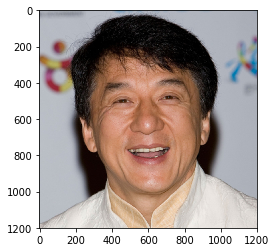

Hello, Human!!!
You look like a ...
in/127.Silky_terrier


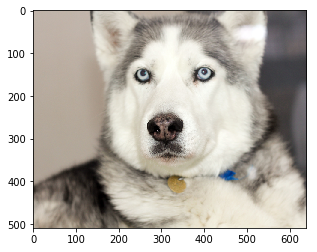

Hello, Dog!!!
Your breed is ...
in/005.Alaskan_malamute


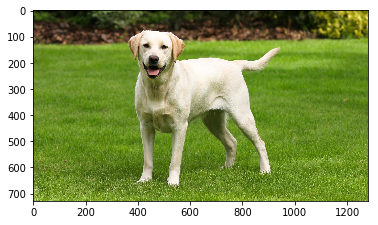

Hello, Dog!!!
Your breed is ...
in/096.Labrador_retriever


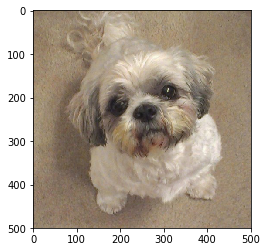

Hello, Dog!!!
Your breed is ...
in/099.Lhasa_apso


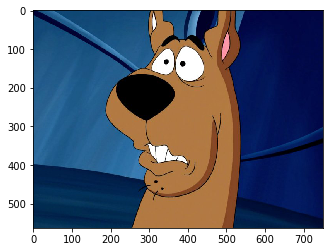

Whoa...you just discovered a new breed of dog.


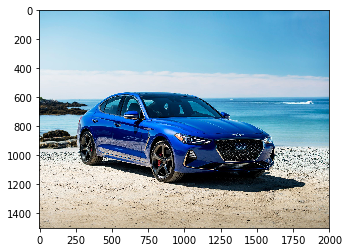

Whoa...you just discovered a new breed of dog.


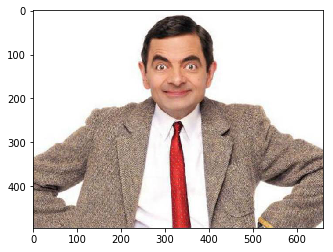

Hello, Human!!!
You look like a ...
in/132.Xoloitzcuintli


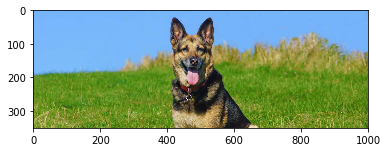

Hello, Dog!!!
Your breed is ...
in/022.Belgian_tervuren


In [52]:
import os
from pathlib import Path
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
def TestDogBreedPredictorAlgorithm(path):
    for r, d, f in os.walk(path):
        for file in f:
            DogBreedPredictor(os.path.join(r, file))
        return  

path = 'DogBreedImages'
TestDogBreedPredictorAlgorithm(path)

# Please download your notebook to submit

In order to submit, please do the following:
1.  Download an HTML version of the notebook to your computer using 'File: Download as...'
2.  Click on the orange Jupyter circle on the top left of the workspace.
3.  Navigate into the dog-project folder to ensure that you are using the provided dog_images, lfw, and bottleneck_features folders; this means that those folders will *not* appear in the dog-project folder.  If they do appear because you downloaded them, delete them.
4.  While in the dog-project folder, upload the HTML version of this notebook you just downloaded.  The upload button is on the top right.
5.  Navigate back to the home folder by clicking on the two dots next to the folder icon, and then open up a terminal under the 'new' tab on the top right
6.  Zip the dog-project folder with the following command in the terminal:
 `zip -r dog-project.zip dog-project`
7.  Download the zip file by clicking on the square next to it and selecting 'download'.  This will be the zip file you turn in on the next node after this workspace!